In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#First we import the Dataset called loan.csv

path = "loan.csv"  #Mention the path here, in my case I have my notebook and the file in the same directory 
data = pd.read_csv(path, low_memory=False)
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [3]:
data.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [4]:
data.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [5]:
# We saw that data.isna().sum() doesnt give us every null column, although some amount of NAN values are acceptable
# we see that the NaN values in some columns exceed 39k 

In [6]:
data.shape # From the looks of it we have entire columns with null values, Let's clean this up first

(39717, 111)

In [7]:
# Let's check if we have columns whose nan values are on the higher side 
nan_vals = data.isna().sum().sort_values(ascending=False) 
nan_vals[nan_vals > 2000] 

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


In [8]:
# From the above results it is clear that there are absurdly high number of nan values
# and we really cant replace them with Mode or Median; best is to either ignore them or remove them
# For keeping our dataset clean and readable we will get rid of such columns

In [9]:
# Column name with high nan values
columns_with_high_nan_values = nan_vals[nan_vals >= 3000].index 
columns_with_high_nan_values

Index(['verification_status_joint', 'annual_inc_joint', 'mo_sin_old_rev_tl_op',
       'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal',
       'acc_open_past_24mths', 'inq_last_12m', 'total_cu_tl', 'inq_fi',
       'total_rev_hi_lim', 'all_util', 'max_bal_bc', 'open_rv_24m',
       'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il',
       'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m',
       'tot_cur_bal', 'tot_coll_amt', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_rev_tl_bal_gt_0', 'total_bc_limit',
       'total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75',
       'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m',
       'num_tl_30dpd', 'num_tl_120dpd_2m', 'num_sats', 'num_rev_accts',
       'mths_since_recent_bc', 'num_op_rev_tl', 'num_il_tl', 'num_bc_tl',
       'num_bc_sats', 'num_actv_rev_tl', 'num_actv_bc_tl',
       'num_accts_ever_120_pd', 'mths_since_recent_revol_delinq',
       'mths_since_rec

In [10]:
data1 = data.drop(columns_with_high_nan_values, axis=1)

In [11]:
print("Original data with all the columns intact : ", data.shape)
print("New data where the columns containing high nan values were removed : ", data1.shape)

Original data with all the columns intact :  (39717, 111)
New data where the columns containing high nan values were removed :  (39717, 53)


In [12]:
# Lets look at the columns having only 1 unique values,
# We will drop such columns becauses they arent much of any use to our analysis
data1.nunique()[data1.nunique() <= 2]

term                          2
pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [13]:
# We will drop everything except for the "term" column
data1[data1.nunique()[data1.nunique() <= 2].index]


term pymnt_plan initial_list_status  collections_12_mths_ex_med  \
0       36 months          n                   f                         0.0   
1       60 months          n                   f                         0.0   
2       36 months          n                   f                         0.0   
3       36 months          n                   f                         0.0   
4       60 months          n                   f                         0.0   
...           ...        ...                 ...                         ...   
39712   36 months          n                   f                         NaN   
39713   36 months          n                   f                         NaN   
39714   36 months          n                   f                         NaN   
39715   36 months          n                   f                         NaN   
39716   36 months          n                   f                         NaN   

       policy_code application_type  acc_now_delinq  chargeoff_within_12_mths  \
0                1       INDIVIDUAL               0                       0.0   
1                1       INDIVIDUAL               0                       0.0   
2                1       INDIVIDUAL               0                       0.0   
3                1       INDIVIDUAL               0                       0.0   
4                1       INDIVIDUAL               0                       0.0   
...            ...              ...             ...                       ...   
39712            1       INDIVIDUAL               0                       NaN   
39713            1       INDIVIDUAL               0                       NaN   
39714            1       INDIVIDUAL               0                       NaN   
39715            1       INDIVIDUAL               0                       NaN   
39716            1       INDIVIDUAL               0                       NaN   

       delinq_amnt  tax_liens  
0                0        0.0  
1                0        0.0  
2                0        0.0  
3                0        0.0  
4                0        0.0  
...            ...        ...  
39712            0        NaN  
39713            0        NaN  
39714            0        NaN  
39715            0        NaN  
39716            0        NaN  

[39717 rows x 10 columns]

In [14]:
columns_with_one_unique_value = data1.nunique()[data1.nunique() == 1].index
columns_with_one_unique_value

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [15]:
print("Data having columns with 1 unique value : ", data1.shape)
data1 = data1.drop(columns_with_one_unique_value, axis = 1)
print("Data with columns with 1 unique value dropped : ", data1.shape)

Data having columns with 1 unique value :  (39717, 53)
Data with columns with 1 unique value dropped :  (39717, 44)


In [16]:
data1.isna().sum().sort_values(ascending=False)

emp_title                  2459
emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
title                        11
last_credit_pull_d            2
last_pymnt_amnt               0
out_prncp_inv                 0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
out_prncp                     0
total_pymnt                   0
total_pymnt_inv               0
earliest_cr_line              0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
inq_last_6mths                0
id                            0
delinq_2yrs                   0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installm

In [17]:
data1[["emp_length", "emp_title", "pub_rec_bankruptcies"]]

emp_length                   emp_title  pub_rec_bankruptcies
0      10+ years                         NaN                   0.0
1       < 1 year                       Ryder                   0.0
2      10+ years                         NaN                   0.0
3      10+ years         AIR RESOURCES BOARD                   0.0
4         1 year    University Medical Group                   0.0
...          ...                         ...                   ...
39712    4 years             FiSite Research                   NaN
39713    3 years  Squarewave Solutions, Ltd.                   NaN
39714   < 1 year                         NaN                   NaN
39715   < 1 year                         NaN                   NaN
39716   < 1 year            Evergreen Center                   NaN

[39717 rows x 3 columns]

In [18]:
# Now we will check the columns we actually need and drop those which we dont need
data1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [19]:
data1[["id", "member_id"]]

id  member_id
0      1077501    1296599
1      1077430    1314167
2      1077175    1313524
3      1076863    1277178
4      1075358    1311748
...        ...        ...
39712    92187      92174
39713    90665      90607
39714    90395      90390
39715    90376      89243
39716    87023      86999

[39717 rows x 2 columns]

In [20]:
# Now there is the column of id and member_id here we gotta ask ourselves if we really need two ID's for
#our analysis which we dont, because we need to understand the "type" of customer who is gonna default or pay  
#back and an ID of some sort wont aid us

In [21]:
data1.drop(["member_id"], axis = 1, inplace = True)

In [22]:
# The zip code couldve been useful but the datatset recorded only the first three digits
#after doing some analysis I found that the first three digits can potentially be the same 
#for different states, so we are going to drop it
# Also the URL seems to be of no use so we will drop that as well

data1[["url", "zip_code"]]

url zip_code
0      https://lendingclub.com/browse/loanDetail.acti...    860xx
1      https://lendingclub.com/browse/loanDetail.acti...    309xx
2      https://lendingclub.com/browse/loanDetail.acti...    606xx
3      https://lendingclub.com/browse/loanDetail.acti...    917xx
4      https://lendingclub.com/browse/loanDetail.acti...    972xx
...                                                  ...      ...
39712  https://lendingclub.com/browse/loanDetail.acti...    802xx
39713  https://lendingclub.com/browse/loanDetail.acti...    274xx
39714  https://lendingclub.com/browse/loanDetail.acti...    017xx
39715  https://lendingclub.com/browse/loanDetail.acti...    208xx
39716  https://lendingclub.com/browse/loanDetail.acti...    027xx

[39717 rows x 2 columns]

In [23]:
data1.drop(["url", "zip_code"], axis = 1, inplace = True)

In [24]:
data1["issue_d"].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [25]:
#I have decided to keep emp_length to see whether it can aid me in my analysis cause it doesnt have a lot of
#unique values and we can group data based on emp_length
#But I going to drop emp_title because it may have too many unique values

data1[["emp_length", "emp_title"]]

emp_length                   emp_title
0      10+ years                         NaN
1       < 1 year                       Ryder
2      10+ years                         NaN
3      10+ years         AIR RESOURCES BOARD
4         1 year    University Medical Group
...          ...                         ...
39712    4 years             FiSite Research
39713    3 years  Squarewave Solutions, Ltd.
39714   < 1 year                         NaN
39715   < 1 year                         NaN
39716   < 1 year            Evergreen Center

[39717 rows x 2 columns]

In [26]:
len(data1.emp_title.value_counts())

28820

In [27]:
data1.drop(["emp_title"], axis = 1, inplace = True)

In [28]:
#Now we will look at the columns having datetime values and clean them acorrdingly

data1[["issue_d", "earliest_cr_line"]]

issue_d earliest_cr_line
0      Dec-11           Jan-85
1      Dec-11           Apr-99
2      Dec-11           Nov-01
3      Dec-11           Feb-96
4      Dec-11           Jan-96
...       ...              ...
39712  Jul-07           Nov-90
39713  Jul-07           Dec-86
39714  Jul-07           Oct-98
39715  Jul-07           Nov-88
39716  Jun-07           Oct-03

[39717 rows x 2 columns]

In [29]:
data1.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [30]:
data1.earliest_cr_line.value_counts()

Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    346
Dec-97    329
         ... 
Feb-66      1
Dec-61      1
Oct-54      1
Jun-72      1
Oct-74      1
Name: earliest_cr_line, Length: 526, dtype: int64

In [31]:
#By looking at the values we can see that these arent datetime object,
#So for clarity sake we can convert these into datetime objects and from there
#we can extract the month and year 
pd.to_datetime(data1["issue_d"], format = "%b-%y")

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 39717, dtype: datetime64[ns]

In [32]:
data1["issue_d"] = pd.to_datetime(data1["issue_d"], format = "%b-%y")
data1["earliest_cr_line"] = pd.to_datetime(data1["earliest_cr_line"], format = "%b-%y")

In [33]:
data1[["issue_d", "earliest_cr_line"]]

issue_d earliest_cr_line
0     2011-12-01       1985-01-01
1     2011-12-01       1999-04-01
2     2011-12-01       2001-11-01
3     2011-12-01       1996-02-01
4     2011-12-01       1996-01-01
...          ...              ...
39712 2007-07-01       1990-11-01
39713 2007-07-01       1986-12-01
39714 2007-07-01       1998-10-01
39715 2007-07-01       1988-11-01
39716 2007-06-01       2003-10-01

[39717 rows x 2 columns]

In [34]:
#Now lets seggregate month and year based on "issue_d" and "earliest_cr_line"
#We will call them derived variables

data1["issue_d_year"] = data1["issue_d"].dt.year

In [35]:
#When I was using dt.month attribute of data1["issue_d"] it was giving me a padded decimal of the month like 01,02,03
#Python's datetime module was useful but Pandas series has its own attribute, let's try that out

data1["issue_d"].dt.strftime("%b")

0        Dec
1        Dec
2        Dec
3        Dec
4        Dec
        ... 
39712    Jul
39713    Jul
39714    Jul
39715    Jul
39716    Jun
Name: issue_d, Length: 39717, dtype: object

In [36]:
#It was successful!
data1["issue_d_month"] = data1["issue_d"].dt.strftime("%b")

In [37]:
data1["Year_earliest_cr_line"] = data1["earliest_cr_line"].dt.year
#data1["Month_earliest_cr_line"] = data1["earliest_cr_line"].dt.strftime("%b")

In [38]:
data1["Month_earliest_cr_line"] = data1["earliest_cr_line"].dt.strftime("%b")

In [39]:
data1.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
4  1075358       3000         3000           3000.0   60 months   12.69%   

   installment grade sub_grade emp_length  ... recoveries  \
0       162.87     B        B2  10+ years  ...       0.00   
1        59.83     C        C4   < 1 year  ...     117.08   
2        84.33     C        C5  10+ years  ...       0.00   
3       339.31     C        C1  10+ years  ...       0.00   
4        67.79     B        B5     1 year  ...       0.00   

   collection_recovery_fee last_pymnt_d last_pymnt_amnt last_credit_pull_d  \
0                     0.00       Jan-15          171.62             May-16   
1                     1.11       Apr-13          119.66             Sep-13   
2                     0.00       Jun-14          649.91             May-16   
3                     0.00       Jan-15          357.48             Apr-16   
4                     0.00       May-16           67.79             May-16   

  pub_rec_bankruptcies issue_d_year issue_d_month  Year_earliest_cr_line  \
0                  0.0         2011           Dec                   1985   
1                  0.0         2011           Dec                   1999   
2                  0.0         2011           Dec                   2001   
3                  0.0         2011           Dec                   1996   
4                  0.0         2011           Dec                   1996   

   Month_earliest_cr_line  
0                     Jan  
1                     Apr  
2                     Nov  
3                     Feb  
4                     Jan  

[5 rows x 44 columns]

In [40]:
#Now since we have the year and month of issue_d and earliest_line_cr in the desired format,
#We dont need the original columns anymore, so we will drop it
print("The shape before dropping issue_d and earliest_cr_line : ", data1.shape)

data1.drop(["issue_d", "earliest_cr_line"], axis = 1, inplace = True)

print("The shape after dropping issue_d and earliest_cr_line : ", data1.shape)

The shape before dropping issue_d and earliest_cr_line :  (39717, 44)
The shape after dropping issue_d and earliest_cr_line :  (39717, 42)


In [41]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [42]:
#After checking the dataset once again I want to analyse the interest rate and loan_status column

data1[["loan_status", "int_rate"]]

loan_status int_rate
0       Fully Paid   10.65%
1      Charged Off   15.27%
2       Fully Paid   15.96%
3       Fully Paid   13.49%
4          Current   12.69%
...            ...      ...
39712   Fully Paid    8.07%
39713   Fully Paid   10.28%
39714   Fully Paid    8.07%
39715   Fully Paid    7.43%
39716   Fully Paid   13.75%

[39717 rows x 2 columns]

In [43]:
data1.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [44]:
#We can observe that the int_rate needs a type conversion and
# The loan_status has customers who are in the process of paying back the loan
#This "current" status wont be useful as we wont be able to predict the outcome
#of such customers without introducing a model so we will drop the rows having "current"

In [45]:
print("Data before dropping the said rows : ", data1.shape)
data1 = data1[data1.loan_status != "Current"]
print("Data after dropping the said rows : ", data1.shape)

Data before dropping the said rows :  (39717, 42)
Data after dropping the said rows :  (38577, 42)


In [46]:
#Let's proceed with the "int_rate" columns

data1.int_rate.describe()

count      38577
unique       370
top       10.99%
freq         913
Name: int_rate, dtype: object

In [47]:
data1["int_rate"] = data1["int_rate"].apply(lambda x : float(x.strip("%")))
#Even though int_rate was of type object it was showing some error of it being a float64 type and wasnt allowing
# me to use the .strip() function

In [48]:
data1.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [49]:
data1.isna().sum().sort_values(ascending = False)

emp_length                 1033
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
title                        11
last_credit_pull_d            2
total_rec_int                 0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
id                            0
total_rec_late_fee            0
revol_bal                     0
collection_recovery_fee       0
last_pymnt_amnt               0
issue_d_year                  0
issue_d_month                 0
Year_earliest_cr_line         0
recoveries                    0
pub_rec                       0
loan_amnt                     0
home_ownership                0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grad

In [50]:
# Let's take a closer look at the remaining columns and check
# whether those columns represent post loan-approval or no
# If they do then we need to drop those columns cause it wont aid in our analysis
#After doing some analysis and research I found the following columns ot be of no use

# collection_recovery_fee
# inq_last_6mths
# last_credit_pull_d
# last_pymnt_amnt
# last_pymnt_d
# out_prncp
# out_prncp_inv
# out_prncp_inv
# recoveries
# total_pymnt
# total_pymnt_inv
# total_rec_int
# total_rec_late_fee
# total_rec_prncp
# total_rev_hi_lim  


#Let's drop these columns cause they will be the least helpful in our analysis

In [51]:
columns_post_approv = ["collection_recovery_fee", "inq_last_6mths", "last_credit_pull_d", "last_pymnt_amnt",
                      "last_pymnt_d", "out_prncp", "out_prncp_inv", "recoveries", "total_pymnt",
                      "total_pymnt_inv", "total_rec_int", "total_rec_late_fee", "total_rec_prncp", 
                      ]
#These are columns to be dropped from our analysis

In [52]:
print("Data before dropping columns from columns_post_approv : ", data1.shape)
data1.drop(columns_post_approv, axis = 1, inplace = True)
print("Data after dropping columns from columns_post_approv : ", data1.shape)

Data before dropping columns from columns_post_approv :  (38577, 42)
Data after dropping columns from columns_post_approv :  (38577, 29)


In [53]:
data1.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'issue_d_year',
       'issue_d_month', 'Year_earliest_cr_line', 'Month_earliest_cr_line'],
      dtype='object')

In [54]:
#The columns we have for our analysis seems fine
#The final changes we have to make is dealing with NAN values, 
#Even though we dealt with it in our initial data cleaning part
#These NAN value scan be computed and filled using already available data


In [55]:
data1.isna().sum().sort_values(ascending = False)/data1.shape[0] * 100

emp_length                2.677761
pub_rec_bankruptcies      1.806776
revol_util                0.129611
title                     0.028514
id                        0.000000
Year_earliest_cr_line     0.000000
issue_d_month             0.000000
issue_d_year              0.000000
total_acc                 0.000000
revol_bal                 0.000000
pub_rec                   0.000000
open_acc                  0.000000
delinq_2yrs               0.000000
dti                       0.000000
addr_state                0.000000
purpose                   0.000000
loan_amnt                 0.000000
loan_status               0.000000
verification_status       0.000000
annual_inc                0.000000
home_ownership            0.000000
sub_grade                 0.000000
grade                     0.000000
installment               0.000000
int_rate                  0.000000
term                      0.000000
funded_amnt_inv           0.000000
funded_amnt               0.000000
Month_earliest_cr_li

In [56]:
# emp_length is a highgly dependent column so we chose not to replace 1033 NAN values with the median value
# Dropping the NaN values seem to be a wise choice in this case 
# And the same goes for the rest of the columns


In [57]:
data1.revol_util

0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 38577, dtype: object

In [58]:
data1["revol_util"] = data1["revol_util"].apply(lambda x : float(str(x).replace("%", "")))

In [59]:
data1.rename(columns={"revol_util" : "revol_util(%)"}, inplace = True)


In [60]:
data1.isna().sum().sort_values(ascending = False)

emp_length                1033
pub_rec_bankruptcies       697
revol_util(%)               50
title                       11
id                           0
Year_earliest_cr_line        0
issue_d_month                0
issue_d_year                 0
total_acc                    0
revol_bal                    0
pub_rec                      0
open_acc                     0
delinq_2yrs                  0
dti                          0
addr_state                   0
purpose                      0
loan_amnt                    0
loan_status                  0
verification_status          0
annual_inc                   0
home_ownership               0
sub_grade                    0
grade                        0
installment                  0
int_rate                     0
term                         0
funded_amnt_inv              0
funded_amnt                  0
Month_earliest_cr_line       0
dtype: int64

In [61]:
data1.isna().sum().sort_values(ascending = False)[:4]

emp_length              1033
pub_rec_bankruptcies     697
revol_util(%)             50
title                     11
dtype: int64

In [62]:
data1["emp_length"].isna().sum()/data1.shape[0] * 100

2.6777613603960906

In [63]:
data1["emp_length"].value_counts()/data1.shape[0] * 100

10+ years    22.002748
< 1 year     11.685719
2 years      11.123208
3 years      10.399979
4 years       8.663193
5 years       8.279545
1 year        8.214739
6 years       5.619929
7 years       4.435285
8 years       3.719833
9 years       3.178059
Name: emp_length, dtype: float64

In [64]:
# From the results above. we can see that NAN values represent a small percentage of data,
# so it is safe to drop it

for i in data1.isna().sum().sort_values(ascending = False).index[:4]:
    data1 = data1[~(data1[i].isna())]

In [65]:
data1.isna().sum()

id                        0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
title                     0
addr_state                0
dti                       0
delinq_2yrs               0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util(%)             0
total_acc                 0
pub_rec_bankruptcies      0
issue_d_year              0
issue_d_month             0
Year_earliest_cr_line     0
Month_earliest_cr_line    0
dtype: int64

In [66]:
print("The final shape of data before starting our visualization : ", data1.shape)

The final shape of data before starting our visualization :  (36790, 29)


In [67]:
# From almost 39k we went down to 36k, and from 111 columns we reduced it to 29 useful columns

In [68]:
data1["emp_length"] = pd.to_numeric(data1["emp_length"].apply(lambda x : 0 if "<" in x else x.split("+")[0] if "+" in x else x[0]))

In [69]:
#We will define a function which gives us categorical and continuous variables

def cat_and_cont(dataframe, return_columns = False):
    """
    Keyowrd args:
    
    dataframe (Dataframe): Name of the dataframe
    return_columns: If set to true it return a tuple of categorical and continuous variables otherwise it just prints it
    
    """
    
    columns_with_categorical_variables = dataframe.dtypes[(dataframe.dtypes == object) | (dataframe.dtypes == "category")].index
    columns_with_continuous_variables = dataframe.dtypes[(dataframe.dtypes == int) |(data1.dtypes == float) ].index
    
    print("Categorical variables are as follows : ")
    
    for i,j in enumerate(columns_with_categorical_variables):
        print(f"{i + 1}) {j}")
    print(" ")
    
    print("Continuous variables are as follows : ")
    for i,j in enumerate(columns_with_continuous_variables):
        print(f"{i + 1}) {j}")
        
    if return_columns:
        return (columns_with_categorical_variables, columns_with_continuous_variables)

In [70]:
cat_and_cont(data1)

Categorical variables are as follows : 
1) term
2) grade
3) sub_grade
4) home_ownership
5) verification_status
6) loan_status
7) purpose
8) title
9) addr_state
10) issue_d_month
11) Month_earliest_cr_line
 
Continuous variables are as follows : 
1) id
2) loan_amnt
3) funded_amnt
4) funded_amnt_inv
5) int_rate
6) installment
7) emp_length
8) annual_inc
9) dti
10) delinq_2yrs
11) open_acc
12) pub_rec
13) revol_bal
14) revol_util(%)
15) total_acc
16) pub_rec_bankruptcies
17) issue_d_year
18) Year_earliest_cr_line


## Checking for outliers in continuous variables

In [71]:
#Let's check the outliers in Continuous variables, we will just create fucntion for boxplot for 
# each of the variables cause it is the best way to check for outliers

def graphs(column, box_plot = False, count_plot = False, dataframe = data1):
    """
    keyowrd args: 
    
    column (String) : Name of the column in the dataframe
    box_plot (Boolean) : To plot box plot
    count_plot (Boolean) : To plot count plot
    dataframe (Dataframe) : Name of the Dataframe
    
    """
            
    if box_plot:
        sns.boxplot(x = dataframe[column])
        plt.gcf().set_size_inches(10, 8)
        plt.title(column)
        print(dataframe[[column]].describe())
        
    if count_plot:
        sns.countplot(data = dataframe, x = column)
        plt.gcf().set_size_inches(10, 8)
        plt.title(column)
   

In [72]:
#We would also need a function which represent numerouse categories in the form of percentage of data that they
#represent

In [73]:
def general_info(column, dataframe = data1, return_val_per = False):
    """
    Keyword args:
    
    column (String) : Name of the column
    dataframe (Datframe) : name of the dataframe
    return_val_per (Boolean) : If True return a tuple of value_counts and its correspoding percent of data 
                                it represents
    """
    
    if return_val_per:
        return (dataframe[column].value_counts(), dataframe[column].value_counts()/dataframe.shape[0] * 100)
    else:
        print(f"Individual count for unqiue values of {column} are : \n {dataframe[column].value_counts()} \n")
        print(f"Percent of data that each unqiue value of {column} represents : \n {round(dataframe[column].value_counts()/dataframe.shape[0] * 100, 2)}")
    
        
    

## 1) For loan amount

          loan_amnt
count  36790.000000
mean   11149.963305
std     7369.888921
min      500.000000
25%     5500.000000
50%    10000.000000
75%    15000.000000
max    35000.000000


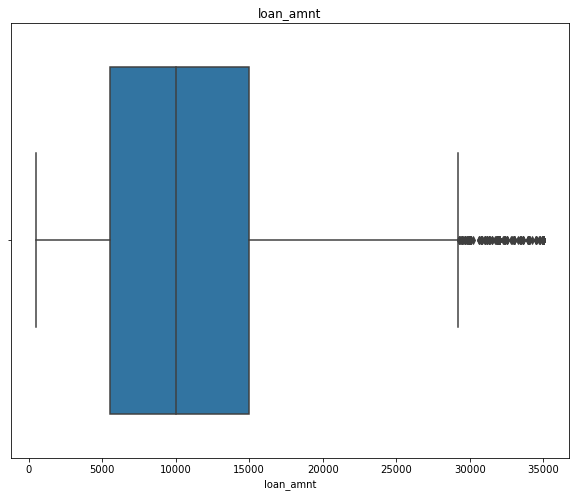

In [74]:
graphs("loan_amnt", box_plot = True)

In [75]:
# Frome the above plot it is clear that there are some outliers post 29k, lets closely check these outliers

In [76]:
print("The difference between the max and the mean is ", 
     round(data1.loan_amnt.describe()["max"] - data1.loan_amnt.describe()["mean"], 2))

print("The differnce between the middle most value i.e 50th percentile and the mean is ", 
     round(data1.loan_amnt.describe()["max"] - data1.loan_amnt.describe()["50%"], 2))

The difference between the max and the mean is  23850.04
The differnce between the middle most value i.e 50th percentile and the mean is  25000.0


In [77]:
# As we can see that both the differences are substancial enough, 
#you can say that the maximum value is more than thrice the mean and 50th perecentile 
#so its better that we dont consider these values in our analysis


          loan_amnt
count  35688.000000
mean   10477.026592
std     6379.618554
min      500.000000
25%     5200.000000
50%     9525.000000
75%    15000.000000
max    28800.000000


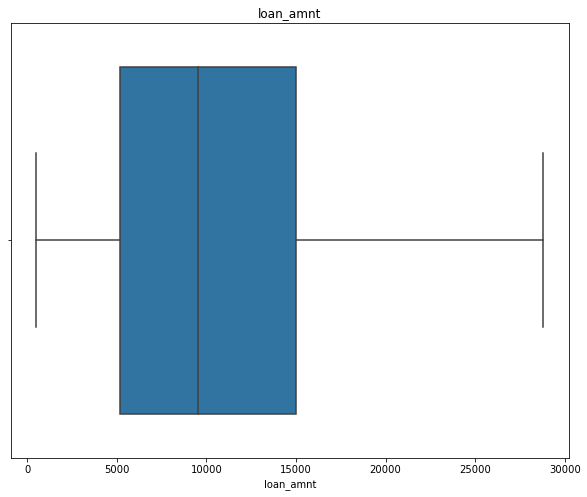

In [78]:
graphs("loan_amnt", box_plot = True, dataframe = data1[data1["loan_amnt"] < 29000])

In [79]:
#Now we can see from the above plot there arent any outliers in loan_amnt, let's continue with our analysis
#of our remaining columns

data1 = data1[data1["loan_amnt"] < 29000] 

## 2) For Funded amount ##

        funded_amnt
count  35688.000000
mean   10246.658541
std     6172.334997
min      500.000000
25%     5075.000000
50%     9150.000000
75%    14306.250000
max    28800.000000


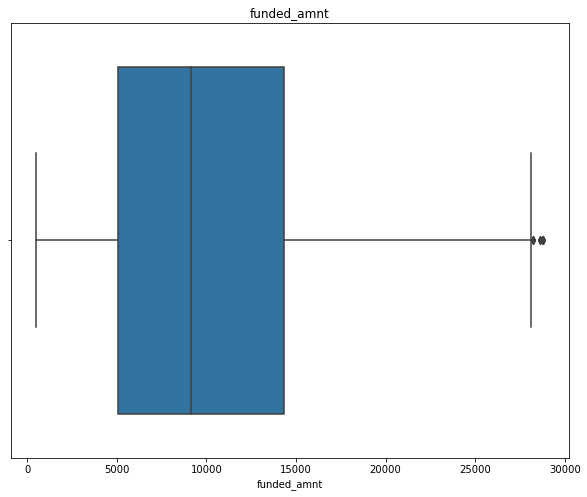

In [80]:
graphs("funded_amnt", box_plot = True, dataframe = data1)

In [81]:
# As we removed outliers from loan_amnt in our dataset we simultaneously removed some outliers from 
# funded_amnt as well

## 3) For public records

            pub_rec
count  36790.000000
mean       0.054200
std        0.235592
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000


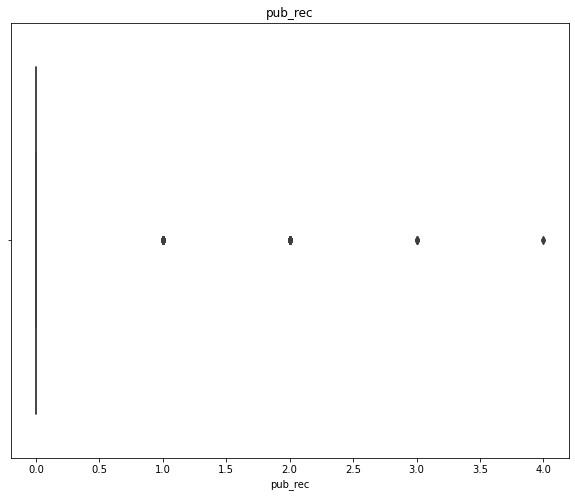

In [82]:
graphs("pub_rec", box_plot = True)

In [83]:
#The mean and median differs a lot from the mean and median, let's clean it up
data1["pub_rec"].quantile(0.95)

1.0

Individual count for unqiue values of pub_rec are : 
 0    34861
1     1875
2       45
3        7
4        2
Name: pub_rec, dtype: int64 

Percent of data that each unqiue value of pub_rec represents : 
 0    94.76
1     5.10
2     0.12
3     0.02
4     0.01
Name: pub_rec, dtype: float64


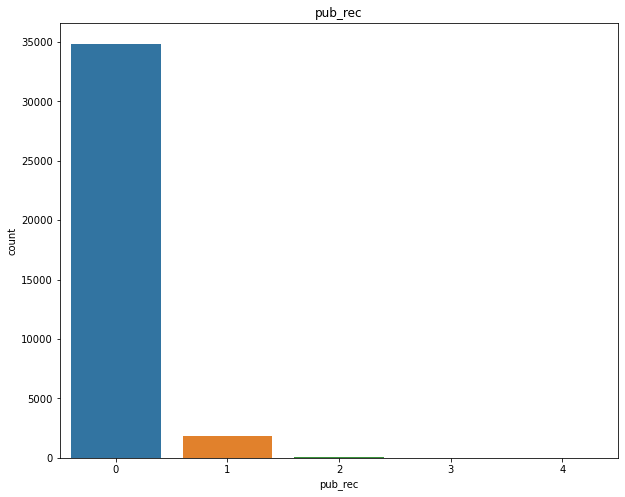

In [84]:
graphs("pub_rec", count_plot=  True)
general_info("pub_rec")

In [85]:
# Since box plot wasnt giving a clear picture as to what the data was unfloding, a count plot gave us some insight
# The graph and other information makes it clear that we can omit rows of pub_rec containing 2,3,4
# We will keep 1 for our analysis further down the road

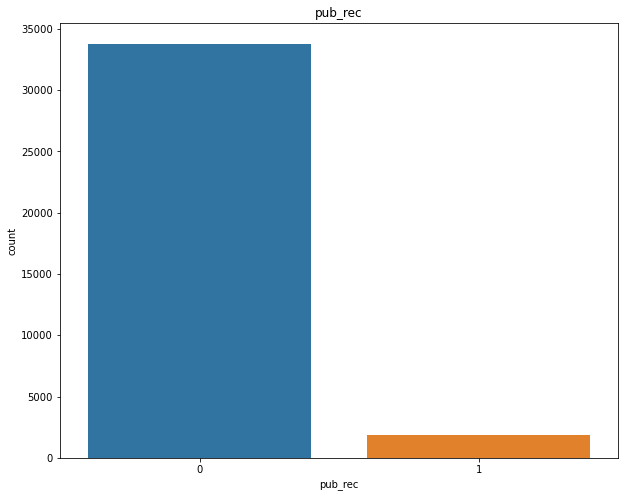

In [86]:
graphs(column = "pub_rec", count_plot=True, dataframe = data1[data1["pub_rec"] <= 1])


In [87]:
data1 = data1[data1["pub_rec"] <= 1]

## 4) For open accounts ##

           open_acc
count  36790.000000
mean       9.302609
std        4.375558
min        2.000000
25%        6.000000
50%        9.000000
75%       12.000000
max       44.000000


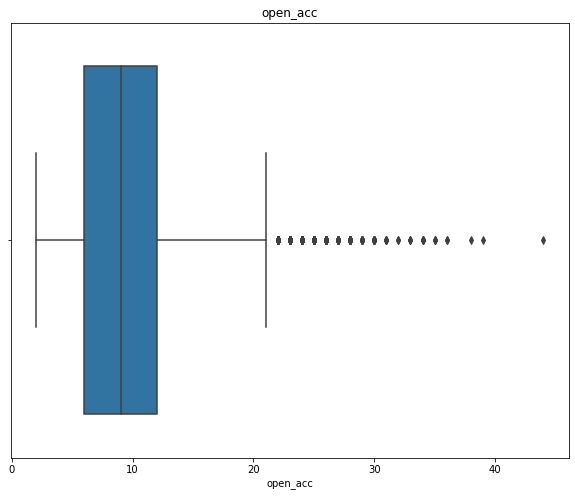

In [88]:
graphs(column="open_acc", box_plot=True)

           open_acc
count  35315.000000
mean       9.110038
std        4.088450
min        2.000000
25%        6.000000
50%        8.000000
75%       12.000000
max       22.000000


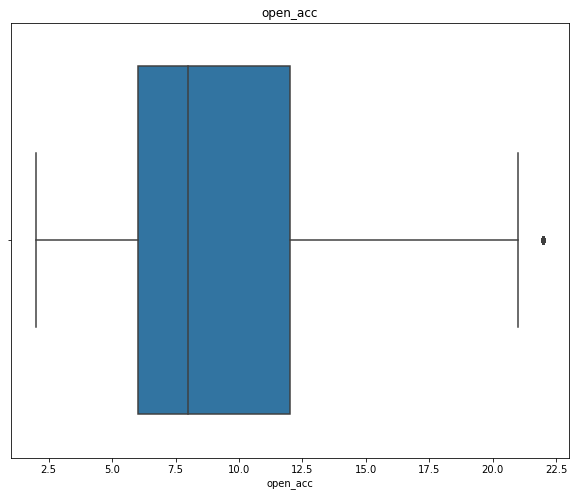

In [89]:
#There is a huge difference in the mean value from the max here we can safely take mean as our metric.

graphs(column = "open_acc", box_plot=True, dataframe = data1[data1["open_acc"] <= data1["open_acc"].quantile(0.99)])

In [90]:
data1 = data1[data1["open_acc"] <= data1["open_acc"].quantile(0.99)]

## 5) For Revol_bal ##

           revol_bal
count   36790.000000
mean    13376.127806
std     15849.930145
min         0.000000
25%      3729.250000
50%      8869.000000
75%     17031.000000
max    149588.000000


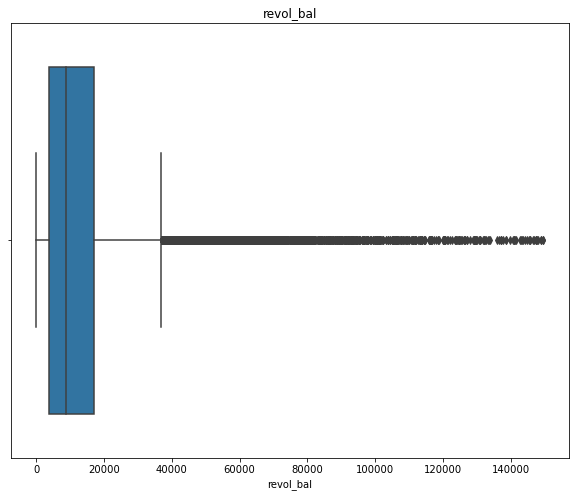

In [91]:
graphs(column = "revol_bal", box_plot = True)

In [92]:
quantiles_for_revol_bal = data1["revol_bal"].quantile([0.50, 0.75, 0.85, 0.95, 0.99])
quantiles_for_revol_bal

0.50     8647.00
0.75    16438.00
0.85    22644.00
0.95    39511.20
0.99    79919.94
Name: revol_bal, dtype: float64

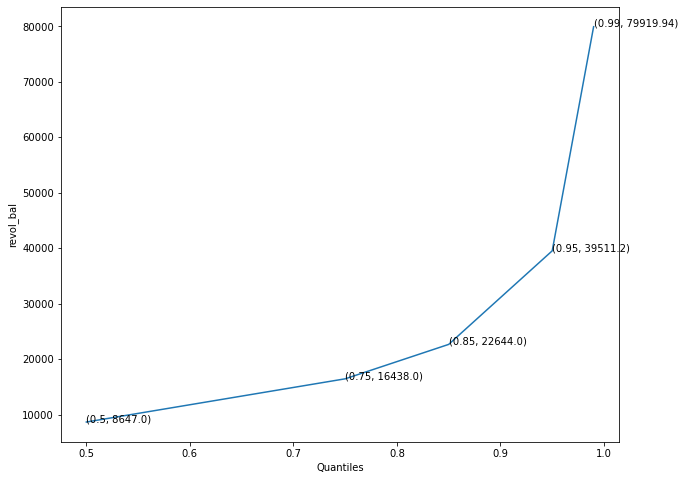

In [93]:
sns.lineplot(x = quantiles_for_revol_bal.index, y = quantiles_for_revol_bal)
plt.gcf().set_size_inches(10,8)
plt.xlabel("Quantiles")

for i in zip(quantiles_for_revol_bal.index, round(quantiles_for_revol_bal, 2)):
    plt.annotate(text = str(i), xy = i)

In [94]:
#From the Lineplot and box plot is clear that the line shoots up around the 95th quantile 
#We visualized the quantile and their corrspoding values in the lineplot
#The line is pretty linear around the 85th quartile

In [95]:
data1 = data1[data1["revol_bal"] <= 40000]


## 6) For Total accounts ##

          total_acc
count  36790.000000
mean      22.153194
std       11.407992
min        2.000000
25%       14.000000
50%       20.000000
75%       29.000000
max       90.000000


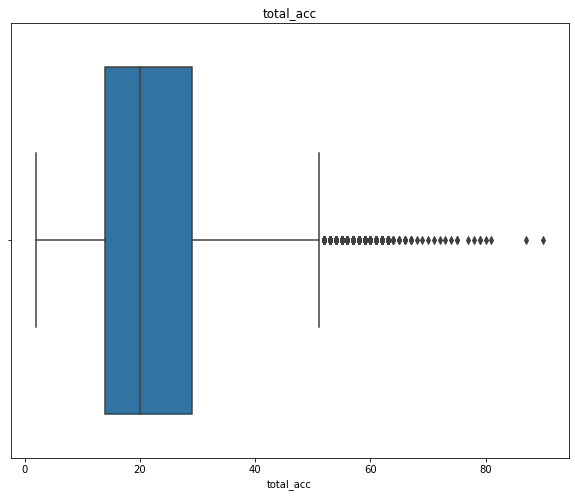

In [96]:
graphs(column="total_acc", box_plot = True)

          total_acc
count  33104.000000
mean      20.745982
std       10.093121
min        2.000000
25%       13.000000
50%       19.000000
75%       27.000000
max       50.000000


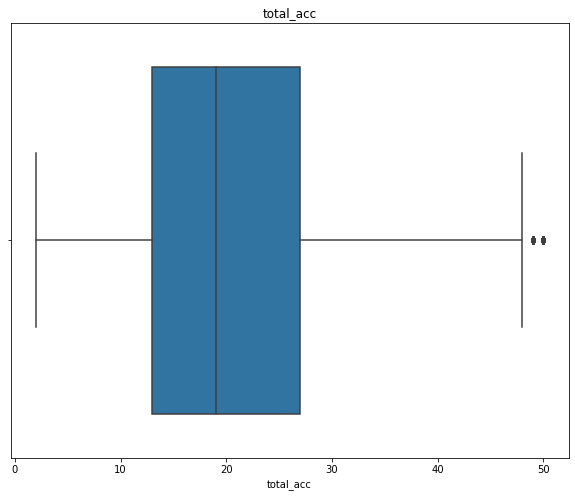

In [97]:
graphs(column="total_acc", box_plot = True, dataframe = data1[data1["total_acc"] <= 50])

In [98]:
data1 =  data1[data1["total_acc"] <= 50]

## 7) For delinquicy of the custome for the past two years ##

        delinq_2yrs
count  36790.000000
mean       0.146127
std        0.491865
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       11.000000


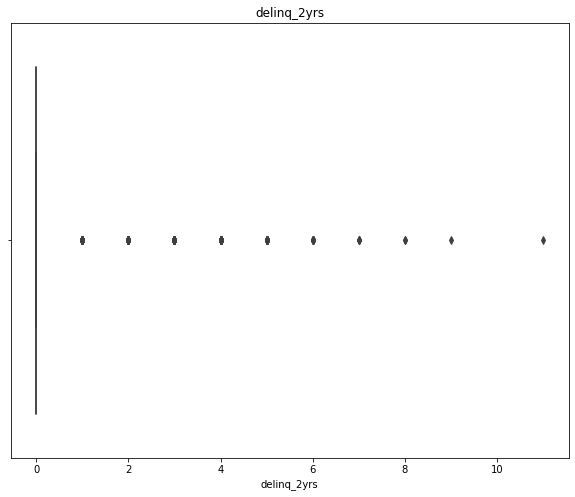

In [99]:
graphs(column="delinq_2yrs", box_plot=True)

In [100]:
general_info(column="delinq_2yrs")

Individual count for unqiue values of delinq_2yrs are : 
 0     32802
1      3061
2       634
3       198
4        56
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64 

Percent of data that each unqiue value of delinq_2yrs represents : 
 0     89.16
1      8.32
2      1.72
3      0.54
4      0.15
5      0.06
6      0.03
7      0.01
8      0.01
9      0.00
11     0.00
Name: delinq_2yrs, dtype: float64


In [101]:
data1 = data1[data1["delinq_2yrs"] <= 2]

## 8) For annual income ##

         annual_inc
count  3.679000e+04
mean   6.943917e+04
std    6.402864e+04
min    4.000000e+03
25%    4.116900e+04
50%    6.000000e+04
75%    8.300000e+04
max    6.000000e+06


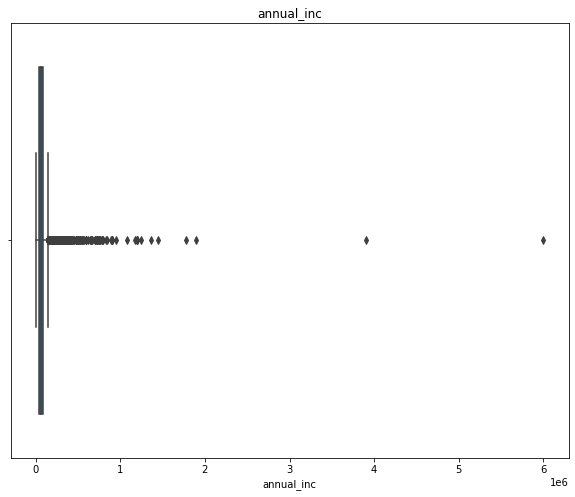

In [102]:
graphs(column= "annual_inc", box_plot=True)

In [103]:
data1.annual_inc.quantile([0.50, 0.75, 0.85, 0.95, 0.99])

0.50     55000.0
0.75     77000.0
0.85     92000.0
0.95    125004.0
0.99    200000.0
Name: annual_inc, dtype: float64

In [104]:
data1 = data1[data1["annual_inc"] < 200000.0]

          annual_inc
count   32485.000000
mean    61245.015787
std     30196.387669
min      4000.000000
25%     40000.000000
50%     55000.000000
75%     75000.000000
max    199992.000000


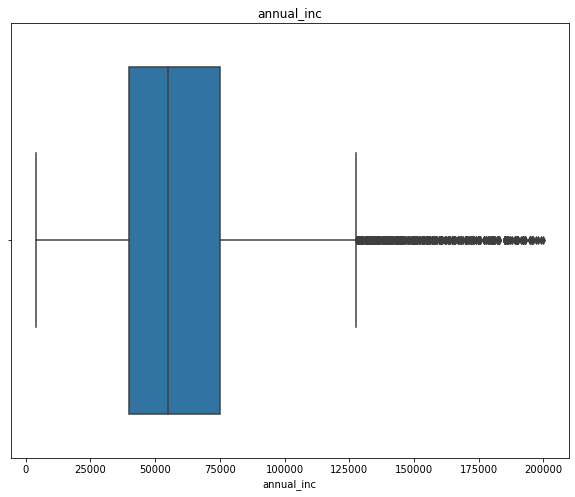

In [105]:
graphs(column="annual_inc", box_plot=True, dataframe=data1)

## Cleaning the values in Categorical variables ##

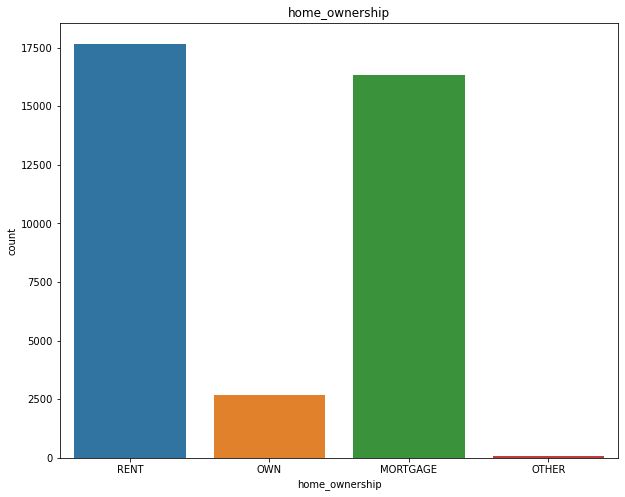

In [106]:
graphs(column="home_ownership", count_plot=True)

In [107]:
#Since we cannot utilize boxplot for visualizing categorical variables, we can certainly use countplots to
#check for relevant data

#From the above plot it is clear that "OTHER" represents a small amount of data"

In [108]:
general_info(column = "home_ownership")
#This gives us the percent of data each category represents
# "OTHER" represents close to 0% of data it is suffice to say that from the results
# we have obtained we should drop that category 

Individual count for unqiue values of home_ownership are : 
 RENT        17663
MORTGAGE    16331
OWN          2700
OTHER          96
Name: home_ownership, dtype: int64 

Percent of data that each unqiue value of home_ownership represents : 
 RENT        48.01
MORTGAGE    44.39
OWN          7.34
OTHER        0.26
Name: home_ownership, dtype: float64


In [109]:
data1 = data1[~(data1["home_ownership"] == "OTHER")]

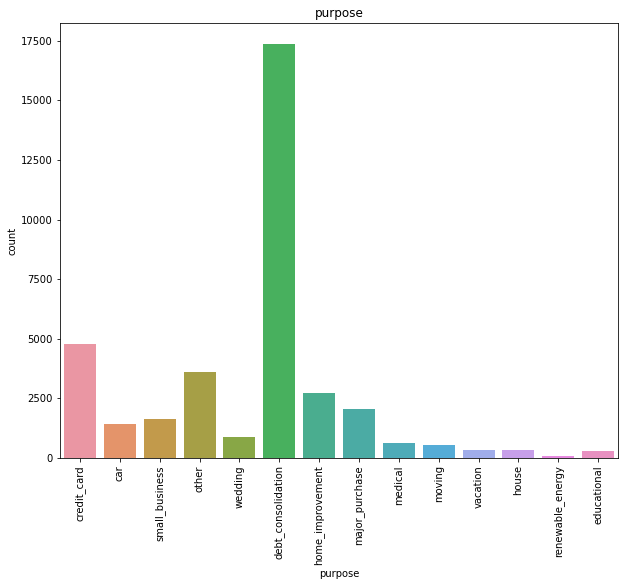

In [110]:
graphs(column = "purpose", count_plot = True)
plt.xticks(rotation = 90)
plt.show()

In [111]:
general_info(column = "purpose")

Individual count for unqiue values of purpose are : 
 debt_consolidation    17370
credit_card            4798
other                  3593
home_improvement       2734
major_purchase         2054
small_business         1655
car                    1429
wedding                 893
medical                 645
moving                  541
house                   349
vacation                341
educational             294
renewable_energy         94
Name: purpose, dtype: int64 

Percent of data that each unqiue value of purpose represents : 
 debt_consolidation    47.21
credit_card           13.04
other                  9.77
home_improvement       7.43
major_purchase         5.58
small_business         4.50
car                    3.88
wedding                2.43
medical                1.75
moving                 1.47
house                  0.95
vacation               0.93
educational            0.80
renewable_energy       0.26
Name: purpose, dtype: float64


In [112]:
#We will remove evreything which represent less tha 2% of data

In [113]:
_, more_than_2per = general_info(column = "purpose", return_val_per=True)

In [114]:
more_than_2per = more_than_2per[more_than_2per.values > 2].index
more_than_2per

Index(['debt_consolidation', 'credit_card', 'other', 'home_improvement',
       'major_purchase', 'small_business', 'car', 'wedding'],
      dtype='object')

In [115]:
data1 = data1[data1["purpose"].isin(more_than_2per)]

# Data is ready for visualisation #

In [116]:
data1.to_csv("Clean_data.csv")
# Data is already saved as Clean_data, commenting this particular code out to not duplicate the file


In [117]:
clean_data = pd.read_csv("Clean_data.csv")
clean_data.head()

Unnamed: 0       id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0           0  1077501       5000         5000           4975.0   36 months   
1           1  1077430       2500         2500           2500.0   60 months   
2           2  1077175       2400         2400           2400.0   36 months   
3           3  1076863      10000        10000          10000.0   36 months   
4           5  1075269       5000         5000           5000.0   36 months   

   int_rate  installment grade sub_grade  ...  open_acc pub_rec  revol_bal  \
0     10.65       162.87     B        B2  ...         3       0      13648   
1     15.27        59.83     C        C4  ...         3       0       1687   
2     15.96        84.33     C        C5  ...         2       0       2956   
3     13.49       339.31     C        C1  ...        10       0       5598   
4      7.90       156.46     A        A4  ...         9       0       7963   

  revol_util(%) total_acc pub_rec_bankruptcies issue_d_year issue_d_month  \
0          83.7         9                  0.0         2011           Dec   
1           9.4         4                  0.0         2011           Dec   
2          98.5        10                  0.0         2011           Dec   
3          21.0        37                  0.0         2011           Dec   
4          28.3        12                  0.0         2011           Dec   

   Year_earliest_cr_line  Month_earliest_cr_line  
0                   1985                     Jan  
1                   1999                     Apr  
2                   2001                     Nov  
3                   1996                     Feb  
4                   2004                     Nov  

[5 rows x 30 columns]

In [118]:
clean_data.drop("Unnamed: 0", axis = 1, inplace = True)
clean_data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501       5000         5000           4975.0   36 months     10.65   
1  1077430       2500         2500           2500.0   60 months     15.27   
2  1077175       2400         2400           2400.0   36 months     15.96   
3  1076863      10000        10000          10000.0   36 months     13.49   
4  1075269       5000         5000           5000.0   36 months      7.90   

   installment grade sub_grade  emp_length  ... open_acc  pub_rec revol_bal  \
0       162.87     B        B2          10  ...        3        0     13648   
1        59.83     C        C4           0  ...        3        0      1687   
2        84.33     C        C5          10  ...        2        0      2956   
3       339.31     C        C1          10  ...       10        0      5598   
4       156.46     A        A4           3  ...        9        0      7963   

  revol_util(%) total_acc pub_rec_bankruptcies issue_d_year  issue_d_month  \
0          83.7         9                  0.0         2011            Dec   
1           9.4         4                  0.0         2011            Dec   
2          98.5        10                  0.0         2011            Dec   
3          21.0        37                  0.0         2011            Dec   
4          28.3        12                  0.0         2011            Dec   

   Year_earliest_cr_line  Month_earliest_cr_line  
0                   1985                     Jan  
1                   1999                     Apr  
2                   2001                     Nov  
3                   1996                     Feb  
4                   2004                     Nov  

[5 rows x 29 columns]

In [119]:
cat_and_cont(dataframe = clean_data)

Categorical variables are as follows : 
1) term
2) grade
3) sub_grade
4) home_ownership
5) verification_status
6) loan_status
7) purpose
8) title
9) addr_state
10) issue_d_month
11) Month_earliest_cr_line
 
Continuous variables are as follows : 
1) id
2) loan_amnt
3) funded_amnt
4) funded_amnt_inv
5) int_rate
6) installment
7) emp_length
8) annual_inc
9) dti
10) delinq_2yrs
11) open_acc
12) pub_rec
13) revol_bal
14) revol_util(%)
15) total_acc
16) pub_rec_bankruptcies
17) issue_d_year
18) Year_earliest_cr_line


In [120]:
# Lets start with our univariate analysis!

In [121]:
clean_data["annual_inc"].describe()
    

count     30335.000000
mean      61406.436905
std       30010.816705
min        4080.000000
25%       40000.000000
50%       55000.000000
75%       75306.000000
max      199992.000000
Name: annual_inc, dtype: float64

### Let's create a derieved metric for annual income and just a side note that these buckets and labels for income group was created based on the link of the article mentioned below

https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system

### As we can see that there can be 5 groups of income and once again all these analysis were derived from the article above, the five buckets that can be created are based on a family of three and they are as follows 
- ### Poor to near poor 
- ### Lower middle class 
- ### Middle class
- ### Upper-middle class
- ### Rich 
    

In [122]:
clean_data["Income_Groups"] = pd.cut(clean_data["annual_inc"], bins = [0, 32000, 53400, 106827, 150000, 199992], 
       labels = ["Poor", "Lower middle class", "Middle class", "Upper Middle class", "Rich"])

clean_data["Income_Groups"].unique()

['Poor', 'Lower middle class', 'Middle class', 'Upper Middle class', 'Rich']
Categories (5, object): ['Poor' < 'Lower middle class' < 'Middle class' < 'Upper Middle class' < 'Rich']

# Univariate Analysis 

In [123]:
#Before actually starting our analysis we will define a simple function called univariate_plot()
# which will plot all the plots necessary for univariate analysis


plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [124]:
plt.style.use("ggplot")
sns.set_palette(sns.color_palette("Paired"))

In [282]:
def univariate_plots(column, count_plot = False, box_plot = False, ordering = None,
                     histogram = False, figsize = (10,8), rotate = 0,
                     dataframe = clean_data):
    """
    keyword args:
    column(String): Name of the column
    count_plot(Boolean): set it to true if you want a countplot
    box_plot(Boolean): set it to true if you want a boxplot
    histogram(Boolean): set it to true if you want a histogram
    figsize(tuple): Set the size for your graphs
    rotate(int) set the rotation of your xlabels
    dataframe(pandas.DataFrame): Dataframe
    """
    
        
    if count_plot:
        sns.countplot(data = dataframe, x = column, order = ordering)
        plt.title(f"Count plot for {column}", fontdict = {"fontsize" : 14,  "color" : "brown"})
        plt.xlabel(column, fontsize = 14)
        plt.ylabel("Count", fontdict = {"fontsize" : 14, "fontweight" : "bold"})
        plt.xticks(fontsize = 14, rotation = rotate)
        plt.yticks(fontsize = 14)
        plt.gcf().set_size_inches(figsize)
        
    elif box_plot:
        sns.boxplot(data = dataframe, y = column)
        plt.title(f"Box plot for {column}", fontdict = {"fontsize" : 14, "color" : "brown"})
        plt.xlabel(column, fontdict = {"fontsize" : 14}) 
        plt.xticks(fontsize = 14, rotation = rotate)
        plt.yticks(fontsize = 14)
        plt.gcf().set_size_inches(figsize)
    
    elif histogram:
        sns.histplot(data = dataframe, x = column, kde = True)
        plt.title(f"Distribution of {column}", fontdict = {"fontsize" : 14, "color" : "brown"})
        plt.xlabel(column, fontdict = {"fontsize" : 14}) 
        plt.xticks(fontsize = 14, rotation = rotate)
        plt.yticks(fontsize = 14)
        plt.gcf().set_size_inches(figsize)
        
    else:
        print("Please enter a boolean value for count_plot or box_plot or histogram")
        
        
    

In [285]:
def index_val(column, index = False, values = False, dataframe = clean_data):
    """
    keyword args:
    column(String): Name of the column
    index(Boolean); Set it to True to get the index
    values(Boolean): Set it to true if you want the values of the index
    dataframe(pandas.DataFrame): Dataframe
    
    """
    if index:
        return dataframe[column].value_counts().index
    elif values:
        return dataframe[column].value_counts().values
    if index and values:
        return (dataframe[column].value_counts().index, dataframe[column].value_counts().values)
    else:
        return None

In [127]:
#We will make use of count plots, histograms and boxplots to visualize the data and derive insights

## 1) For Loan amount

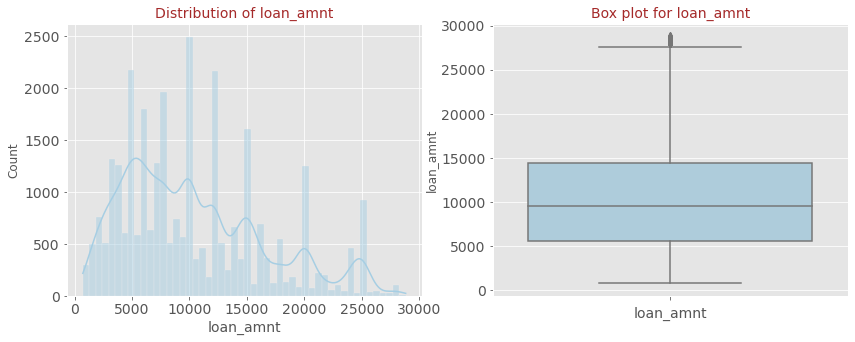

In [128]:
plt.subplot(121)
univariate_plots("loan_amnt", histogram = True, figsize=(14,5))
plt.subplot(122)
univariate_plots("loan_amnt", box_plot = True,figsize=(14,5))



## Observation:
- From the plots above it is clear that majority of the borrowers took out a loan of around 10k 
- We can also see that some borrowers have also borrowed money upto 30k

## 2) For Funded amount

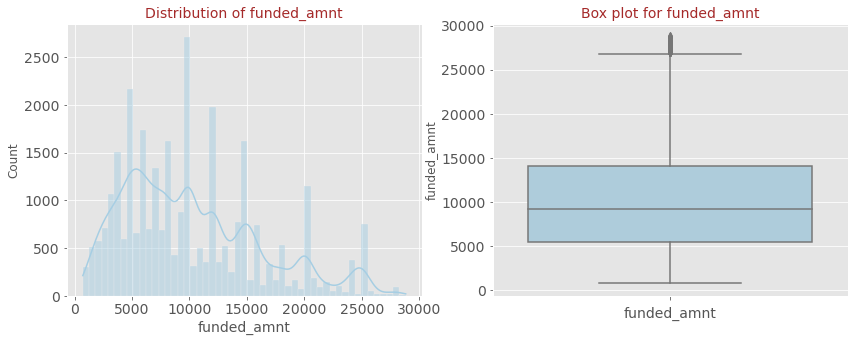

In [129]:
plt.subplot(121)
univariate_plots("funded_amnt", histogram = True, figsize=(14,5))
plt.subplot(122)
univariate_plots("funded_amnt", box_plot = True,figsize=(14,5))



## Observations:
- The observation here is interesting in the sense that the funded amount behaves similarly to that of Loan amount
- This says that almost all of the requested amount was approved by the lending club

## 3) The actual amount invested by the investors (funded_amnt_inv)

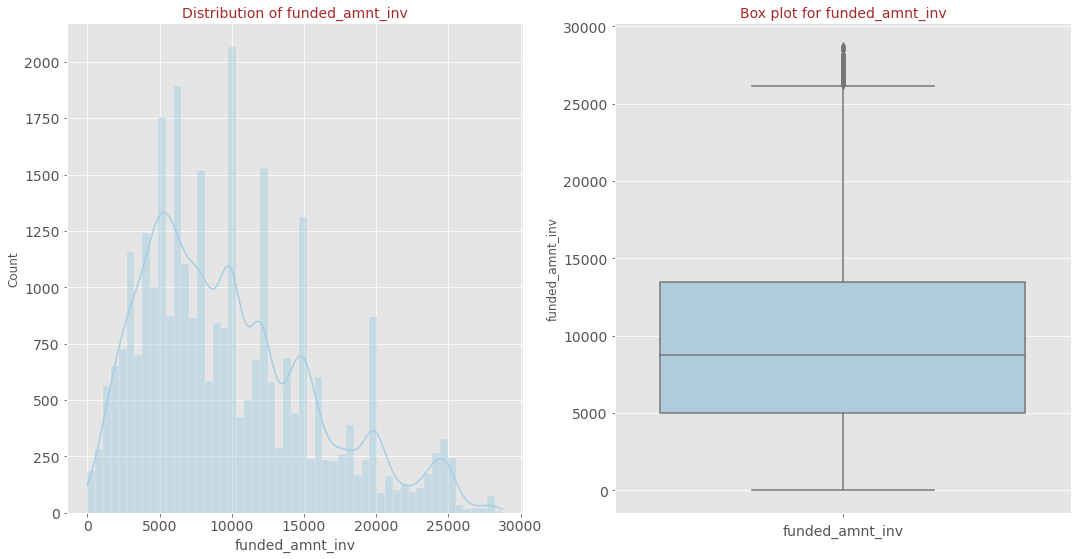

In [130]:
plt.subplot(121)
univariate_plots("funded_amnt_inv", histogram = True, figsize=(18,9))
plt.subplot(122)
univariate_plots("funded_amnt_inv", box_plot = True,figsize=(18,9))



## Observations:
- As expected the actual amount that the investors invested is identical to those of the previous plots
- We can conclude that the investors do take into account the aprroval of lending club


## 4) For Interest Rates


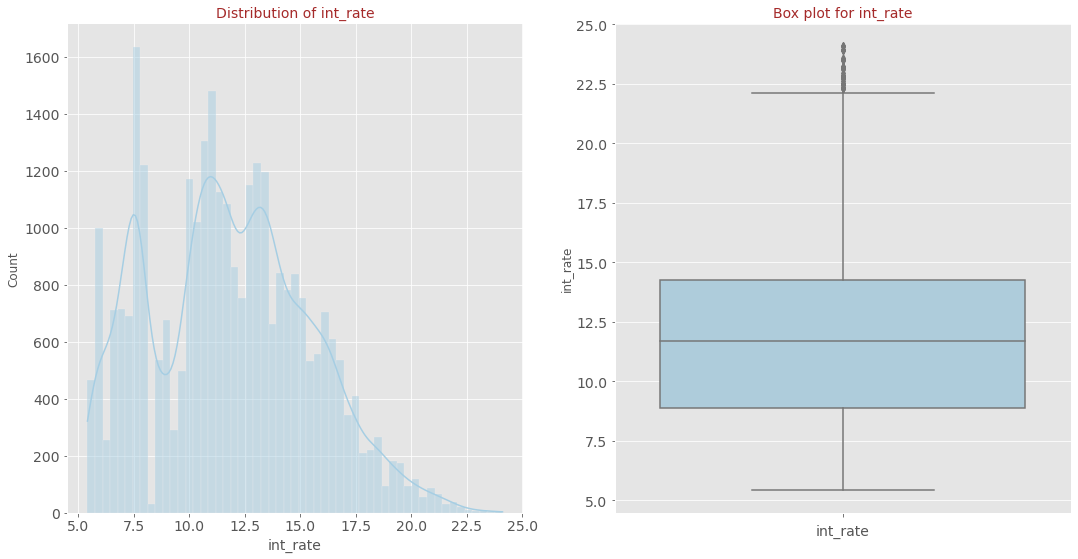

In [131]:
plt.subplot(121)
univariate_plots("int_rate", histogram = True, figsize=(18,9))
plt.subplot(122)
univariate_plots("int_rate", box_plot = True,figsize=(18,9))

In [132]:
clean_data["int_rate"].describe(percentiles = [0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.80, 0.95])

count    30335.000000
mean        11.817260
std          3.612103
min          5.420000
25%          8.900000
35%         10.370000
45%         11.140000
50%         11.710000
55%         12.210000
65%         13.230000
75%         14.270000
80%         14.960000
95%         17.990000
max         24.110000
Name: int_rate, dtype: float64

## Observations :
- We can see from the plots and data above that majority of the borrowers, borrowed loan on interest rate ranging from 8.9% to 14.8% 
- Some borrowers took a loan at higher interest rates i.e more than 22%

## 5) For Installements

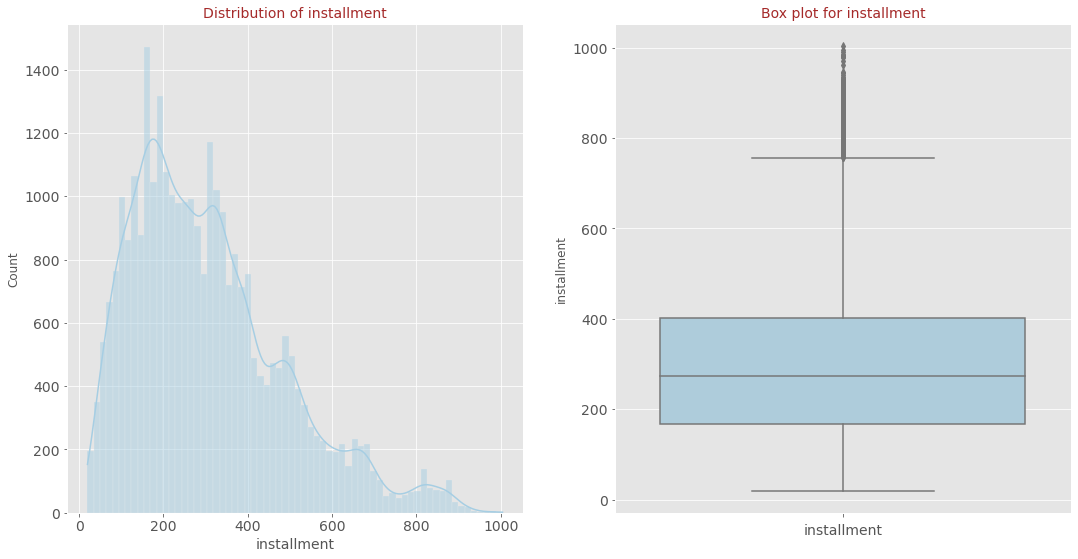

In [133]:
plt.subplot(121)
univariate_plots("installment", histogram = True, figsize=(18,9))
plt.subplot(122)
univariate_plots("installment", box_plot = True,figsize=(18,9))

## Observations:
- Majority of people have chosen to repay their loan at a monthly rate of $200 to $400
- There are some borrowers who have chosen to repay their loan in more than $800 per month
- More analysis is needed to investigate this behaviour of certain borrowers

## 6) For the numbers of years the borrower was employed (emp_length)

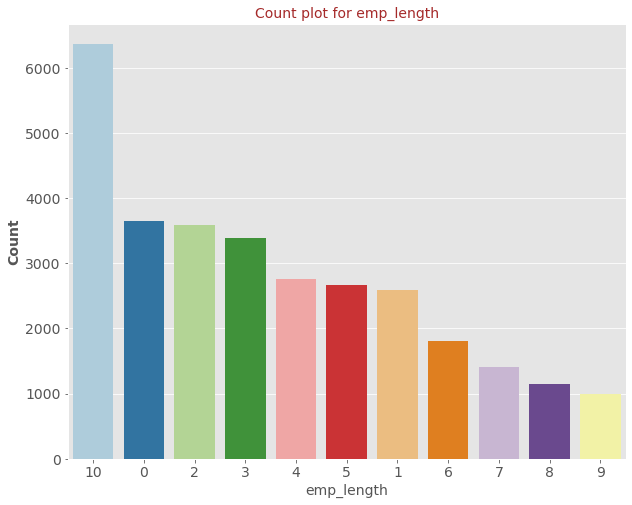

In [134]:
univariate_plots(column = "emp_length", count_plot = True, ordering = index_val(column = "emp_length", index = True))

## Observations:
- Most of the borrowers have been employed for 10 or more than 10 years
- The distribution is about the same for less than 1 year(0), 2 years and 3 years
- Further analysis is needed to understand the behaviour of emp_length w.r.t other variables

##  For annual income

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000., 225000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

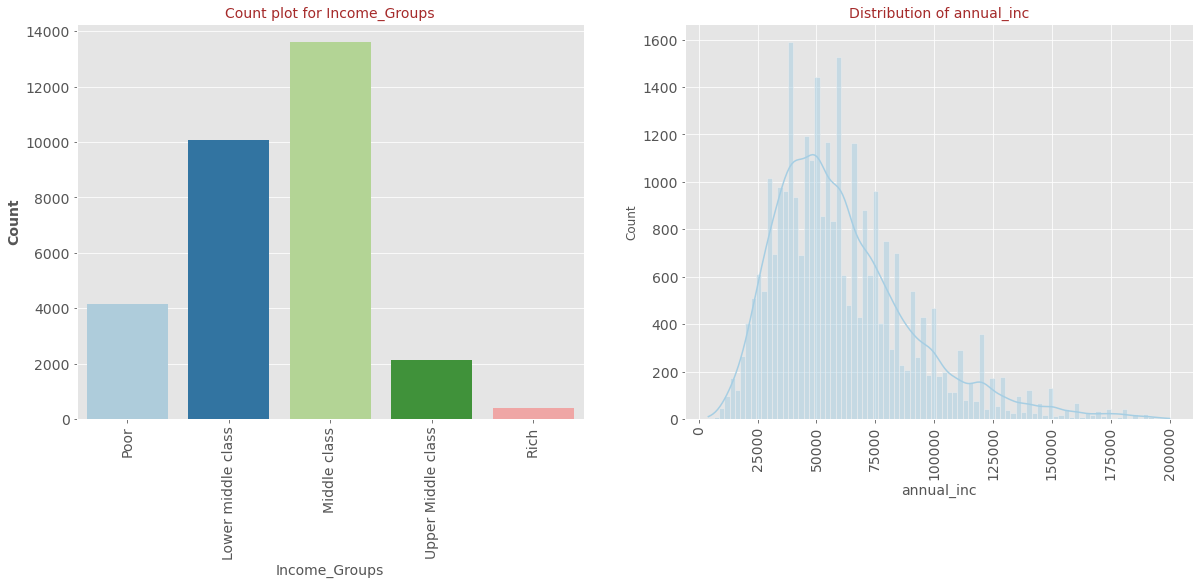

In [135]:
plt.subplot(221)
univariate_plots(column = "Income_Groups", count_plot = True, figsize = (20,16))
plt.xticks(rotation = 90)
plt.subplot(222)
univariate_plots(column = "annual_inc", histogram = True, figsize = (20,16))
plt.xticks(rotation = 90)

### More Inforamtion is needed so we will introduce a categorical variable, this will tell us how much do these groups earn

Text(0, 0.5, 'Annual Income')

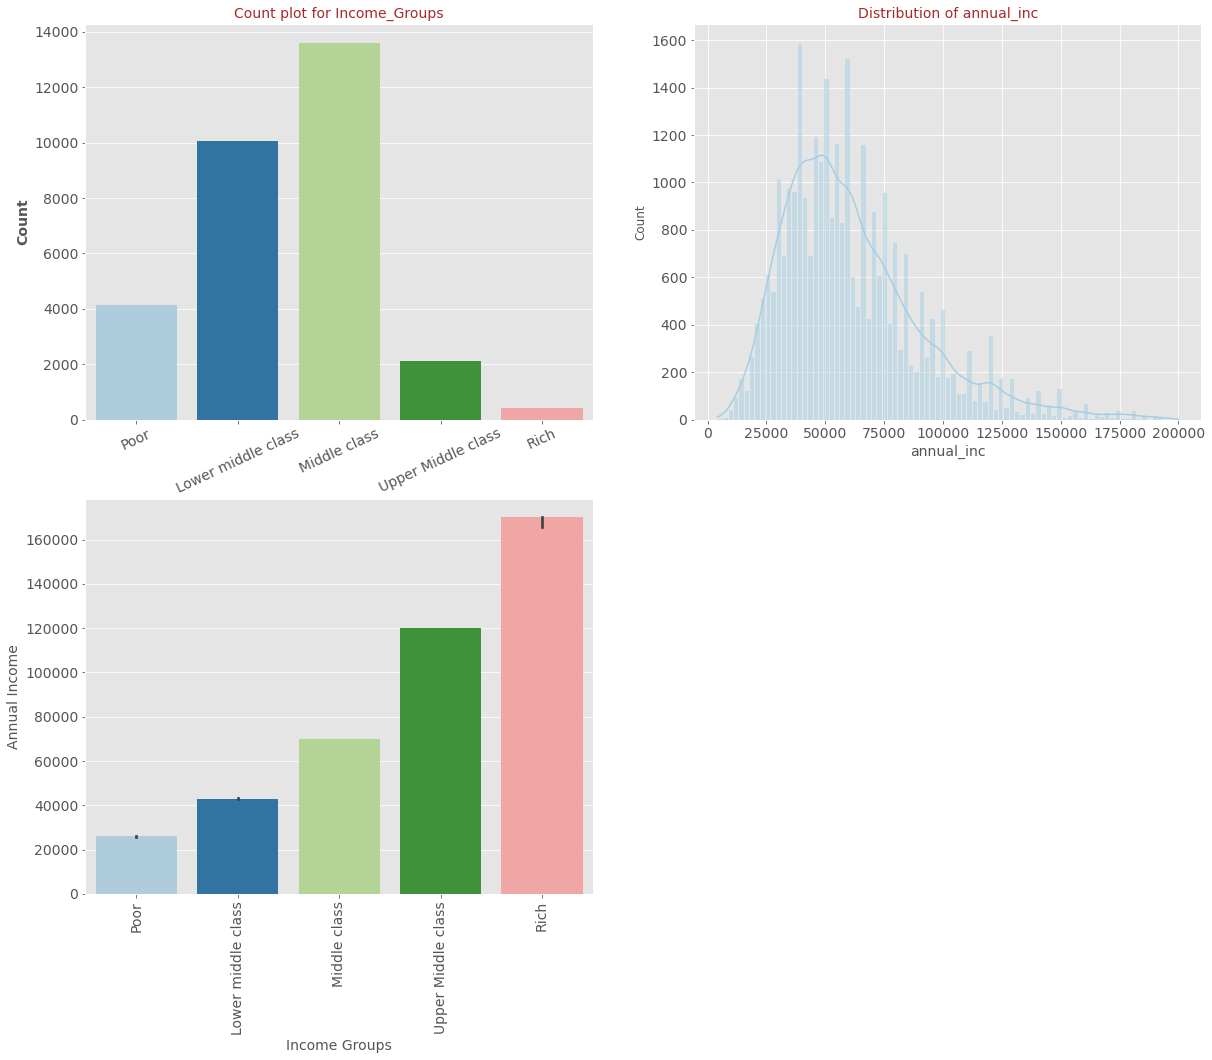

In [136]:
plt.subplot(221)
univariate_plots(column = "Income_Groups", count_plot = True, figsize = (20,16), rotate = 25)

plt.subplot(222)
univariate_plots(column = "annual_inc", histogram = True, figsize = (20,16))

plt.subplot(223)
sns.barplot(data = clean_data, x = "Income_Groups", y = "annual_inc", estimator = np.median)
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)
plt.xlabel("Income Groups", fontsize = 14)
plt.ylabel("Annual Income", fontsize = 14)

In [137]:
clean_data["annual_inc"].describe()

count     30335.000000
mean      61406.436905
std       30010.816705
min        4080.000000
25%       40000.000000
50%       55000.000000
75%       75306.000000
max      199992.000000
Name: annual_inc, dtype: float64

## Observations:
- From the first plot we can see that majority of the borrowers belong to Middle, followed by lower Middle class, the difference between these groups is comparitively less than any other group
- The second plot shows us the distribtuion of the borrower's annual income and majority of the borrowers earn between close to 40k and 75k annually
- The third plot simply shows us the median income of those groups which proves our observation number 1

## For DTI (Debt to income ratio)

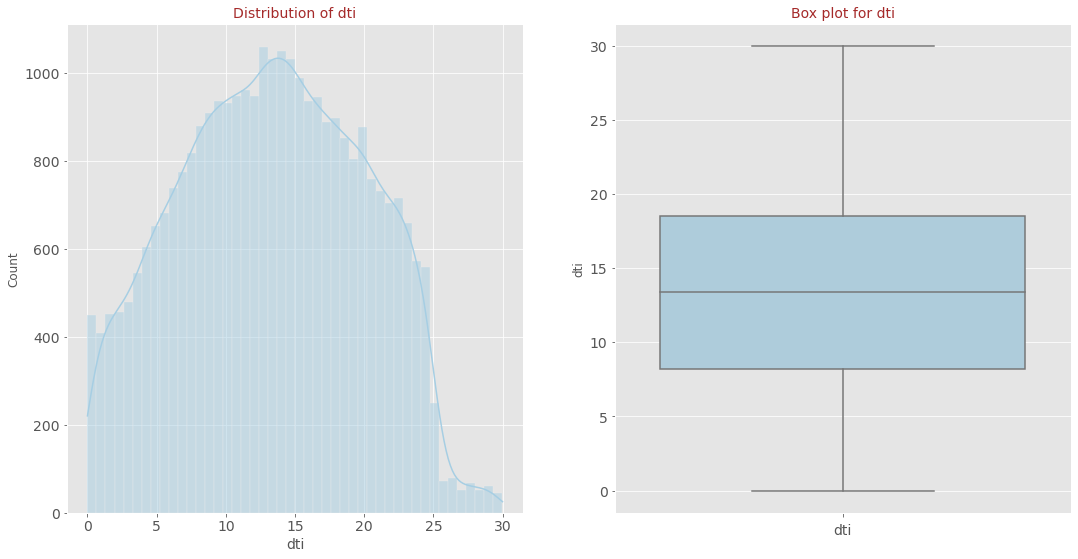

In [138]:
plt.subplot(121)
univariate_plots("dti", histogram = True, figsize=(18,9))
plt.subplot(122)
univariate_plots("dti", box_plot = True,figsize=(18,9))

## Observation:
- The distribution in the first plot looks like the shape of the bell which means that it represents normal distribution
- There arent any outliers in the second plot which is a good sign which means that the borrowers dti is less  or equal to 30 

- The ideal dti should be in the range of 36% to 40% but the mortgage is excluded which could have the possible implication that the dti could be a little bit higher than what it actually is

## For pub_rec i.e number of derogatory public records

Individual count for unqiue values of pub_rec are : 
 0    28703
1     1632
Name: pub_rec, dtype: int64 

Percent of data that each unqiue value of pub_rec represents : 
 0    94.62
1     5.38
Name: pub_rec, dtype: float64


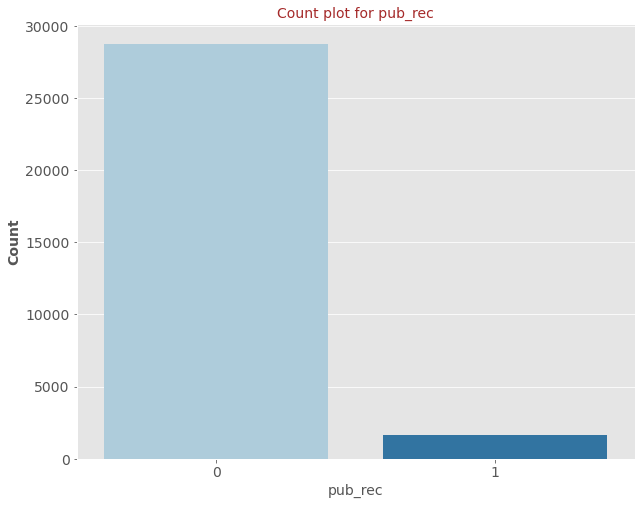

In [139]:
univariate_plots(column = "pub_rec", count_plot = True)
general_info(column = "pub_rec", dataframe = clean_data)

## Observations:
- From the information and plot above, around 95% of the borrowers have no record of public derogatory
- Further analysis required to understand this variable and how it behaves or affects other variable

revol_util(%)
count   30335.000000
mean       49.070554
std        28.045320
min         0.000000
25%        26.200000
35%        35.800000
45%        45.200000
50%        49.500000
55%        54.100000
65%        63.000000
75%        72.200000
85%        82.000000
95%        93.600000
99%        98.500000
max        99.900000

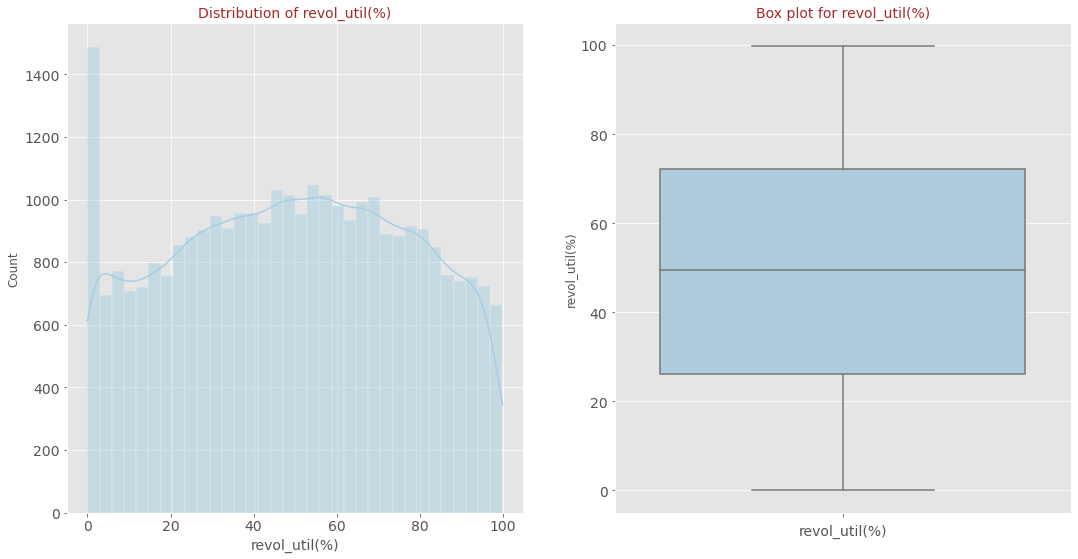

In [140]:
plt.subplot(121)
univariate_plots("revol_util(%)", histogram = True, figsize=(18,9))
plt.subplot(122)
univariate_plots("revol_util(%)", box_plot = True,figsize=(18,9))

clean_data[["revol_util(%)"]].describe(percentiles = [0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 0.99])

## Observations:
- From the data and plot above all the utilization rates are similar with an increment of 10 for evry 10 % increase in  percentile

- Below is the link to an article implies that a good utilization rate is where one can repay thier credit card balance every month and the utilization rate should be less than 30%

- Link for the said article: https://www.nationalfunding.com/blog/what-is-revolving-utilization-how-to-improve-it/

## For number of public record bankruptcies (pub_rec_bankruptcies)

Individual count for unqiue values of pub_rec_bankruptcies are : 
 0.0    28996
1.0     1339
Name: pub_rec_bankruptcies, dtype: int64 

Percent of data that each unqiue value of pub_rec_bankruptcies represents : 
 0.0    95.59
1.0     4.41
Name: pub_rec_bankruptcies, dtype: float64


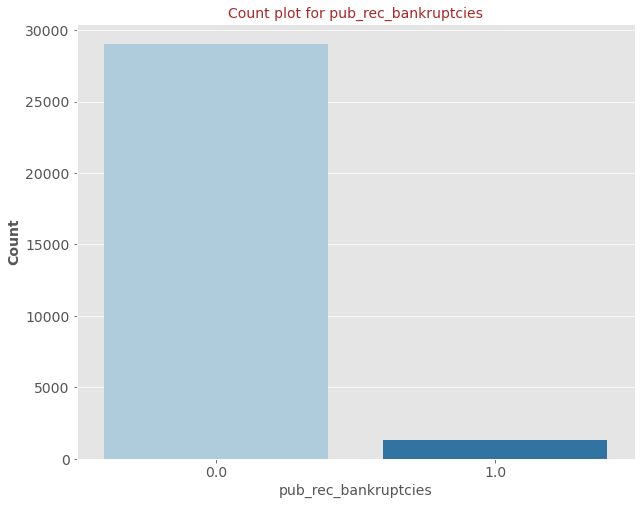

In [141]:
univariate_plots(column = "pub_rec_bankruptcies", count_plot = True)
general_info(column = "pub_rec_bankruptcies", dataframe = clean_data)


## Observations:
- Around 96% of the borrowers do not have any bankruptcy record which is a good sign,  implying that the Lending club takes into account the financila history of the borrower and lends acoordingly

## The year in which loan was funded (issue_d_year)

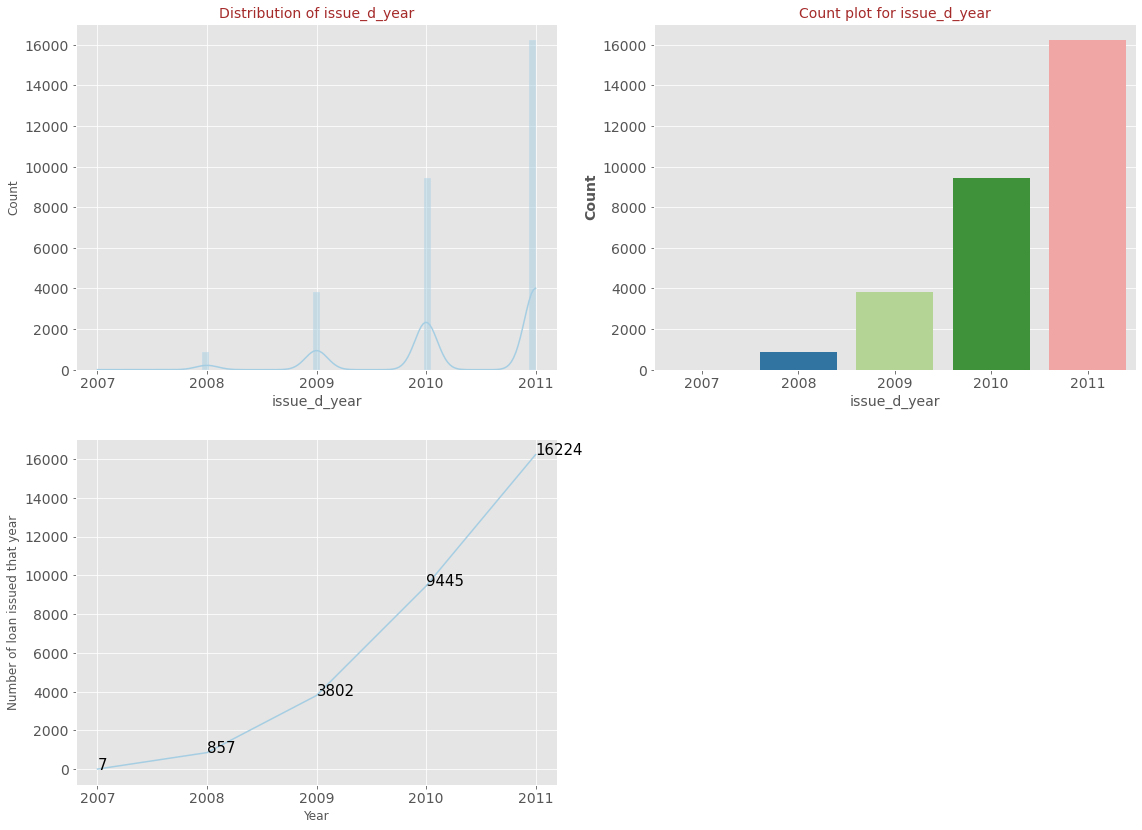

In [142]:
plt.subplot(221)
univariate_plots(column = "issue_d_year", histogram = True, figsize = (19, 14))
plt.xticks(ticks = [2007, 2008, 2009, 2010, 2011], labels = [2007, 2008, 2009, 2010, 2011])

plt.subplot(222)
univariate_plots(column = "issue_d_year", count_plot = True, figsize = (19, 14))

plt.subplot(223)
sns.lineplot(x = clean_data["issue_d_year"].value_counts().index, 
             y = clean_data[["issue_d_year"]].value_counts().values)


plt.xlabel("Year")
plt.ylabel("Number of loan issued that year")
plt.xticks(ticks = [2007, 2008, 2009, 2010, 2011], labels = [2007, 2008, 2009, 2010, 2011], fontsize = 14)
plt.yticks(fontsize = 14)

for i in zip(clean_data["issue_d_year"].value_counts().index, clean_data["issue_d_year"].value_counts().values):
    plt.annotate(str(i[1]), xy = i, fontsize = 15)
    
plt.gcf().set_size_inches(19, 14)



## Observations : 
- Lending club has been steadily increasing their loan issues with every passing year
- Since its inception in 2006 the company has seen steady growth with it shwoing linear progression over 5 years

## For the number of payments on the loan (term)



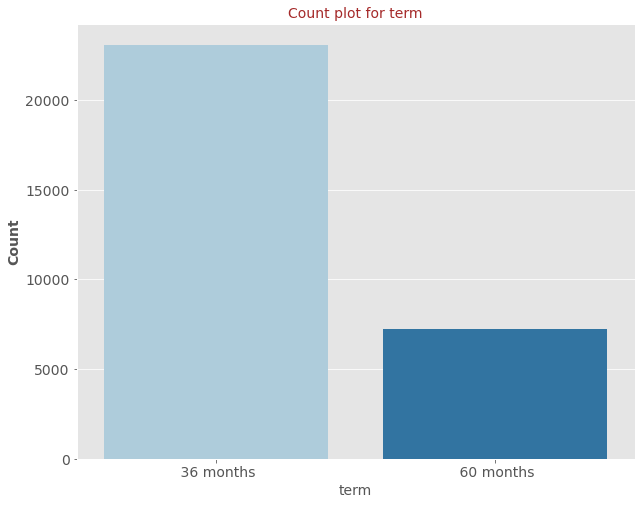

In [143]:
univariate_plots(column = "term", count_plot = True)


## Observations:
- Here we have pretty basic analysis that majority of borrowers have chosen to repay their loan in 36 months 
- More analysis and variables are needed to be introduced to derive insights on this variable

## For loan grade

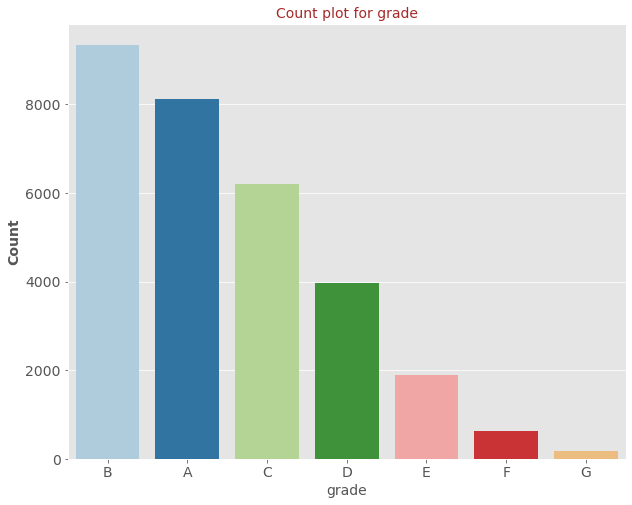

In [144]:
univariate_plots(column = "grade", count_plot = True, ordering = index_val("grade", index = True))

## Observations:
- Below are two links which were referred as well as the countplot above to derive insights,
- From this https://www.lendingclub.com/foliofn/rateDetail.action and this https://www.debt.org/credit/loans/personal/lending-club-review/ it is clear that a lower grade can result in higher interest rates which we saw as outliers in our previous plots

- This plots resonates well with our previous analysis, also we can see that most borrowers were awarded with grade B, borrowers with grade A and C are also well within range you can say that there arent dissimilar

## For Subgrade

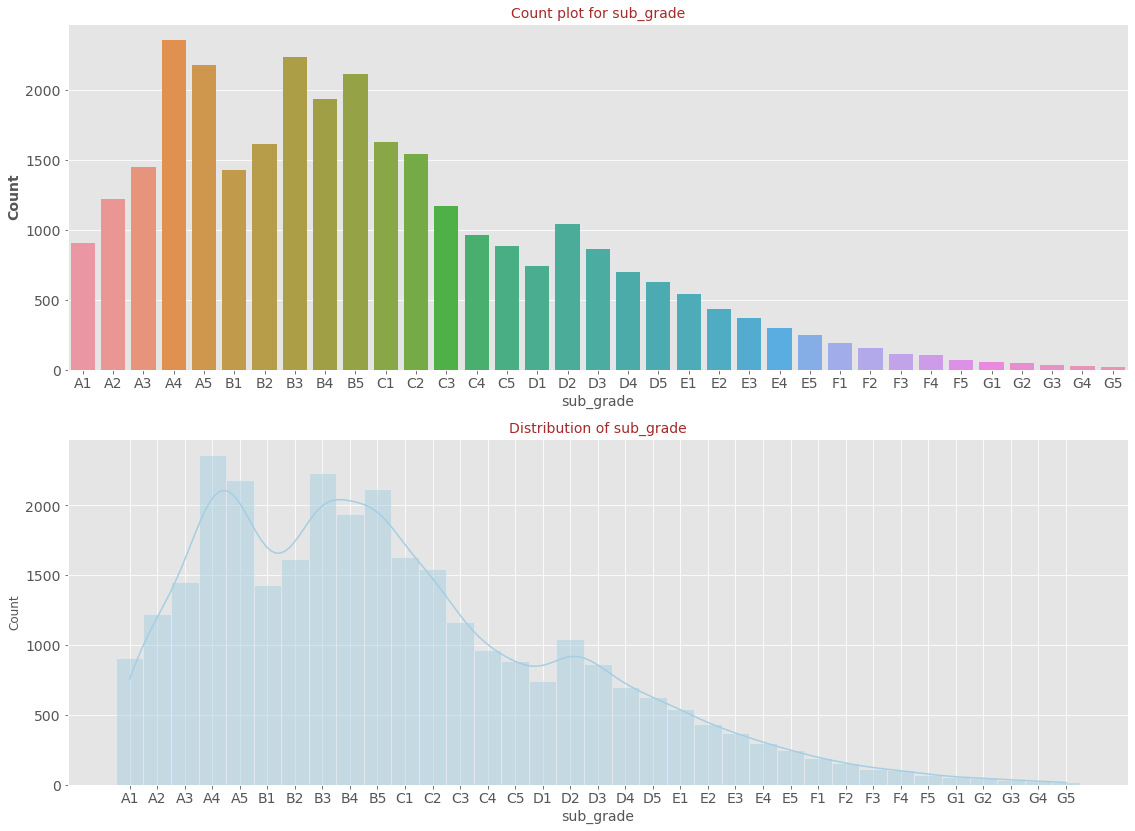

In [145]:
plt.subplot(211)
univariate_plots(column = "sub_grade", count_plot = True, dataframe = clean_data.sort_values(by = "sub_grade"),
                figsize = (19, 14))
plt.subplot(212)
univariate_plots(column = "sub_grade", histogram = True, dataframe = clean_data.sort_values(by = "sub_grade"),
                figsize = (19, 14))

## Observations :
- There are more number of borrowers who are assigned subgrade A4, A5, B3, B4, B5 that means that these people have to pay comparitvely less interest

## For Home ownership provided by the borrower (home_ownership)

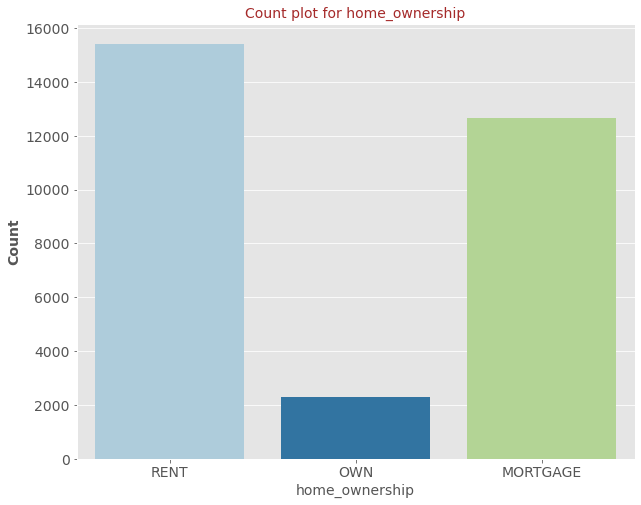

In [146]:
univariate_plots(column = "home_ownership", count_plot = True, figsize = (10, 8))

## Observations:
- Most of the borrowers either rented thier home or have their home mortaged
- This plot also indicates that borrowers who own their house dont tend to take out a loan, whereas in the other two cases borrowers may have taken out a loan either to pay thier rent or to pay their mortgage
- Further analysis is needed is to derive more accurate and meaningful insights 


##  For verification status 

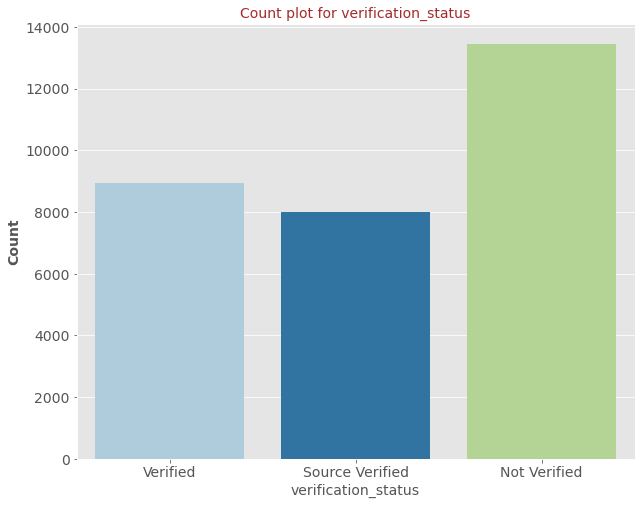

In [147]:
univariate_plots(column = "verification_status", count_plot = True)

## Observations:
- We can clearly infer that the number of borrowers who have not verified their income exceeds that of borrowers who have their income verififed or atleast the source of income verified
- This can possibly indicate that the borrower may not have a steady source of income, or no income at all
- The number of borrowers belonging to Verified and Source Verified categories appears to be the same
- This means that the loan was approved for borrowers without any proper income verification

## For loan status

Individual count for unqiue values of loan_status are : 
 Fully Paid     31525
Charged Off     5265
Name: loan_status, dtype: int64 

Percent of data that each unqiue value of loan_status represents : 
 Fully Paid     85.69
Charged Off    14.31
Name: loan_status, dtype: float64


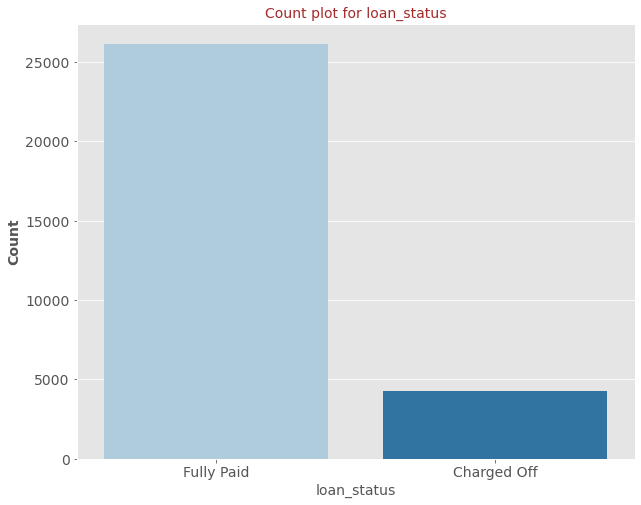

In [148]:
univariate_plots(column = "loan_status", count_plot = True)
general_info(column = "loan_status")

## Observations:
- Despite our infernece from the previous plots which more or less indicated that there could be more defaulters, this plots uproots that theory with the majority actually being able to full pay thier loan with only 14% who defaulted

## For purpose 

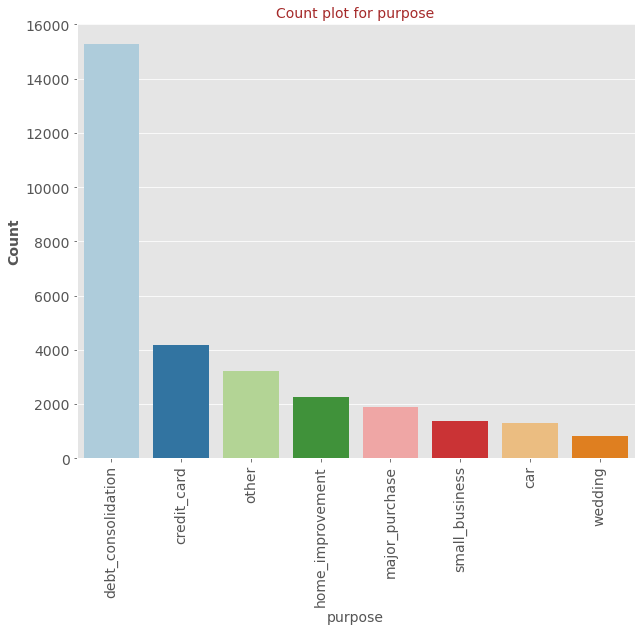

In [149]:
univariate_plots(column = "purpose", count_plot = True, ordering = index_val("purpose", index = True),
                 rotate = 90)

## Observations:
- We can see the most of the people took out a loan to settle their debt
- This could mean that they maybe falling back to pay thier rent or mortgage from our home_ownership plot
- From our revol_util plot we werent able to check how well the utilzation rate was for the borrowers as it didnt take into account the mortgage and other factors but this plot clears some doubts we had and made the picture a bit more clear 

## For State that the borrower mentioned

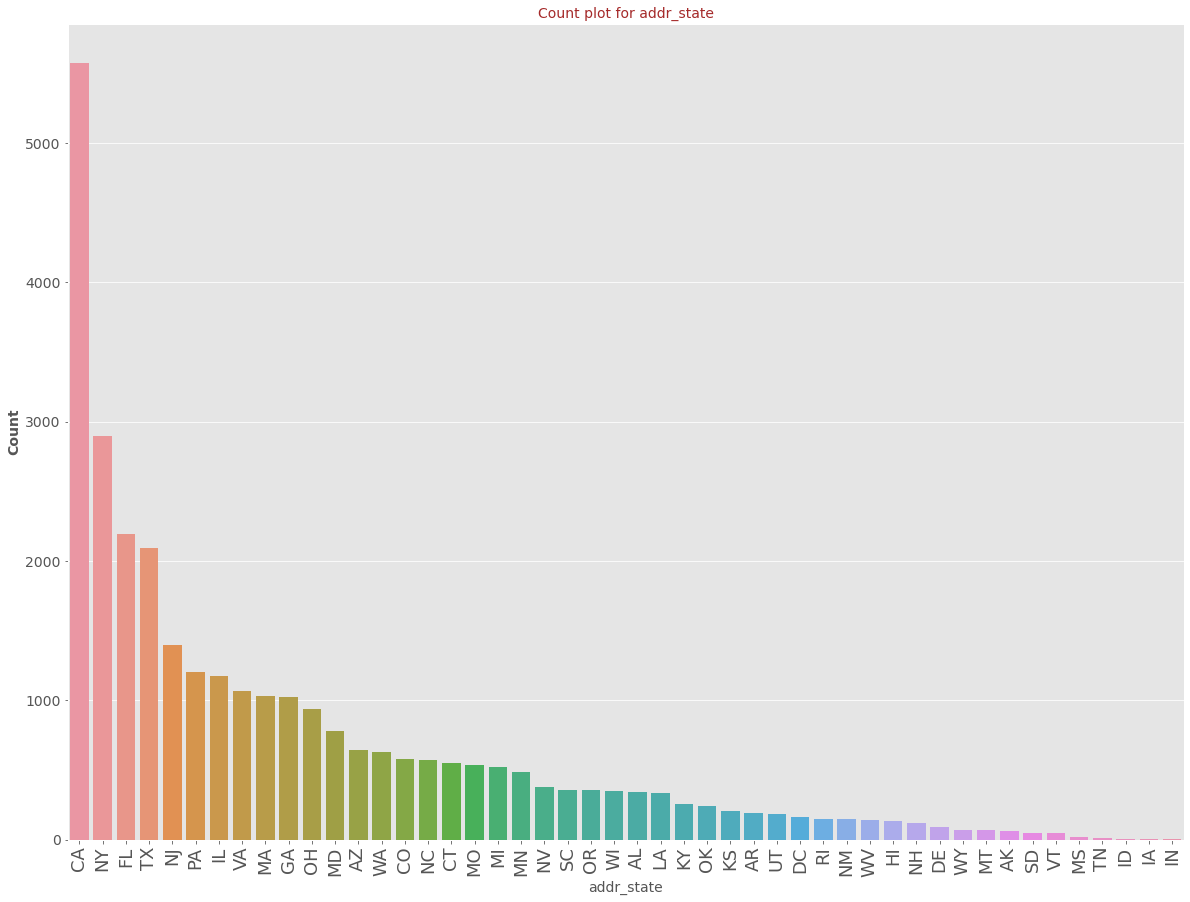

In [150]:
univariate_plots(column = "addr_state", count_plot = True, ordering = index_val(column = "addr_state", index = True),
                 figsize = (20, 15), rotate = 90)
plt.xticks(fontsize = 18)
plt.show()

## Observation:
- Majority of the borrower belong to CA (California) and NY (New York)

# CONCLUSION FOR UNIVARIATE ANALYSIS :
- We were able to derive some meaninful insights from certain variables but in most of them further analysis were needed as the data on its own wasnt able to provide a clear picture.
- Some useful variables which were able to provide some sort of insight are as follows:
 - loan_amnt, funded_amnt, funded_amnt_inv (These variables behaved similarly)
 - annual_inc and Income_Groups
- The rest of the variables either were inconclusive or needed further analysis with other variables to see how that variable affects the other which we will be shortly seeing in our next type of analysis i.e <b> Bivariate and Multivariate analysis </b>


### Before we start with our bi-variate and multi-variate analysis we will make a correlation matrix using heatmaps just to get an overview of how one variable complements the other this could be both helpful and useful as we wont have to plough through every variable to check their relationship, which means that if one variable doesnt affect another or the correlation is close to zero then it doesnt make sense to explore those varibales as we wont derive any groundbreaking insights but in the end its upto us if we want to explore those variables or leave it out

In [151]:
df_corr = clean_data.corr()

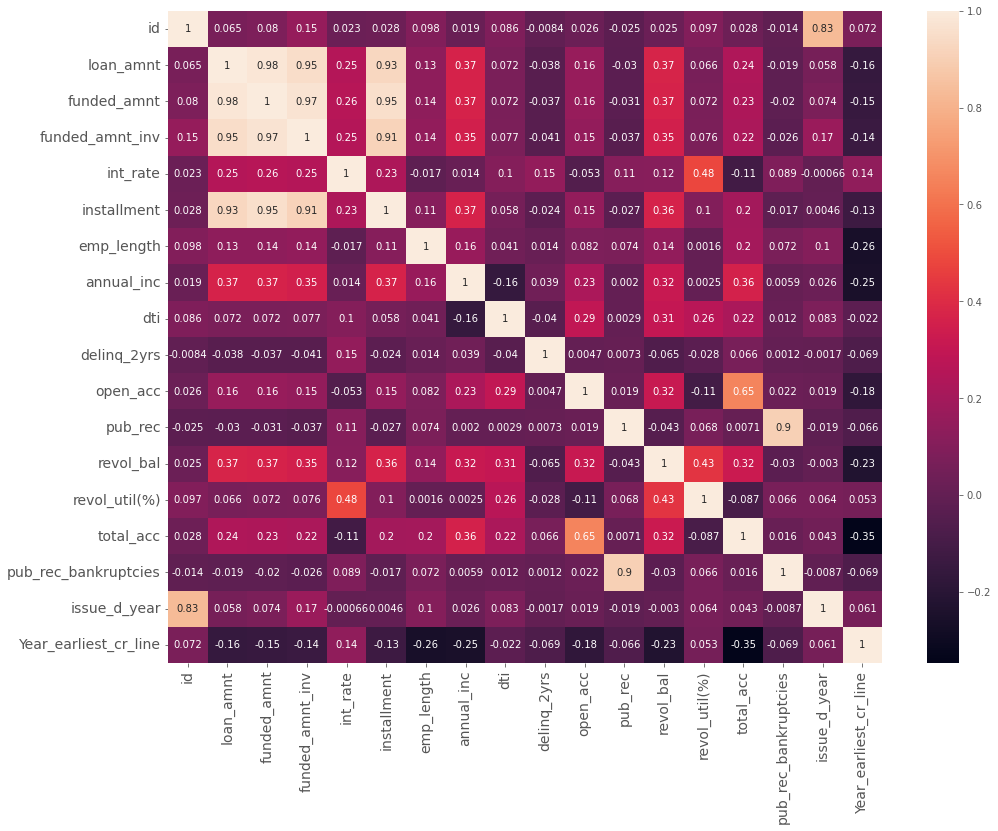

In [152]:
sns.heatmap(data = df_corr, annot = True)
plt.gcf().set_size_inches(16,12)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [153]:
# Here I find that I want the loan_status to be in numerical form so I can analyse and comapre it with other variabels in a more effective way

clean_data["FullyPaid_or_ChargedOff"] = clean_data["loan_status"].apply(lambda x : 0 if x == "Fully Paid" else 1)
clean_data.to_csv("Clean_data1.csv")

clean_data1 = pd.read_csv("Clean_data1.csv")
clean_data1.drop("Unnamed: 0", inplace=True, axis = 1)
#clean_data1.rename(columns = {"revol_util" : "revol_util(%)"}, inplace=True)


### Now we can see which variables we can potentially use to derive meaninful insights to get a better understanding of the data and achieve our business goal

### This matrix is for continuous variables and we can see that the upper half proves to be useful, indicating that maybe the lower half can be better off with categorical variables, we will deciefer this one by one


In [154]:
# We will first define a function for our bivariate and multivariate analysis

In [155]:
def bivariatePlots(x, y, hues = None, bar_plot = False, box_plot = False, 
                   line_plot = False, count_plot = False, linewidth = 0,
                   palette = None,
                   rotation = 0, ordering = None, estimator = np.mean,
                   figsize = (10,8), font_size = 14,
                   dataframe = clean_data1):
    if bar_plot:
        sns.barplot(data = dataframe, x=x, y=y, hue=hues, estimator = estimator, order = ordering, edgecolor = "black",
                   palette = palette)
        plt.title(label= f"Bar plot between {x} and {y}", fontdict = {"fontsize" : font_size})
        plt.xlabel(xlabel = x, fontsize = font_size)
        plt.ylabel(ylabel = y, fontsize = font_size)
        plt.xticks(fontsize = font_size, rotation = rotation)
        plt.yticks(fontsize = font_size)
        plt.gcf().set_size_inches(figsize)
        
    elif box_plot:
        sns.boxplot(data = dataframe, x=x, y=y, hue=hues, order = ordering, palette = palette)
        plt.title(label= f"Box plot between {x} and {y}", fontdict = {"fontsize" : font_size})
        plt.xlabel(xlabel = x, fontsize = font_size)
        plt.ylabel(ylabel = y, fontsize = font_size)
        plt.xticks(fontsize = font_size, rotation = rotation)
        plt.yticks(fontsize = font_size)
        plt.gcf().set_size_inches(figsize)
        
    elif line_plot:
        sns.lineplot(data = dataframe, x=x, y=y)
        plt.title(label= f"Line plot between {x} and {y}", fontdict = {"fontsize" : font_size})
        plt.xlabel(xlabel = x, fontsize = 14)
        plt.ylabel(ylabel = y, fontsize = 14)
        plt.xticks(fontsize = 14, rotation = rotation)
        plt.yticks(fontsize = 14)
        plt.gcf().set_size_inches(figsize)
        
    elif count_plot:
        sns.countplot(data = dataframe, x=x, hue=hues, order = ordering)
        plt.title(label= f"Count plot between {x} and {y}")
        plt.xlabel(xlabel = x, fontsize = font_size)
        plt.xlabel(xlabel = x, fontsize = font_size)
        plt.xticks(fontsize = font_size)
        plt.yticks(fontsize = font_size)
        plt.gcf().set_size_inches(figsize)
        
        
    else:
        print("Pass a Boolean value to any of the follwing plots, \n [bar_plot, box_plot, line_plot]")

In [156]:
def graph_index(x, y, dataframe = clean_data1):
    return dataframe.groupby(x).mean()[y].sort_values().index

In [157]:
cat_and_cont(clean_data1)

Categorical variables are as follows : 
1) term
2) grade
3) sub_grade
4) home_ownership
5) verification_status
6) loan_status
7) purpose
8) title
9) addr_state
10) issue_d_month
11) Month_earliest_cr_line
12) Income_Groups
 
Continuous variables are as follows : 
1) id
2) loan_amnt
3) funded_amnt
4) funded_amnt_inv
5) int_rate
6) installment
7) emp_length
8) annual_inc
9) dti
10) delinq_2yrs
11) open_acc
12) pub_rec
13) revol_bal
14) revol_util(%)
15) total_acc
16) pub_rec_bankruptcies
17) issue_d_year
18) Year_earliest_cr_line
19) FullyPaid_or_ChargedOff


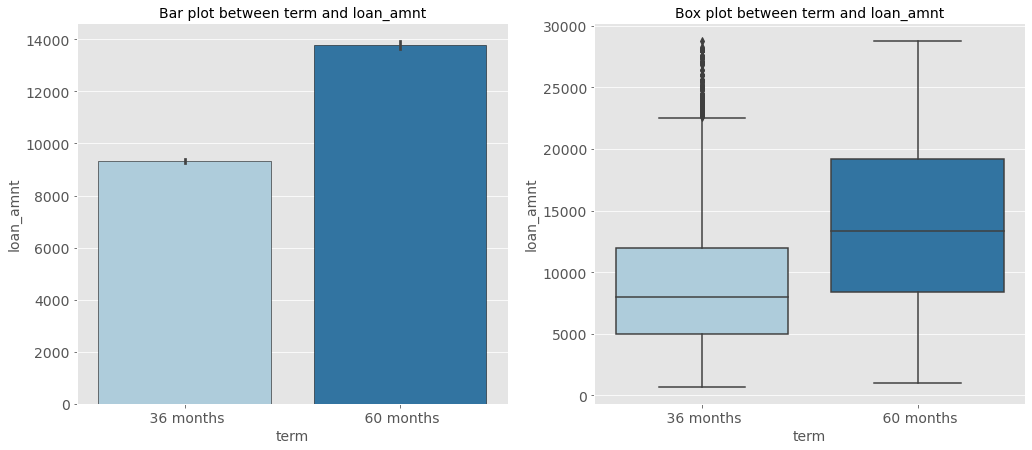

In [158]:
## Term vs Loan amount
cat = "term"
cont = 'loan_amnt'

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (17,7))

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17,7))

## Observations:
- We can see from the plot that the borrowers who have taken a higher amount of loan have chosen to repay the loan in 60 months on an average

## Term vs Interest rates

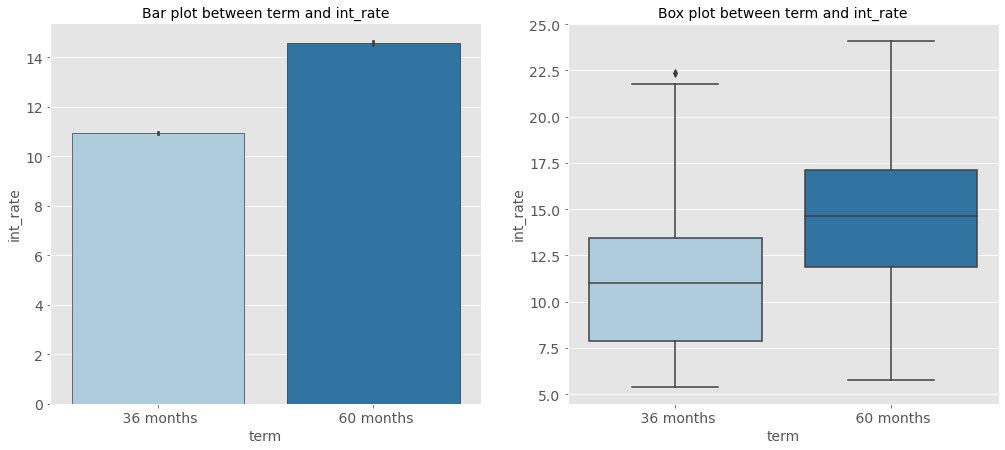

In [159]:
cat = "term"
cont = "int_rate"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (17,7))

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17,7))

## Observations:
- The average interest rates are also higher for borrowers who have opted to repay their loans in 60 months
- More analysis needed to understand these variables 

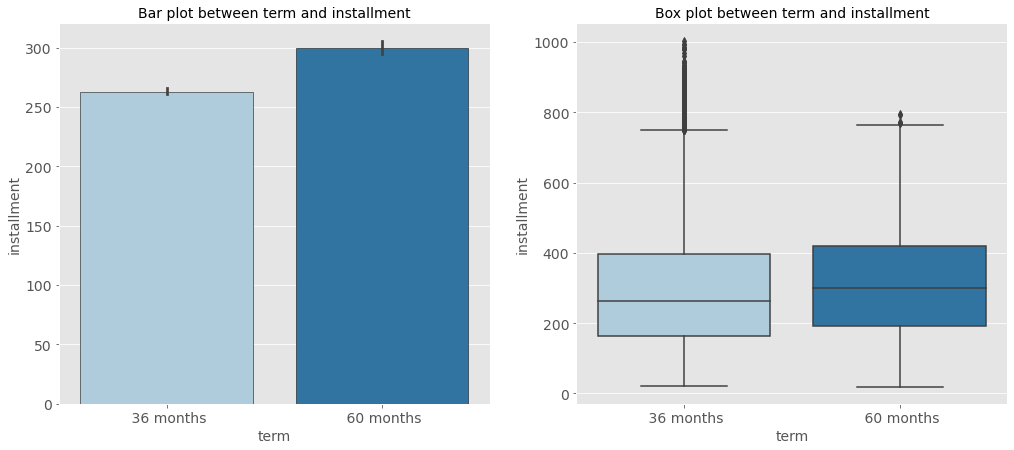

In [160]:
## Term vs installment
cat = "term"
cont = "installment"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (17,7), estimator = np.median)

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17,7))

## Observations:
- A pretty basic observation that the monthly payment is on the higher end for the plan of 60 months, it makes sense since borrowers in this plan have on an average taken out a higher amount of loan

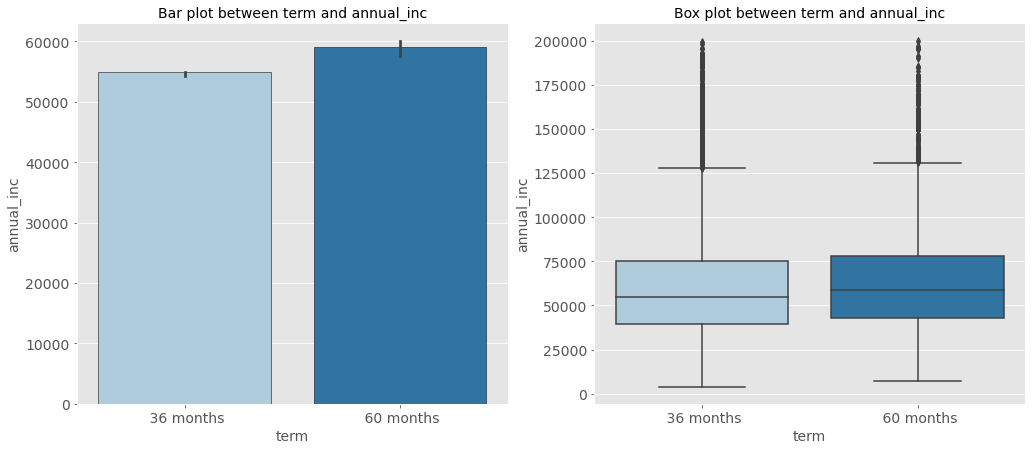

In [161]:
## Term vs emp_length (Number of years the borrower was employed for)
cat = "term"
cont = "annual_inc"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (17,7), estimator = np.median)

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17,7))



## Observations:
- The annual median income of borrower who have opted for 60 months plan is slightly higher than those who haveopted for 36 months

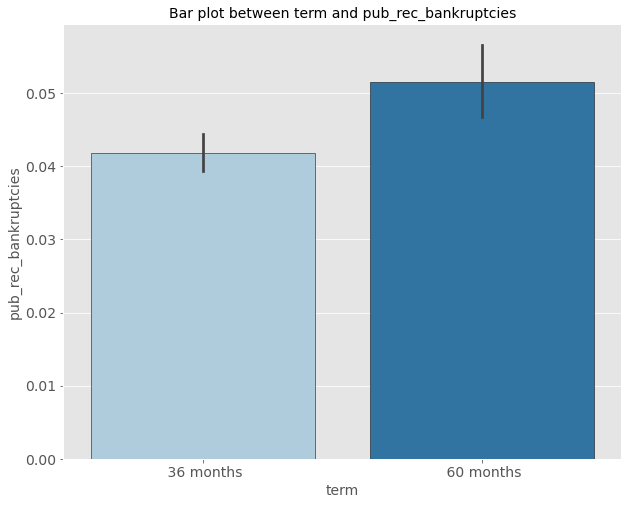

In [162]:
## Term vs pub_rec_bankruptcies (Number of record public bankruptcies)
cat = "term"
cont = "pub_rec_bankruptcies"

bivariatePlots(x = cat, y = cont, bar_plot = True)



## Observations:
- We can refer from the plot that borrowers who have a history of being bankrupt tend to opt for 60 months plan
- And we alos inferred from our previous analysis that thatmost of the borrowers have opted for 60 months plan at a higher loan amount

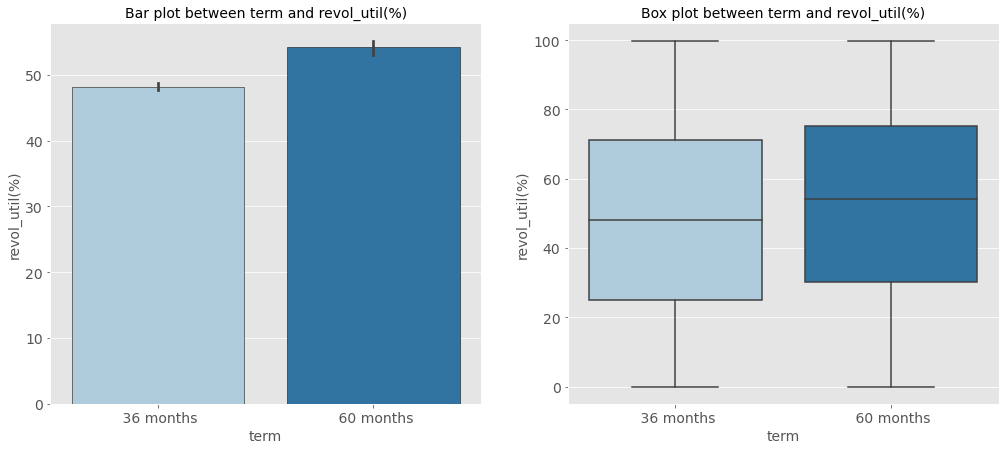

In [163]:
## Term vs revol_util 
cat = "term"
cont = "revol_util(%)"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (17,7), estimator = np.median)

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17,7))



## Observations:
- The credit line utlization is a bit worse in 60 months plan

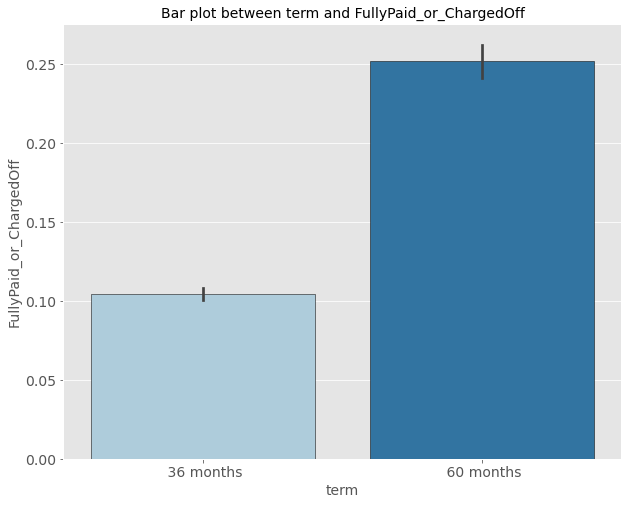

In [164]:
## Term vs loan status
cat = "term"
cont = "FullyPaid_or_ChargedOff"


bivariatePlots(x = cat, y = cont, bar_plot = True)





## Observations:
- The visualization clearly depicts that the borrowers who have opted for 60 months plan have a much higher defaulter ratio but we need more information to conclude the same for sure

## Grade vs Annual income

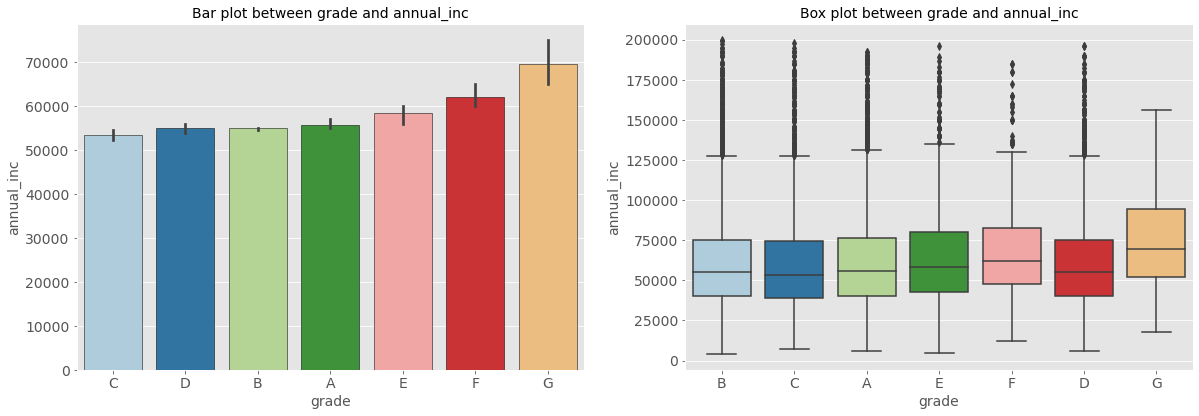

In [165]:
plt.subplot(221)
bivariatePlots(x = "grade", y = "annual_inc", 
               ordering = clean_data.groupby("grade").mean()["annual_inc"].sort_values().index,
               bar_plot=True, figsize = (20,14), estimator = np.median)

plt.subplot(222)
bivariatePlots(x = "grade", y = "annual_inc", box_plot = True, figsize = (20,14))


## Observations:
- From the plot one can deduce that as the annual income of the borrowers increase their grade decreases, although it is not quite prominent in grade C, D, B and A but we can see this trend on grade E, F, G
- This is expected from people who have a higher purchasing power, they are more likely to spend especially on materials which require maintainence or long term investments such as a car or a house
- We took the median in the bar chart so that we can get some sort of an accuarte idea of the annual income of the people in that grade
- The outliers can be borrowers whose expenditures are on the lower end, so lending club should focus more on the expenditure or long term investment of the borrowers

## Grade vs loan_status

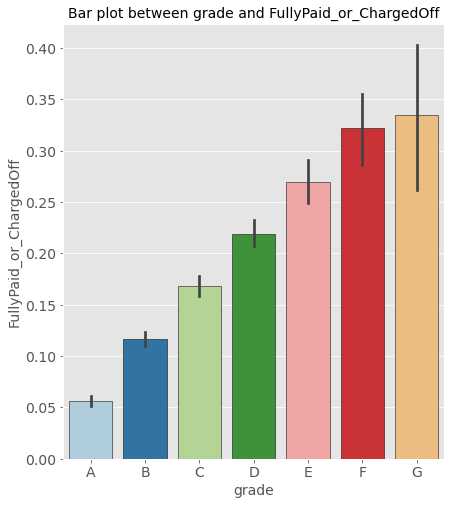

In [166]:
plt.subplot(121)
bivariatePlots(x = "grade", y = "FullyPaid_or_ChargedOff", bar_plot = True,  figsize = (15,8),
              ordering = clean_data1.groupby("grade").mean()["FullyPaid_or_ChargedOff"].sort_values().index)


## Observations:
- The defaulter ratio or in simple terms the bowrrowers who are more likely to default; increases with a fall in grade

- This can be attributed to high interest rates that comes with every falling grade
- If LC wants to reduce the defaulter ratio then it needs to either restrict or limit the amount of loan issued on high interest rates

## Grade vs Loan amount

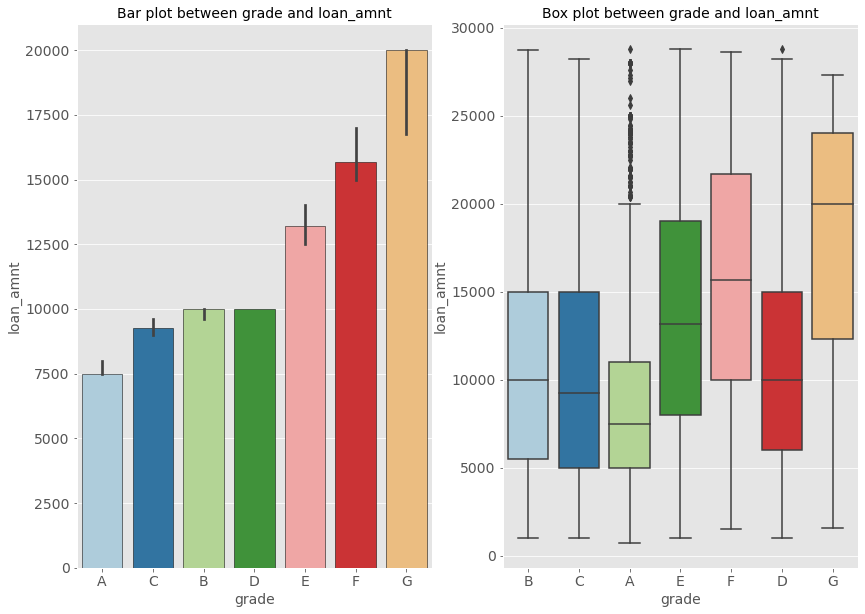

In [167]:
plt.subplot(121)
bivariatePlots(x = "grade", y = "loan_amnt", bar_plot = True, estimator = np.median,
              ordering =  clean_data1.groupby("grade").mean()["loan_amnt"].sort_values().index,
              figsize = (14,10))

plt.subplot(122)
bivariatePlots(x = "grade", y = "loan_amnt", box_plot = True, figsize = (14,10))

## Observations:
- The median loan taken out by borrowers is the highest on grade G that means the interest rate will also be on the higher end 
- We will analyse this further based on a third variable to see exactly for what these loans are for

## Grade vs Number of years the borrower was employed for (emp_length)

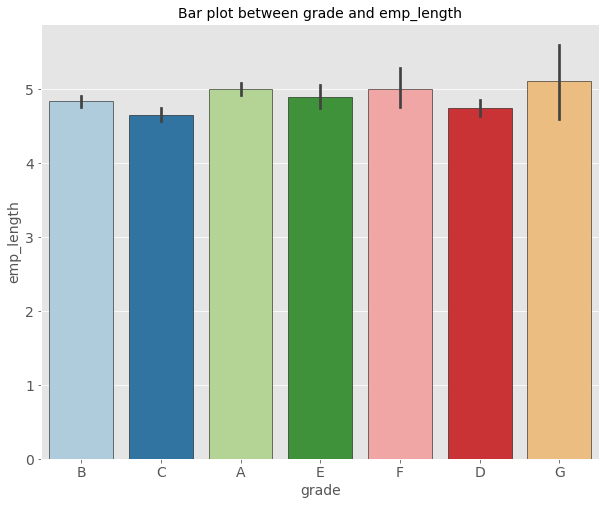

In [168]:
bivariatePlots(x = "grade", y = "emp_length", bar_plot = True)

## Observation:
- The distribution is about the same in the plot above so we can conclude that grade vs emp_length doesnt give us any significant insight

## Grade vs revol_util

count    30335.000000
mean        49.070554
std         28.045320
min          0.000000
25%         26.200000
50%         49.500000
75%         72.200000
max         99.900000
Name: revol_util(%), dtype: float64

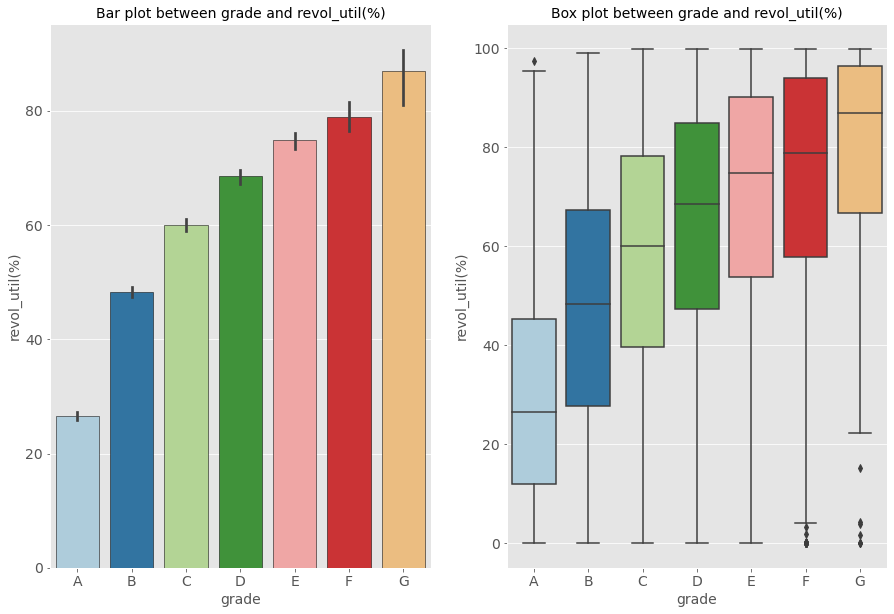

In [169]:
plt.subplot(121)
bivariatePlots(x = "grade", y = "revol_util(%)", bar_plot = True,
              ordering = clean_data1.groupby("grade").mean()["FullyPaid_or_ChargedOff"].sort_values().index,
               figsize=(15,10), estimator=np.median)

plt.subplot(122)
bivariatePlots(x = "grade", y = "revol_util(%)", box_plot = True,
              ordering = clean_data1.groupby("grade").mean()["FullyPaid_or_ChargedOff"].sort_values().index,
              figsize=(15,10))

clean_data1["revol_util(%)"].describe()

## Observations:
- Frome the univarite analysis we have already deduced that a good utilization rate is about 30% - 40% but from the plots above we can see that a fall in grade indicates a bad utlization rate with the rate shooting well beyond 40% for every grade other than A
- We do have some borrowers in grade with their rate shooting above 40% but thier count is almost negligible
- LC needs to closely investigate the available balance that is being utilized by the borrowers

## Grade vs Installements (The monthly payment owed by the borrower if the loan originates)


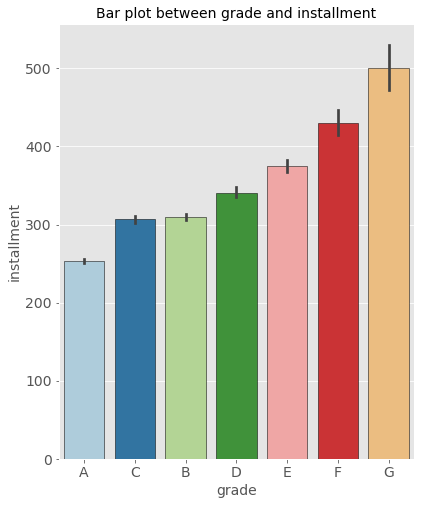

In [170]:
plt.subplot(121)

bivariatePlots(x = "grade", y = "installment", bar_plot = True, figsize = (14,8),
              ordering = graph_index(x = "grade", y = "installment"))

## Observations:
- The results from the plot above were expected as we were analysing these variables in our univariate analysis, and bivariate analysis that there is a rise in interest rate as the grade falls and the median loan amout taken was the highest in grade G so it makes sense that the borrowers belonging to lower grades will pay more monthly\- This distribution closely resembles our "Grade vs loan_amount" plot

## Grade vs interest rates

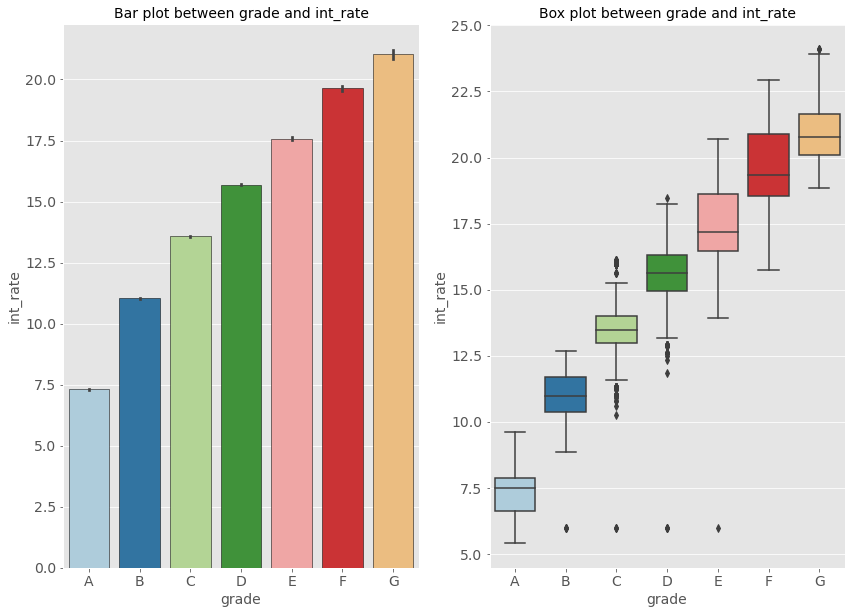

In [171]:
plt.subplot(121)
bivariatePlots(x = "grade", y = "int_rate", bar_plot = True, figsize = (14,10),
              ordering = graph_index(x = "grade", y = "int_rate"))

plt.subplot(122)
bivariatePlots(x = "grade", y = "int_rate", box_plot = True, figsize = (14,10),
              ordering = graph_index(x = "grade", y = "int_rate"))

## This is a simple plot which shows us the interest rates with respect to grade and how a fall in grade indicates a rise in interest rates

## Homeownership vs Loan amount

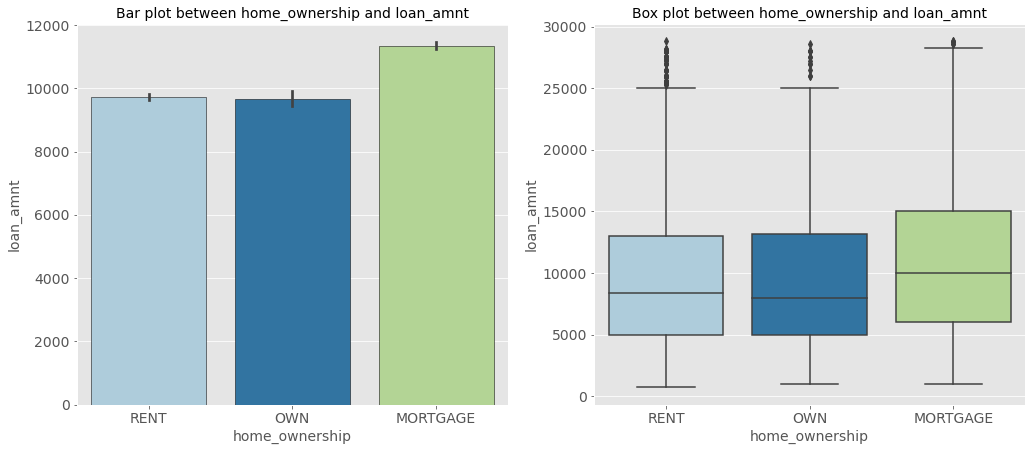

In [172]:
cat = "home_ownership"
cont = "loan_amnt"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (17,7))

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17,7))

## Observations:
- We can infer that the borrowers who have mortgaged their home have on average taken out more loan than borrowers who either own their house or have rented their house
- In the second plot we can see that borrowers who have either own their house or have rented it have taken out similar loans with thier distribution being about the same
- These plots can be useful in our multivriate analysis where we can introduce a third variable

## Home ownership vs interest rates

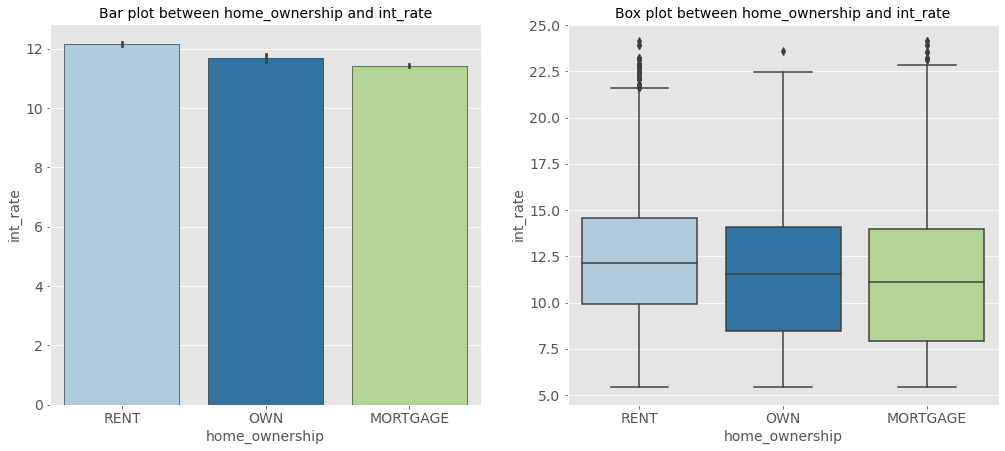

In [173]:
cat = "home_ownership"
cont = "int_rate"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True,  figsize = (17,7))

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17,7))

## Observations:
- The distribtuion of interest rates is about the same across the status of home ownership
- Even though the borrowers who have their houses mortgaged seems to have lower interest rates similar to those who own their houses indicating that they may have higher grades
- This could also mean that their revol_util which is the revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit is healthier

## Homeownership vs Loan status (FullyPaid_or_ChargedOff)

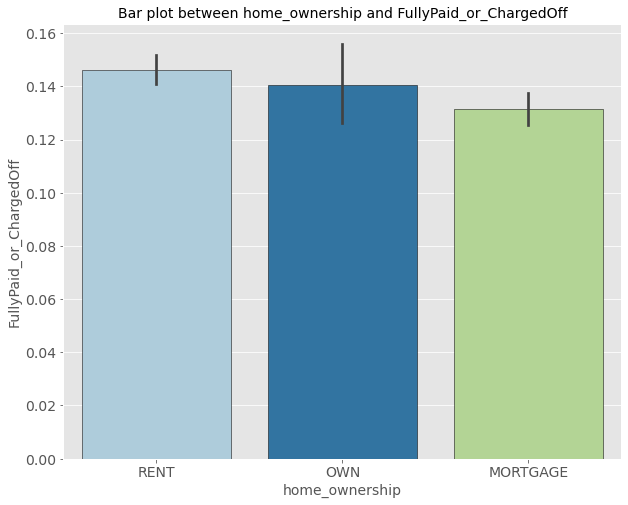

In [174]:
cat = "home_ownership"
cont = "FullyPaid_or_ChargedOff"


bivariatePlots(x = cat, y = cont, bar_plot = True)



## Observations:
- There isnt much difference between different home ownership status except for the fact that the borrowers having their house mortgaged are doingmuch better in terms of defaulter ratio
- We may come back to this in our multivariate analysis
- So far the borrowers who have their houses owned are performing slightly worse that other categories

## Home ownership vs Installements

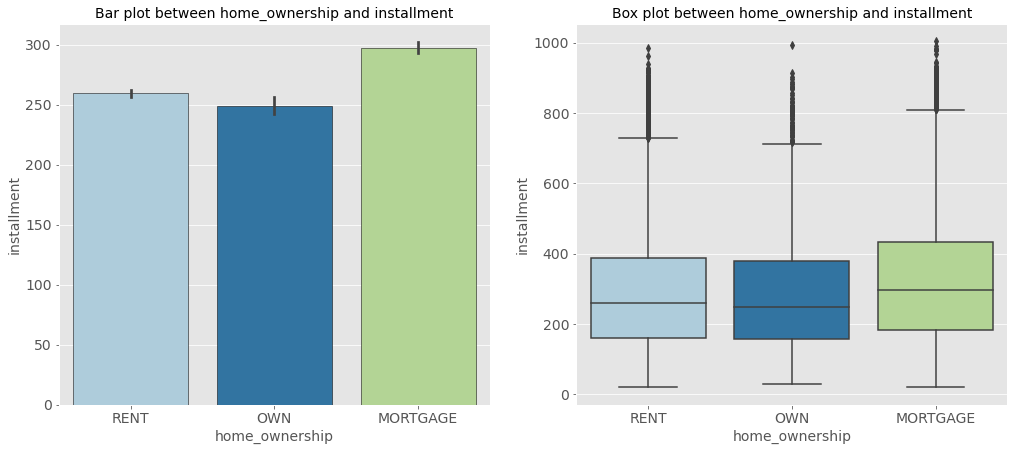

In [175]:
cat = "home_ownership"
cont = "installment"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (17,7), estimator = np.median)

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17,7))

## Observations:
- We can see that borrowers who have mortgaged their home pay more on a montly basis comapred to other categories, this is true for hte majority of the people although there are reasonable amount of people paying more than the median payment on a monthly basis
- RENT and OWN show a similar distribution
- We may add a third variable to this plot later in our multi variate analysis so we can derive even more useful insights

## Home ownership vs bankruptcy

Individual count for unqiue values of pub_rec_bankruptcies are : 
 0.0    35256
1.0     1529
2.0        5
Name: pub_rec_bankruptcies, dtype: int64 

Percent of data that each unqiue value of pub_rec_bankruptcies represents : 
 0.0    95.83
1.0     4.16
2.0     0.01
Name: pub_rec_bankruptcies, dtype: float64


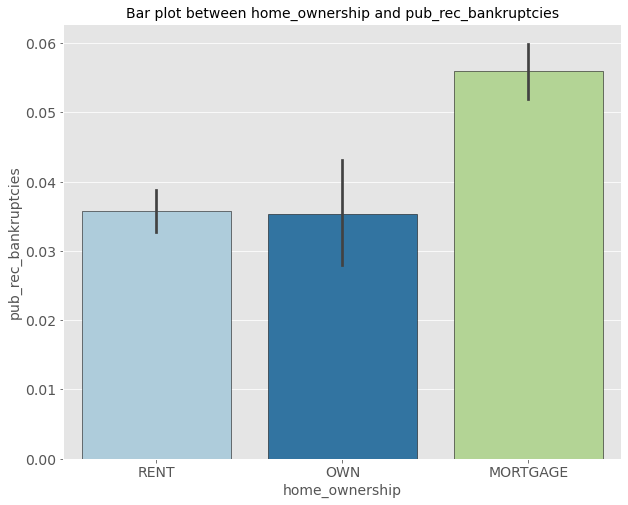

In [176]:
cat = "home_ownership"
cont = "pub_rec_bankruptcies"
bivariatePlots(x = cat, y = cont, bar_plot = True)
general_info(column = cont)

## Obervations: 
- Even though uptil now we saw and infered that borrowers who have mortgaged their houses were doing a little bit better than other categories, here we can see that they tend to be more bankrupt
- But this is what this plot says in general but if we take a closer look at the entire plot especially the y axis we can see that percentage of borrowers going bankrupt is pretty low almost 0, which means that majority almost 95% as the data above that plot depicts

## Verification status (Source of income) vs loan amount

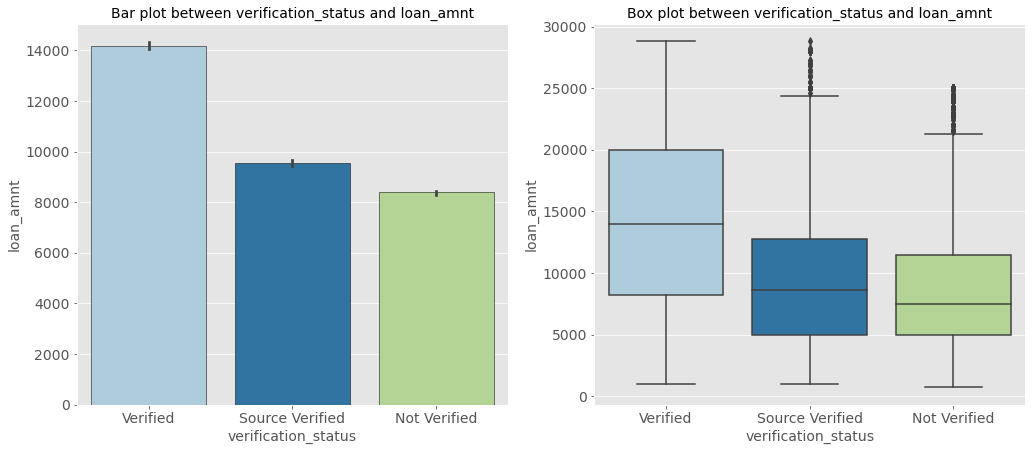

In [177]:
cat = "verification_status"
cont = "loan_amnt"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (17, 7))

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17, 7))



## Observations:
- Its pretty good to see that the borrowers who verified their income took higher loans compared to "Not Verified" 
- But there are still a considerable amount of borrowers without any verification of the source able to take out loans



## Verification status (Source of income) vs interest Rate

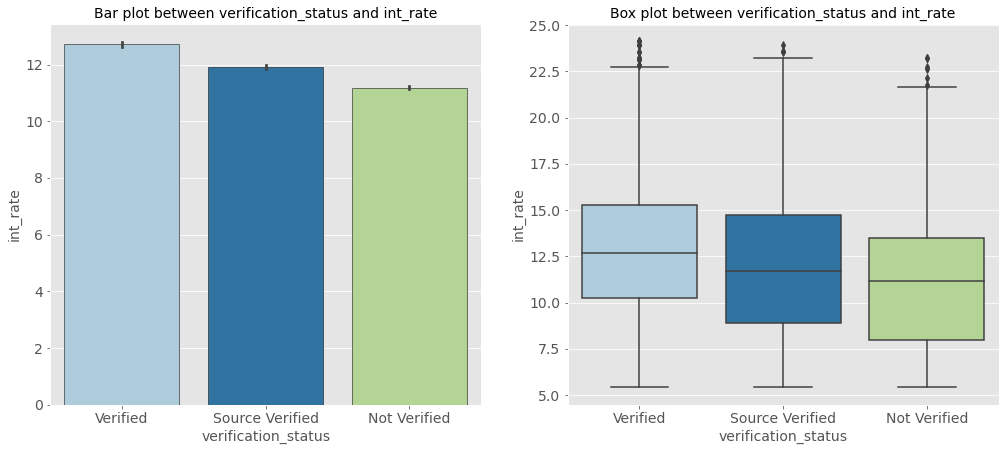

In [178]:
cat = "verification_status"
cont = "int_rate"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (17, 7))

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17, 7))

## Observations:
- The distribution is pretty normal, no abonormalities were found in this relationship
- The surprising factor in these plots is that the borrowers who havent verified their income took out loan at lower interst rates
- A third variable is needed to understand this relationship

## Verifcation status vs loan status

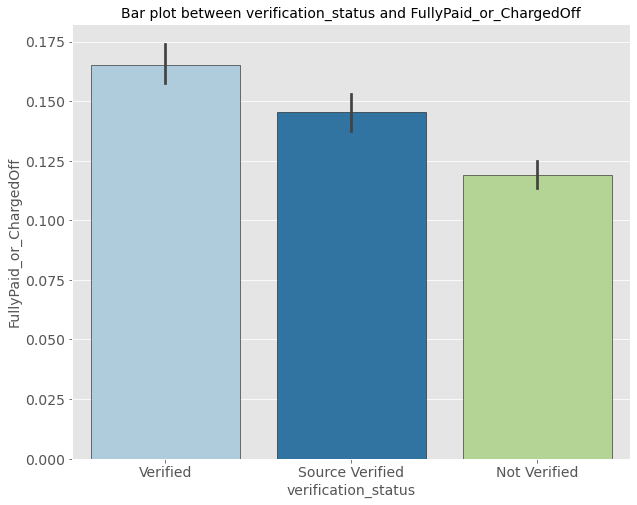

In [179]:
cat = "verification_status"
cont = "FullyPaid_or_ChargedOff"


bivariatePlots(x = cat, y = cont, bar_plot = True)



## Observations:
- The above plot proves our analysis in our previous plots which showed us that borrowers who have their income verified had taken out loan at higher interest rates compared to that of other categories
- We can see the same in this plot as well that the defaulter ratio is also high for the borrowers belonging to the verified category
- This may or may not be attributed to the fact that having one's income verified allows them to take loans even thoguh their credit score or revolving line utlization rate is mediocre
- And hence this results in more defaultors 
_ This article gives us some insight on how a loan is disbursed https://www.bajajfinserv.in/insights/why-does-your-lender-need-your-income-verification

## Verification status vs record of public bankruptcy

/Users/vernonmascarenhas/opt/anaconda3/lib/python3.8/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


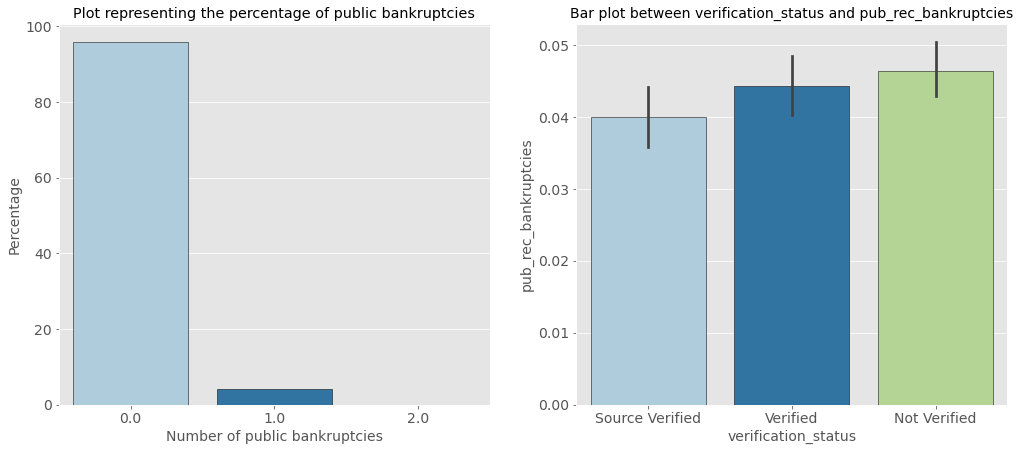

In [180]:
cat = "verification_status"
cont = 'pub_rec_bankruptcies'
_, percentages = general_info(column = cont, return_val_per = True)
percentages = round(percentages, 2)

plt.subplot(121)
bivariatePlots(x = percentages.index.to_list(), y = percentages.values, bar_plot = True)
plt.title("Plot representing the percentage of public bankruptcies")
plt.xlabel("Number of public bankruptcies")
plt.ylabel("Percentage")

plt.subplot(122)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize= (17,7),
              ordering = graph_index(x = cat, y = cont))

## Observations:
- From the first plot we can infer that the percentage of borrowers having a history of being bankrupt in any form is already quite low
- The plot on the right simply magnifies the visualization on the right stating that the borrowers whos Source or their income was verified performed poorly compared to borrowers who didnt verify their income 
- From our previous plots we deduced that borrowers having their icnome or their source verified tend to get loans much swiftly, but their interest rate depends on their financial well being or their history 
- These borrowers mentioned in our previous point may or may not have existing loans or poor credit utilization rate and hence to minimise risk LC has issued them the loan but at a higher interest rate
- Grade and rate information can be found here https://www.lendingclub.com/foliofn/rateDetail.action

## Verification status vs annual Income 

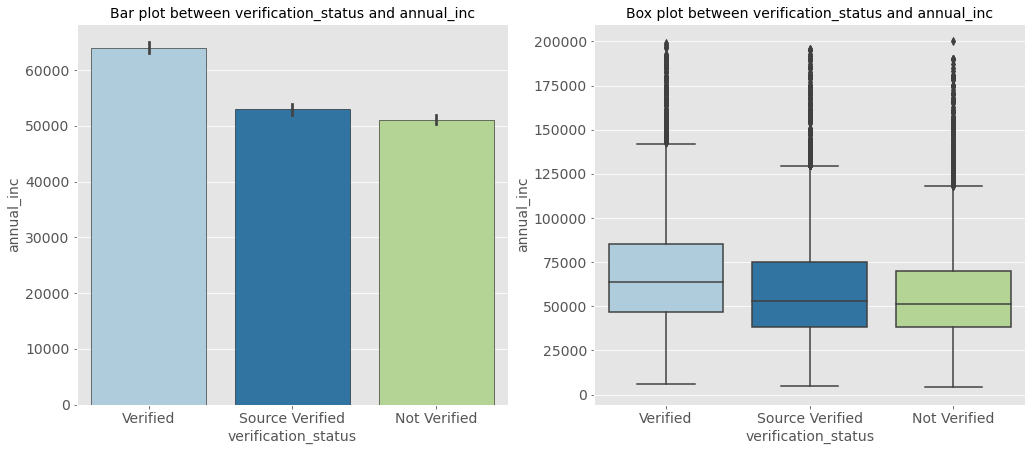

In [181]:
cat = "verification_status"
cont = "annual_inc"
plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (17,7), estimator = np.median)

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17,7))

## Observation:
- From this we can conclude that borrowers who have source or income verified tend to earn much better than borrowers who havent verified or lised any sosurce of income and hence these people may have a lower defaulter ratio

## Loan status vs Loan amount

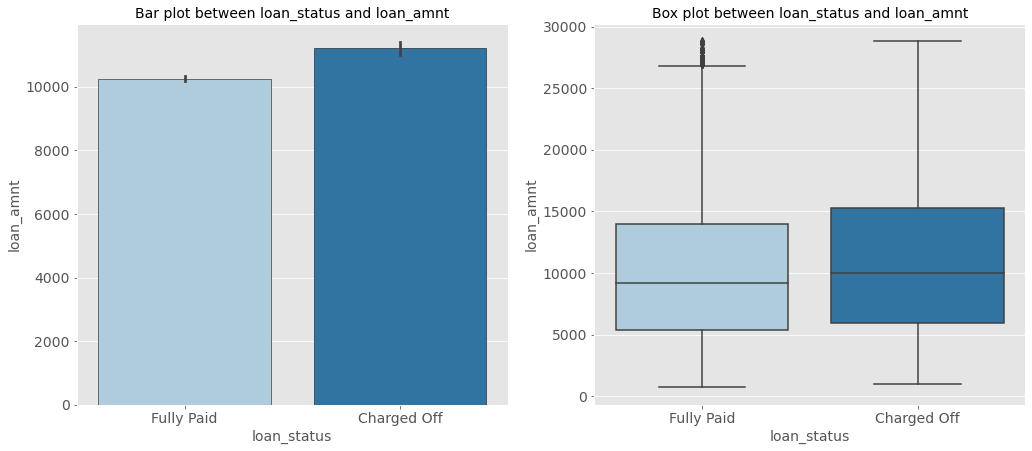

In [182]:
cat = "loan_status"
cont = "loan_amnt"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (17, 7))

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17, 7))

## Observations:
- Borrowers who have taken a higher amount of loan tend to default
- More varibales are needed to uncover hidden insight in this data 

## Loan status vs revol_util(%)


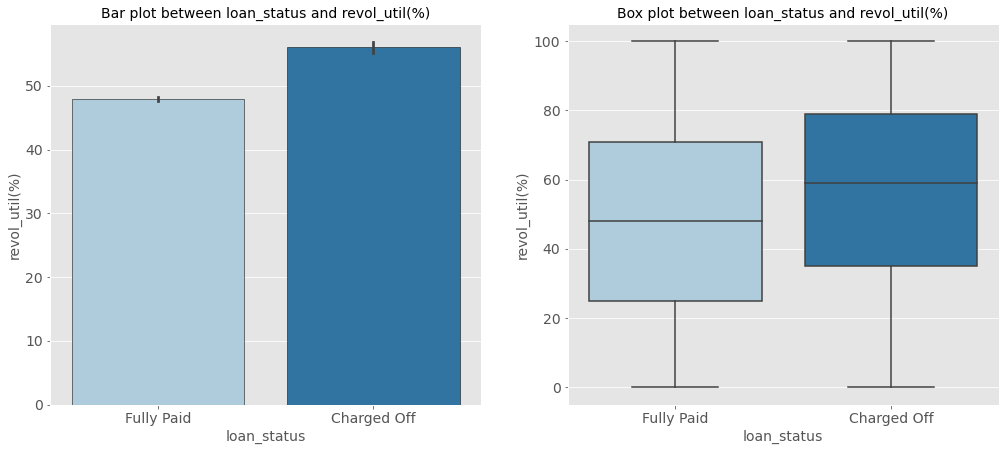

In [183]:
cat = "loan_status"
cont = 'revol_util(%)'

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (17, 7))

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17, 7))

## Observations:
- This visualization tells us that borrower who were able to fully repay the loan had their credit utilization rate of below 50% on average and those who defaulted had a rate beyond 50%

## Loan status vs Interest rate

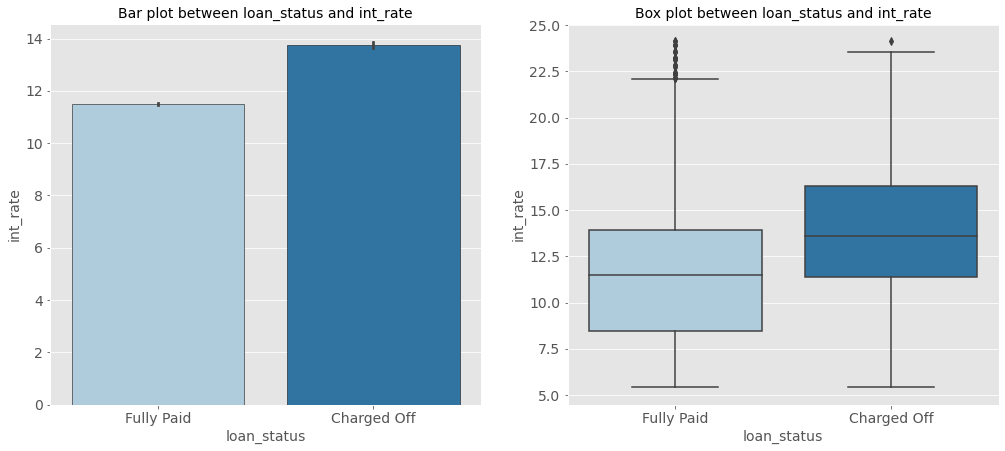

In [184]:
cat = "loan_status"
cont = 'int_rate'

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (17, 7))

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17, 7))

## Observations:
- This visulaization pretty straightforward and obvious that higher the interest rate, higher the probabilty that the borrower will default
- we also uncovered this relationship in in our previous analysis and visualization which proves us that ineterst rate plays an important factor whether the borrower will default or no

## Loan status vs loan amount

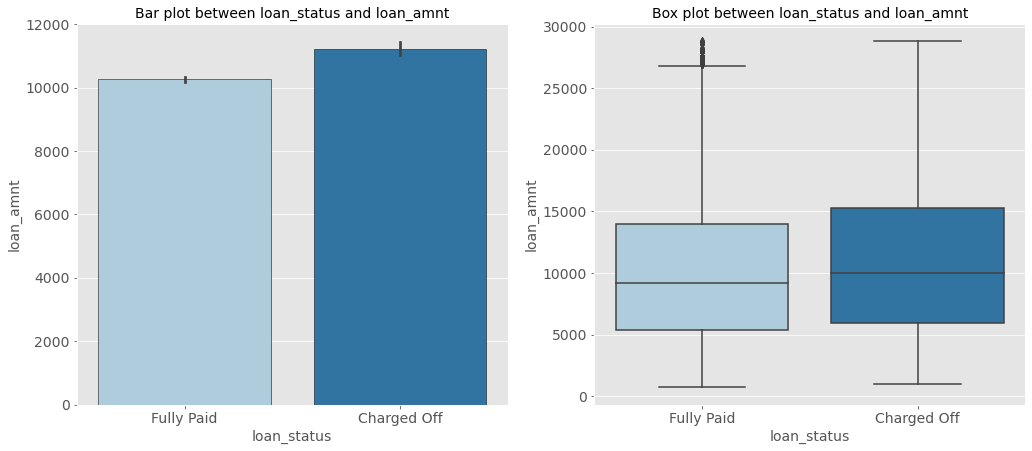

In [185]:
cat = "loan_status"
cont = 'loan_amnt'

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (17, 7))

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17, 7))

## Observations:
- We can observe that the median loan amount for which the borrower was able to full repay is around 9000 anything beyond that were defaulted


## Loan status vs pub_rec_bankruptcies (Number of public record bankruptcies)

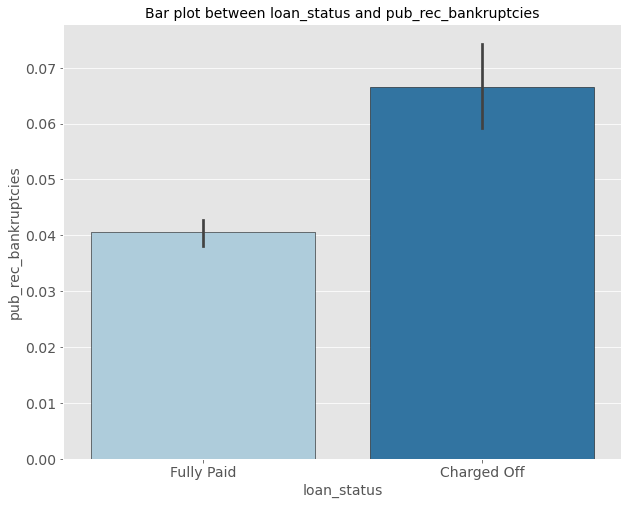

In [186]:
cat = "loan_status"
cont = "pub_rec_bankruptcies"

bivariatePlots(x = cat,  y = cont, bar_plot = True)



## Observations:
- We can see that borrowers who had a history of bankruptcy tend to be charged off more than those who didnt
- Hence we can say that in order to decrease the defaulter ratio LC must dig more or ask for more details on their past financial issue if they have any
- More analysis is needed to know for clarity sakes, we can infer that Number of public record bankruptcies plays a role in determining whether the borrower is gonna default or no

## Loan status vs pub_rec (Number of derogatory public records)

###  This is just a hunch since pub_rec and pub_rec_bankruptcies shows a high correlation in our correlation matrix we will use pub_rec in our analysis as well

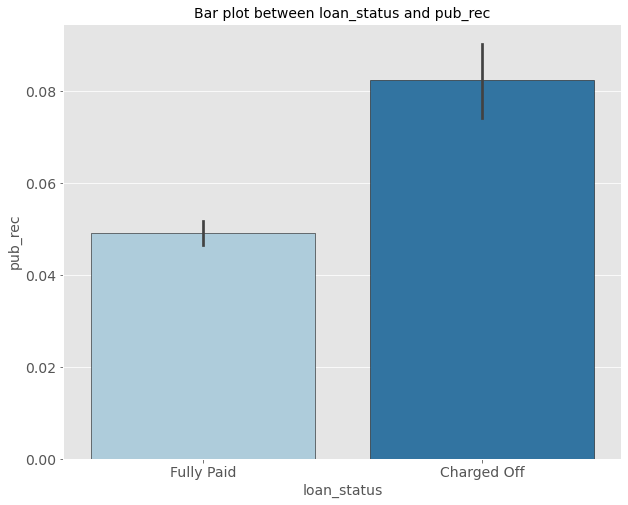

In [187]:
cat = "loan_status"
cont = "pub_rec"

bivariatePlots(x = cat, y = cont, bar_plot = True)

## Obervations:
- And voila we can see that this visualization resonates well and is identical to our previous analysis with loan_status vs pub_rec_bankruptcies
- This indicates that the borrower shows a higher risk of defaulting if they have a history of bankruptcy or financial obligations which they failed to fulfill as per the agreement with their respective party
- pub_rec is also a strong indicator that whether a person is gonna default or no

## Loan_status vs annual income

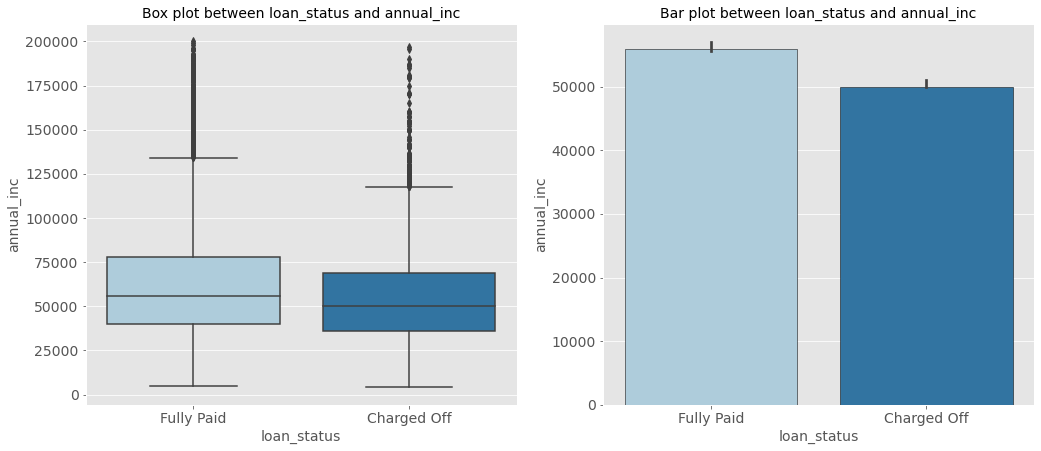

In [188]:
cat = "loan_status"
cont = "annual_inc"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (17, 7))

plt.subplot(122)
bivariatePlots(x = cat, y = cont, bar_plot = True, estimator = np.median, figsize = (17, 7))

## Observations:
- People whose annual income tend  to be on the higher end have managed to repay their loan back completely
- This analysis goes well with our verification_status vs annual_income that these people do indeed have a lower risk of being defaulted on a loan

## Purpose vs loan amount

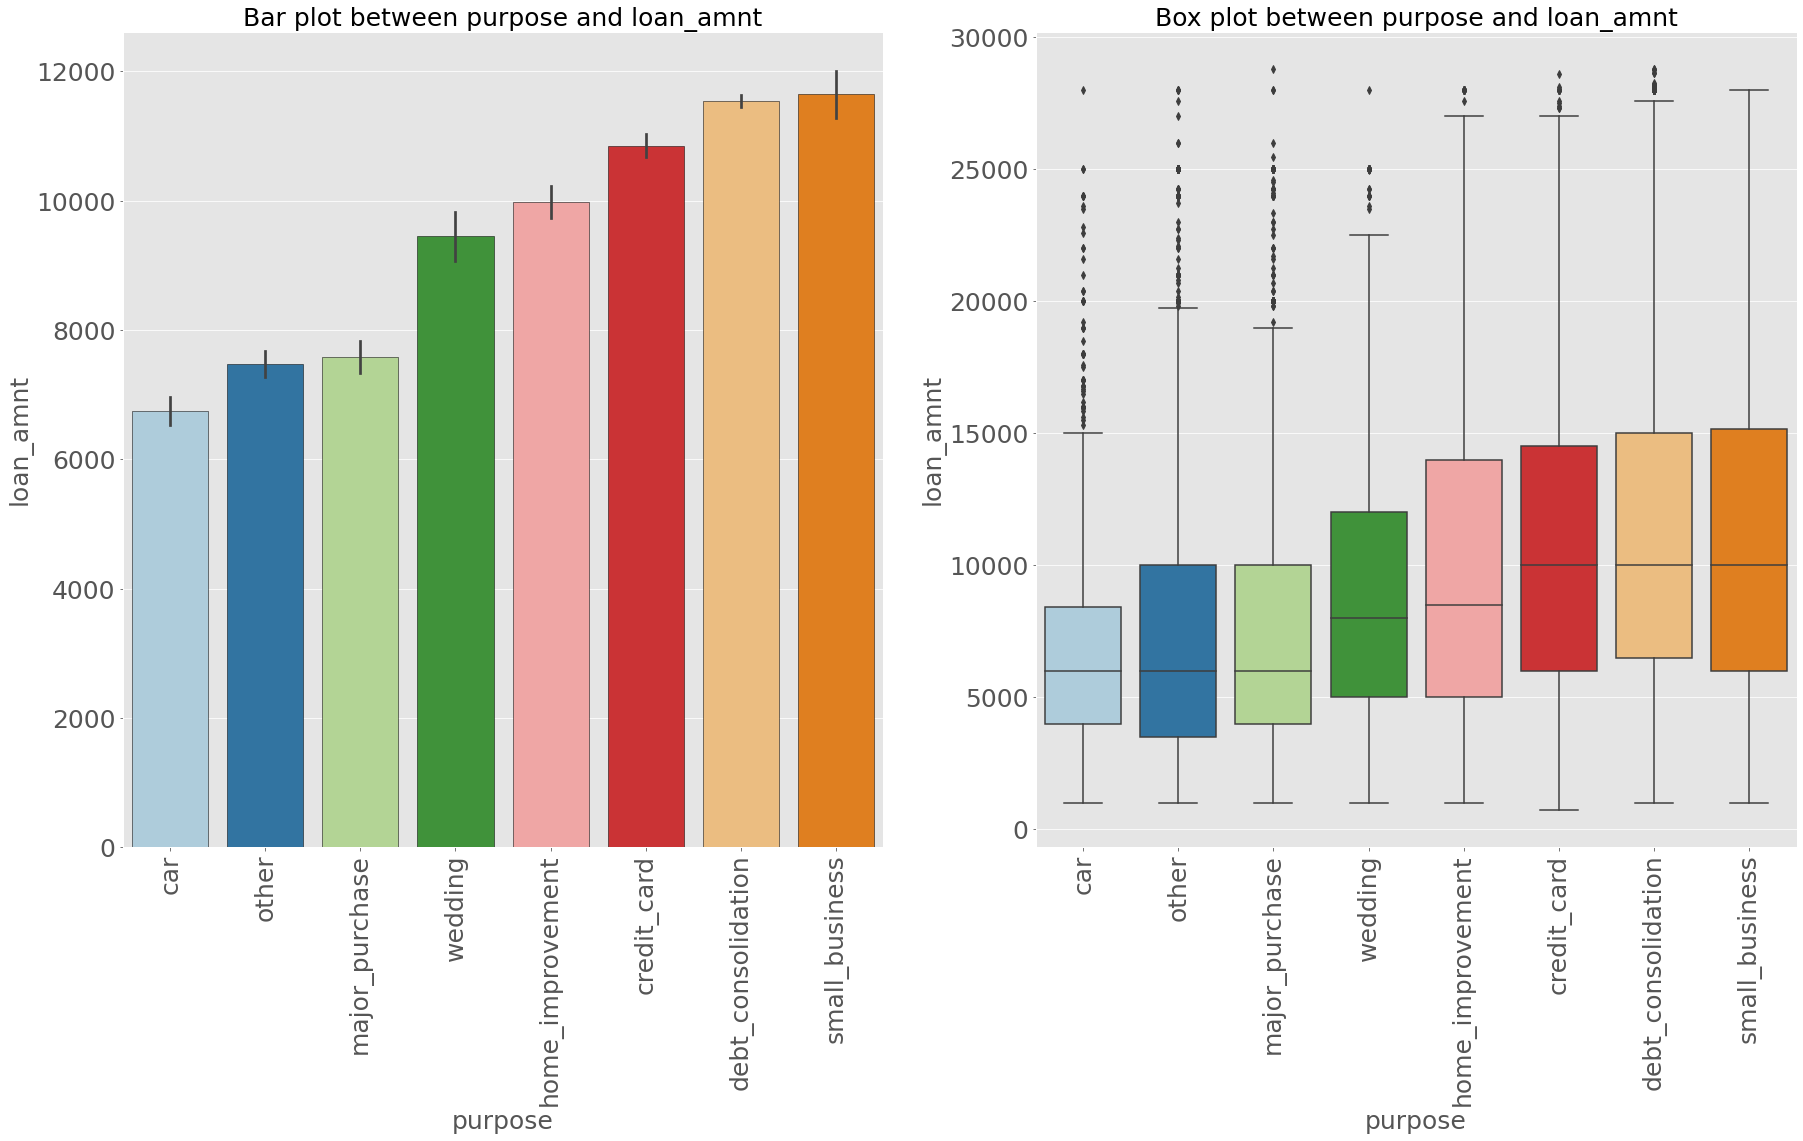

In [189]:
cat = "purpose"
cont = "loan_amnt"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (30,15), font_size = 25,
               rotation = 90, ordering = graph_index(x = cat, y = cont))


plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (30,15), font_size = 25,
               rotation = 90, ordering = graph_index(x = cat, y = cont))

## Observations:
- Majority of the borrowers took a loan for either settling their debts or for their small businesses
- Although we cannot clarify what debt the borrowers want to settle, it could be either another loan, credit card bills, electricity bills  etc
- Lending club must remove vague terms such as debt consolidation and introduce generic terms 

## Purpose vs Interest Rates

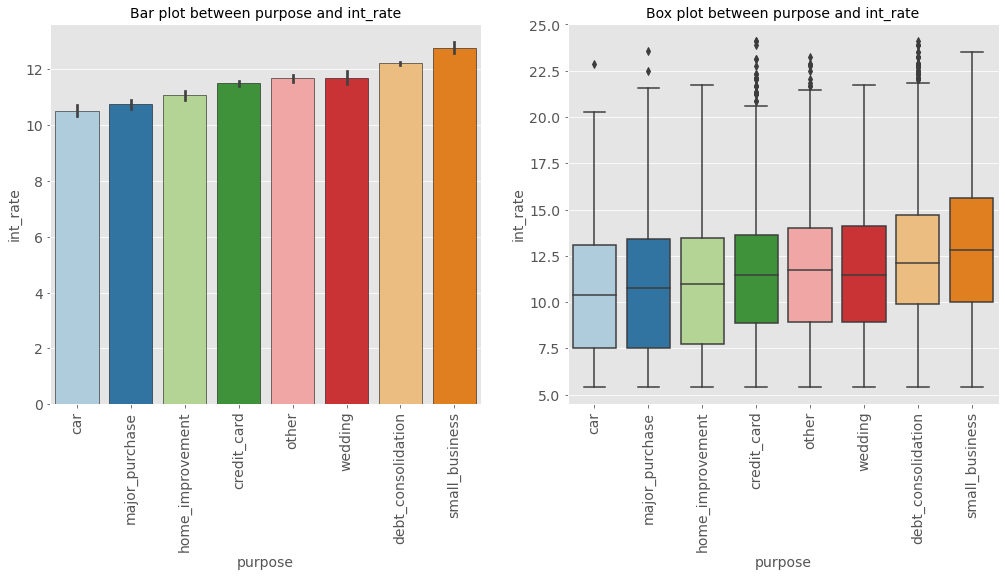

In [190]:
cat = "purpose"
cont = "int_rate"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, rotation = 90, 
               ordering = graph_index(x = cat, y = cont), figsize = (17,7))

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, rotation = 90, 
               ordering = graph_index(x = cat, y = cont), figsize = (17,7))

## Observations:
- Not much can be inferred from this visulaization, just a few basic observations that the interest rate is the highest for small businesses followed by debt consolidation


## Purpose vs installments

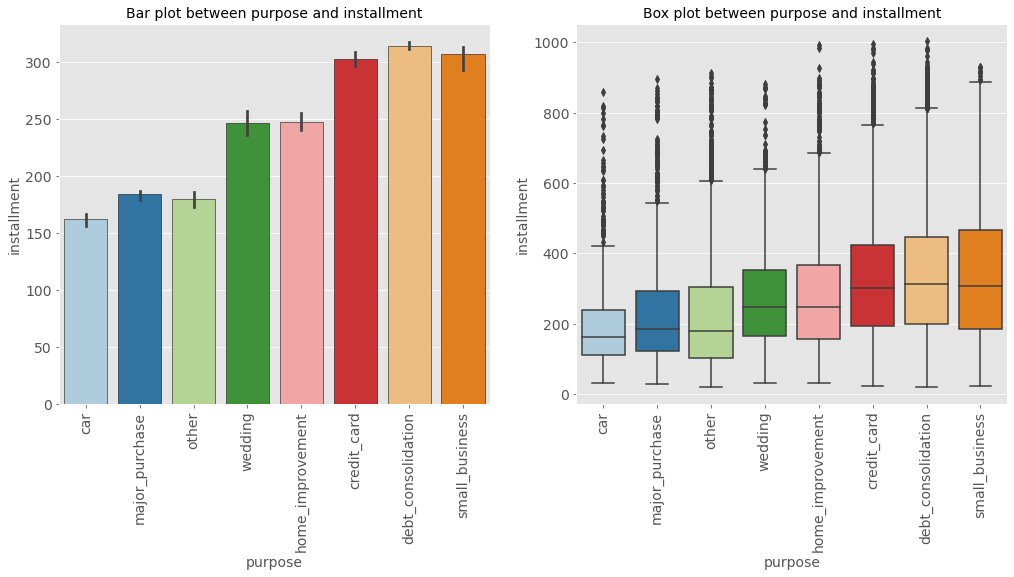

In [191]:
cat = "purpose"
cont = "installment"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont), rotation = 90,
              figsize = (17, 7), estimator = np.median)

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont), rotation = 90,
              figsize = (17, 7))

## Observations:
- We can infer from the bar plot that some categories behave in a similar fashion almost like a cluster, cluster 1 being:[car, major_purchase, other], second cluster being: [wedding, home_improvement] and the third cluster being :[credit_card, debt_consolidation, small_business]
- Borrowers belonging to thrid cluster decided to repay their loan amount at a higher rate monthly compared to cluster 1 and cluster 2
- The reason for this behaviour could be the higher interest rates that cluster 3 has been imposed with that results in higher amount of monthly payments

## Purpose vs emp_length (Number of years the borrower was employed for)

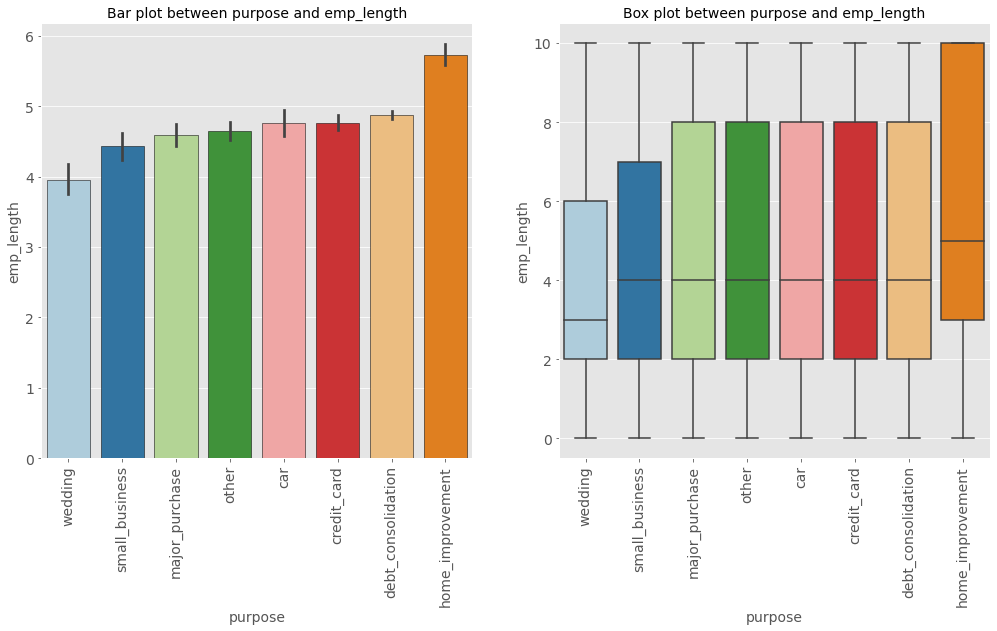

In [192]:
cat = "purpose"
cont = "emp_length"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont), rotation = 90,
              figsize = (17, 8))

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont), rotation = 90,
              figsize = (17, 8))

## Observation:
- Borrowers with 5+ years of work experience tend to borrow loan for home improvement 
- The distribution for other categories with borrowers less than 5 years of experience is the same
- It is unclear which age group tends to borrow because the data supplied to us didnt have any information of the age of borrowers
- ven thoguh the minimum age is 18, for accurate conclusion it would be better to have some so we wouldve been able to introduce this variable in our analysis and deduce the purpose of borrowing for that age group
        

## Purpose vs pub_rec_bankruptcies (Number of public record bankruptcies)

Individual count for unqiue values of pub_rec_bankruptcies are : 
 0.0    28996
1.0     1339
Name: pub_rec_bankruptcies, dtype: int64 

Percent of data that each unqiue value of pub_rec_bankruptcies represents : 
 0.0    95.59
1.0     4.41
Name: pub_rec_bankruptcies, dtype: float64


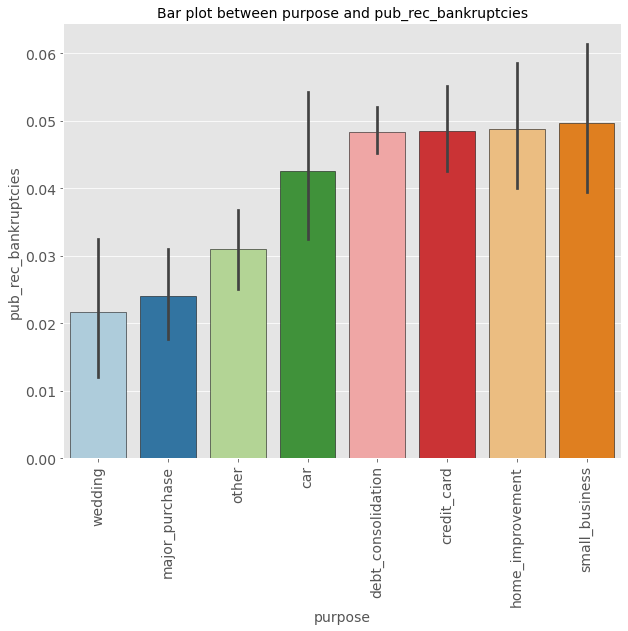

In [193]:
cat = "purpose"
cont = "pub_rec_bankruptcies"
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              rotation = 90)

general_info(column = cont, dataframe = clean_data1)

## Observations:
- We can see that the borrowers who have applied loans for debt consolidation, credit_card, home improvement and small business sor of tend to have a record of bankruptcies
- But this propotion is extremely small compared to those who dont have a record and from the data above we can see that 95 % of the borrowers dont gave a recod of bankruptcy
- we will further investigate this as to why LC approved 1339 borrowers loan even though they have a record of bankruptcy

## Purpose vs pub_rec

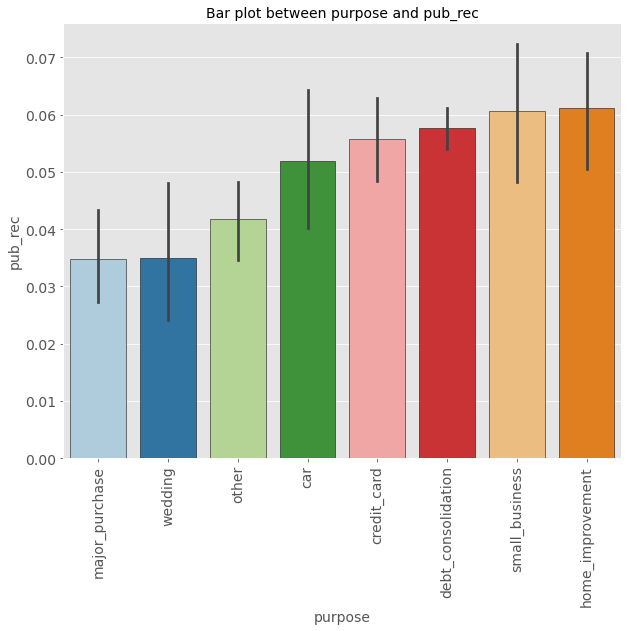

In [194]:
cat = "purpose"
cont = "pub_rec"

bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              rotation = 90)

## Observations:
- The plot above proves our analysis in our previous plots which infers the same
- This plot concludes that borrowers who have failed to fulfill their financial obligations tend to be bankrupt
- And we can see the same trend in debt consolidation, credit_card, home improvement and small business as we saw in our previous plots

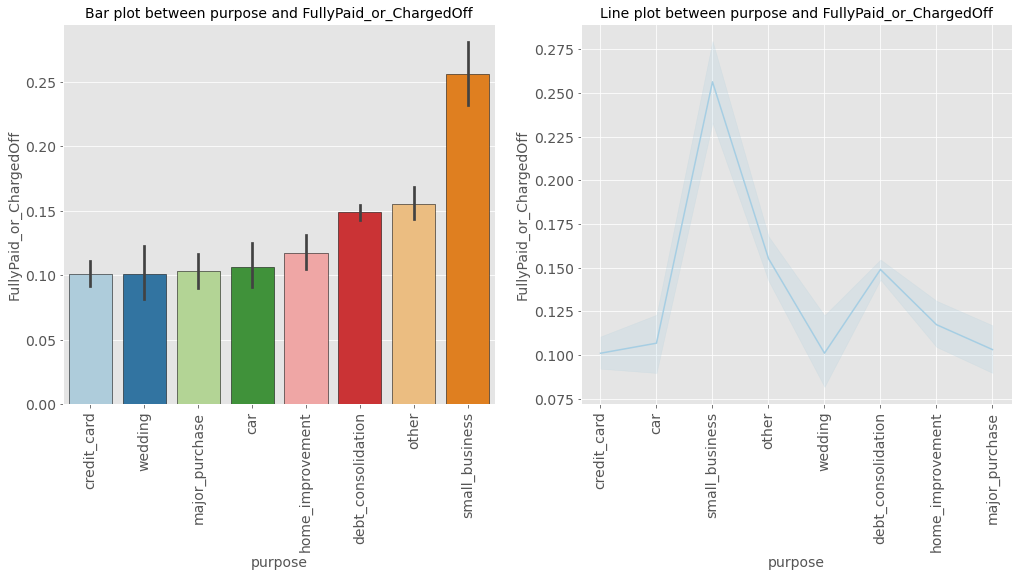

In [195]:
cat = "purpose"
cont = "FullyPaid_or_ChargedOff"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              rotation = 90, figsize = (17,7))

plt.subplot(122)
bivariatePlots(x = cat, y = cont, line_plot=True, rotation = 90, figsize = (17,7))


## Observations:
- The defaulter ratio is quite high for small business compared to other categories
- Lc must restrict or do some more digging as to what these small business is about and gather more information on their operations, their financial strength and how these businesses can repay their loan

## Addr_state (State of the borrower) vs loan amount


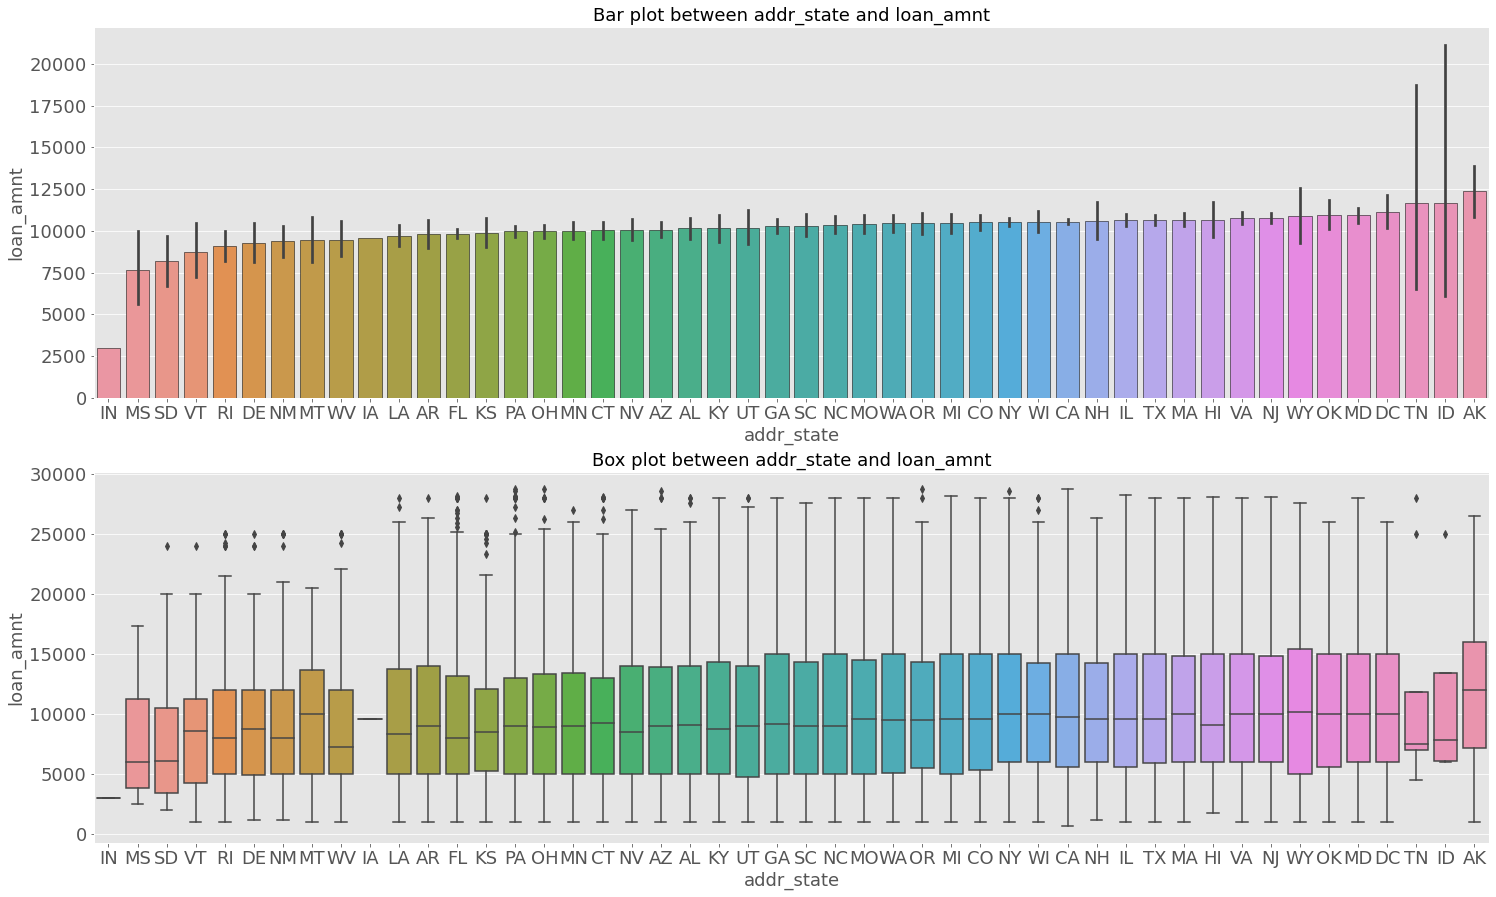

In [196]:
cat = "addr_state"
cont = "loan_amnt"

plt.subplot(211)
bivariatePlots(x = cat, y =cont, bar_plot = True, figsize = (25,2), font_size = 18,
              ordering = graph_index(x = cat, y = cont))

plt.subplot(212)
bivariatePlots(x = cat, y =cont, box_plot = True, figsize = (25,15), font_size = 18,
              ordering = graph_index(x = cat, y = cont))

## Observations:
- The distribution of loan amount seems to be equally distributed
- No significant observations

## Addr_state (State of the borrower) vs Interest Rates

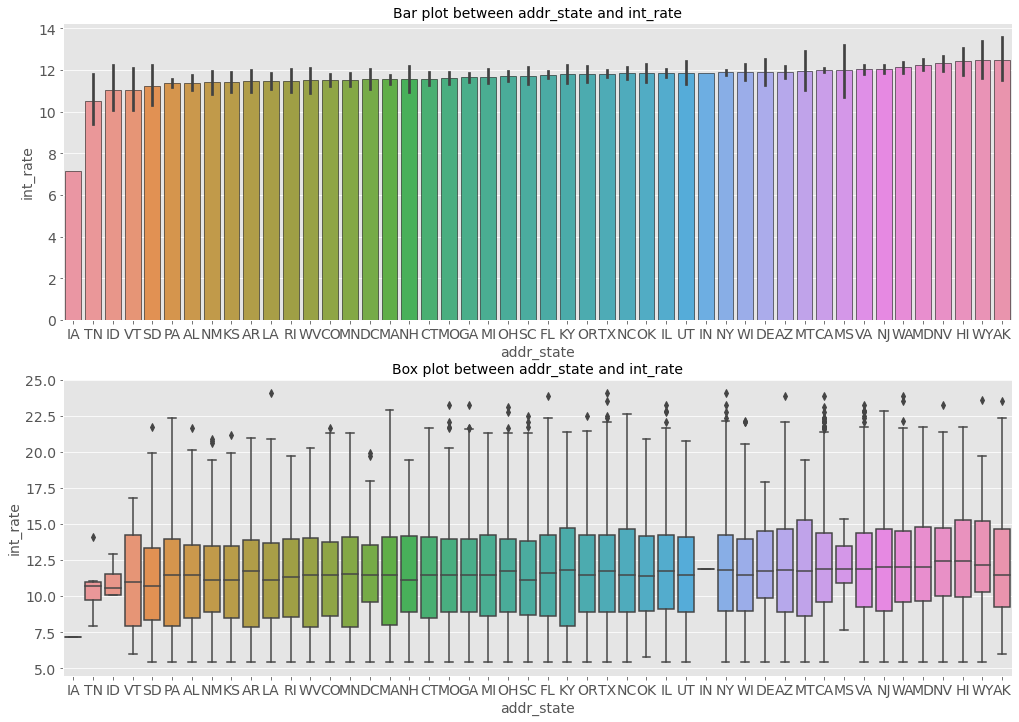

In [197]:
cat = "addr_state"
cont = "int_rate" 

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True,figsize = (17,12),
              ordering = graph_index(x = cat, y = cont))

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True,figsize = (17,12),
              ordering = graph_index(x = cat, y = cont))

## Observations:
- Distribution is again about the same, but we must also not disregard the fact that the bar plot reprents average interest ratesd across the states
- This sort of proves our conclusion from univariate analysis that majority of the borrowers have taken out a loan on an interest rate anywhere from 8.9% to 14.5 %

## Income groups vs loan amount

## (Income groups is nothing but annual income(annual_inc) divided in groups)

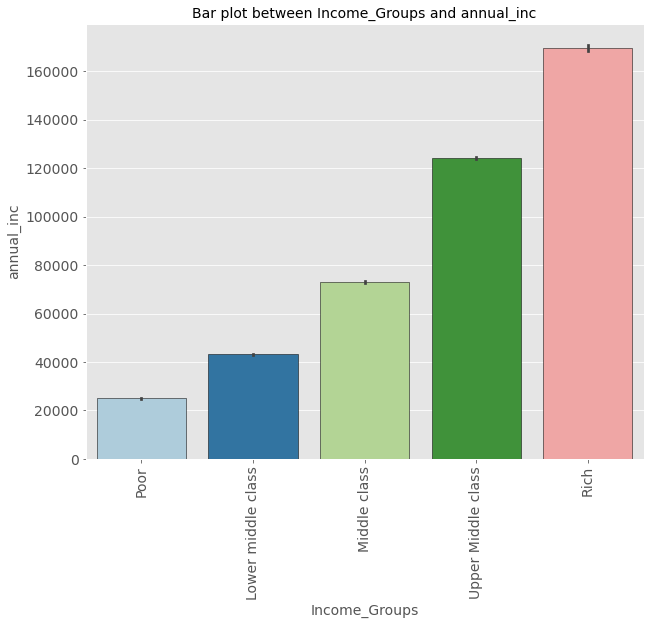

In [198]:
# Average income of a particular income group
bivariatePlots(x = "Income_Groups", y = "annual_inc", bar_plot = True, rotation = 90)

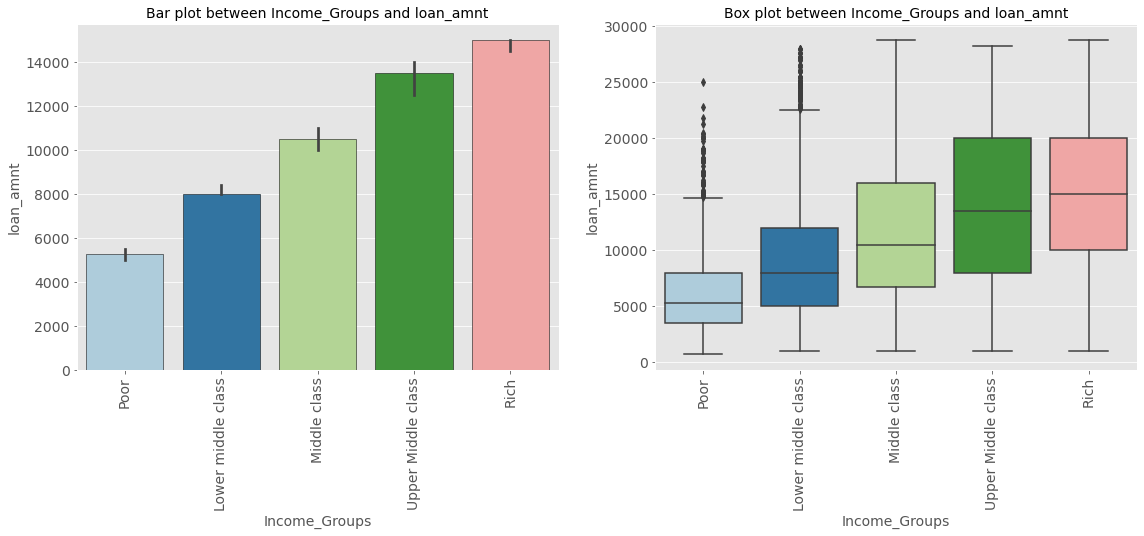

In [199]:
cat = "Income_Groups"
cont = "loan_amnt"

plt.subplot(221)
bivariatePlots(x = cat, y = cont, bar_plot = True, figsize = (19,14), rotation = 90, estimator = np.median)

plt.subplot(222)
bivariatePlots(x = cat, y = cont, box_plot = True, figsize = (19,14), rotation = 90)



## Observations :
- We can see as the the income increase across the Income group the loan taken by that particular group also increases
- We can also observe that some borrowers belonging to a lower income group have borrowed a higher loan amount

## Income groups vs interest rates

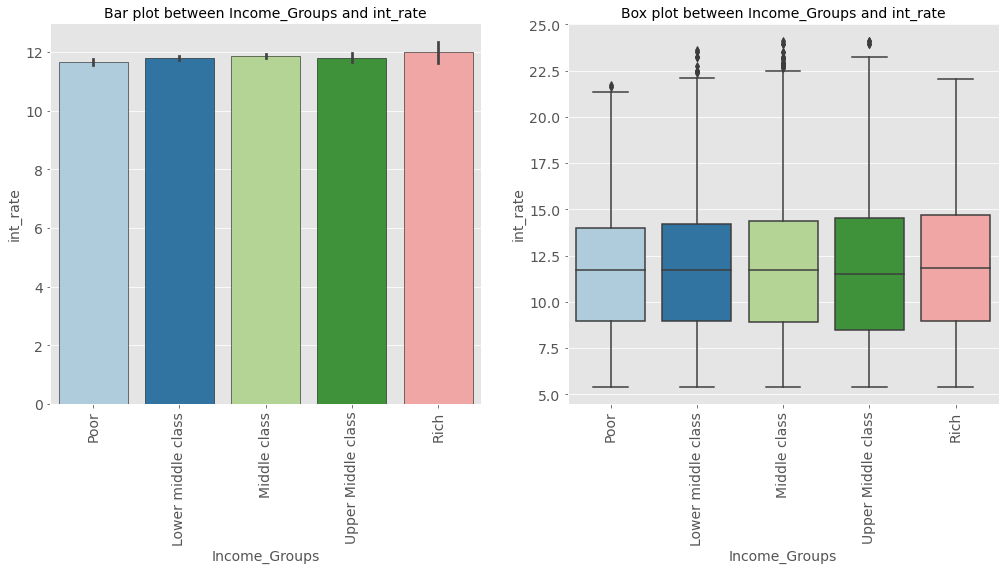

In [200]:
cat = "Income_Groups"
cont = "int_rate"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, rotation = 90, figsize = (17,7))

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, rotation = 90, figsize = (17,7))

## Observations:
- Not much can be inferred from this visulaization although we may consider this for multi variate analysis
- The interest rates across the income groups is identical

## Income group vs Installments

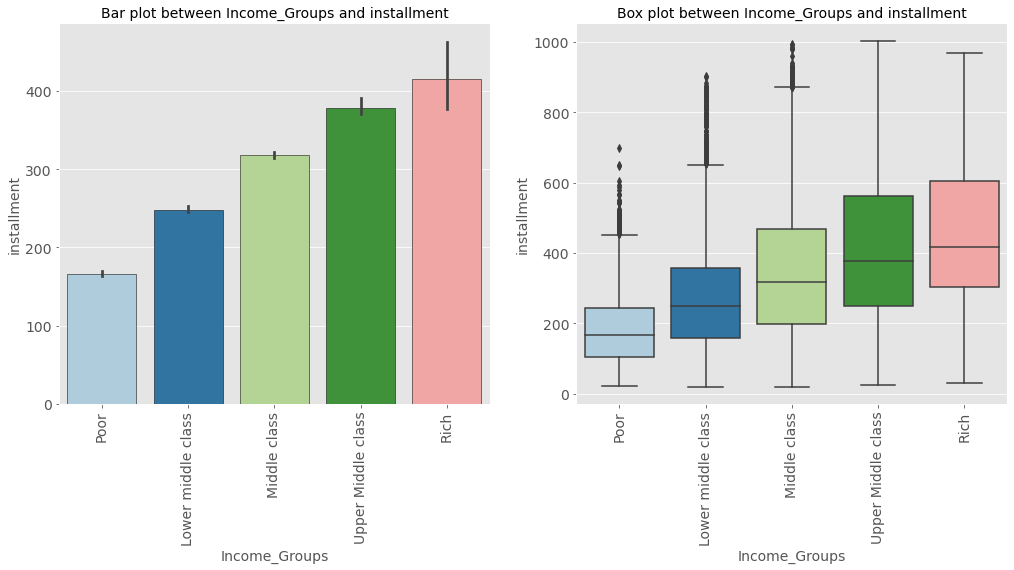

In [201]:
cat = "Income_Groups"
cont = "installment"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, rotation = 90, figsize= (17,7), estimator = np.median)

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, rotation = 90, figsize= (17,7))

## Observations: 
- There is an increase in monthly payments across the income groups which makes sense as higher purchasing power enables you to may more
- We are starting to see a relationship between loan amount, annual income and credit utilization as we delve deeper into our visulaizations

## Income groups vs (pub_rec) Number of derogatory public records

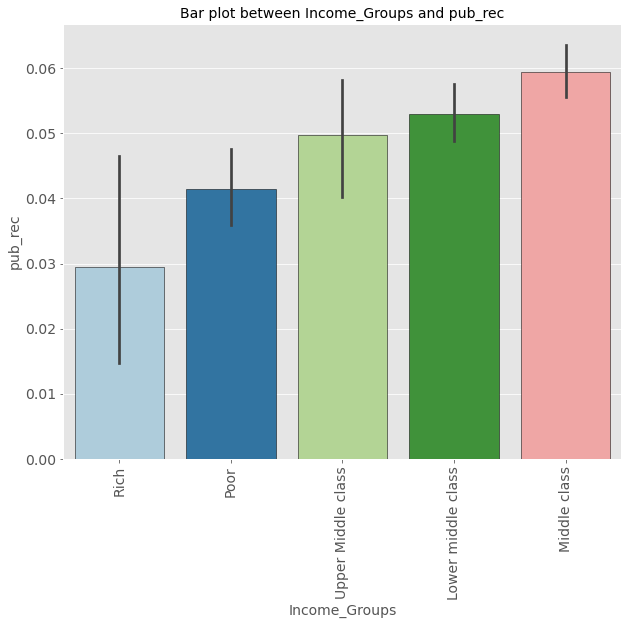

In [202]:
cat = "Income_Groups"
cont = "pub_rec"

bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y =cont),
              rotation = 90)

## Observations:
- Borrowers belonging to <i> RICH </i> category tend to have the lowest number of public derogatory records this couild be due to the savings or invstments made by such borrowers due to the availabiltiy of income as these borrowers earn as high as 192000
- Since most of our borrowers belong to lower middle class and middle class which we deduced from our uniovariate analysis the proportion seems to be on the higher side for them

## Income groups vs (pub_rec_bankruptcies) Number of public record bankruptcies

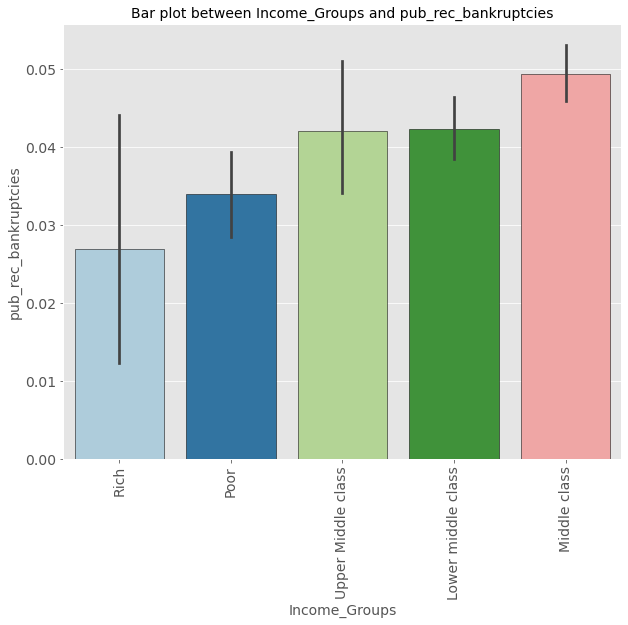

In [203]:
cat = "Income_Groups"
cont = "pub_rec_bankruptcies"

bivariatePlots(x = cat, y = cont, bar_plot = True,ordering = graph_index(x = cat, y =cont),
              rotation = 90)

## Observations:
- Borrowers belonging to <i> Middle class </i> shows that they have been bankrupt in the past and this could mean that they tend to be more bankrupt
- More analysis is neede to completely understand this relationship

## Income Group vs revol_util% (Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.)

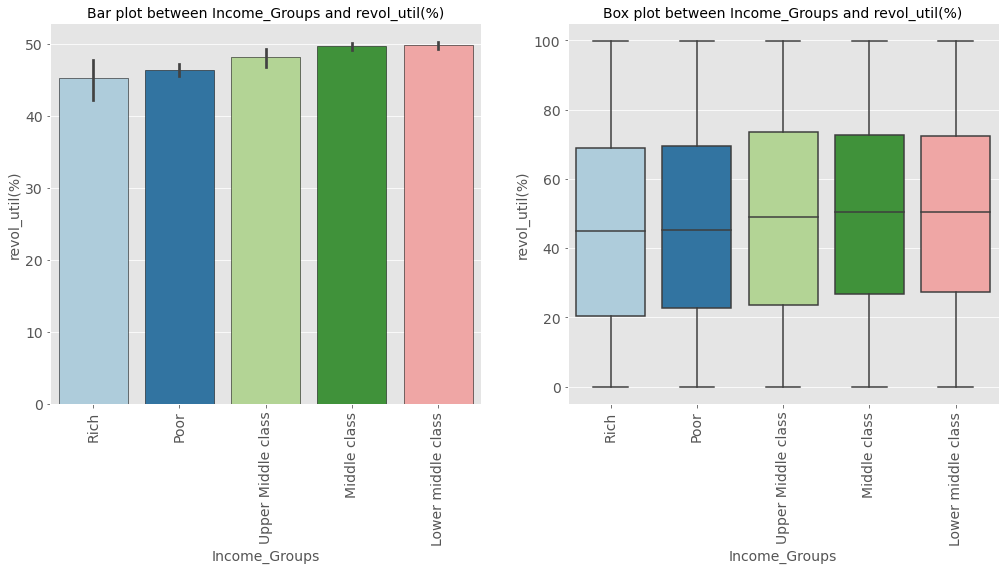

In [204]:
cat = "Income_Groups"
cont = "revol_util(%)"

plt.subplot(121)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat , y = cont),
              figsize = (17,7), rotation = 90)

plt.subplot(122)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat , y = cont),
              figsize = (17,7), rotation = 90)

## Observations:
- Credit utlization seems to be the same across all income groups, no insightful conclusion can be derived from this visualization

## Income Groups vs loan status

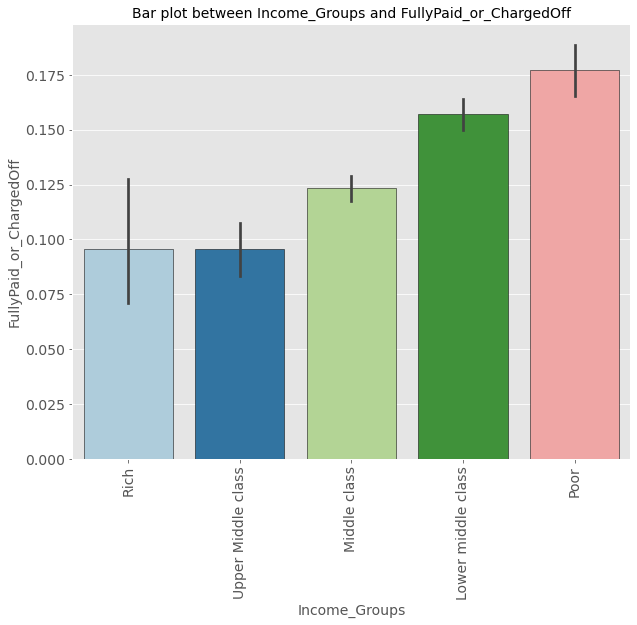

In [205]:
cat = "Income_Groups"
cont = "FullyPaid_or_ChargedOff"

bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y =cont),
              rotation = 90)

## Observations: 
- Borrowers belonging to <i> POOR </u> category tend to default more often that other categories and the factors could be high interest rates, poor credit utilization 

# Conclusion after performing Bivariate Analysis

### Here we were able to make more sense of the dataset and were able to deive meaninful information from some variables but still there is confusion and contradictions between some plots so we marked such plots for further analysis which will be in our multivariate analysis and over here we will uncover which variables affect the the defaulter ratio the most

### Some variables that did affect defaulter ratio are as follows:

###  Grade vs loan_status :
- As the grade lowers higher are the chances that the borrower will default

### Grade vs revol_util :
- Again as the Grade decreases we see a decline in the performance of credit utilization (although this could alos imply that the borrower is aggresively paying other debts and since the utilization rate is high..)

### Loan status vs Loan amount :
- Here we were able to conclude that higher the loan amount, higher is tenedency for the borrower to default

### Loan status vs interst rates :
- This mixed with high loan amount maketh the perfect recipe for an increase in defaulter ratio

### Loan status vs pub_rec_bankruptcies (Number of public record bankruptcies) and Loan status vs pub_rec(Number of public derogatory records):
- These two visualization provided us with similar results implying that if the borrower has been bankrupt in the past or has unfulfilled financial obligation then the borrower is more likely to default

### Loan status vs annual income : 
- Although as noted in the observations that borrowers with high income usually do better in term of defaulter ratio the difference is subtle and it has only a slight effect on the defaulter ratio 

### Purpose vs loan amount:
- We could see from this analysis that credit card bills, debt consolidation and small business tend to take out loans which is higer than most categories and in  <u> loan status vs loan amount </u> higher the loan amount higher is the probability of the borrower deafulting

### Purpose vs loan status: 
- This clearly proves our <u> purpose vs loan amount </u> analysis with borrowers borrowering money for small businesses tend be on the higher side of the defaulter ratio

## The rest of the plots needs a third variable to uncover even more hidden insights which we will be doing in our upcoming analysis called multivariate analysis, after performing this analysis we will have a better understanding of the variable and factor which affects the defaulter ratio the most and how LC can optimize or control these factors; uptil now we have identified 3 variables namely Grade, pub_rec_bankruptcies and purpose which has a possible impact on defaulter ratio

# Multivariate analysis

## For this we will use the same function which we used in bivariate analysis bivariatePlots() to plot our dataset

## Grade vs loan status with hue as TERM

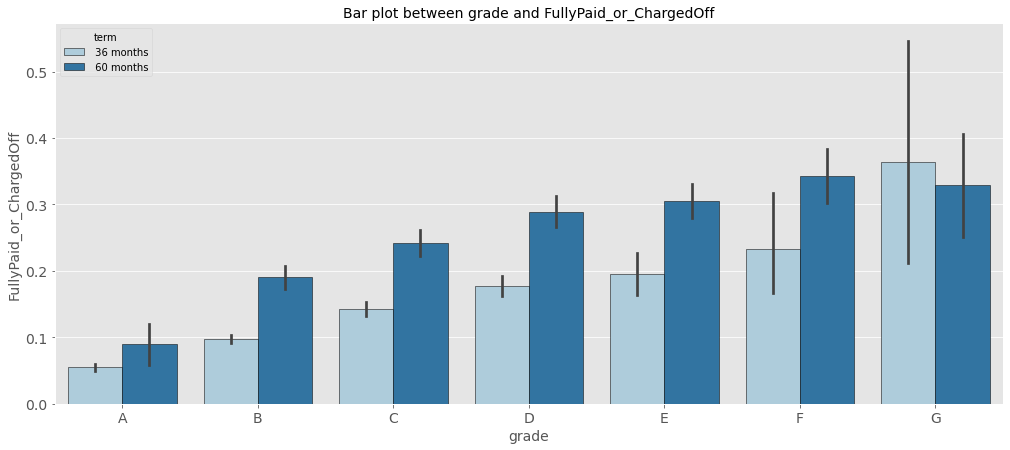

In [206]:
cat = "grade"
cont = "FullyPaid_or_ChargedOff"
hues = "term"

bivariatePlots(x = cat, y = cont, hues = hues, bar_plot = True, 
               ordering = graph_index(x = cat, y = "FullyPaid_or_ChargedOff"), figsize = (17,7)
              )

## Observations; 
- The defaulter ratio rises with each falling grade and in comparison in terms of number of months the defaulter ratio for 60 months is more than 36 months in almost all grades except for the last grade

## Grade vs loan_status with hue as HOME_OWNERSHIP

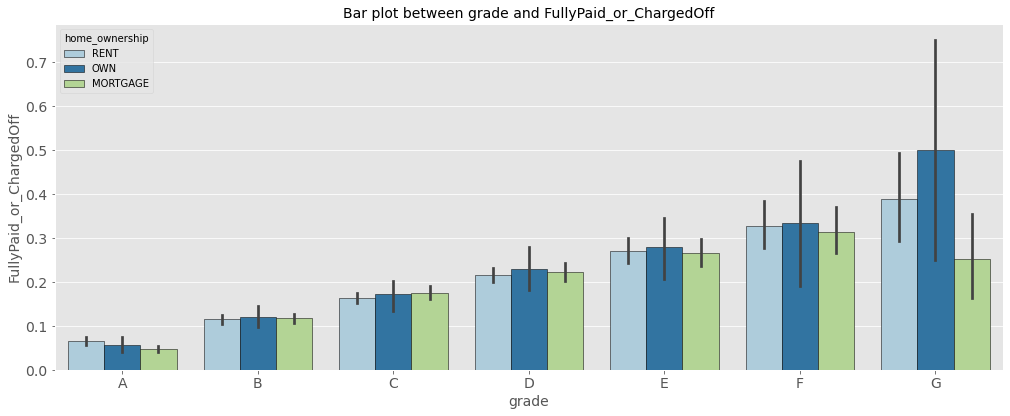

In [207]:
cat = "grade"
cont = "FullyPaid_or_ChargedOff"
plt.subplot(211)
bivariatePlots(x = cat, y = cont, hues = "home_ownership", bar_plot = True, 
               ordering = graph_index(x = cat, y = "FullyPaid_or_ChargedOff"), figsize = (17,14))



## Observations:
- This particular combaiantion of variables dosnt gives us any significant insights and the defaulter ratio for each grade and home ownership is almost identical except for the last grade which is G shows significant variation in defaulter ratio

- We can conclude that as we concluded earlier that a fall in grade increases the tendency of the borrower to default

## Grade vs loan_status with hue as PURPOSE

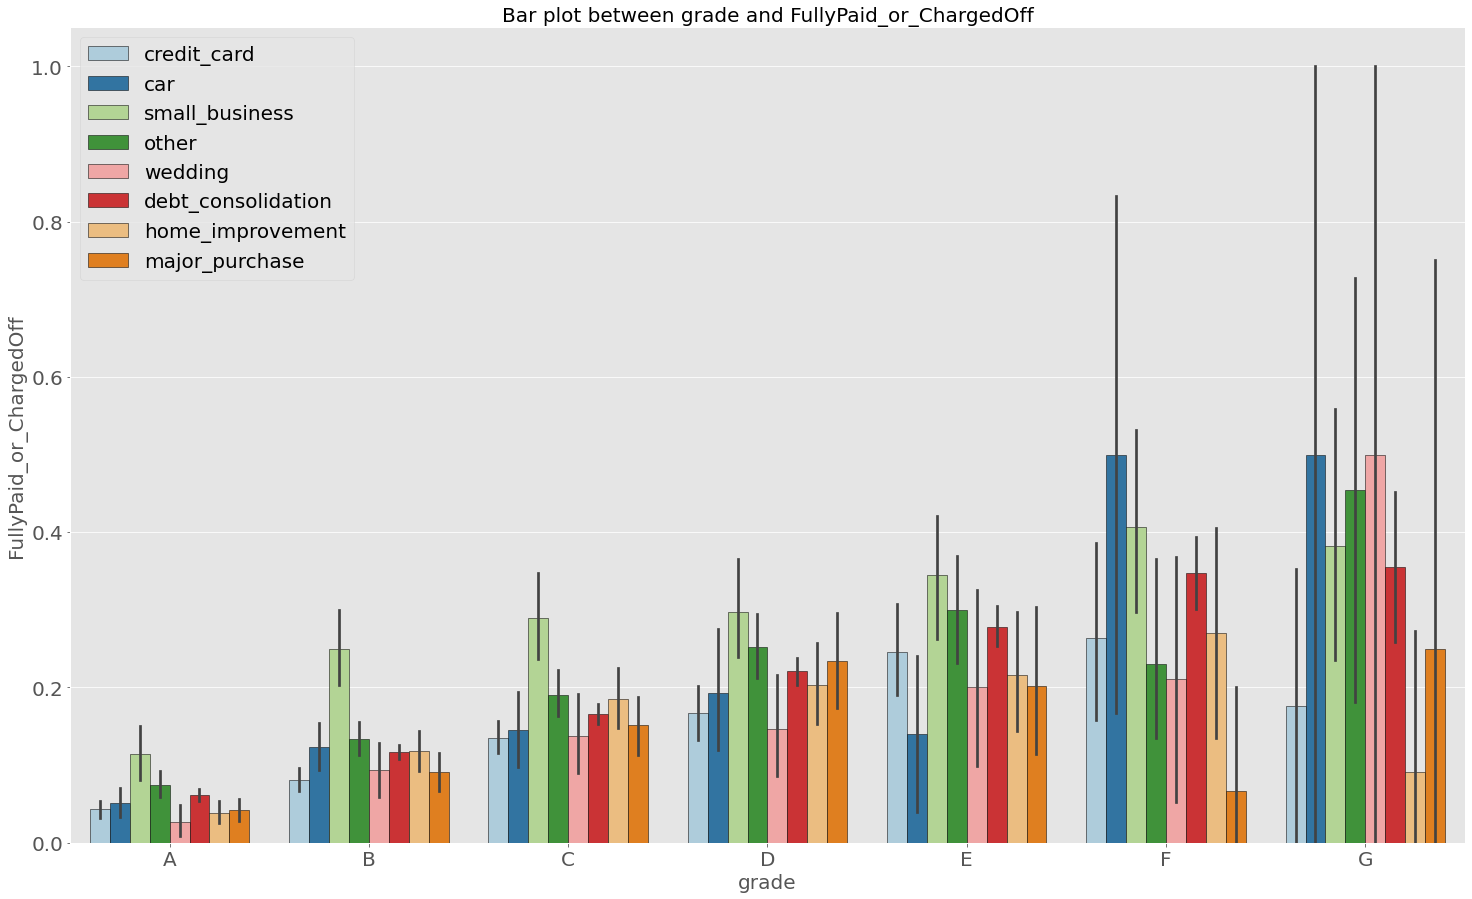

In [208]:
cat = "grade"
cont = "FullyPaid_or_ChargedOff"
bivariatePlots(x = cat, y = cont, hues = "purpose", bar_plot = True, figsize = (25,15),
              ordering = graph_index(x = cat, y = cont, dataframe = clean_data1), font_size = 20)
plt.legend(prop={'size': 20})

## Observation:
- As we can infer from the plot the borrower borrowing for small businesses shows a high defaulter ratio
- From our prrevious analysis although the loan amount taken up for credit card, debt consolidation and small businesses were high, the defaulter ratio is actually high for <i> SMALL BUSINESS </i> followed by <i>OTHERS</i> and <i>debt consolidation</i>, as we move from left to right we can observe the same trend on x axis
- We see a an increase in defaulter ratio of borrower who were loaned money for <i> CAR, OTHER and WEDDING</i> from grade F to G

## Grade vs loan amount with hue as PURPOSE

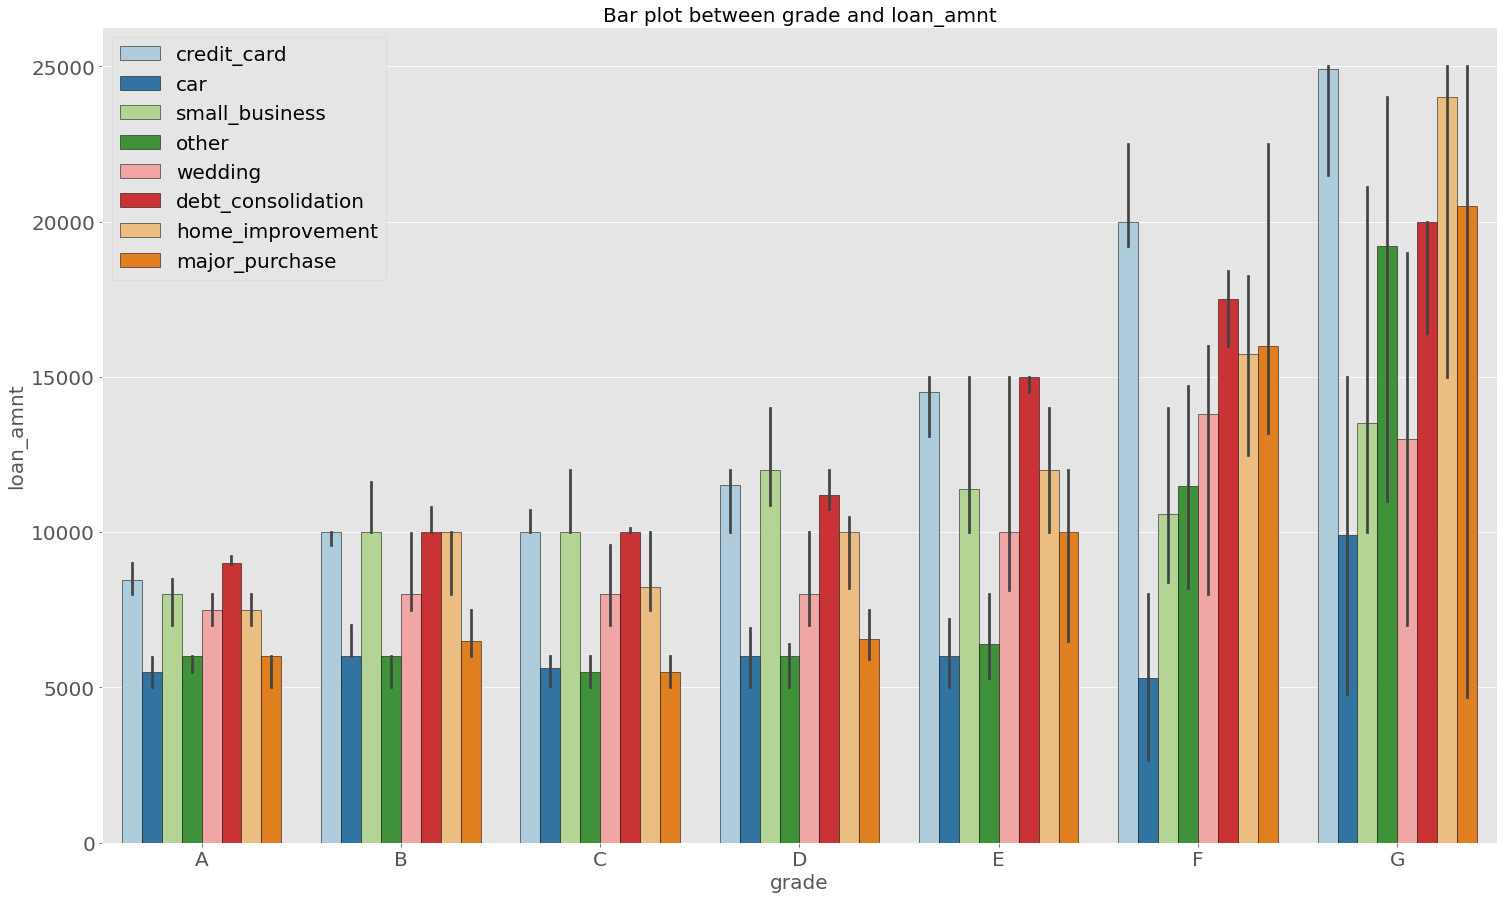

In [209]:
cat = "grade"
cont = "loan_amnt"
hue = "purpose"



bivariatePlots(x = cat, y = cont, hues = hue, bar_plot = True, 
               ordering = graph_index(x = cat, y = cont).sort_values(),
               figsize = (25,15), font_size = 20, estimator = np.median)
plt.legend(prop = {"size" : 20})



## Observation:
- Loan amount increases for every purpose as the grade decreases

## Grade vs revol_util(%) with hue as TERM

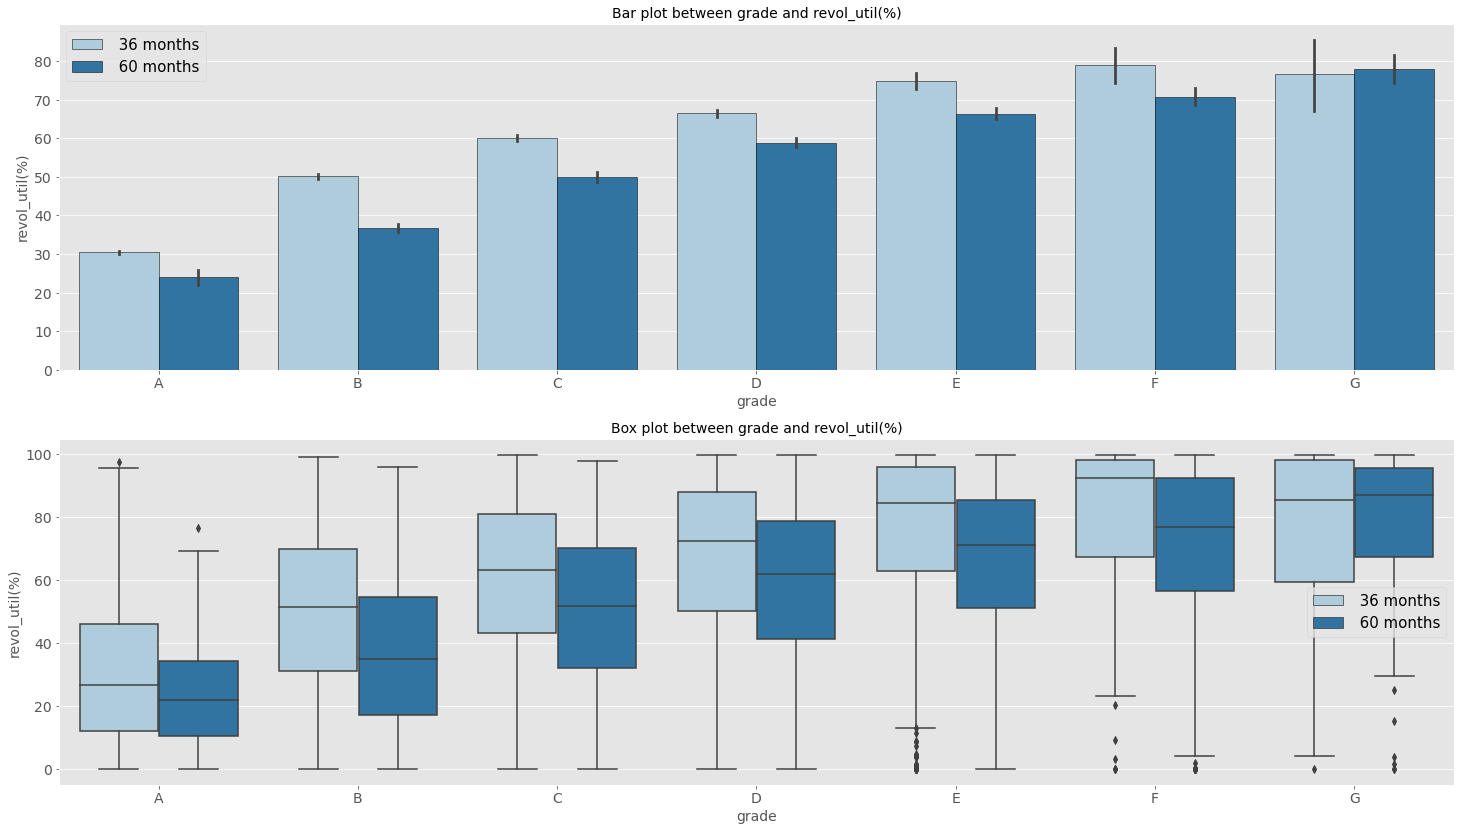

In [210]:
cat = "grade"
cont = "revol_util(%)"
hue = "term"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, hues = hue, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25,14))
plt.legend(prop = {"size" : 15})
plt.subplot(212)
bivariatePlots(x = cat, y = cont, hues = hue, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25,14))
plt.legend(prop = {"size" : 15})

## Observations:
- It seems like the credit utilization rate is worse for borrower who have gone for the plan of 36 months but we cxannot conclude evrything from just revol_util as this could also mean that the borrower is aggressively repaying all the debt

## Grade vs revol_util(%) with hue as PURPOSE

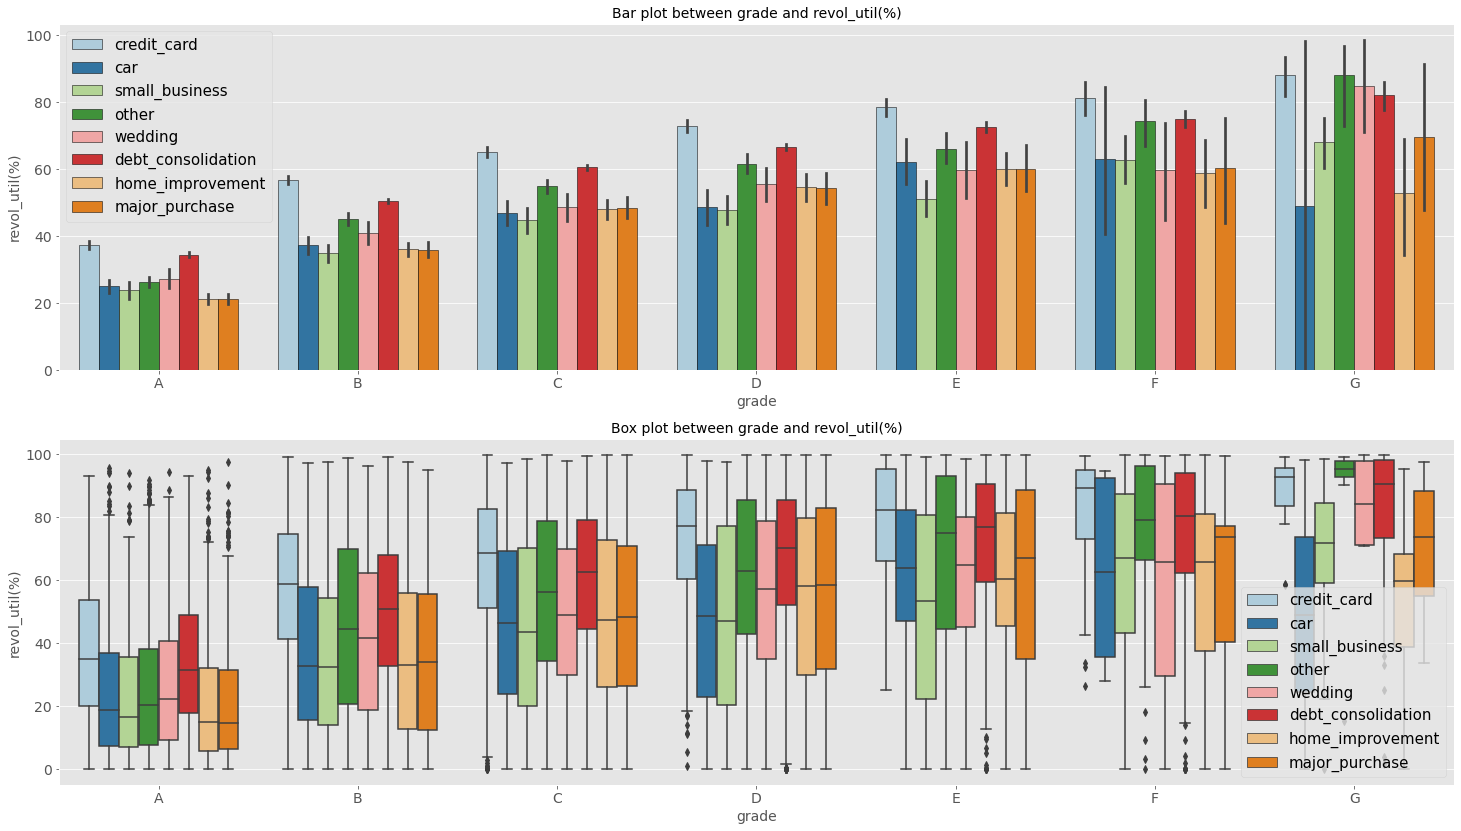

In [211]:
cat = "grade"
cont = "revol_util(%)"
hue = "purpose"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, hues = hue, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25,14))
plt.legend(prop = {"size" : 15})
plt.subplot(212)
bivariatePlots(x = cat, y = cont, hues = hue, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25,14))
plt.legend(prop = {"size" : 15})

## Observations:
- We can see some trends here that in grade A the average crdit utilization for evry category seemsto be well withing 40% which is on any given day a good sign
- Utlization rate in grade b seems to be on the higer side butwihting acceptable rate and aprt from these grades the credit utlization rates just shoots up beyond 40%
- It seems like borowers who are applying loan for credit card bill payments have worse credit utlization rate from other categories from grade A to F

## Grade vs revol_util(%) with hue as VERIFICATION_STATUS

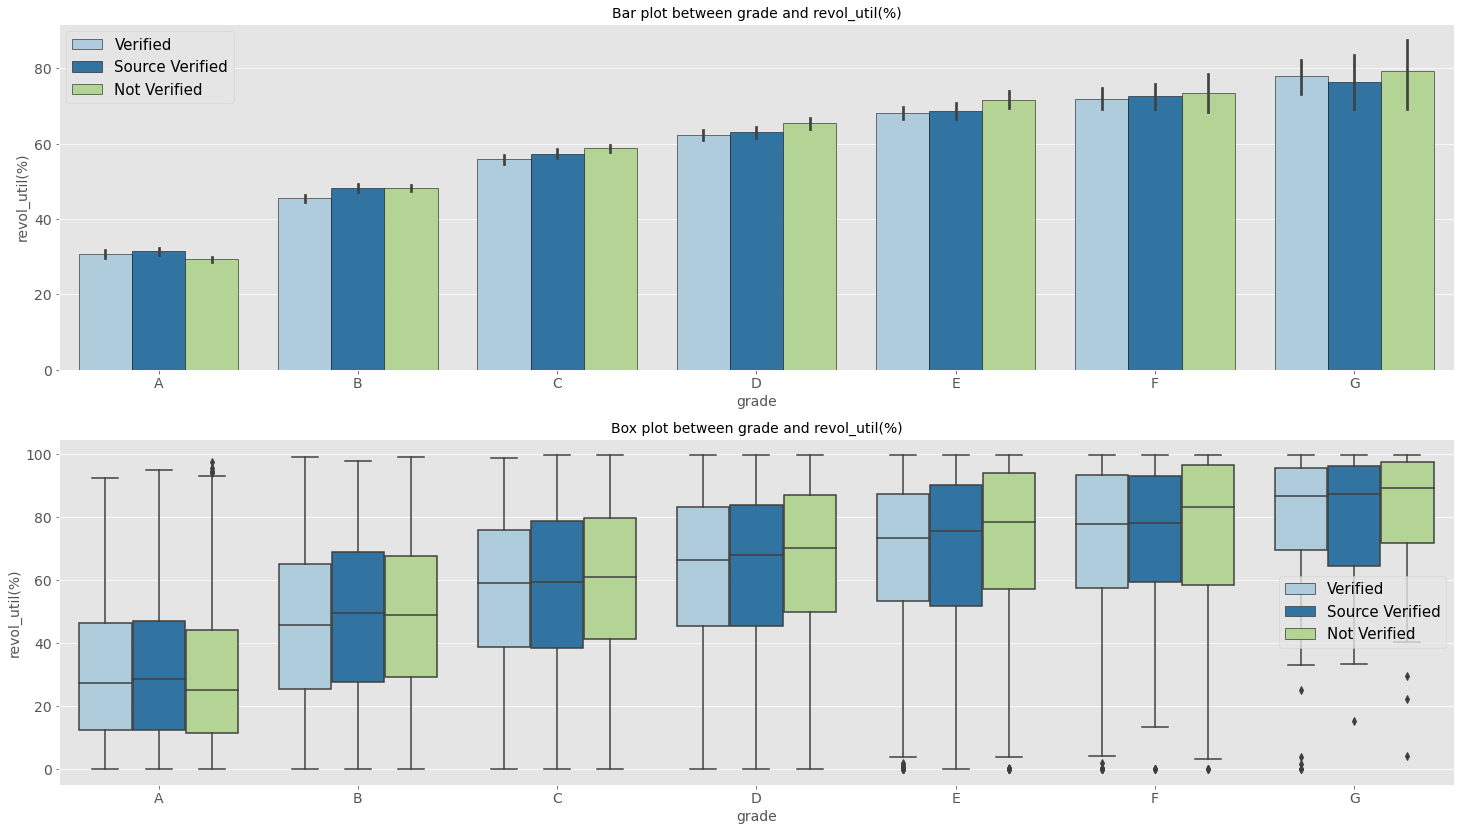

In [212]:
cat = "grade"
cont = "revol_util(%)"
hue = "verification_status"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, hues = hue, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25,14))
plt.legend(prop = {"size" : 15})

plt.subplot(212)
bivariatePlots(x = cat, y = cont, hues = hue, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25,14))
plt.legend(prop = {"size" : 15})

## Observations:
- A very basic observation that a strong correlation between as analysed in bivariate analysis that the utlization rate worsens for every fall in grade

## Home ownership vs loan amount with hue as TERM

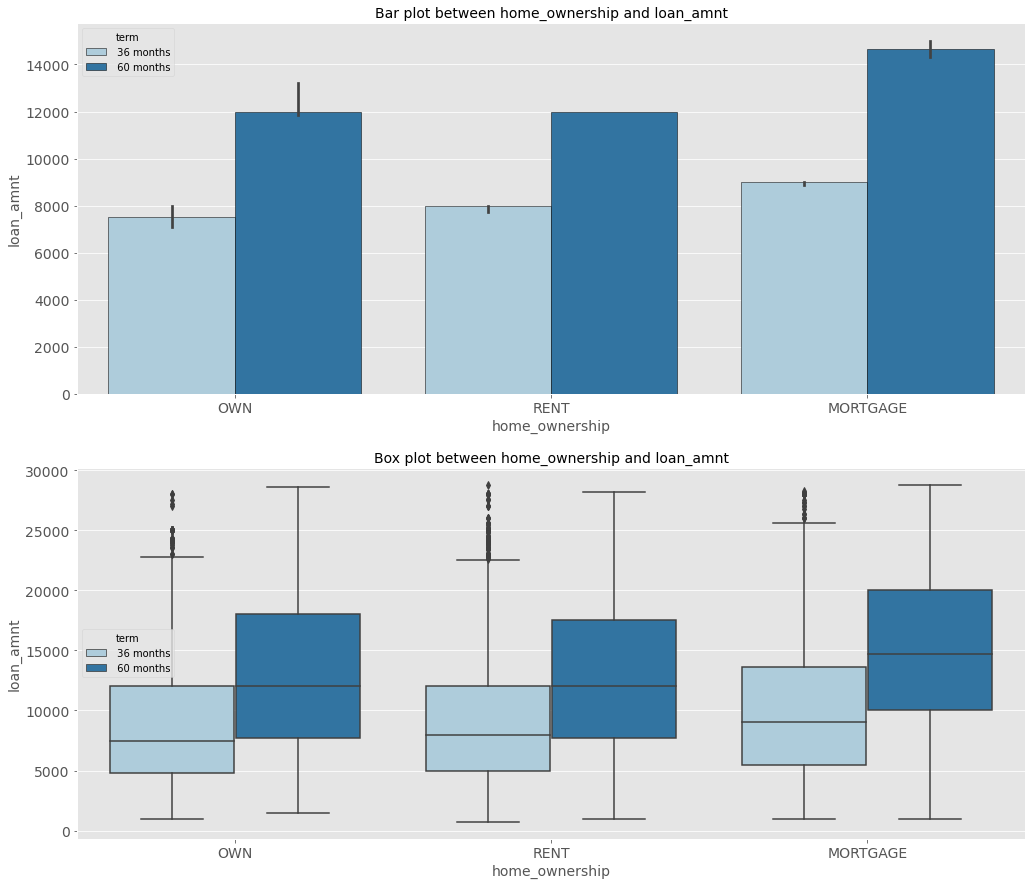

In [213]:
cat = "home_ownership"
cont = "loan_amnt"
hue = "term"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue, estimator=np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue)

## Observations:
- This plot clearly depicts that the borrowers who have mortgaged their home tend to take 60 months plan at higher amount
- During our bivriate analysis we clearly saw that borrowers who have opted for 60 months and took a higher loan amount havea higher risk of defaulting

## Home ownership vs loan amount with hue as GRADE

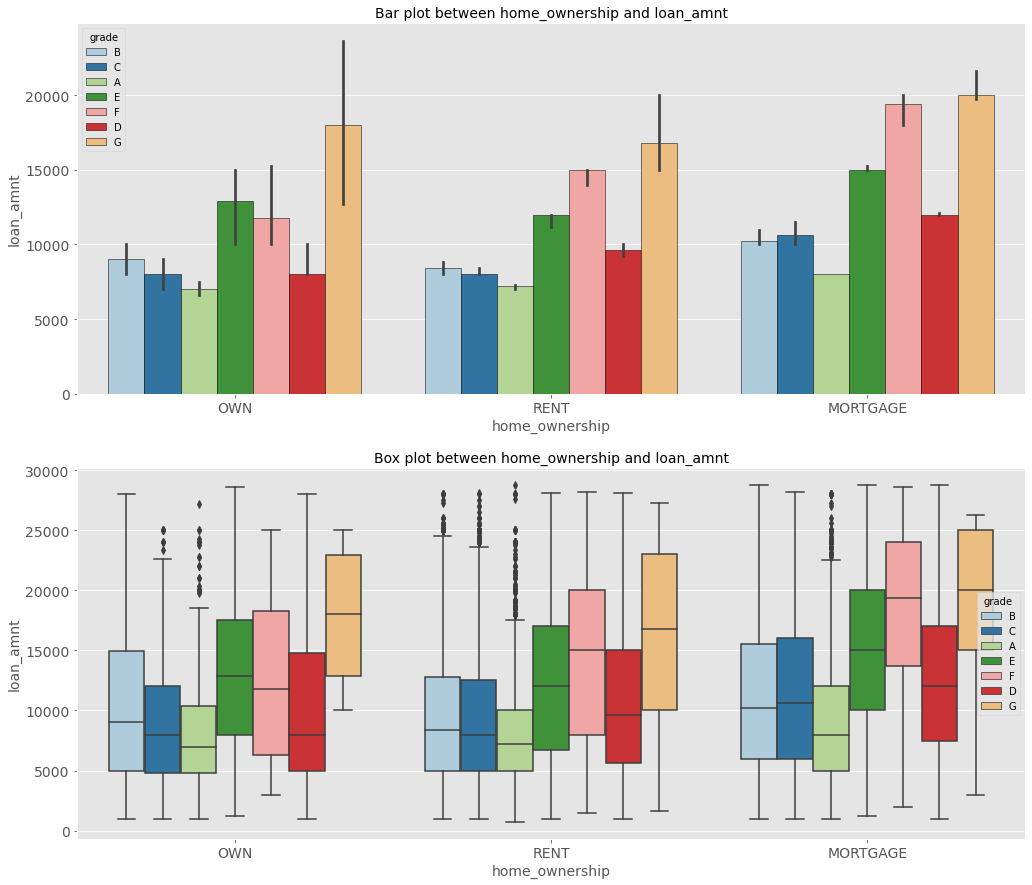

In [214]:
cat = "home_ownership"
cont = "loan_amnt"
hue = "grade"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue, estimator=np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue)

## Observations:
- Borrowers accross different categories of home ownership have taken higher amount of loan and they have been assigned the three worst grades E,F,G
- We need to analyse different variables to see how much risk does this possess to LC

## Home ownership vs loan amount with hue as LOAN_STATUS

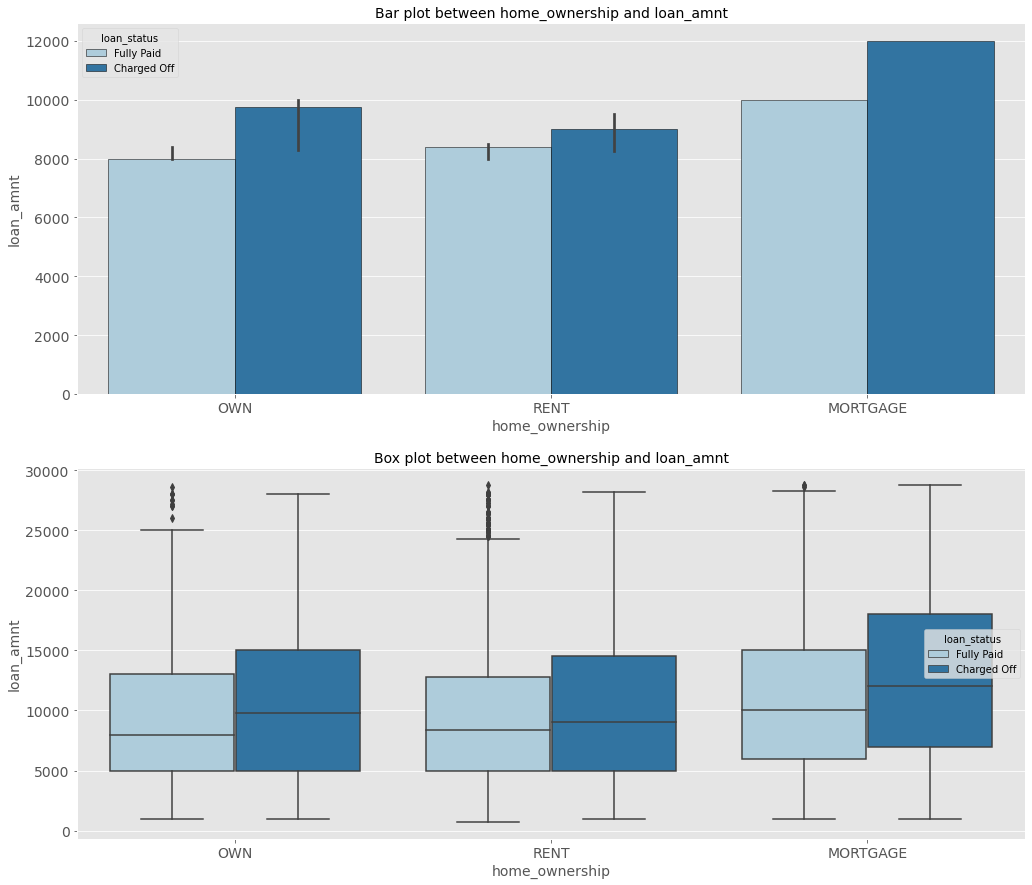

In [215]:
cat = "home_ownership"
cont = "loan_amnt"
hue = "loan_status"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue, estimator=np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue)

## Observations:
- Borrowers who owns their home tend to default if they taken out loans greater than 8 grand and same for those who rent home although the difference is much less
- Whereas borrowers who have mortgaged their home tend to default if they take out loans greater than 10 grand

## Home ownership vs loan amount with hue as PURPOSE

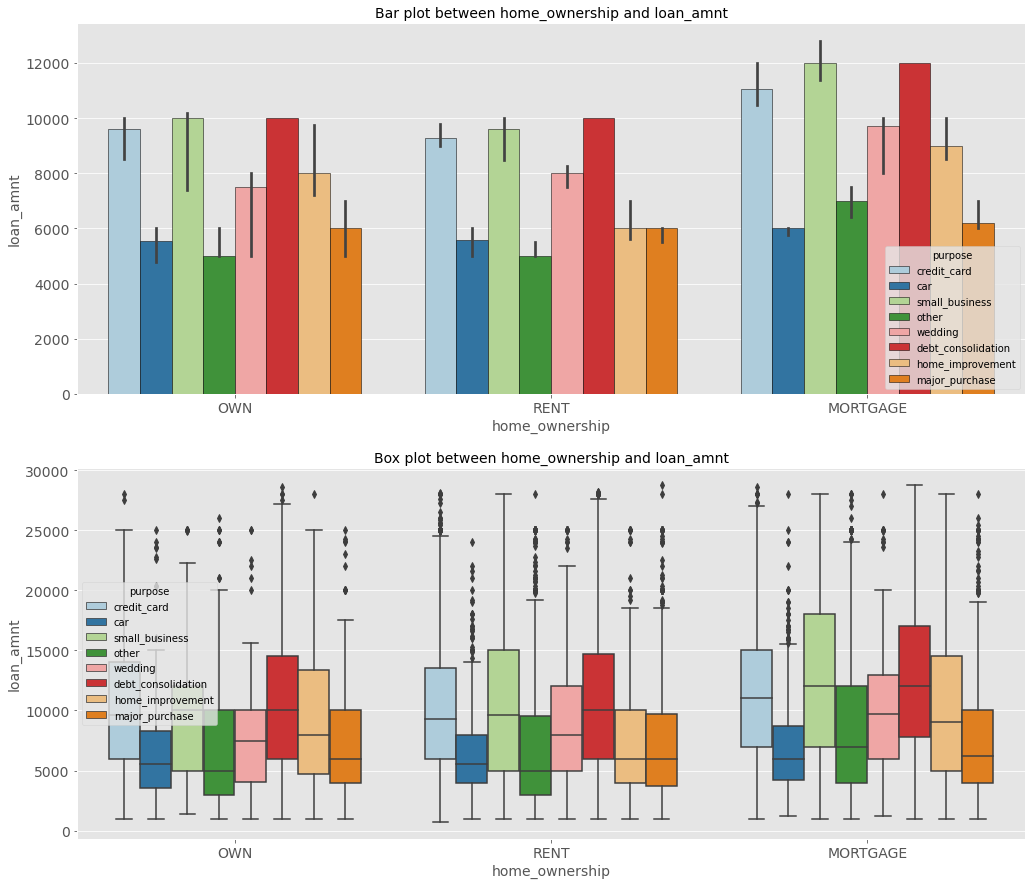

In [216]:
cat = "home_ownership"
cont = "loan_amnt"
hue = "purpose"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue, estimator=np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue)

## Observations:
- Across different categories of home ownership the three major purpose the borrowers have taken a loan for are as follows : <i> CREDIT CARD, SMALL BUSINESS, DEBT CONSOLIDATION</i>
- From the previous analysis we had come to a conclusion that borrowers belonging to MORTGAGE category shouldnt be allow to take loans greater than 10 grand but in this plot we can see that they have very well exceeded the threshold
- LC must investigate this as soon as possible   

## Hom ownership vs loan amount with hue as INCOME_GROUPS

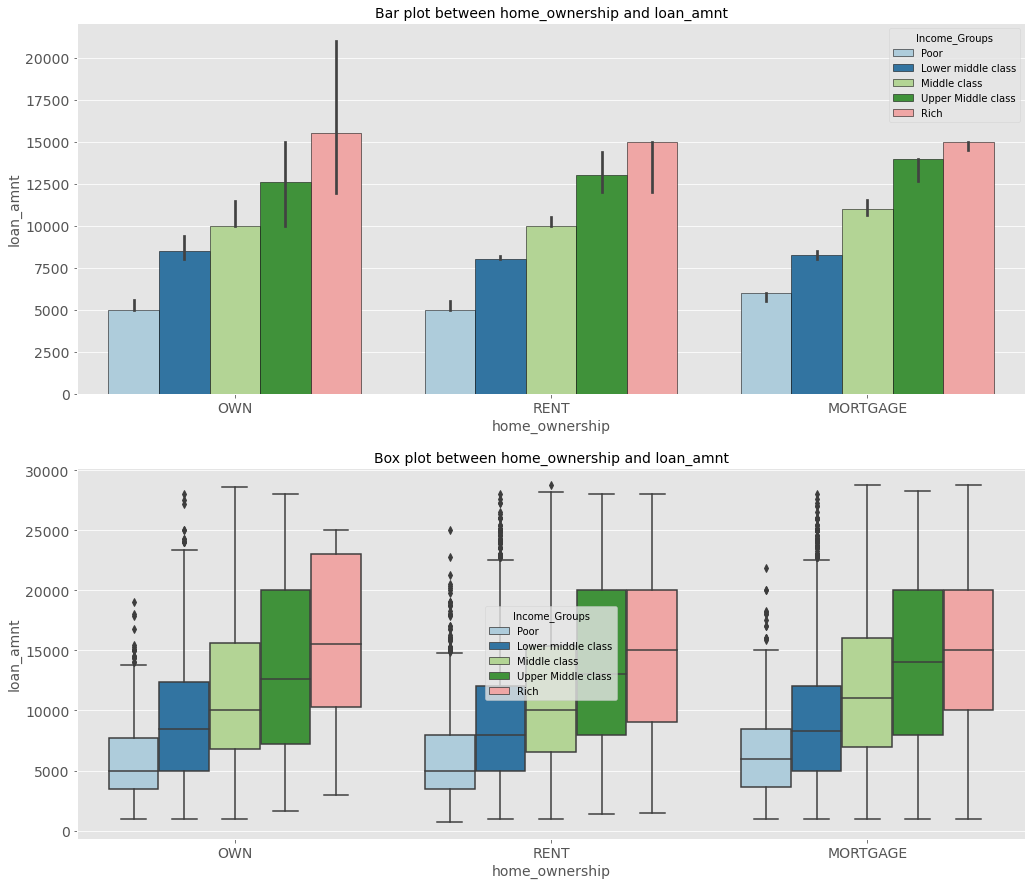

In [217]:
cat = "home_ownership"
cont = "loan_amnt"
hue = "Income_Groups"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue, estimator=np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue)

## Obsrvations:
- This plot shows us the distribution of <i>Loan amount </i> across various categories of <i>Home ownership</i>
- We can see the same distribution across each category the amount of loan requested keeps increasing as we move up the ladder in Income Groups

## Home ownership vs interest rates with hue as TERM

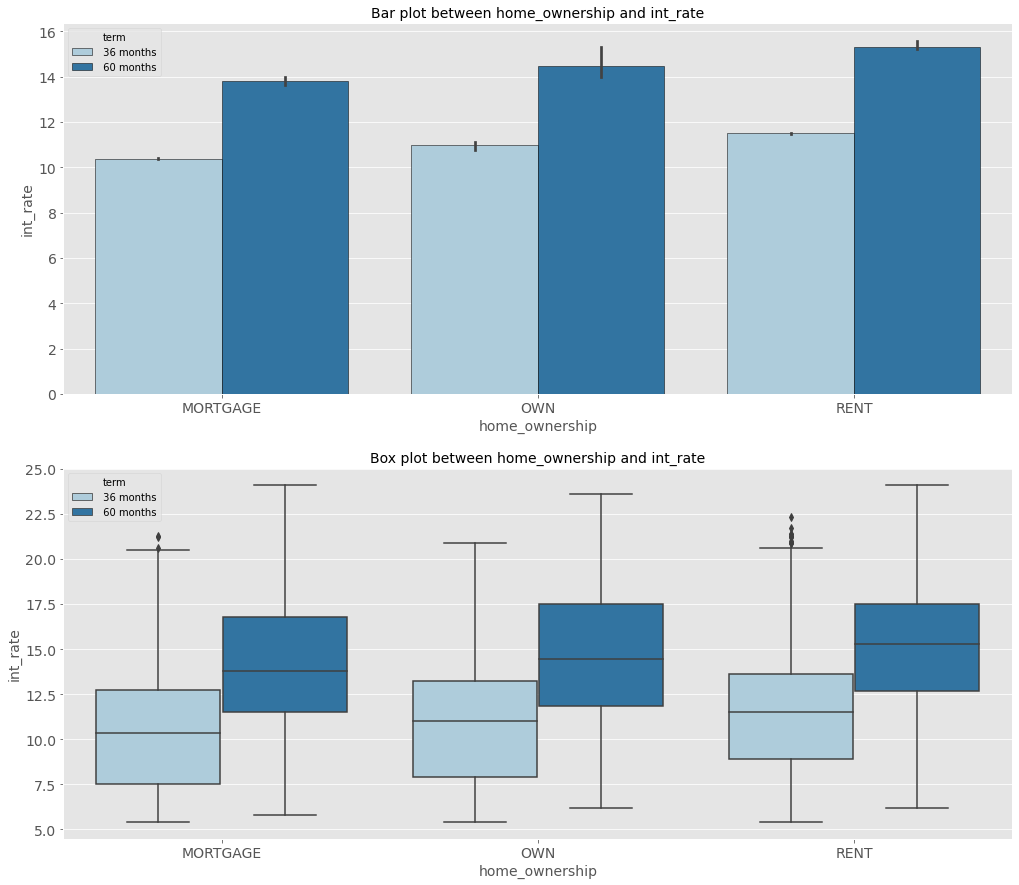

In [218]:
cat = "home_ownership"
cont = "int_rate"
hue = "term"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue, estimator=np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue)

## Observations:
- The interest rate is higher for 60 months compared to 36 monthjs across every category of home ownership 
- It seems like the interest rate for borrowers who have opted for 36 months is well under 12% and for 60 months about grater or equal to 14%

## Home ownership vs interest rates with hue as VERIFICATION_STATUS

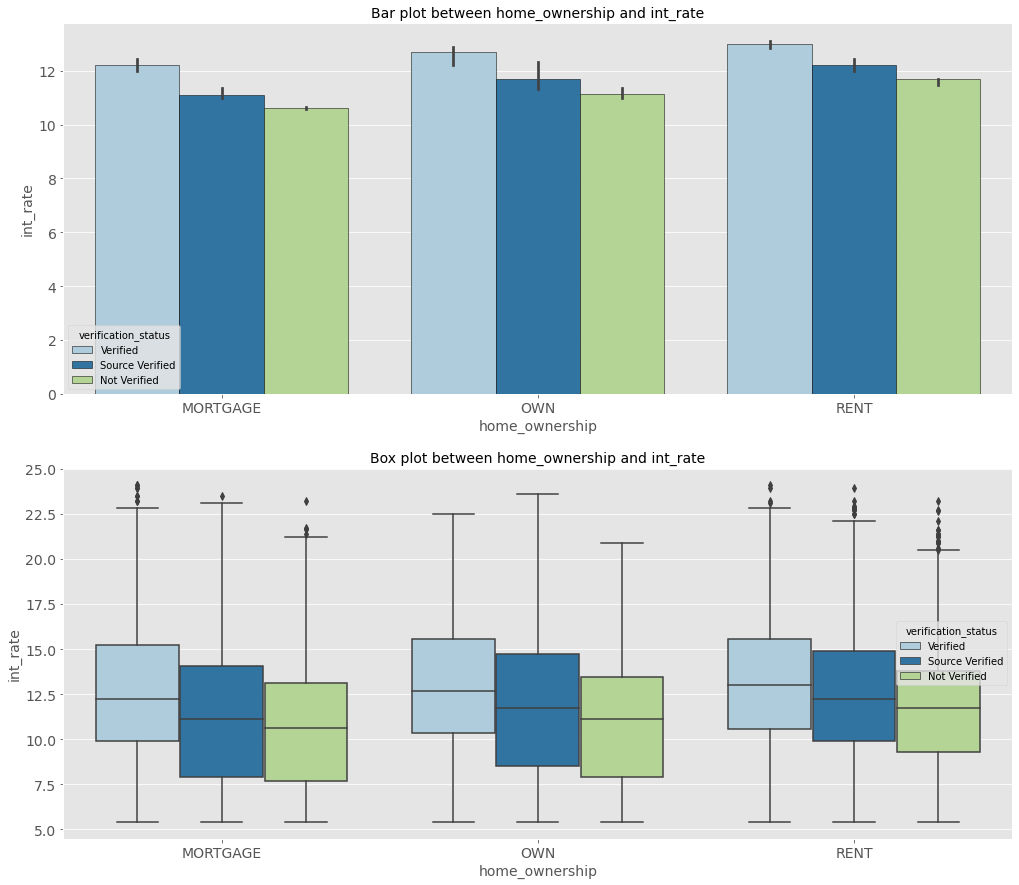

In [219]:
cat = "home_ownership"
cont = "int_rate"
hue = "verification_status"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue, estimator=np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue)

## Observations:
- We have deduced the same in our previous analysis that borrowers who  have their income verified tend to get loans easily but there is no guranttee that they will recieve the requested amount
- It seems that even their credit score is poor they do get thier loan approved but as we can see at a much higher interest

## Home ownership vs interest rates with hue as PURPOSE

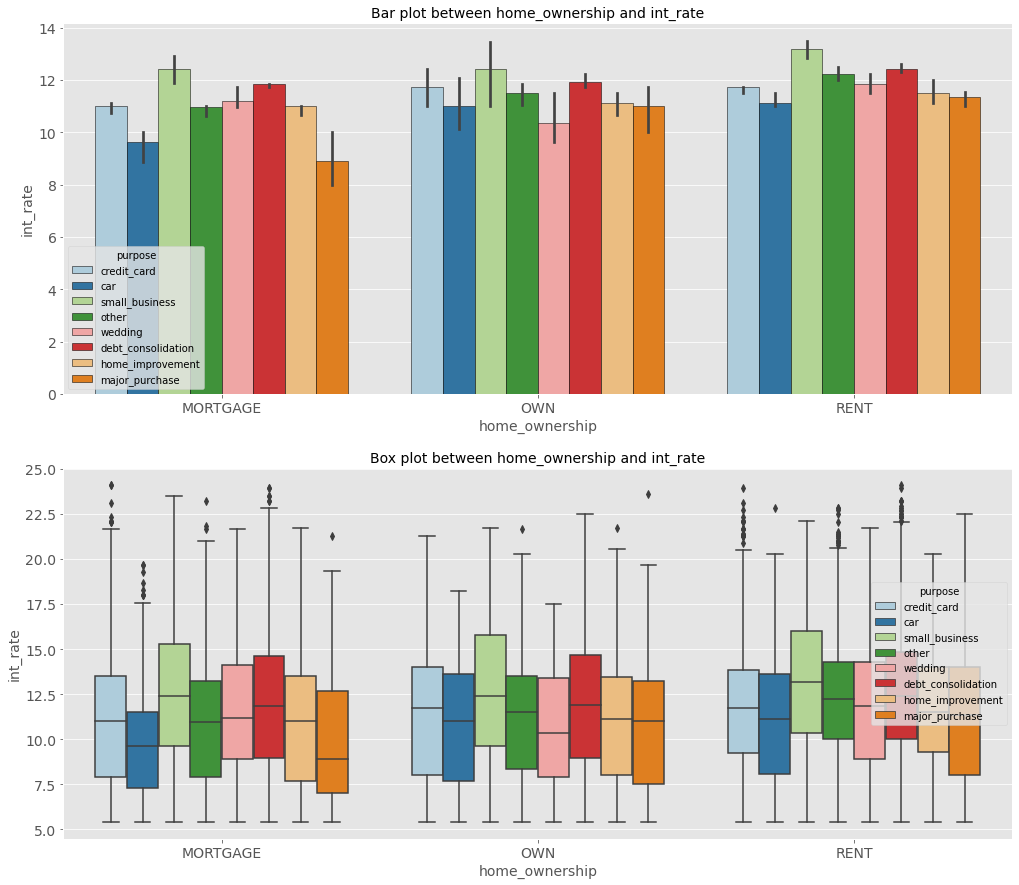

In [220]:
cat = "home_ownership"
cont = "int_rate"
hue = "purpose"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue, estimator=np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue)

## Observations:
- This plot helped us to see some trend as riskier loans are charged heavier interest rates
- Other than this we werent able to conclude anything

## Home ownership vs loan status with hue as TERM

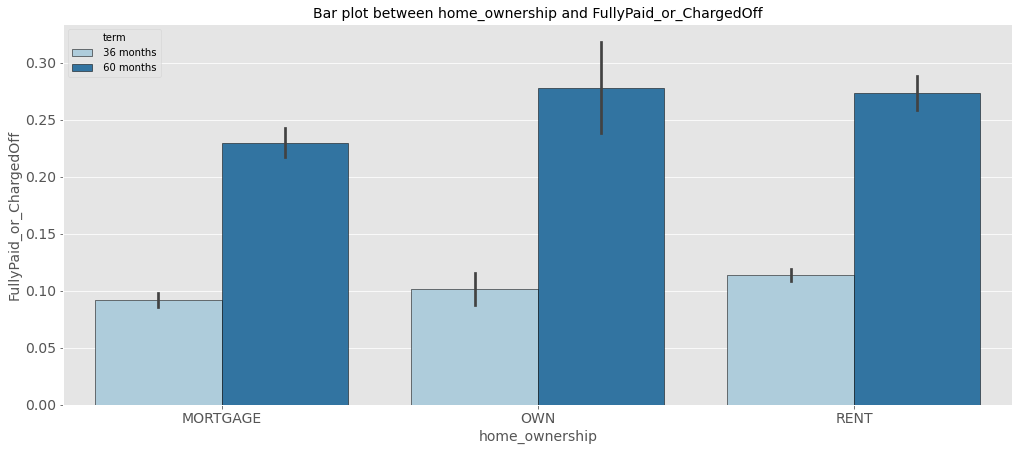

In [221]:
cat = "home_ownership"
cont = "FullyPaid_or_ChargedOff"
hue = "term"

bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 7), hues = hue)

## Observations:
- This plot clearly depicts that across homeownership the feaulter ratio is high for borrowers who have opted for 60 months

## Home ownership vs loan status with hue as VERIFICATION_STATUS

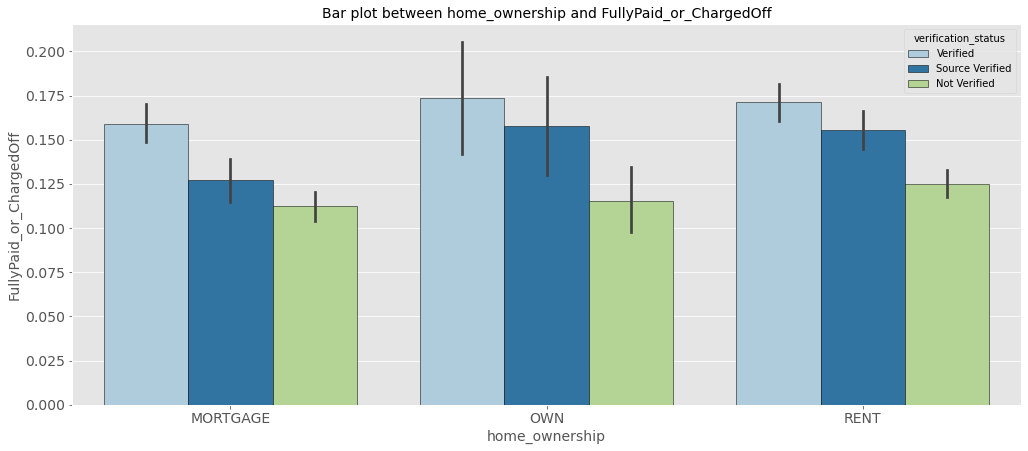

In [222]:
cat = "home_ownership"
cont = "FullyPaid_or_ChargedOff"
hue = "verification_status"

bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 7), hues = hue)

## Observations:
- Frome our previous plots we deduced in our <i> home_ownership vs loan status </i> plot that even though borrowers who have verified their source of income get their loan approved easily; the higher interest rates would surely play its part and from this plot it has been confirmed that borrowers who have their income verified tend to default on their loan

## Home ownership vs loan status with hue as INCOME_GROUPS

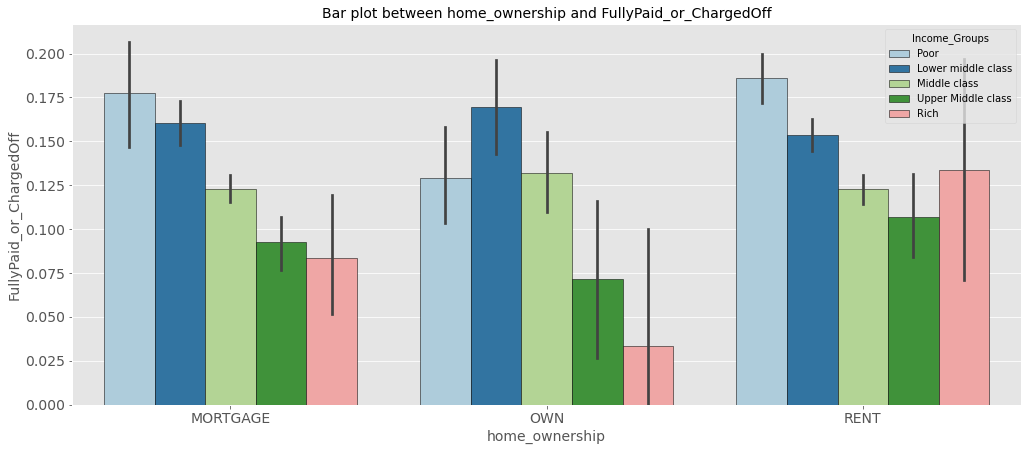

In [223]:
cat = "home_ownership"
cont = "FullyPaid_or_ChargedOff"
hue = "Income_Groups"

bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 7), hues = hue)

## Observations: 
-Borrowers who earn less tend to possess a higher defaulter ratio across <i> MORTGAGE </i> and <i>RENT</i> categories

In [224]:
general_info(column = "Income_Groups", dataframe=clean_data)

Individual count for unqiue values of Income_Groups are : 
 Middle class          13599
Lower middle class    10071
Poor                   4144
Upper Middle class     2113
Rich                    408
Name: Income_Groups, dtype: int64 

Percent of data that each unqiue value of Income_Groups represents : 
 Middle class          44.83
Lower middle class    33.20
Poor                  13.66
Upper Middle class     6.97
Rich                   1.34
Name: Income_Groups, dtype: float64


## Home ownership vs Installment with hue as GRADE

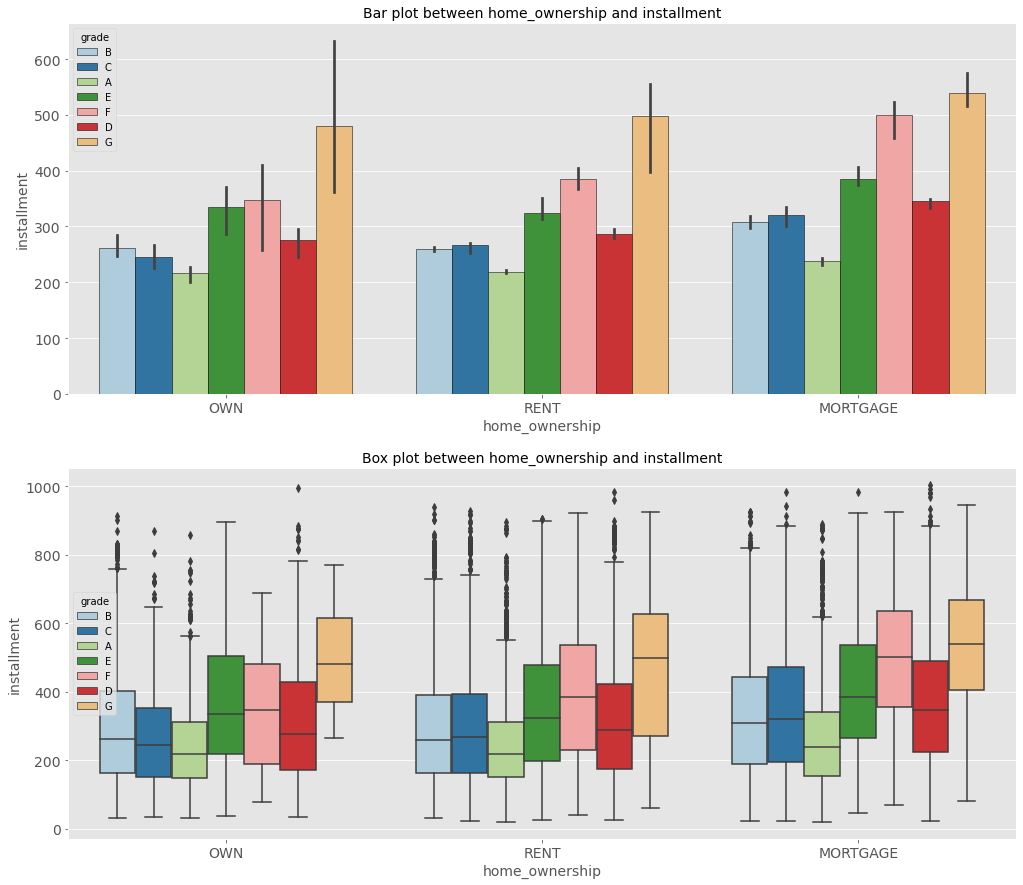

In [225]:
cat = "home_ownership"
cont = "installment"
hue = "grade"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue, estimator=np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue)

## Observations:
- Borrowers who were assigned a lower gradfe tend to pay more monthly and it amkes sense as poor grade means higher interest
- This trend is eminent across different categories of home ownership

## Home ownership vs Installment with hue as VERIFICATION_STATUS

compare


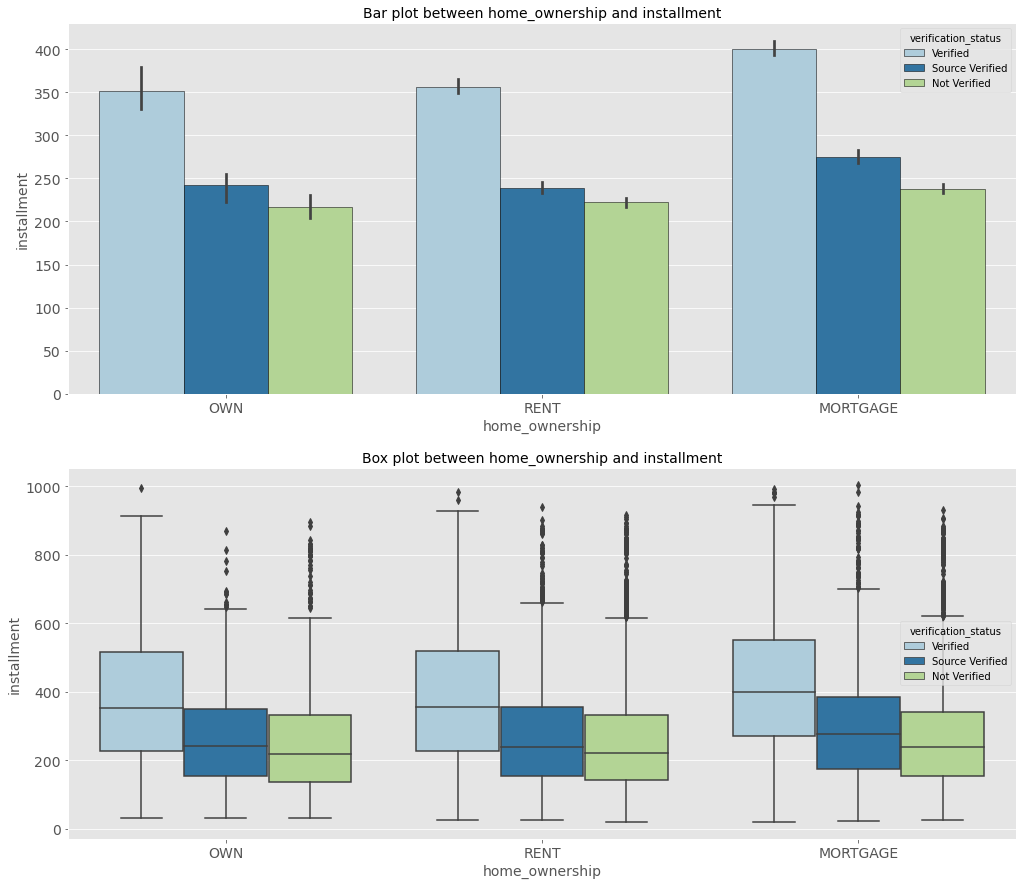

In [226]:
cat = "home_ownership"
cont = "installment"
hue = "verification_status"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue, estimator=np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 15), hues = hue)
print("compare")

## Observations:
- Just as expected borrowers who have income sources verified have to pay more monthly because in our previous plots it was painfully clear that they have to pay more since most of tthem were assigned poor grades
- Things and data are starting to fall into place as we delve deeper and deeper as our plotshave now starting to confirm and complement each other

## Home ownership vs pub_rec (Number of public deragotory remarks) with hue as term

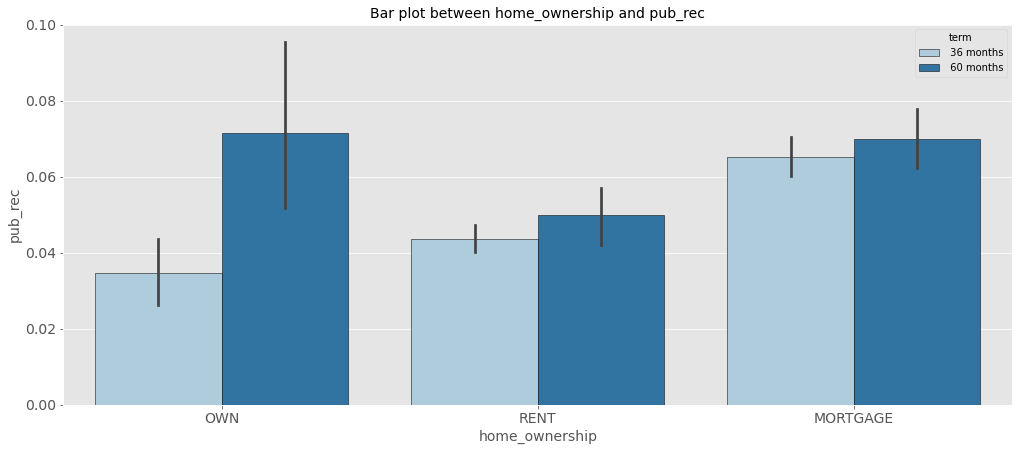

In [227]:
cat = "home_ownership"
cont = "pub_rec"
hue = "term"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 7), hues = hue)

## Observations:
- Borrower who tend to have a history of being bankrupt opt for 60 months partly due to high interest rates, this can be seen across diferrent categories of home ownership

## Home ownership vs pub_rec (Number of public deragotory remarks) with hue as LOAN_STATUS

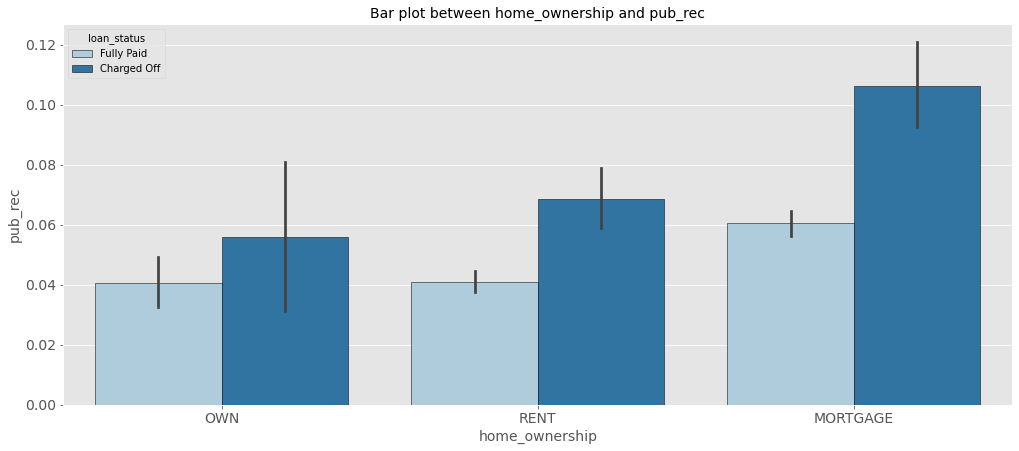

In [228]:
cat = "home_ownership"
cont = "pub_rec"
hue = "loan_status"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 7), hues = hue)



## Observations:
- We have seen in our bivariate plots which depicts the relationship of  <i> home-ownership vs pub_rec </i> that borrowers who had a history of unfulfilled financial obligations tend to default more often
- This plots in fact are confirming our very first suspicion and our finding during bivariate analysis
- This plot confirsm the same

## Home ownership vs pub_rec_bankruptcies (Number of public record bankruptcies) with hue as LOAN_STATUS

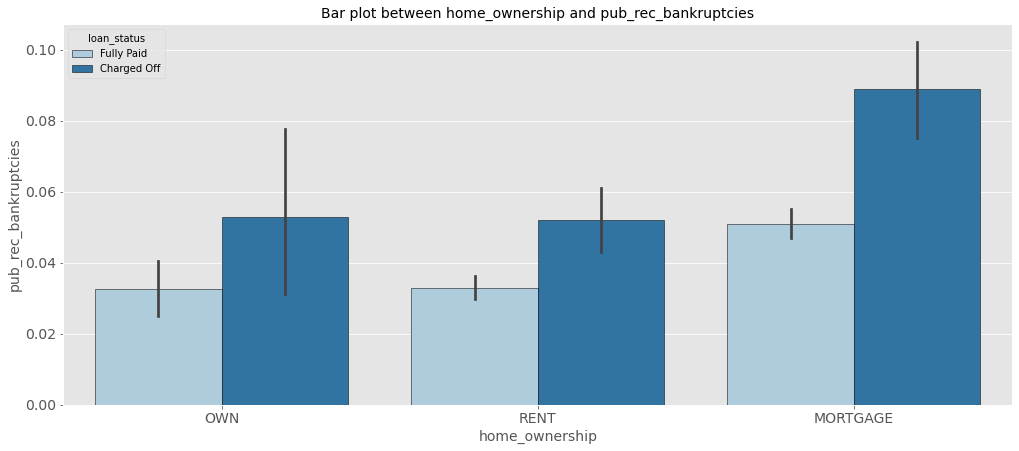

In [229]:
cat = "home_ownership"
cont = "pub_rec_bankruptcies"
hue = "loan_status"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 7), hues = hue)

## Observations:
- We can see that the those who have defaulted on their tend to have a background of bankruptcy

## Home ownership vs pub_rec_bankruptcies (Number of public record bankruptcies) with hue as INCOME_GROUPS

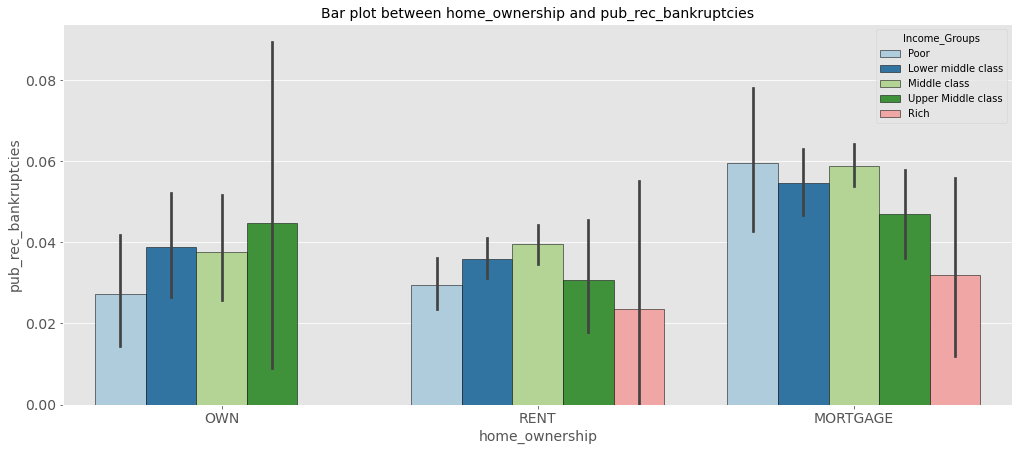

In [230]:
cat = "home_ownership"
cont = "pub_rec_bankruptcies"
hue = "Income_Groups"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 7), hues = hue)

## Observations:
- Those hwo have mortgaged their houses tend to have been bankrupt and we saw in our analysis that such borrowers tend to have a higher deafulter ratio

## Verification status vs loan amount with hue as GRADE

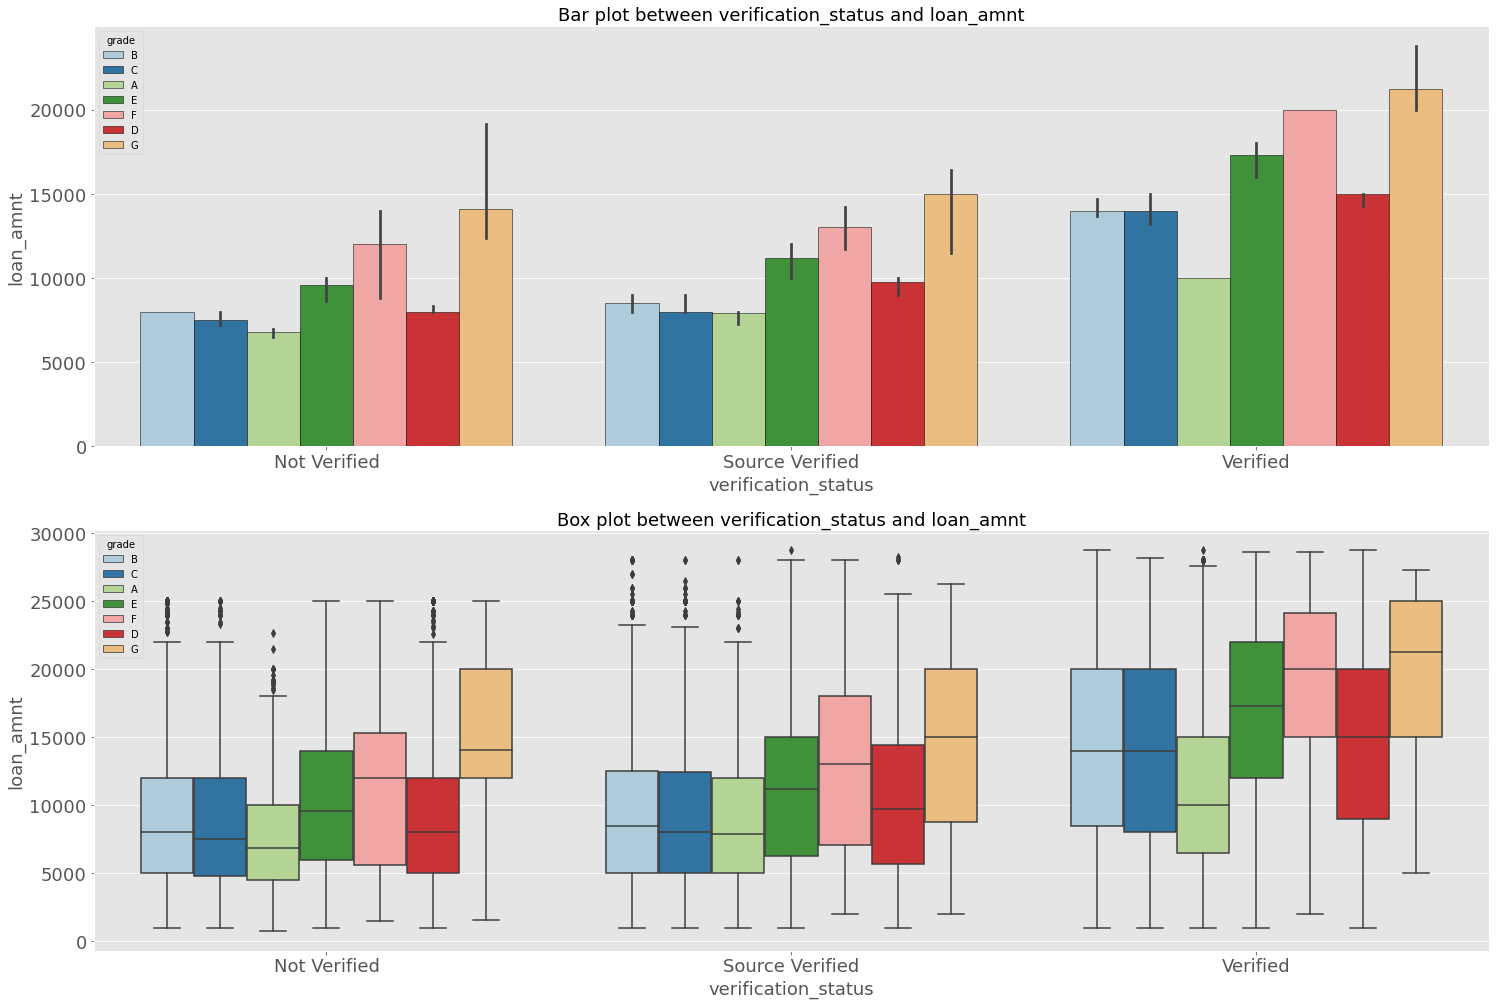

In [231]:
cat = "verification_status"
cont = "loan_amnt"
hue = "grade"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Observations:
- The distribution of loanamount is almost identical in <i> Not verified and Source verified </i> but when it comes to <i>Verified</i> the loan amount shoots up along with rise in higher amounts of loan  with lower grades

## Verification status vs loan amount with hue as HOME_OWNERSHIP

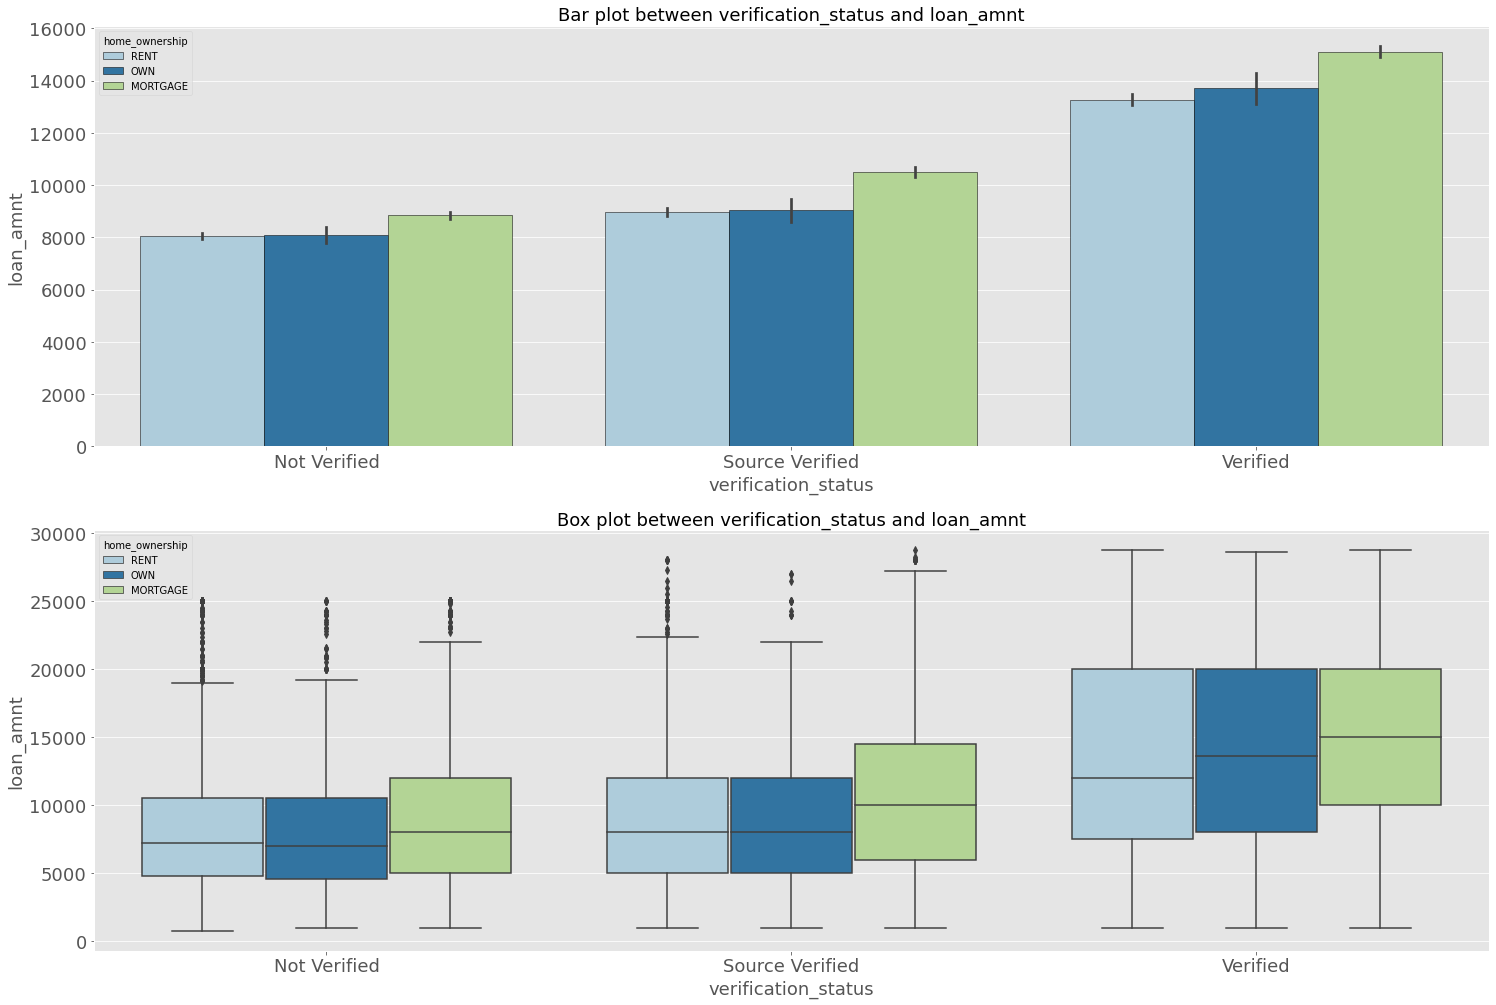

In [232]:
cat = "verification_status"
cont = "loan_amnt"
hue = "home_ownership"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Observations:
- The same can be observed with this plot across different categories of home ownership

## Verification status vs loan amount with hue as PURPOSE

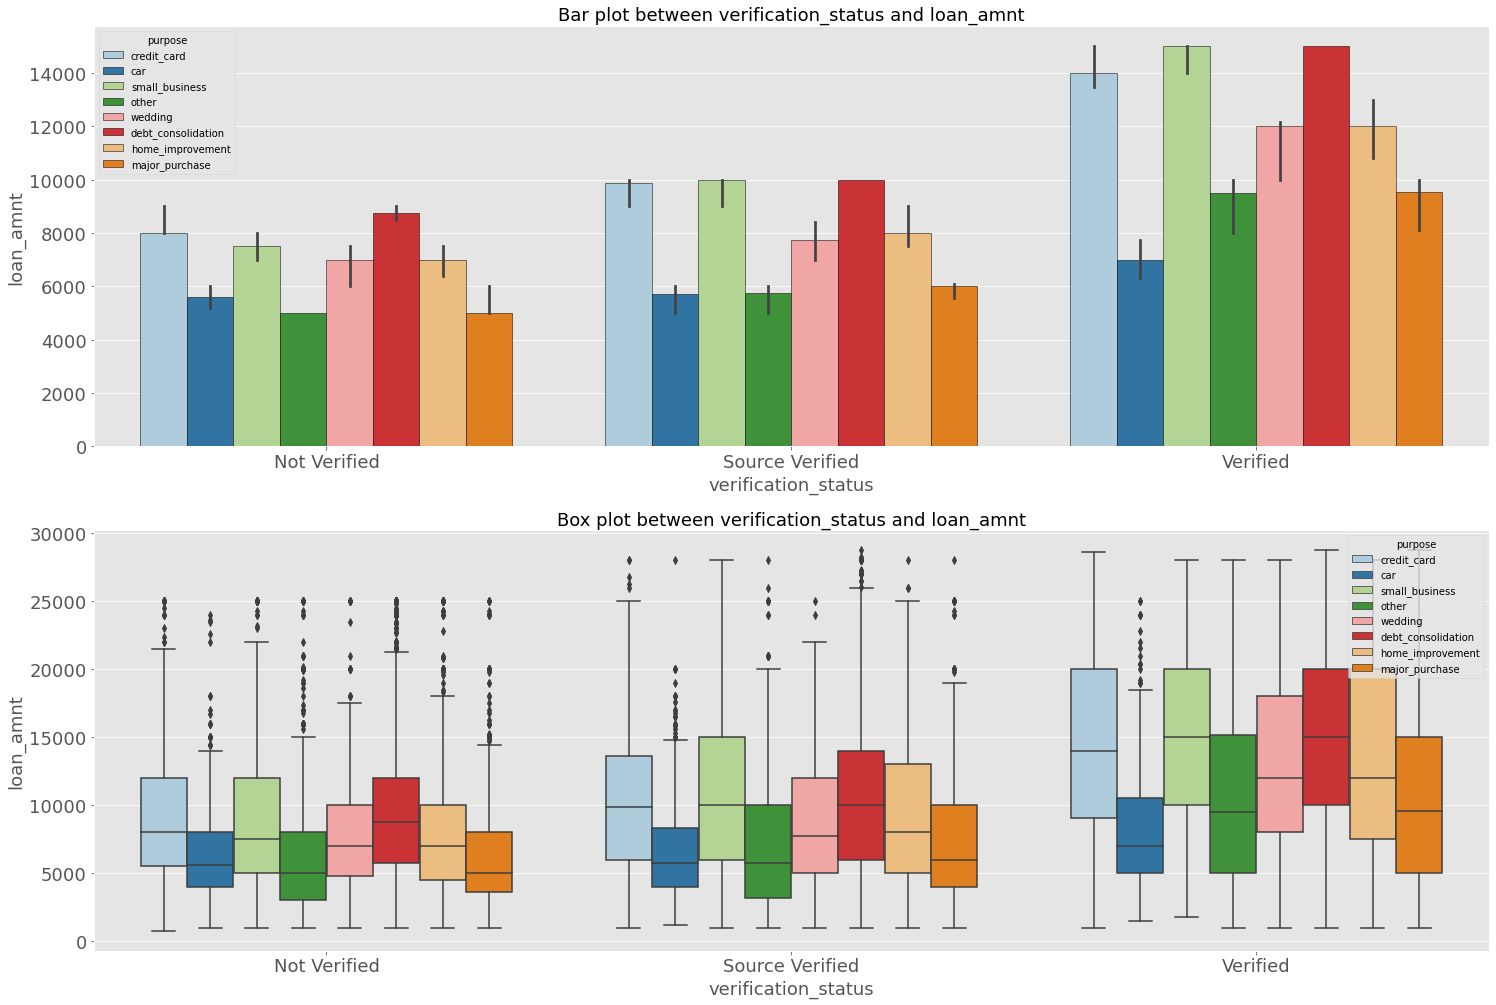

In [233]:
cat = "verification_status"
cont = "loan_amnt"
hue = "purpose"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Verification status vs loan amount with hue as LOAN_STATUS

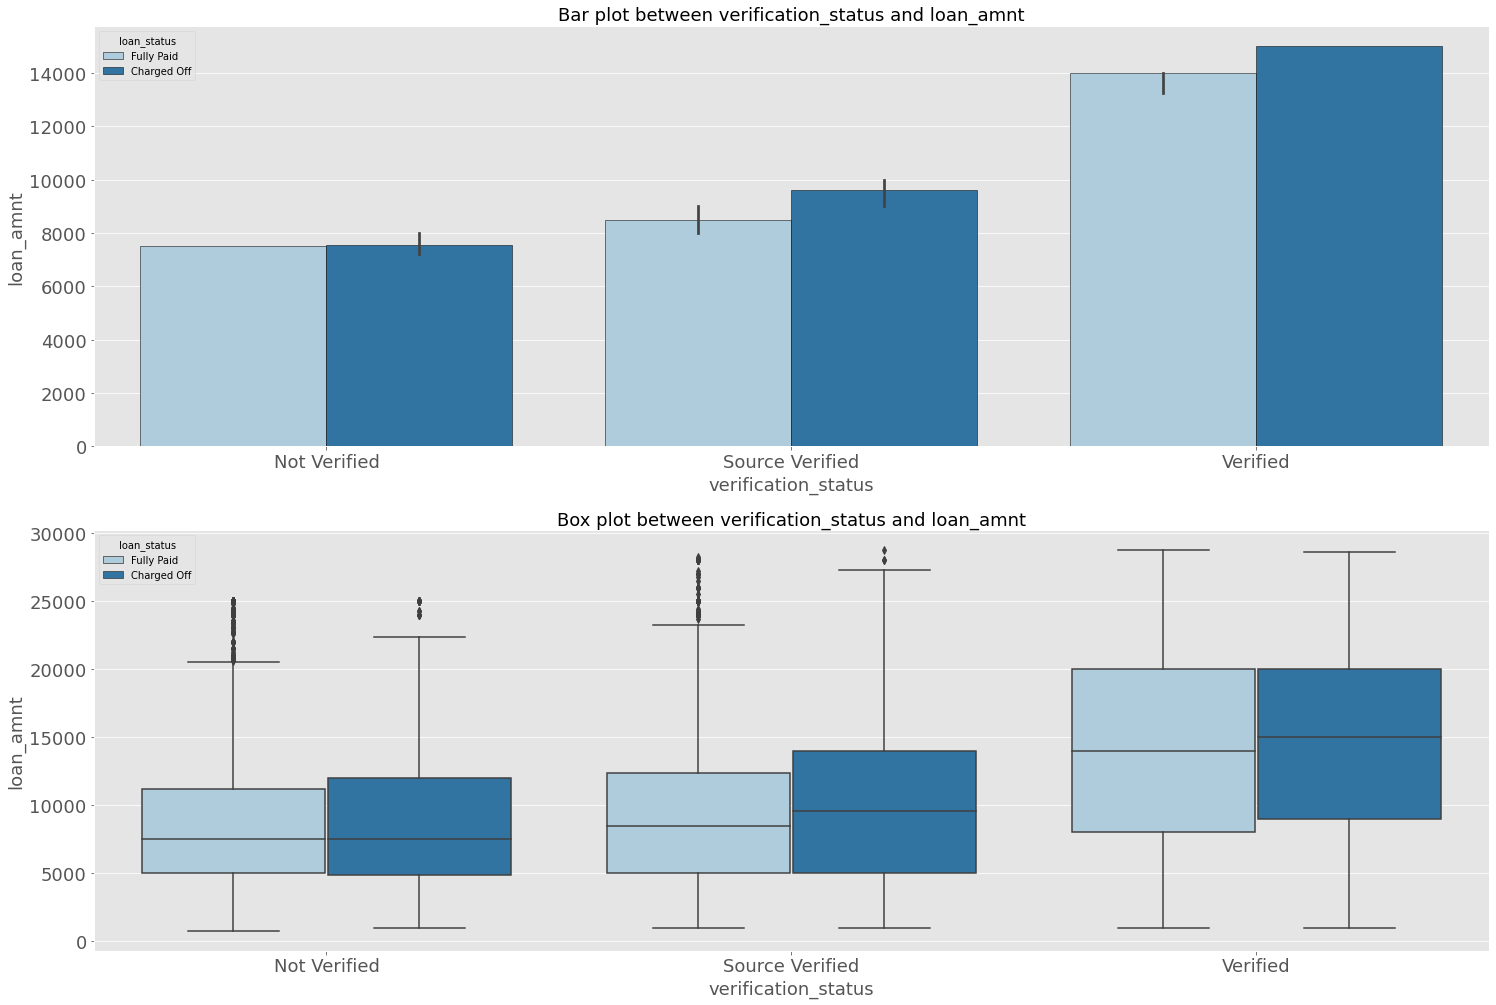

In [234]:
cat = "verification_status"
cont = "loan_amnt"
hue = "loan_status"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Observations:
- Even when we seggregate according to purpose we still see the same trend which is expected for both the visualizations 

## Verification status vs loan status with hue as TERM

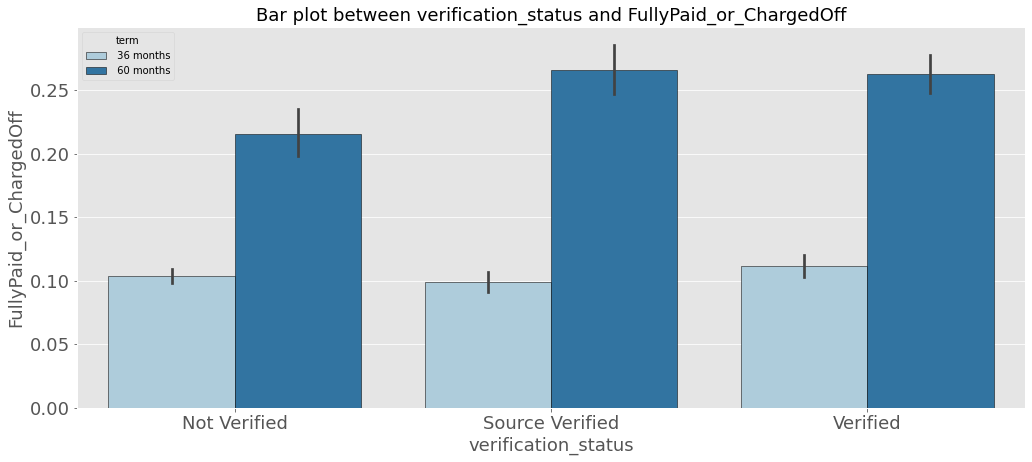

In [235]:
cat = "verification_status"
cont = "FullyPaid_or_ChargedOff"
hue = "term"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17,7), hues = hue, font_size = 18)



## Observations:
- The defaulter ratio is high for borrowers who have opted for 60 months  across different verification status but it is particularly high for <i> Source Verified and Verified</i>

## For the next three plots we can see that despite exposingthis relationship to various other variables, our results dont seem to differ

## Verification status vs loan status with hue as HOME_OWNERSHIP

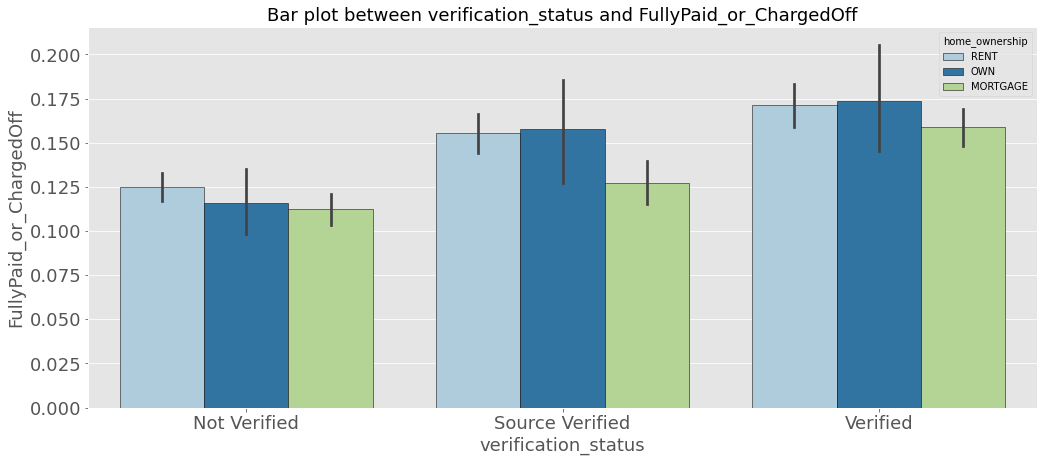

In [236]:
cat = "verification_status"
cont = "FullyPaid_or_ChargedOff"
hue = "home_ownership"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17,7), hues = hue, font_size = 18)



## Verification status vs loan status with hue as PURPOSE

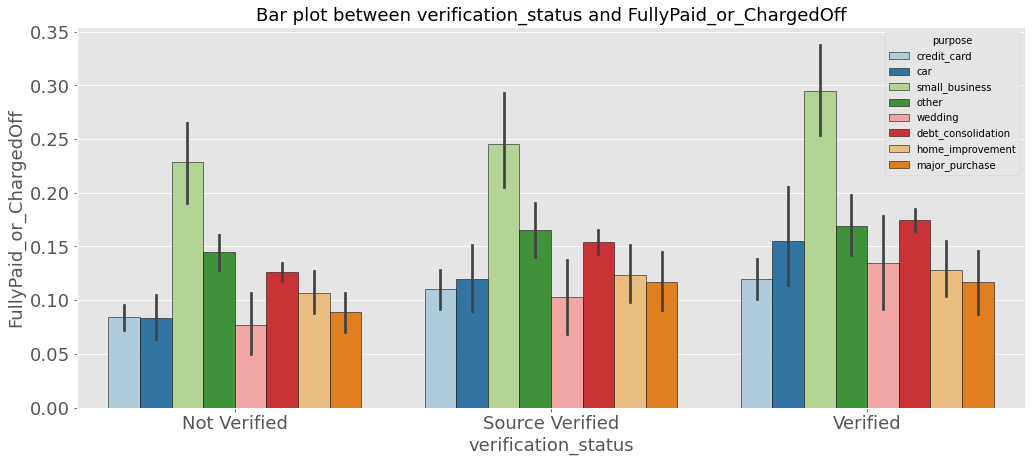

In [237]:
cat = "verification_status"
cont = "FullyPaid_or_ChargedOff"
hue = "purpose"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17,7), hues = hue, font_size = 18)



## Verification status vs loan status with hue as INCOME_GROUPS

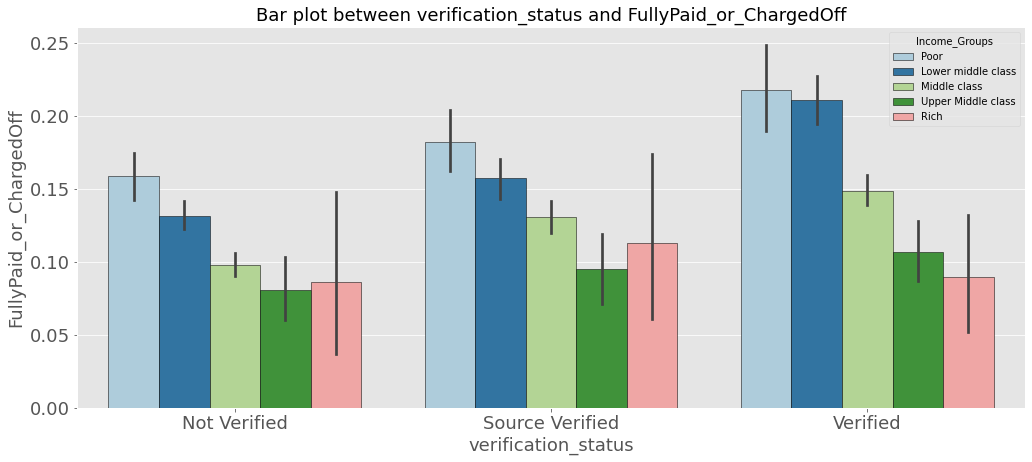

In [238]:
cat = "verification_status"
cont = "FullyPaid_or_ChargedOff"
hue = "Income_Groups"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17,7), hues = hue, font_size = 18)



## Verification status vs pub_rec_bankruptcies( Number of record public bankruptcies) with hue as TERM

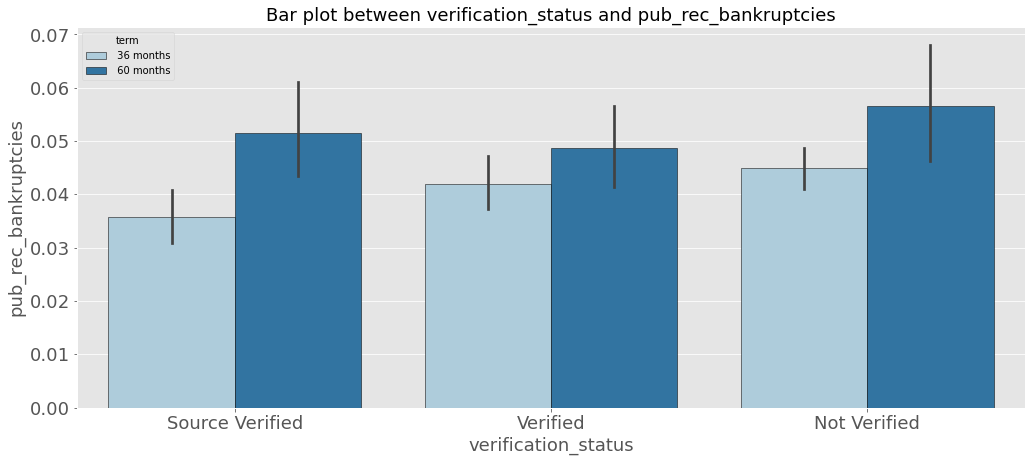

In [239]:
cat = "verification_status"
cont = "pub_rec_bankruptcies"
hue = "term"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17,7), hues = hue, font_size = 18)

## Observations:
- We can see that the defaulter ratio is similar across different verification status but we have also iferred from our previous analysis that borrowers who have their income verified get loan approval easily even at higher loan amount

## Verification status vs Annual income with hue as HOME_OWNERSHIP

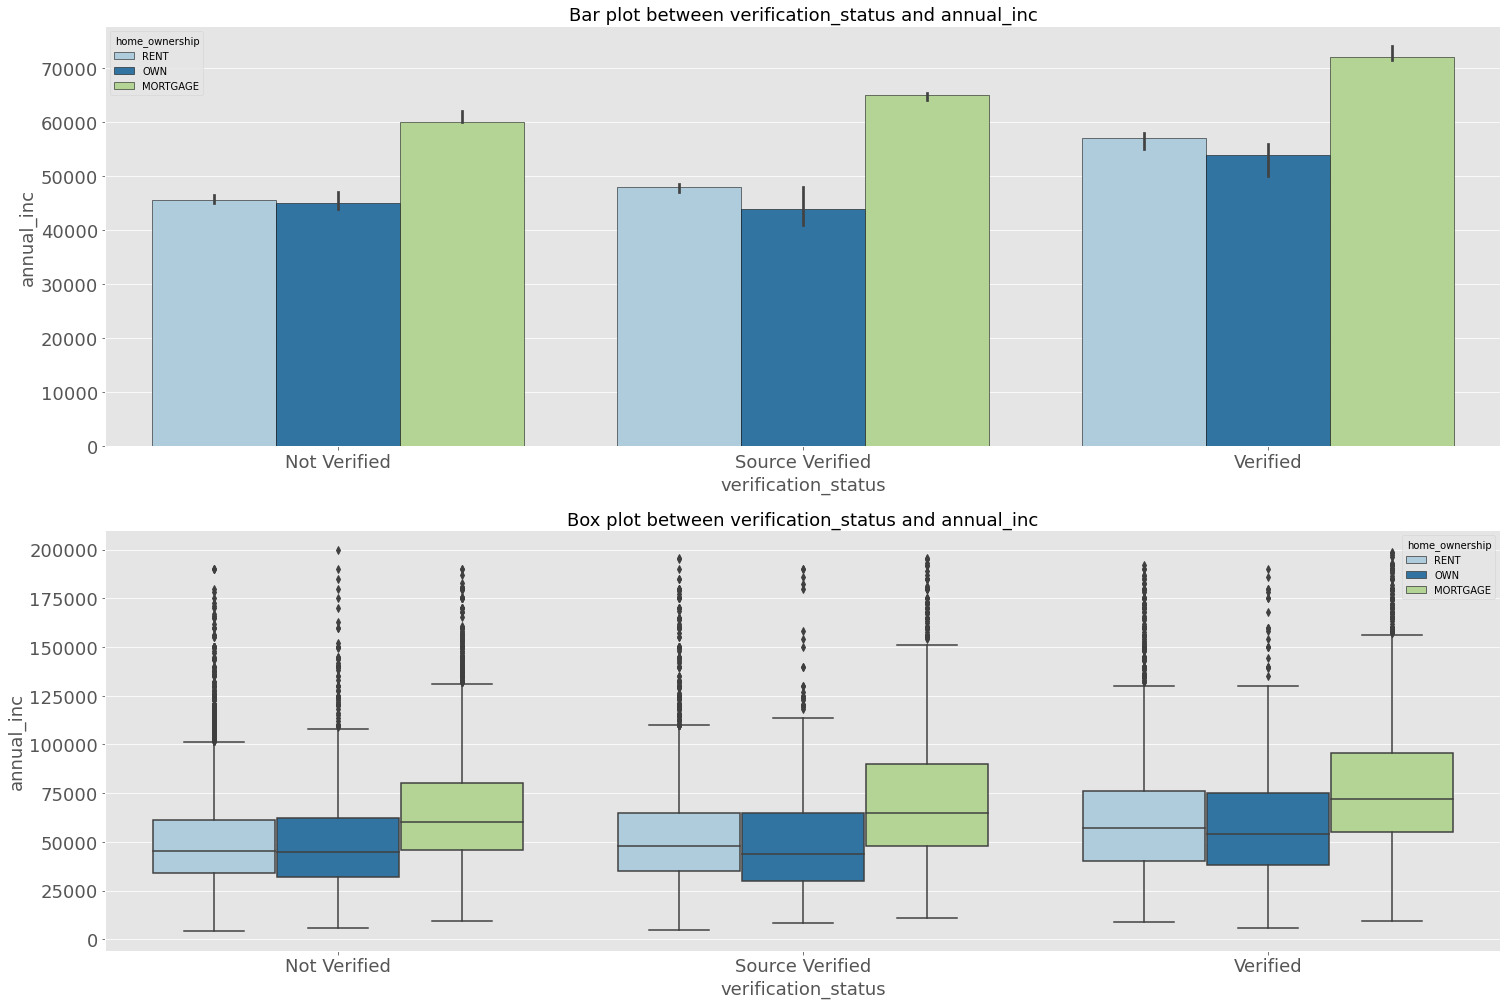

In [240]:
cat = "verification_status"
cont = "annual_inc"
hue = "home_ownership"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)


## Observations:
- The distribution of home_ownership across the x-axis seems to be the same for all categories of <i>Verification status</i>
_ Borrowers who have mortgaged their home seems to earningslightly more than other categories

## Verification status vs revol_util(%) with hue as LOAN_STATUS

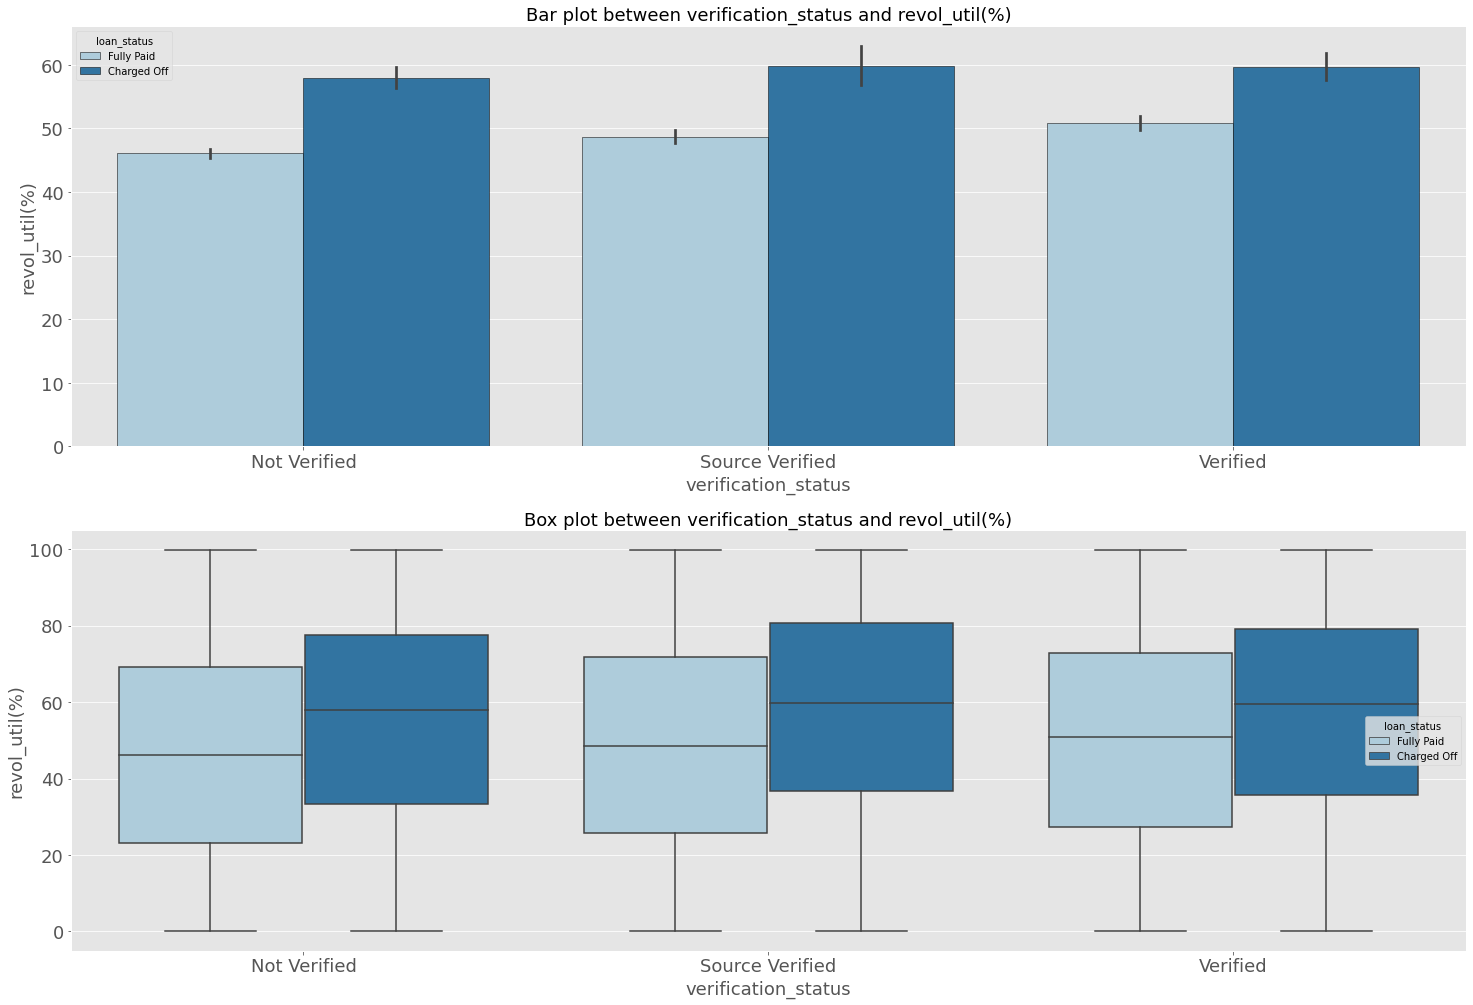

In [241]:
cat = "verification_status"
cont = "revol_util(%)"
hue = "loan_status"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Observations:
- Those borrowers who have a higher credit utilzation rate tend to default more often

## Loan status vs loan amount with hue as PURPOSE

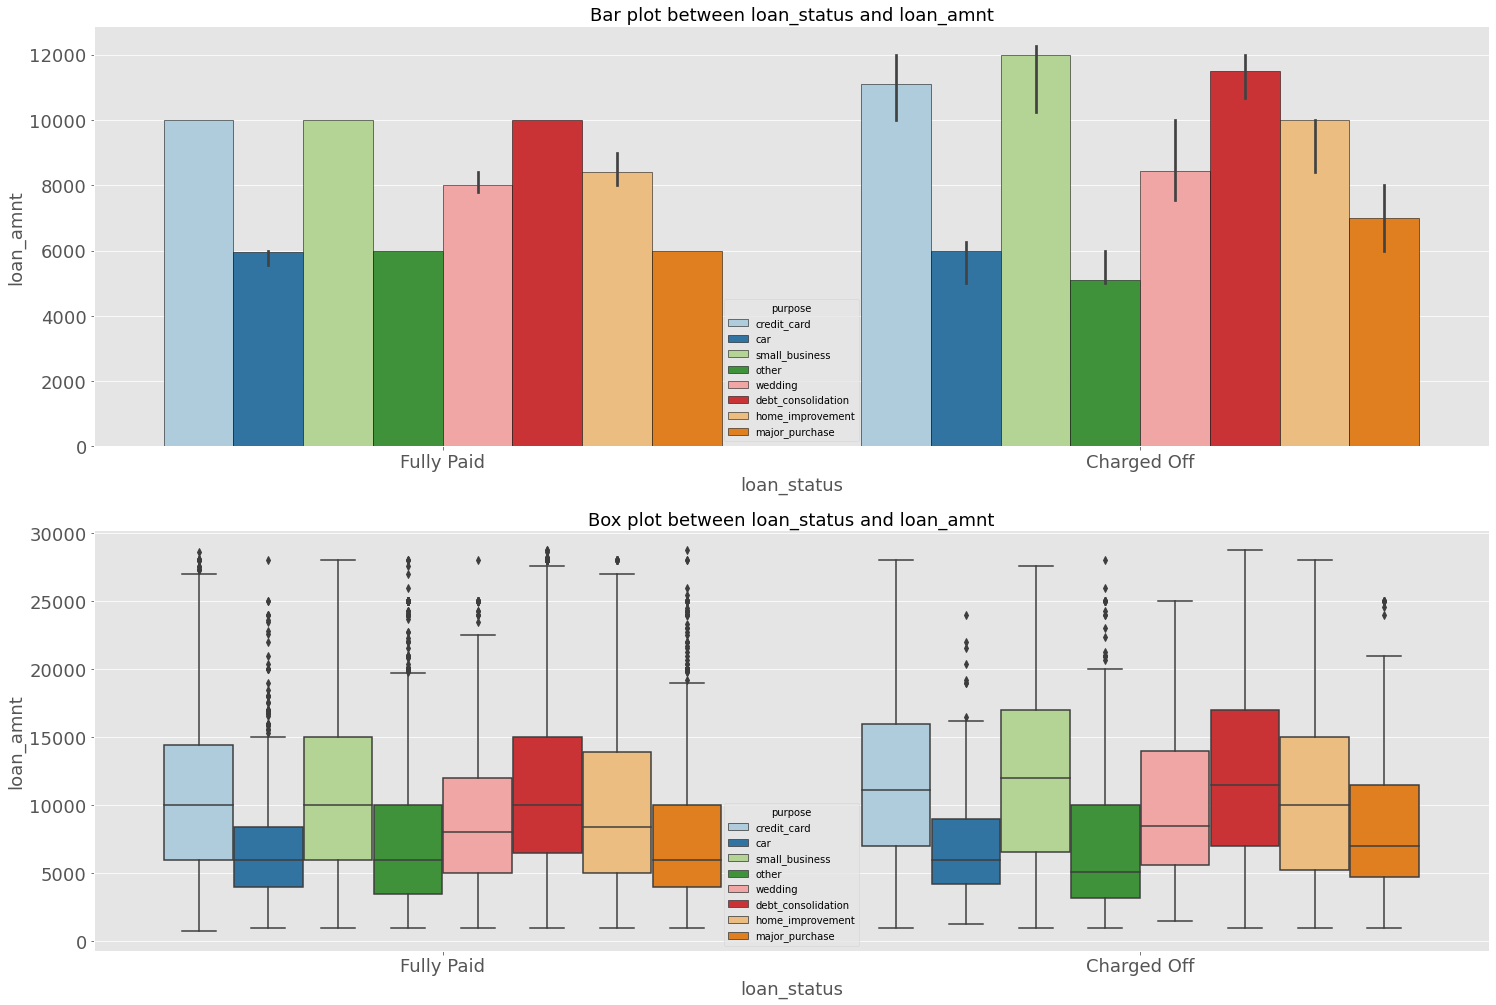

In [242]:
cat = "loan_status"
cont = "loan_amnt"
hue = "purpose"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Observations: 
- The borrowers havea higher probabilty of paying the entire loan amount back if it doesnt exceed 10 grand for <i> Small business, debt consildation or credit card payments</i>


## Loan status vs revol_util(%) with hue as TERM

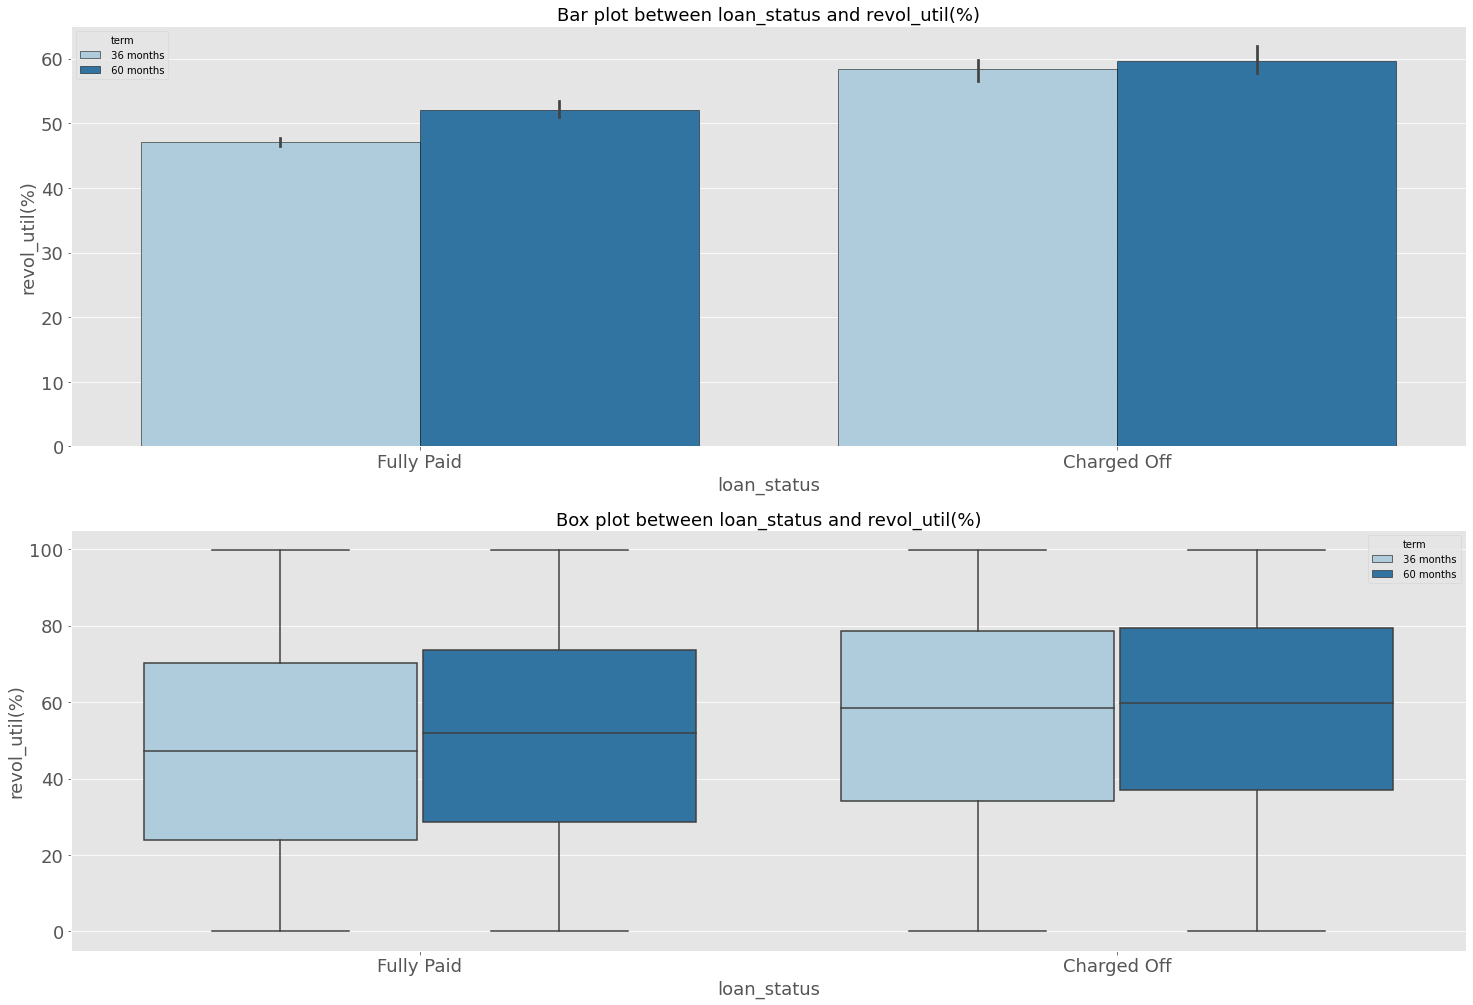

In [243]:
cat = "loan_status"
cont = "revol_util(%)"
hue = "term"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Observations:
- We can infe that hihger is the revol_utlization higher are the chaces that the borrower will default

## Loan status vs revol_util(%) with hue as VERIFICATION_STATUS

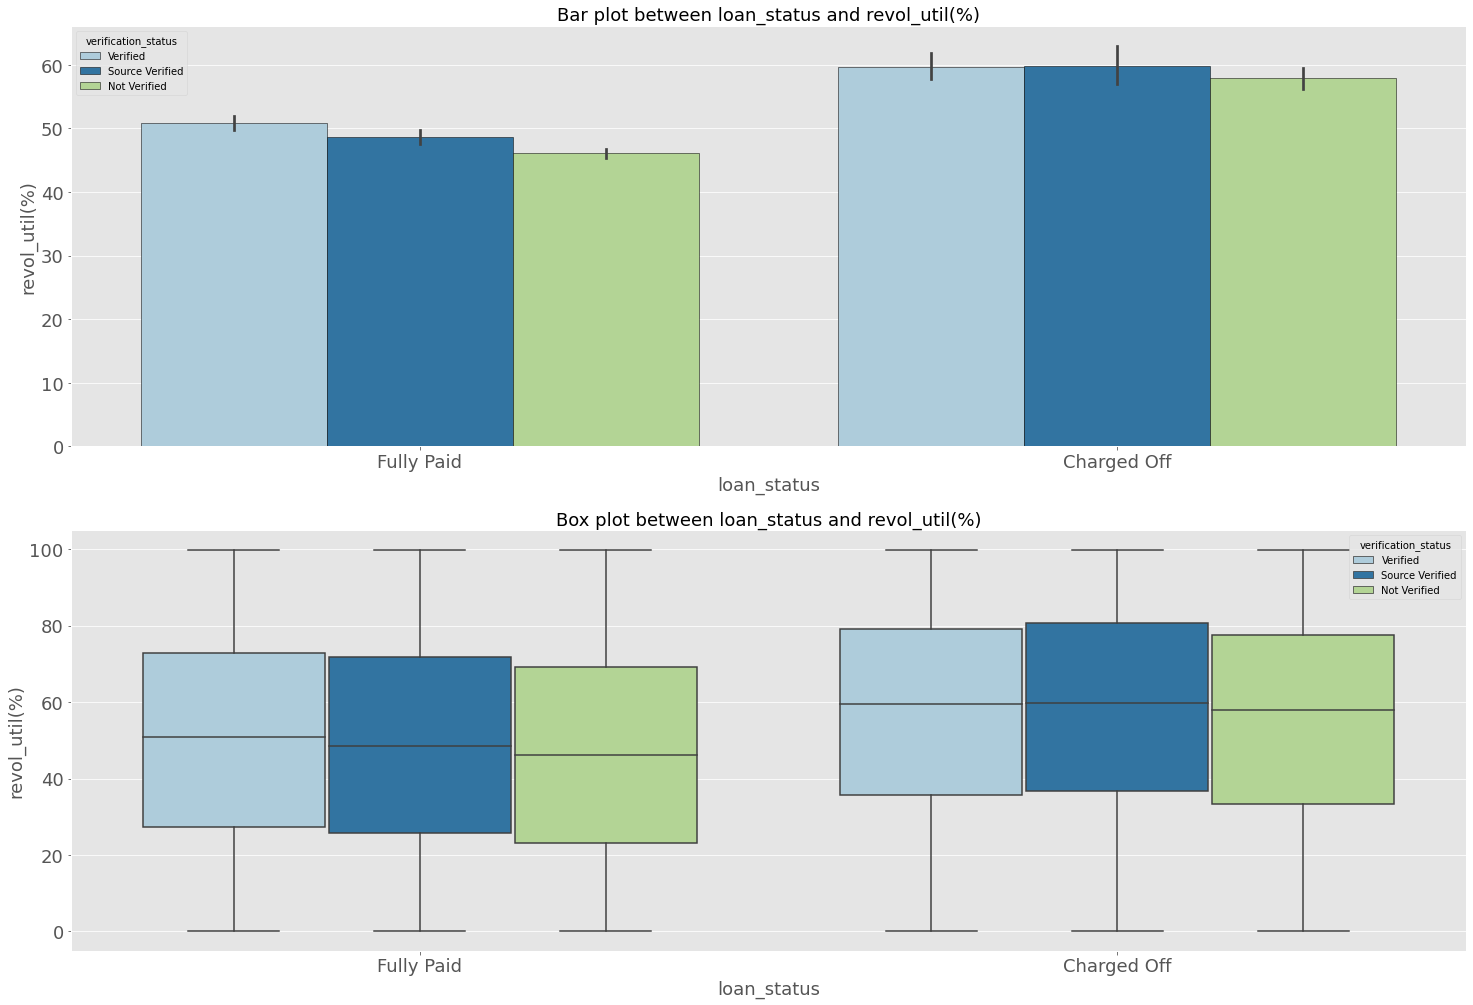

In [244]:
cat = "loan_status"
cont = "revol_util(%)"
hue = "verification_status"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Observations: 
- The same trend can be observed here like we did in our previous plots

## The next two visualization simply shows that  if the revol_utilzayion rate is well below 50% we can expect that the borrower will most likely repay the loan and beyond 50% the borrower will default

## Loan status vs revol_util(%) with hue as HOME_OWNERSHIP

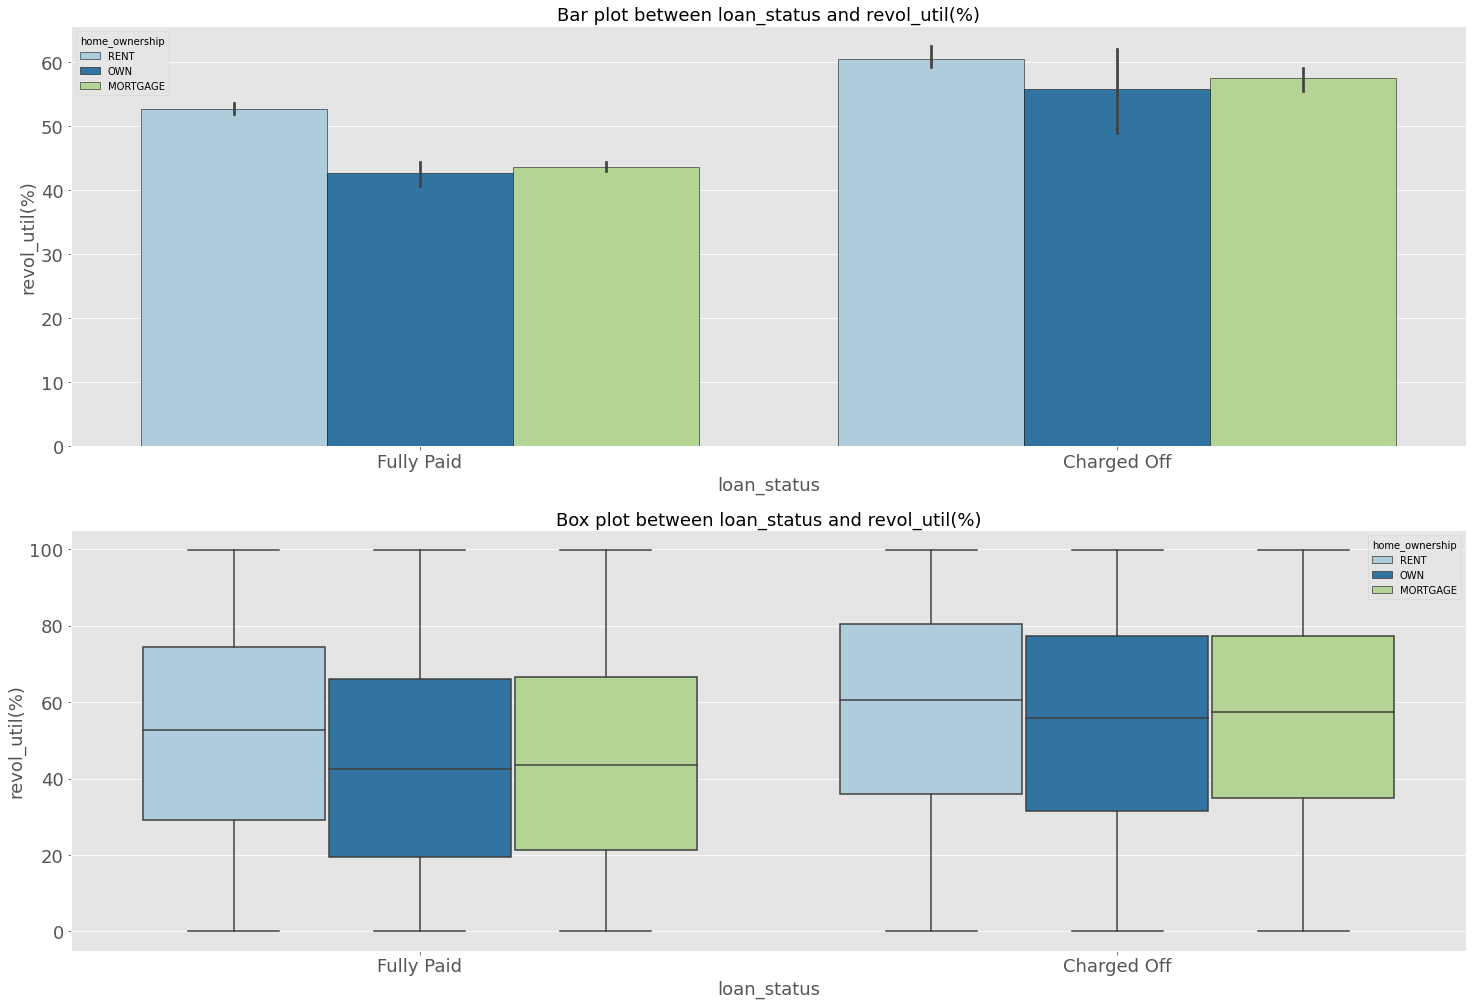

In [245]:
cat = "loan_status"
cont = "revol_util(%)"
hue = "home_ownership"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Loan status vs revol_util(%) with hue as INCOME_GROUPS

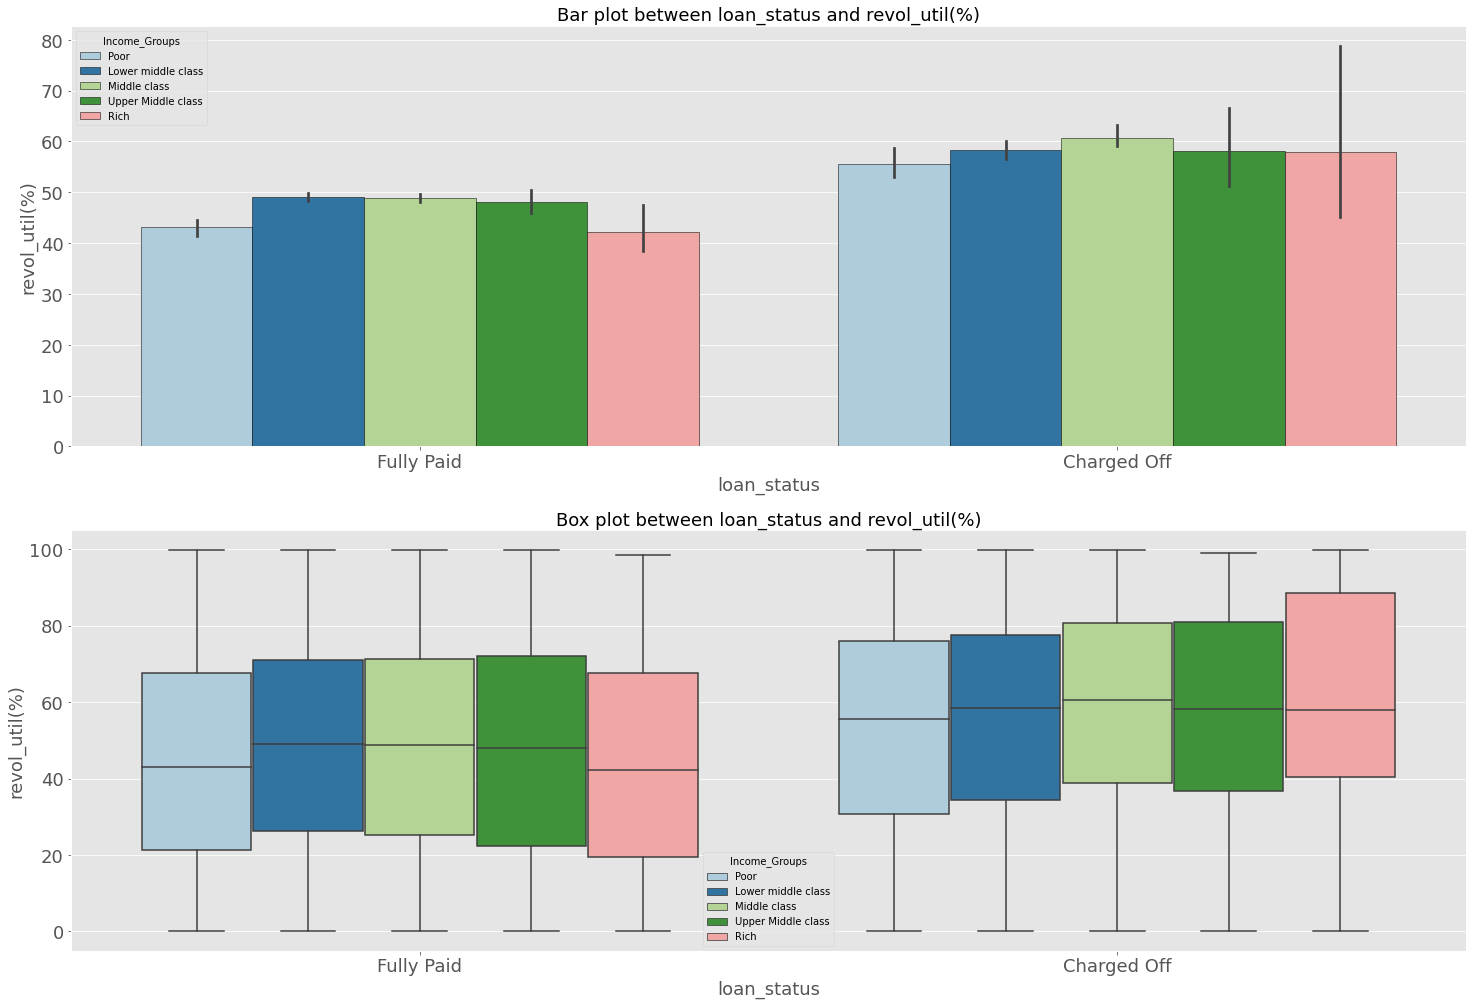

In [246]:
cat = "loan_status"
cont = "revol_util(%)"
hue = "Income_Groups"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Loan status vs Interest rates with hue as TERM

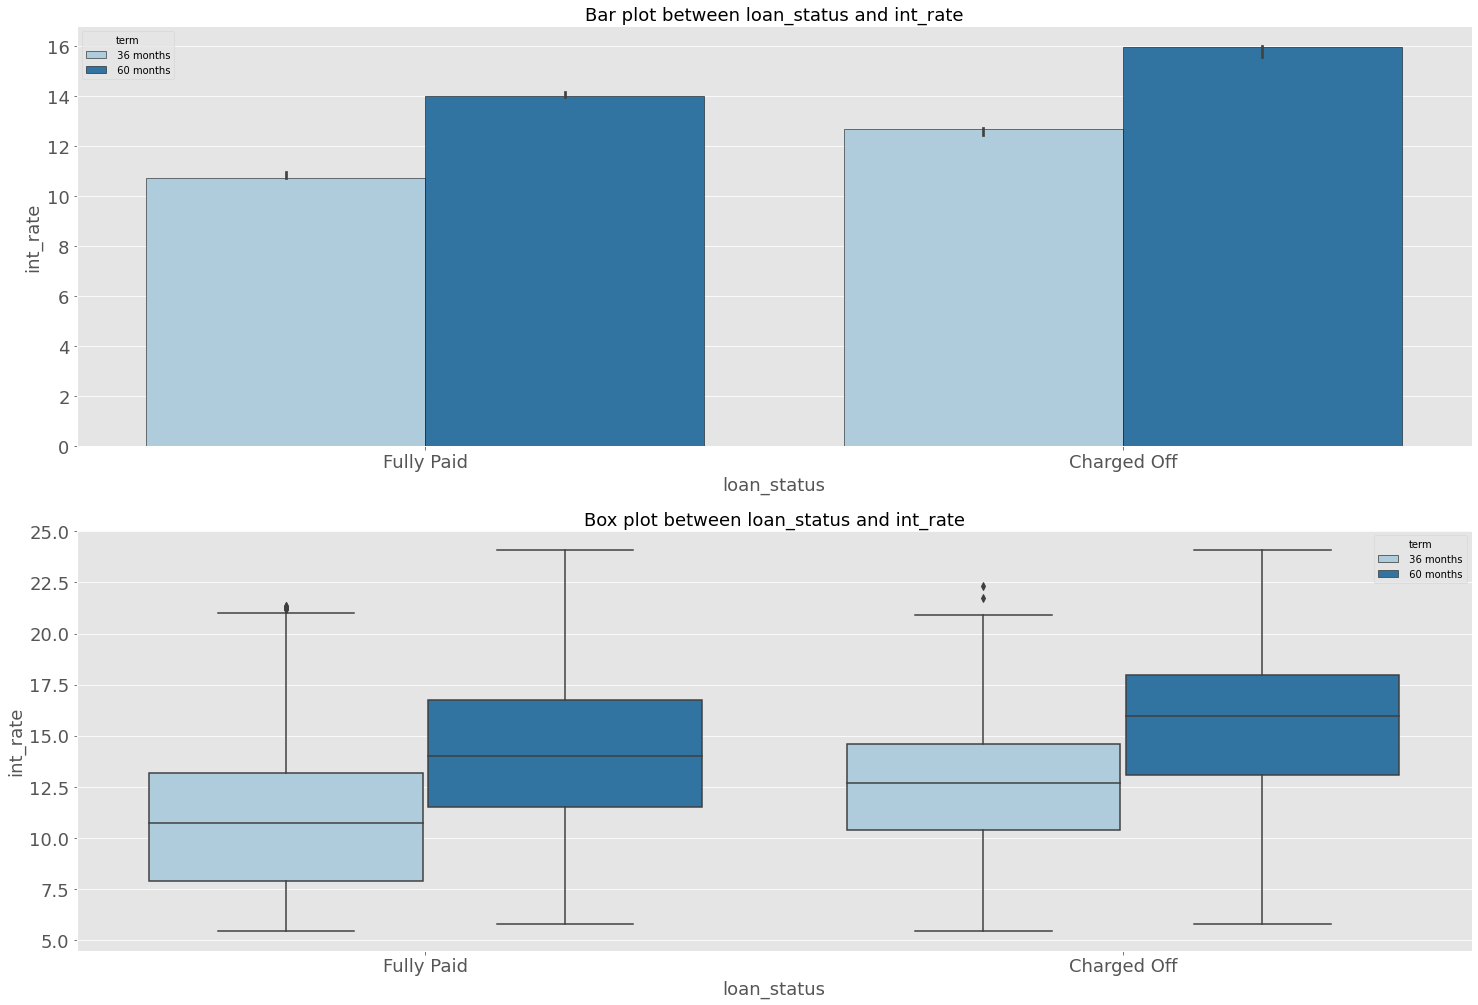

In [247]:
cat = "loan_status"
cont = "int_rate"
hue = "term"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Observations; 
- So far we have seen in our analysis that the sweet spot for interest rate beyond whioch our borrowers tend to default is 12% but here we can see that this is partially true; in the sense that those who have opted for a tenure of 36 months need to cap their interest rates on an average upto around 12%
- In case of 60 months a relaxation of 2% can be given taking the threshold to 14% for 60 months

## Loan status vs Interest rates with hue as HOME_OWNERSHIP

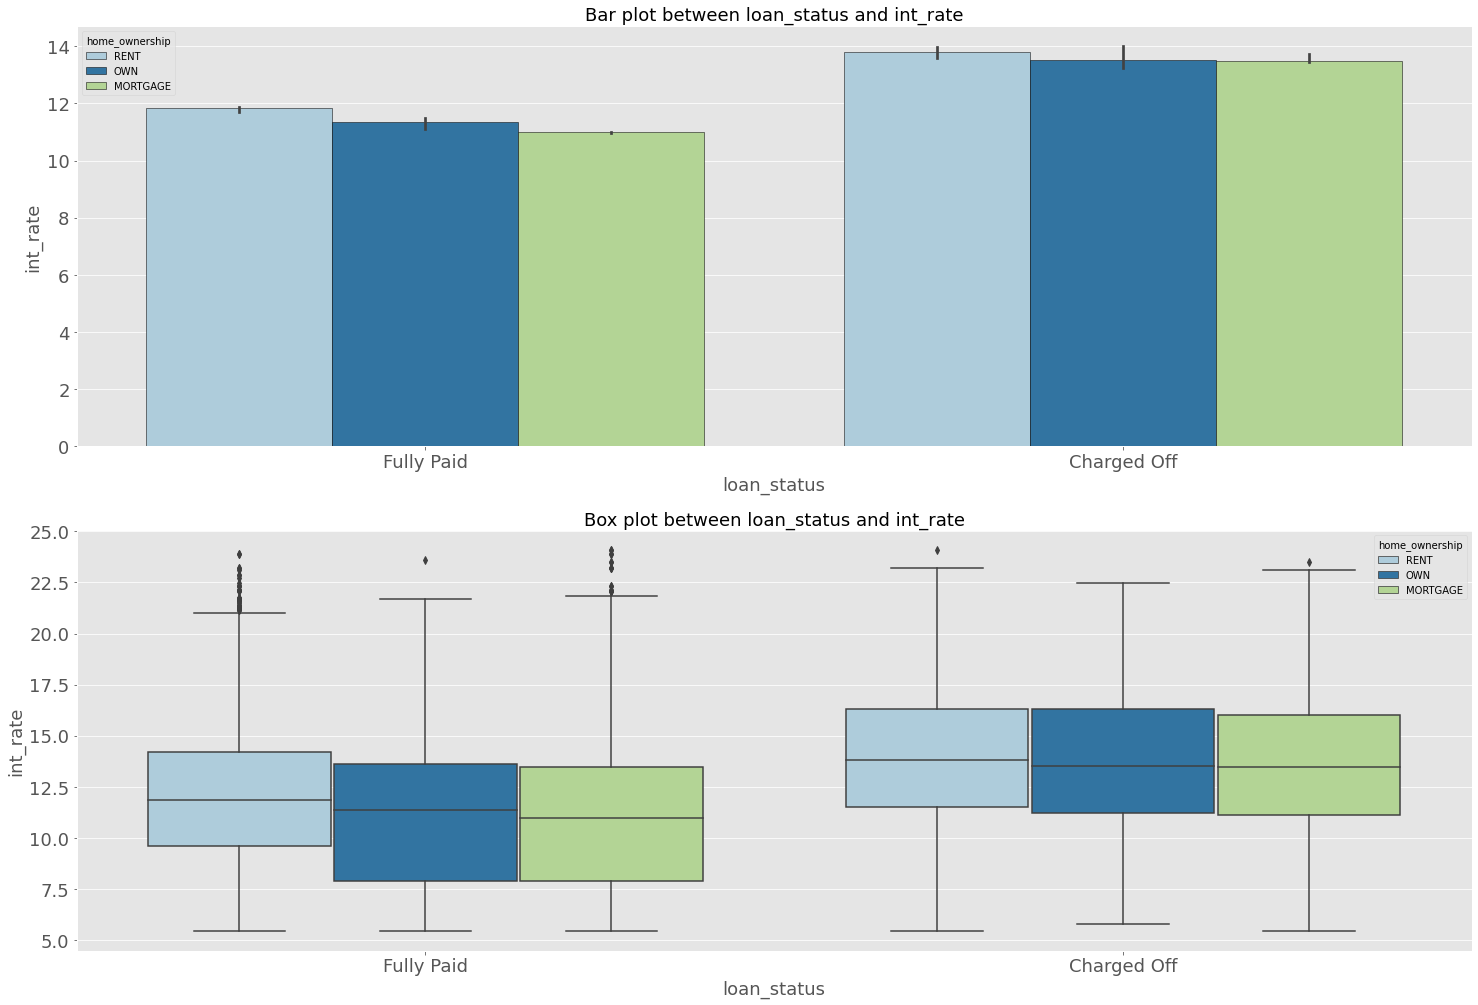

In [248]:
cat = "loan_status"
cont = "int_rate"
hue = "home_ownership"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Observations:
- We can infer that an interest rate above 12% can result in a higher tendency of the b defaulting borrower
- This coupled with higher loan amounts can surely end up with LC having a higher defaulter ratio

## The next two plots confirm our theory that 12% is the sweet spot and if a borrower surpasses this threshold they are more likely to default

## Loan status vs Interest rates with hue as PURPOSE

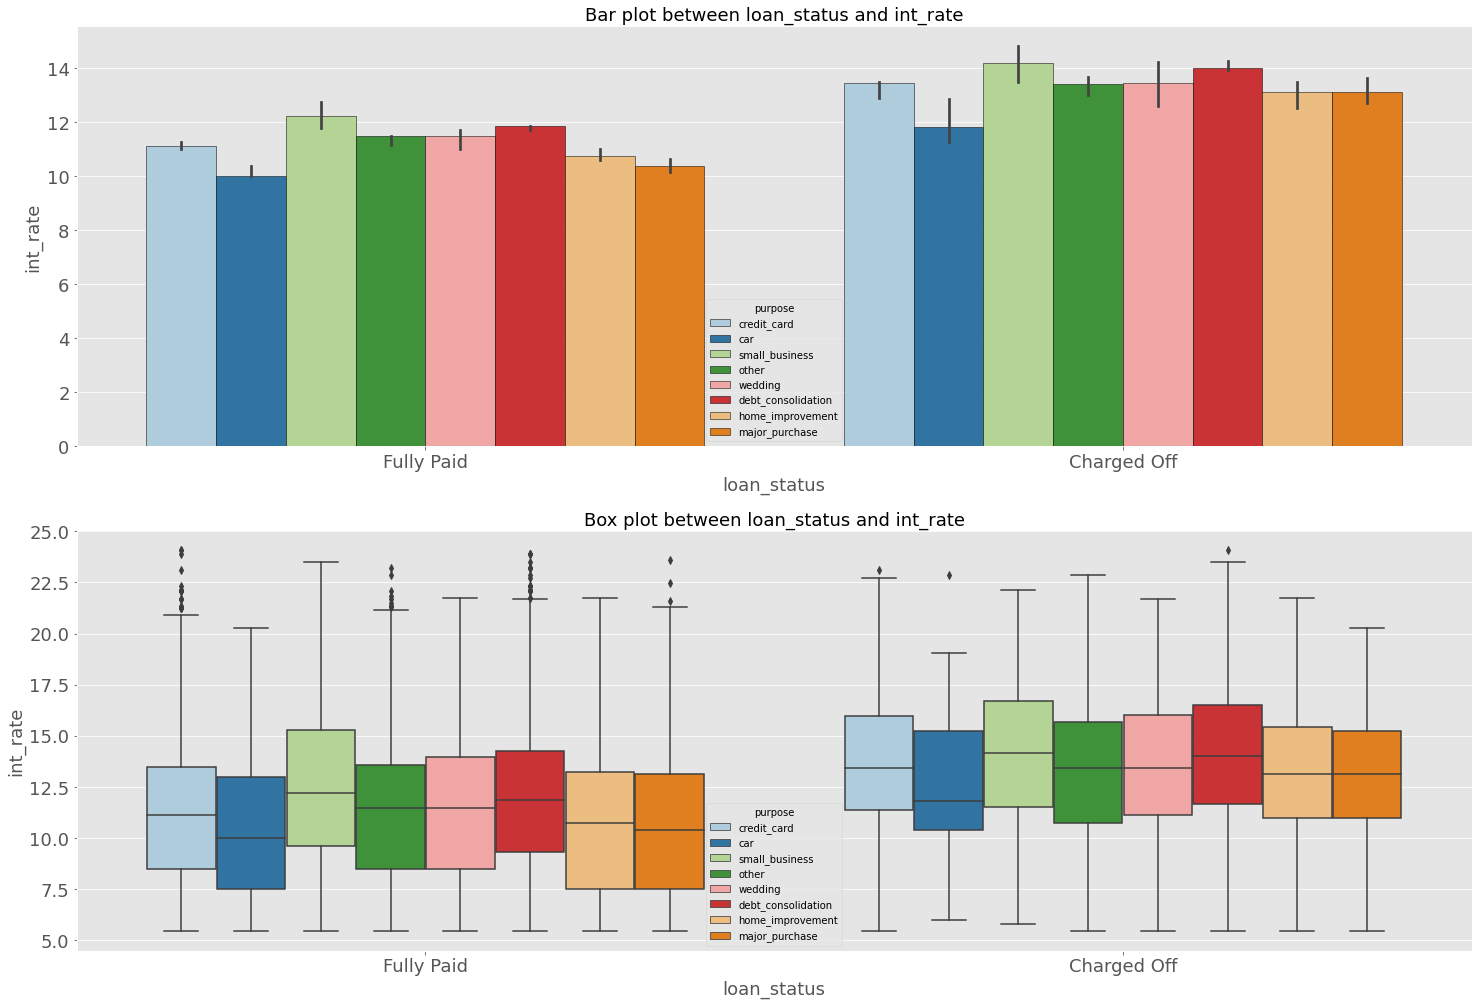

In [249]:
cat = "loan_status"
cont = "int_rate"
hue = "purpose"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Loan status vs Interest rates with hue as INCOME_GROUPS

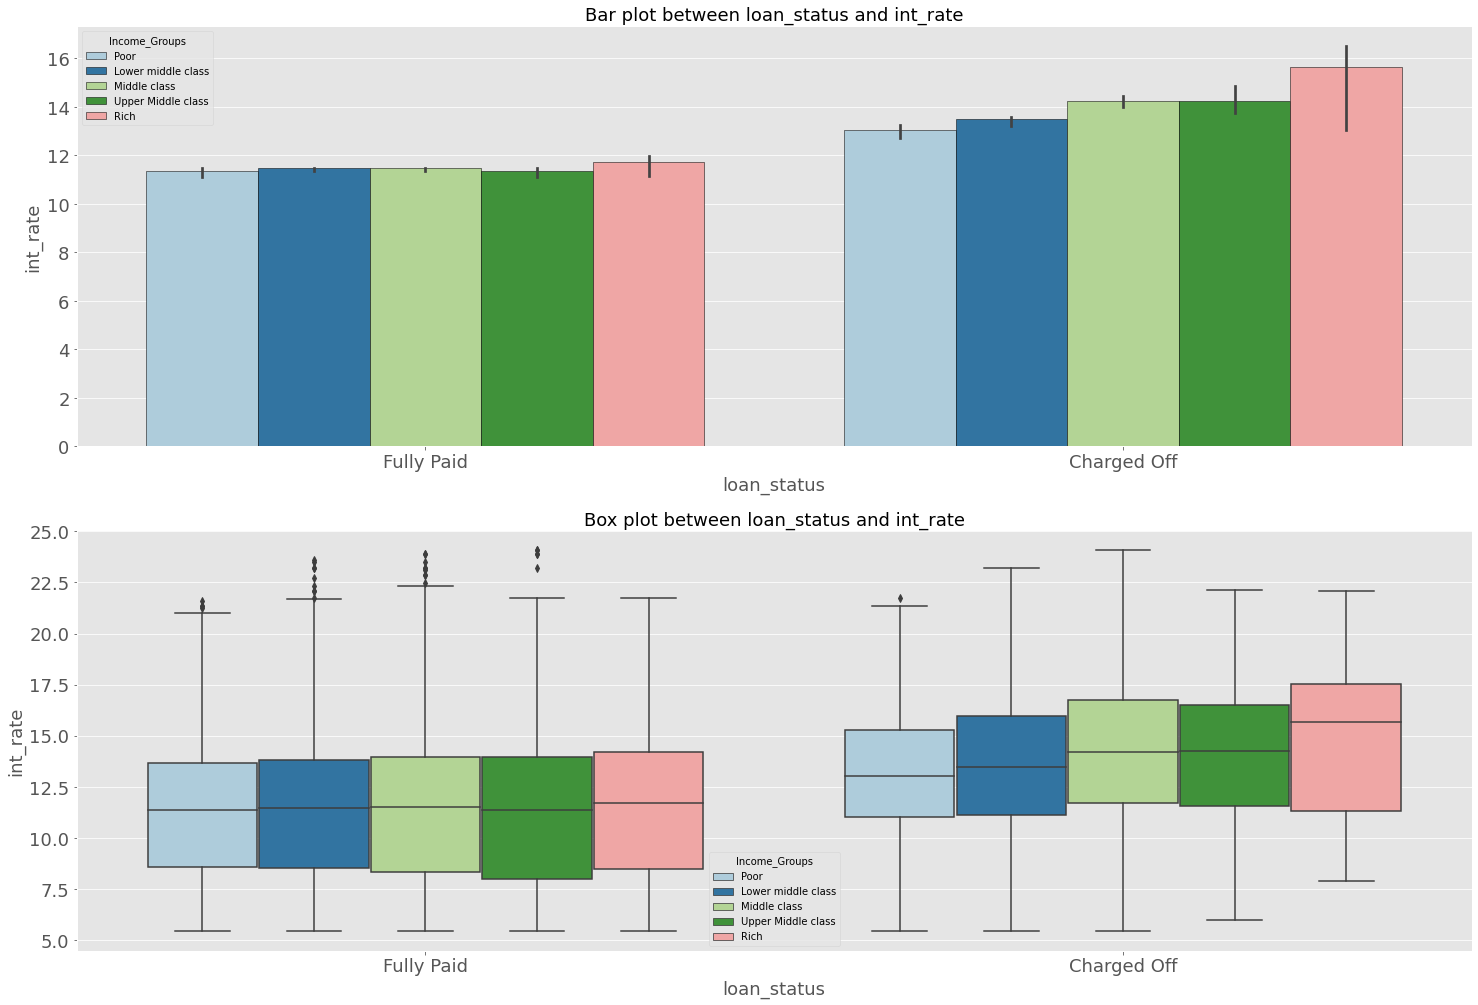

In [250]:
cat = "loan_status"
cont = "int_rate"
hue = "Income_Groups"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Loan status vs pub_rec_bankruptcies with hue as TERM

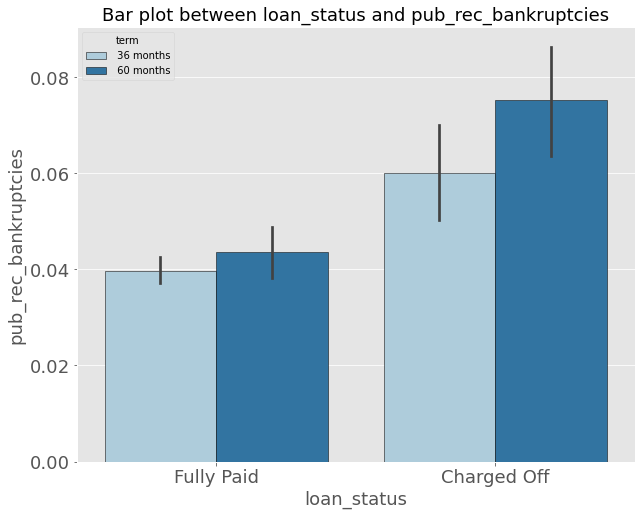

In [251]:
cat = "loan_status"
cont = "pub_rec_bankruptcies"
hue = "term"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              hues = hue, font_size = 18)



## Observations:
- This plot clears our doubt that for both 36 months and 60 months; the end result would be the same i.e if they have  history of bankruptcy higher the risk of them defaulting on loans approved by LC

### The next three plots shows us how pub_rec_bankrupt relates with other variables and from these plots we can infer that if a borrower has a history of bankruptcy they are more likey to be charged off irrespective of hues(home_ownership, purpose or Income Groups) 

### LC must shift its attention to observing the past financial history of borrowers

## Loan status vs pub_rec_bankruptcies with hue as HOME_OWNERSHIP

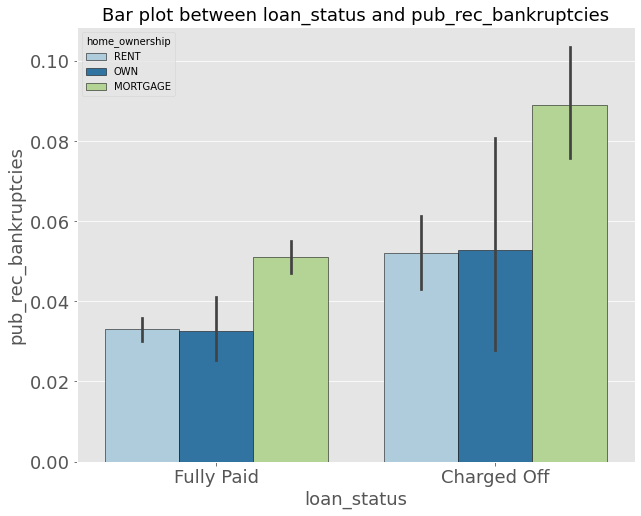

In [252]:
cat = "loan_status"
cont = "pub_rec_bankruptcies"
hue = "home_ownership"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              hues = hue, font_size = 18)



## Loan status vs pub_rec_bankruptcies with hue as PURPOSE

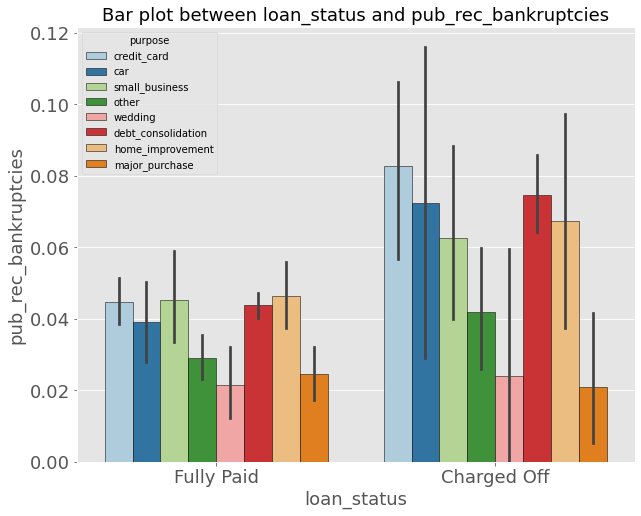

In [253]:
cat = "loan_status"
cont = "pub_rec_bankruptcies"
hue = "purpose"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              hues = hue, font_size = 18)



## Loan status vs pub_rec_bankruptcies with hue as INCOME_GROUPS

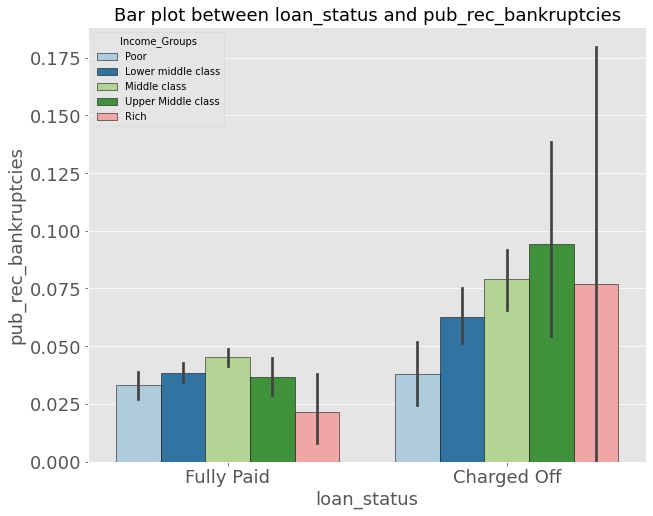

In [254]:
cat = "loan_status"
cont = "pub_rec_bankruptcies"
hue = "Income_Groups"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              hues = hue, font_size = 18)



## Purpose vs loan amount with hue as TERM

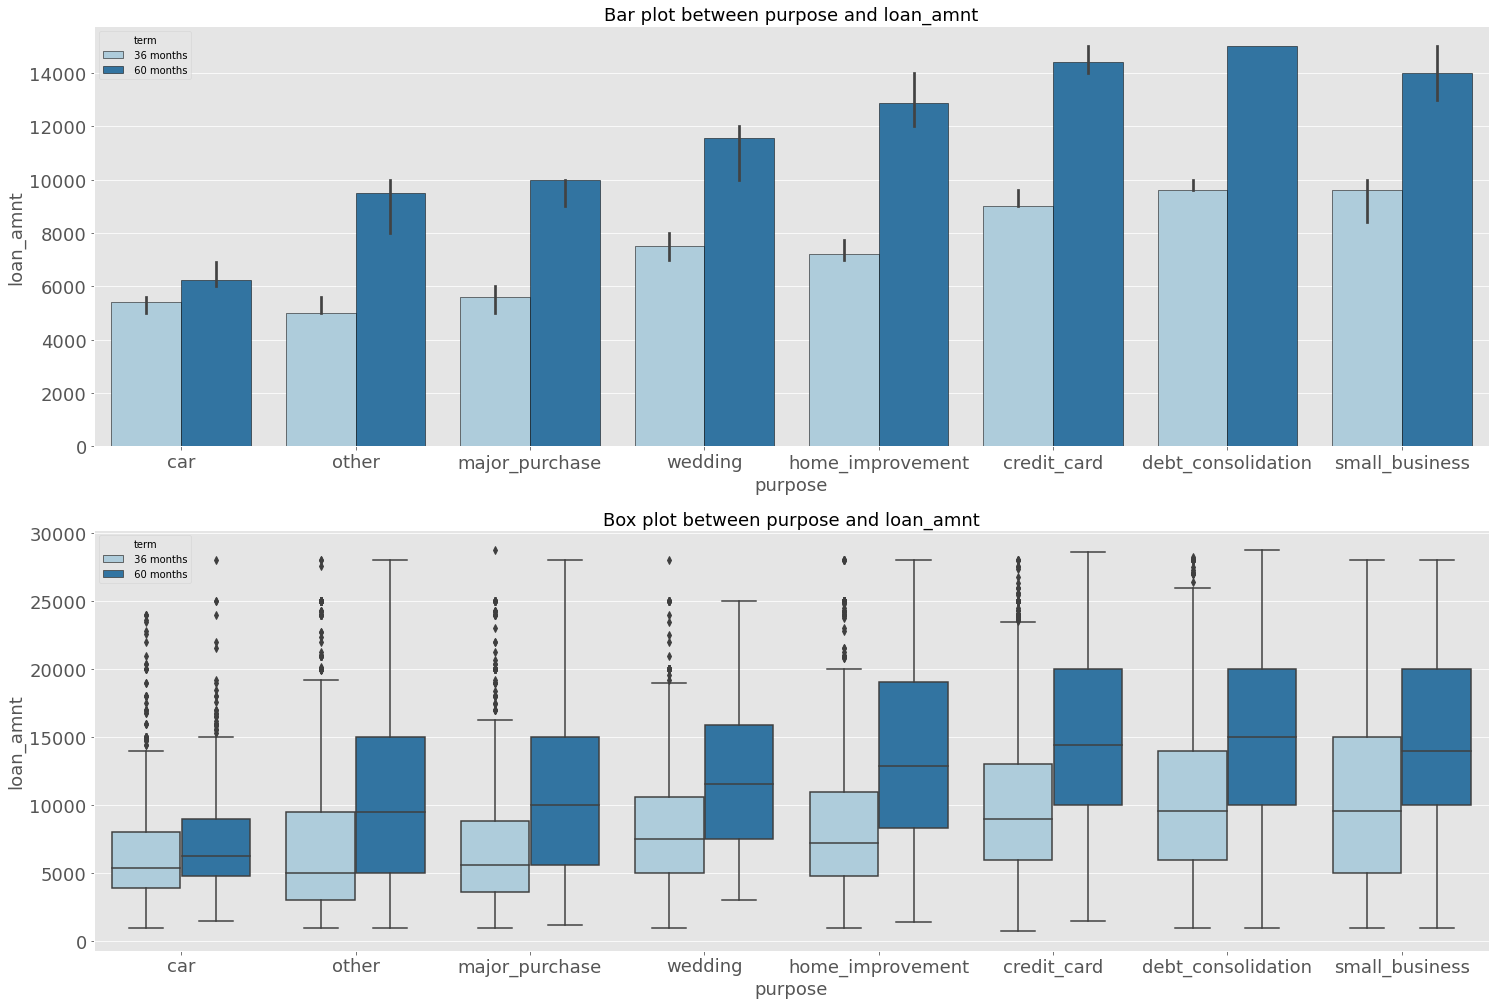

In [255]:
cat = "purpose"
cont = "loan_amnt"
hue = "term"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Observations;
- No significant observations

## Purpose vs loan amount with hue as HOME_OWNERSHIP

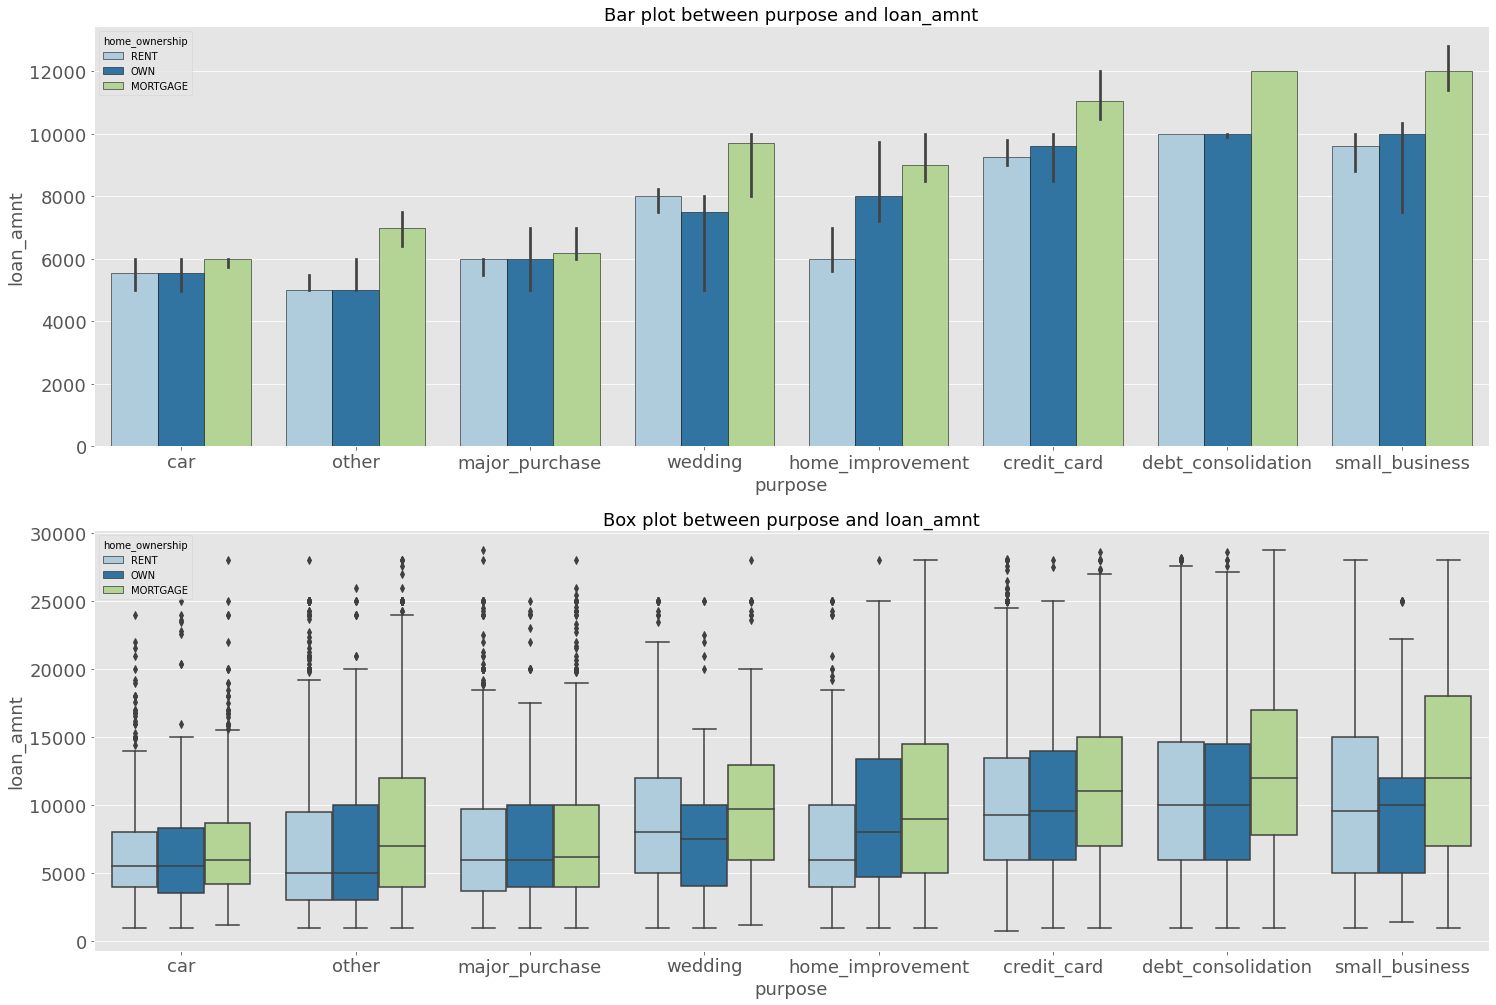

In [256]:
cat = "purpose"
cont = "loan_amnt"
hue = "home_ownership"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Observations: 
- As it is bovious from this plot that the borrowers hwo have mortgaged their house have borrowed more money across various categories of <i>purpose</i>
- 10 grand is the threshold for borrowers with their house mortgaged and when they break this threshold they tend to default more
- We can see this trend as deduced in our previous analysis with the three major purposes being <i>credit card, debt consolidation and small business</i>

## Purpose vs loan amount with hue as VERIFICATION_STATUS

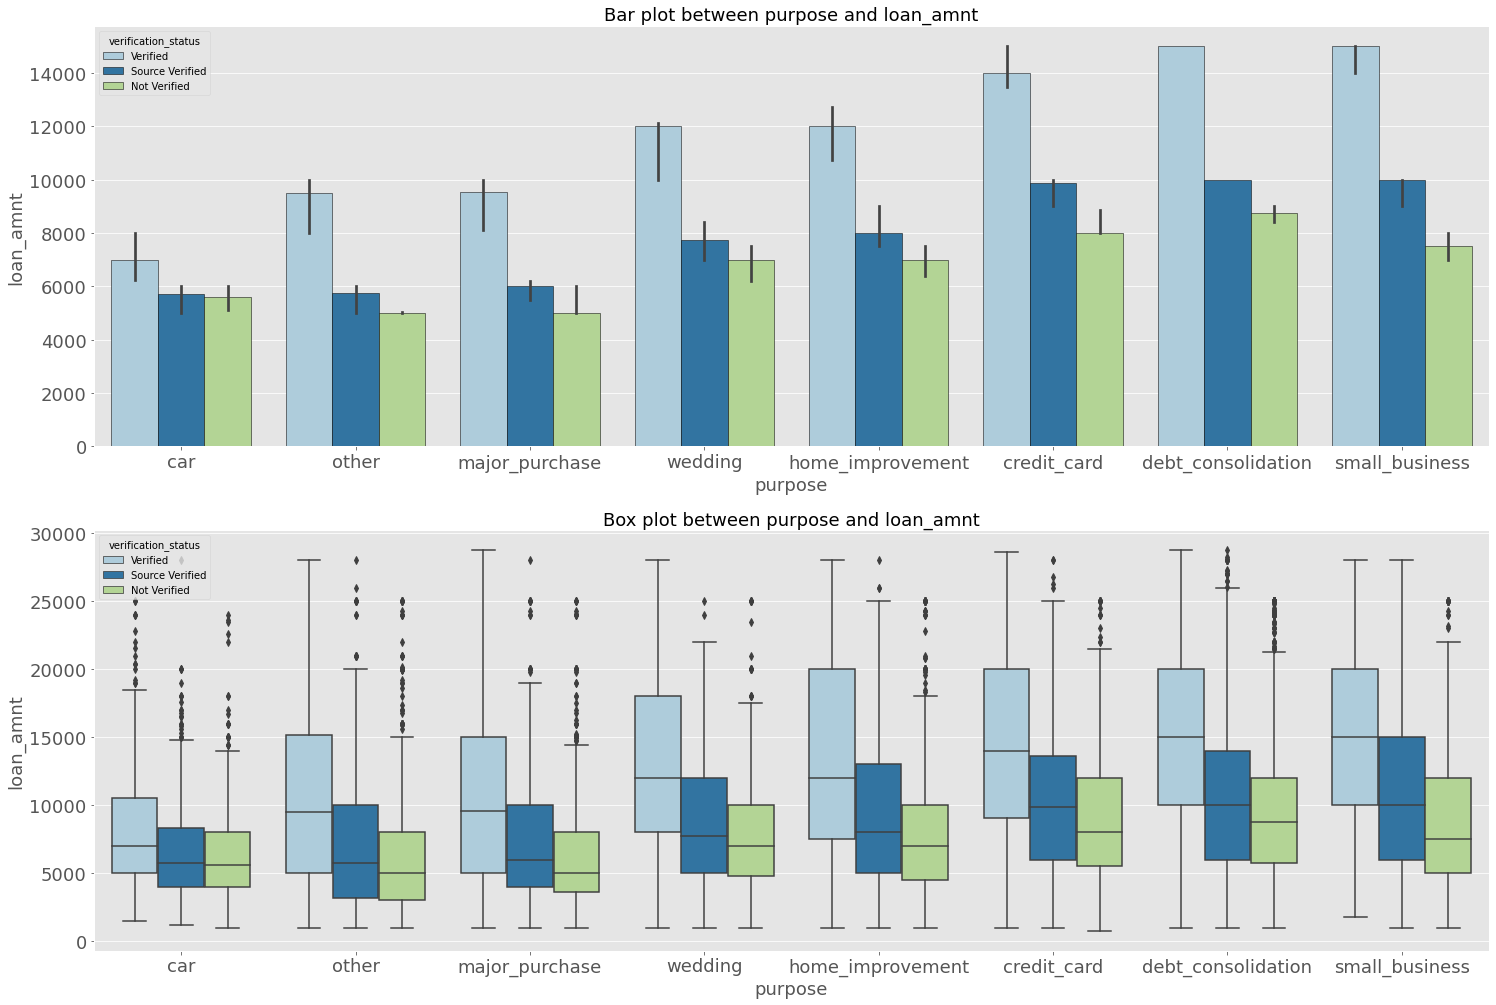

In [257]:
cat = "purpose"
cont = "loan_amnt"
hue = "verification_status"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Observations: 
- The same trend is followed by borrowers who have their income verified, they tend to take higher loans with worse grades and are more at risk to default

## Purpose vs loan amount with hue as LOAN_STATUS

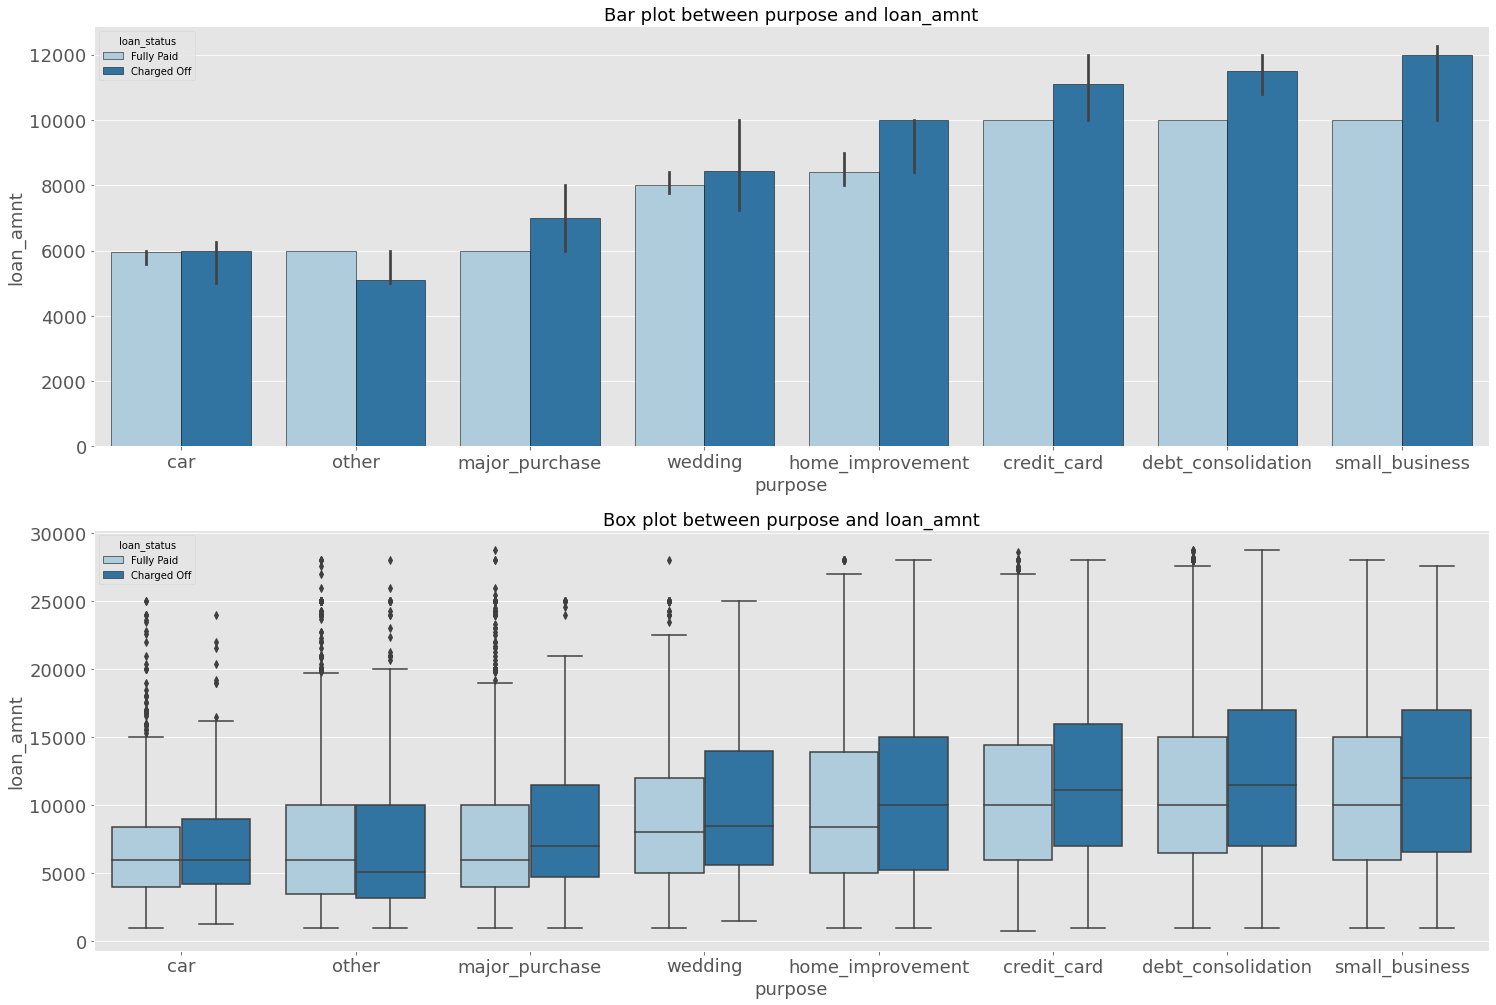

In [258]:
cat = "purpose"
cont = "loan_amnt"
hue = "loan_status"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Observations:
- We can see different threshold in term of loan amount for various categories of purpose, we can see that how much the borrower can repay back and if the loan amount requested by the borrower exeeds that limit, they are more likey to default

## Purpose vs interest rates with hue as TERM

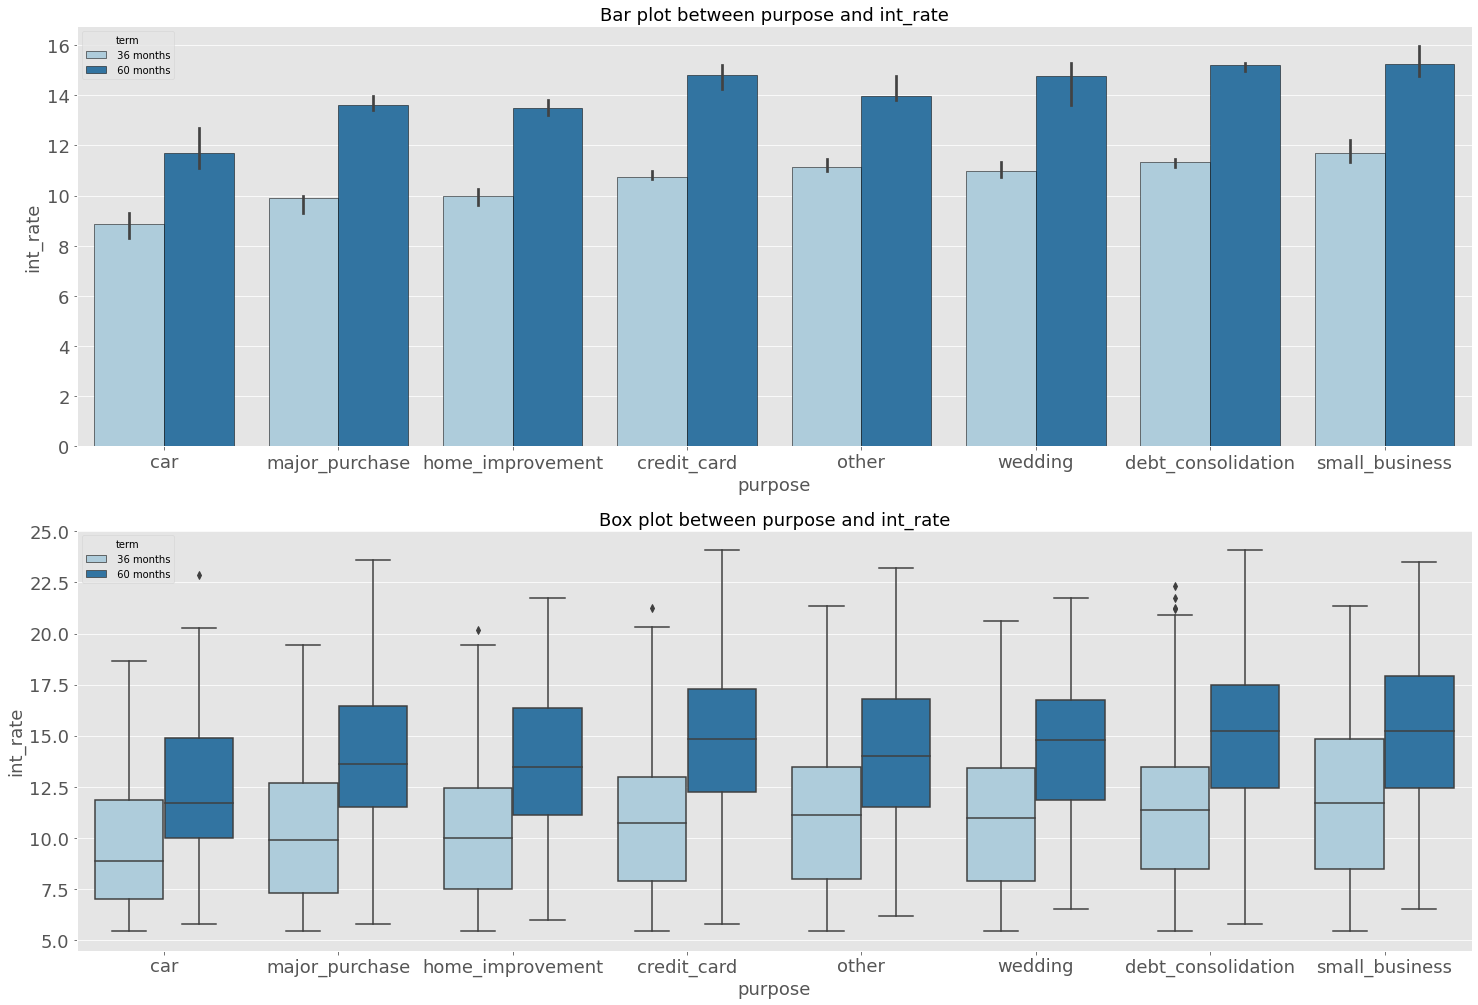

In [259]:
cat = "purpose"
cont = "int_rate"
hue = "term"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Observations: 
- The interest rate is always higher for 60 months across every category of purpose

## The next two plots simply shows us what we already deduced thereby cementing our conclusion, the threshold for interest rate is 12% beyond which we cxan expect the borrowers to default

## Purpose vs interest rates with hue as VERIFICATION_STATUS

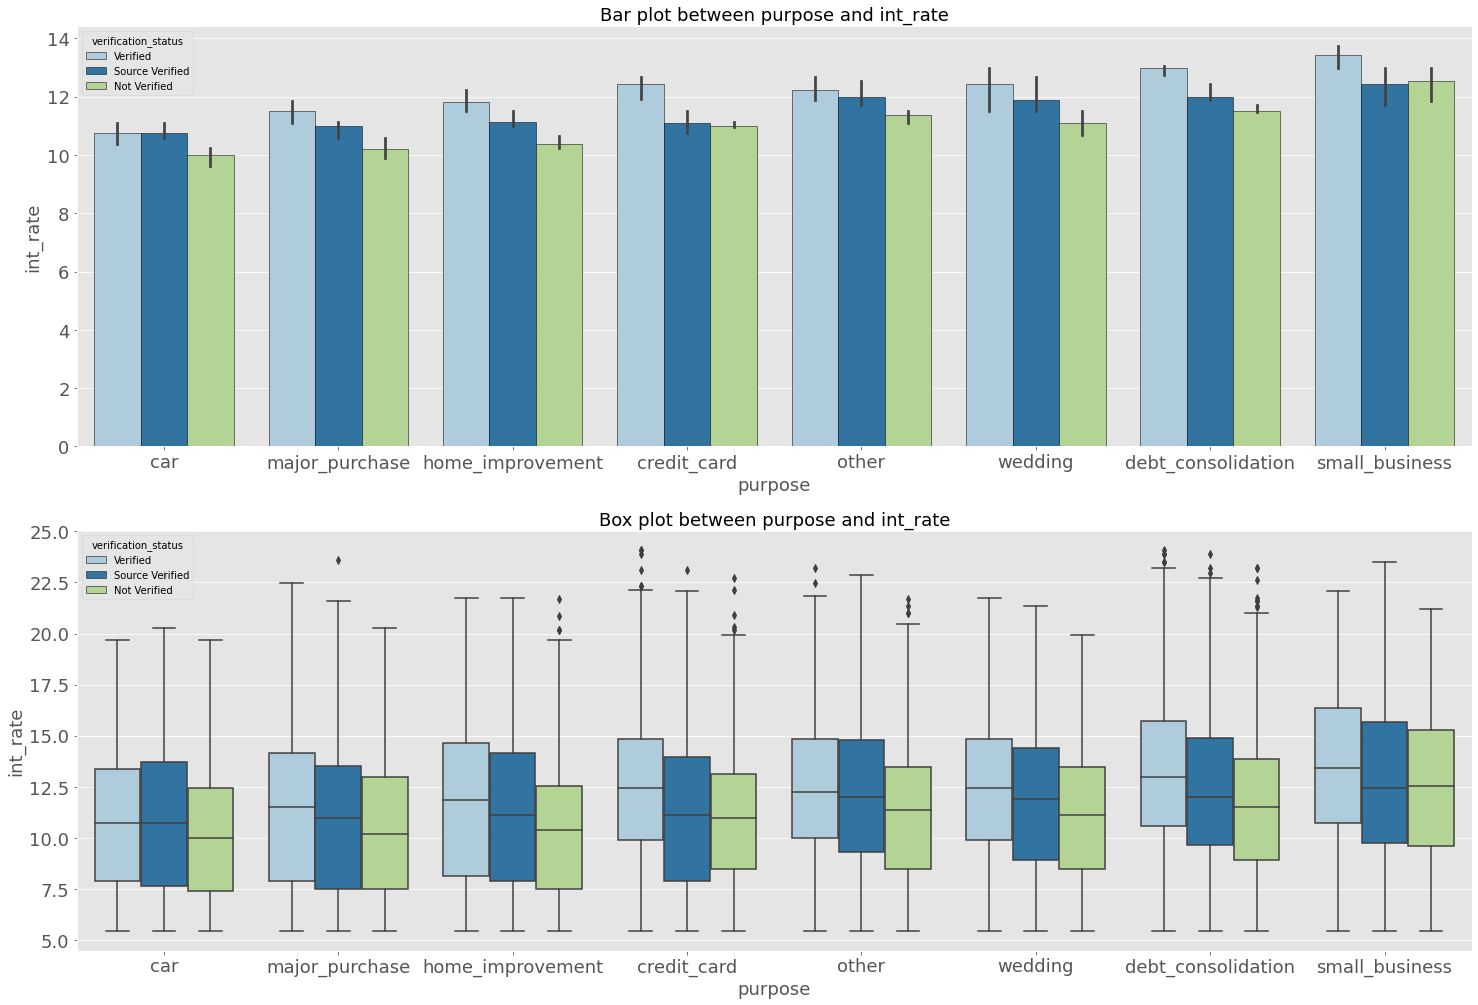

In [260]:
cat = "purpose"
cont = "int_rate"
hue = "verification_status"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Purpose vs interest rates with hue as LOAN_STATUS

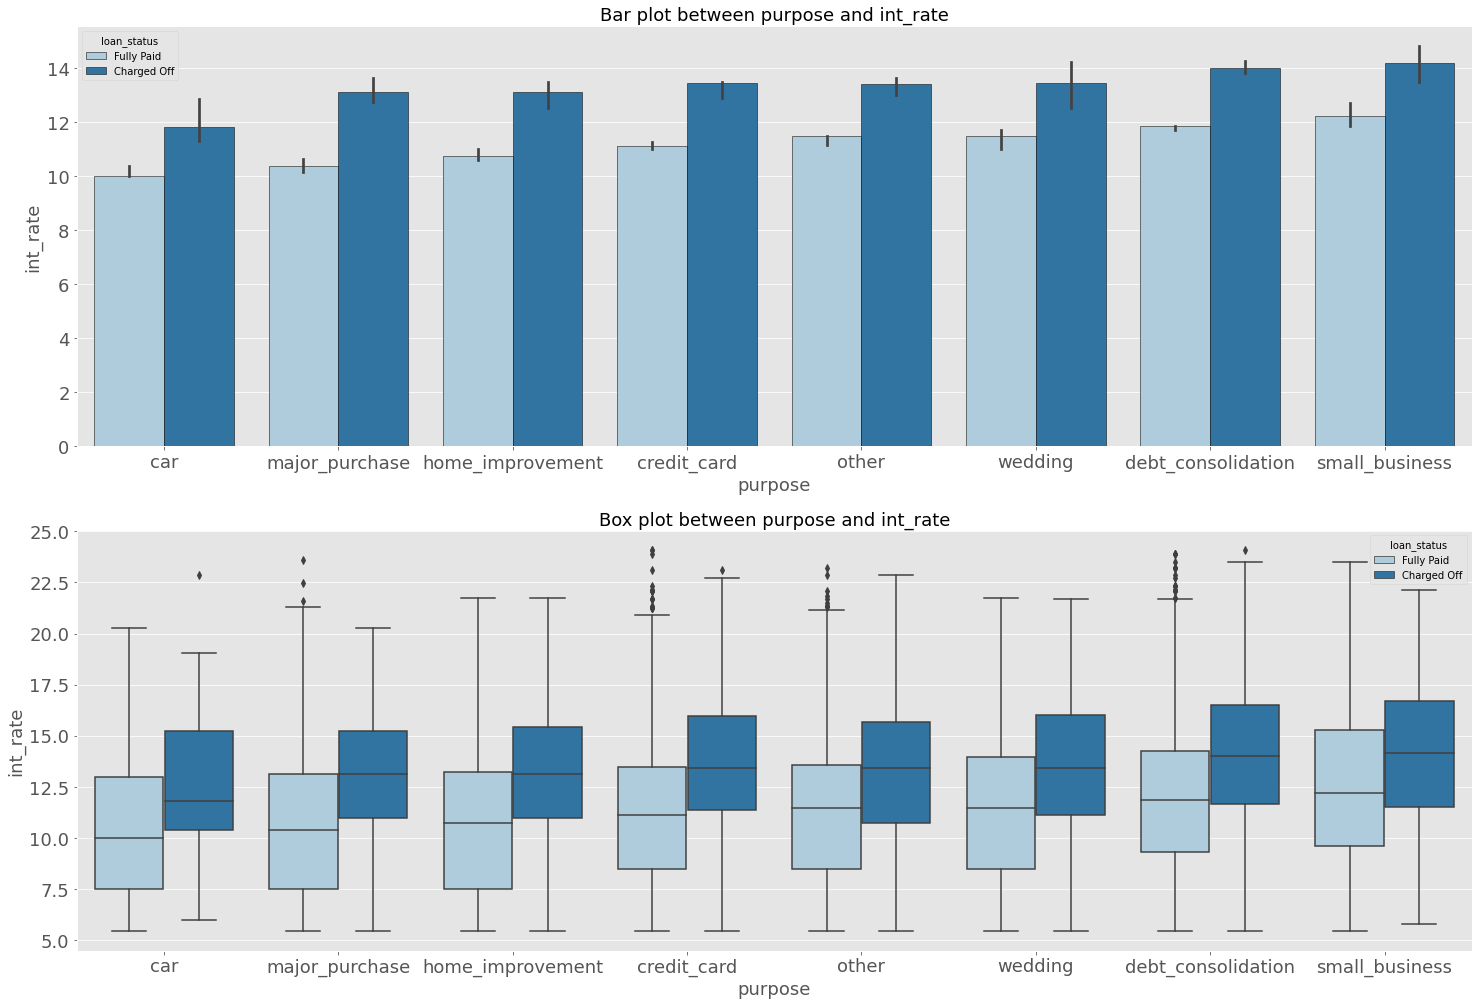

In [261]:
cat = "purpose"
cont = "int_rate"
hue = "loan_status"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Purpose vs interest rates with hue as INCOME_GROUPS

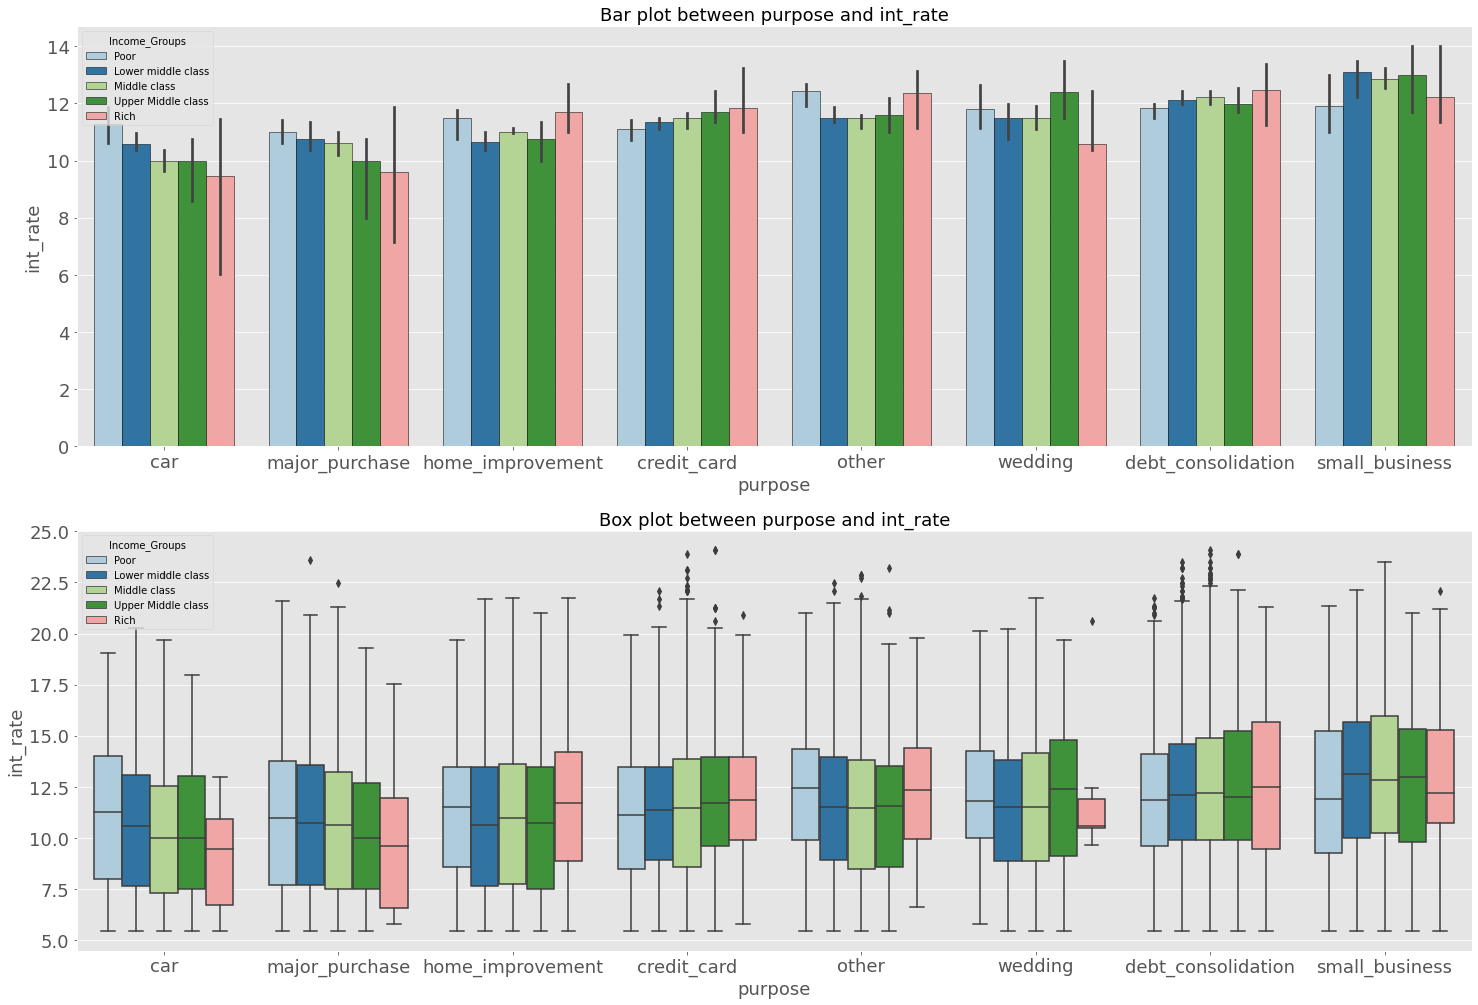

In [262]:
cat = "purpose"
cont = "int_rate"
hue = "Income_Groups"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18, estimator = np.median)

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 17), hues = hue, font_size = 18)

## Observations;
- We can see which income group is more likely to default across each category of <i>purpose</i> i.e borrowers who wre given loan at an interest rate than 12%

## Purpose vs pub_rec_bankruptcies with hue as TERM

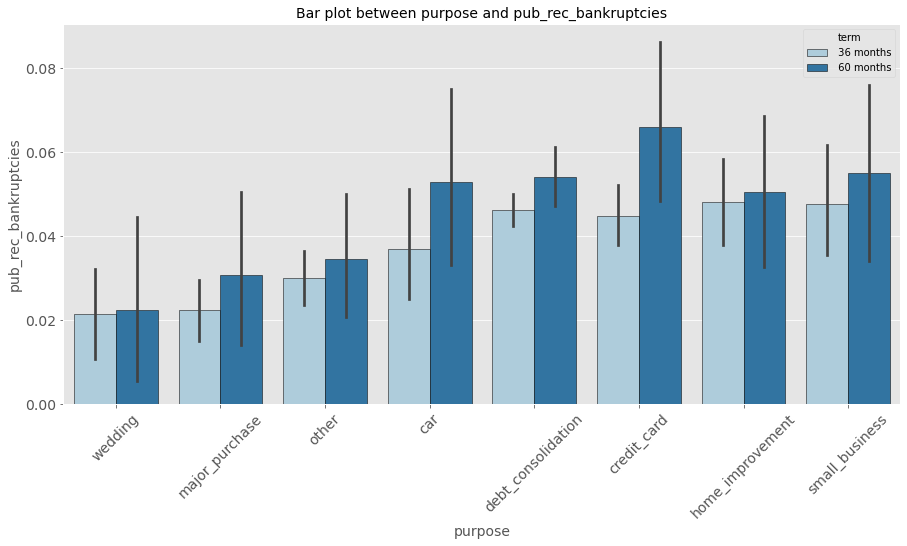

In [263]:
cat = "purpose"
cont = "pub_rec_bankruptcies"
hue = "term"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              hues = hue,  figsize = (15,7), rotation = 45)


## Observations:
- Borrowers who have a history of being bankrupt tend to opt for 60 months

## Purpose vs pub_rec_bankruptcies with hue as LOAN_STATUS

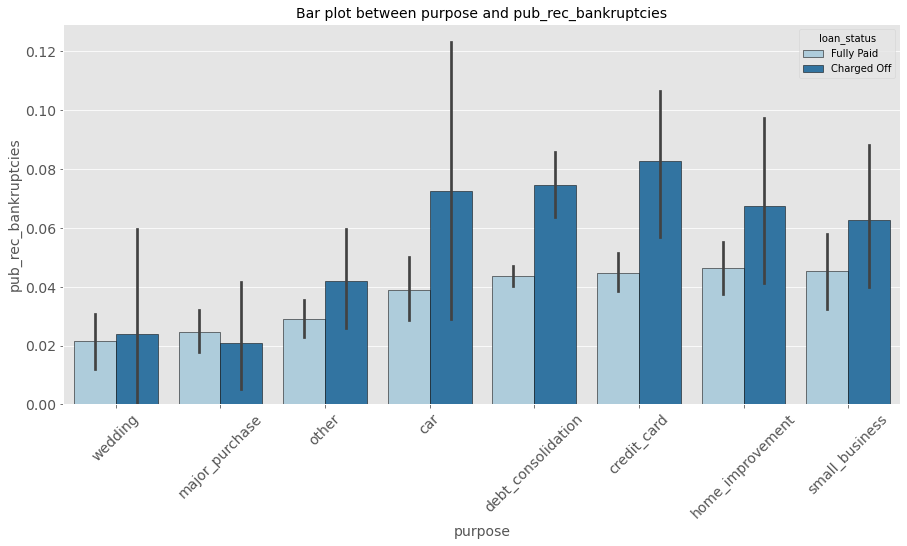

In [264]:
cat = "purpose"
cont = "pub_rec_bankruptcies"
hue = "loan_status"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              hues = hue,  figsize = (15,7), rotation = 45)



## Observations:
- We see the same trend of borrowers defualting more if they have a history of being bankrupt in this plot across different categories of purpose

## Purpose vs pub_rec_bankruptcies with hue as INCOME_GROUPS

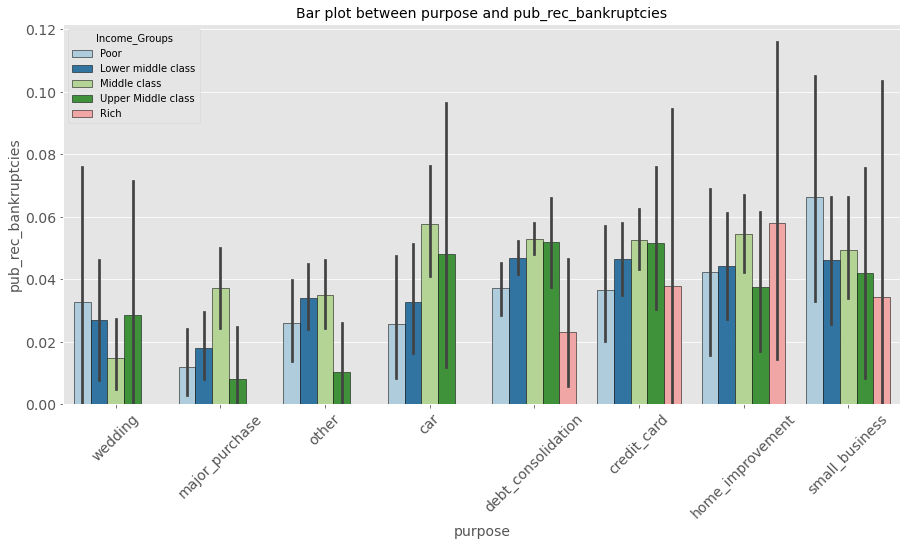

In [265]:
cat = "purpose"
cont = "pub_rec_bankruptcies"
hue = "Income_Groups"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              hues = hue,  figsize = (15,7), rotation = 45)



## Observations:
- We can observe the plots and print a picture of which Income group is more likely to default based on the realtionship of <i>Loan status vs pub_rec_bankruptcies</i>


## Income_Groups vs loan amount with hue as TERM

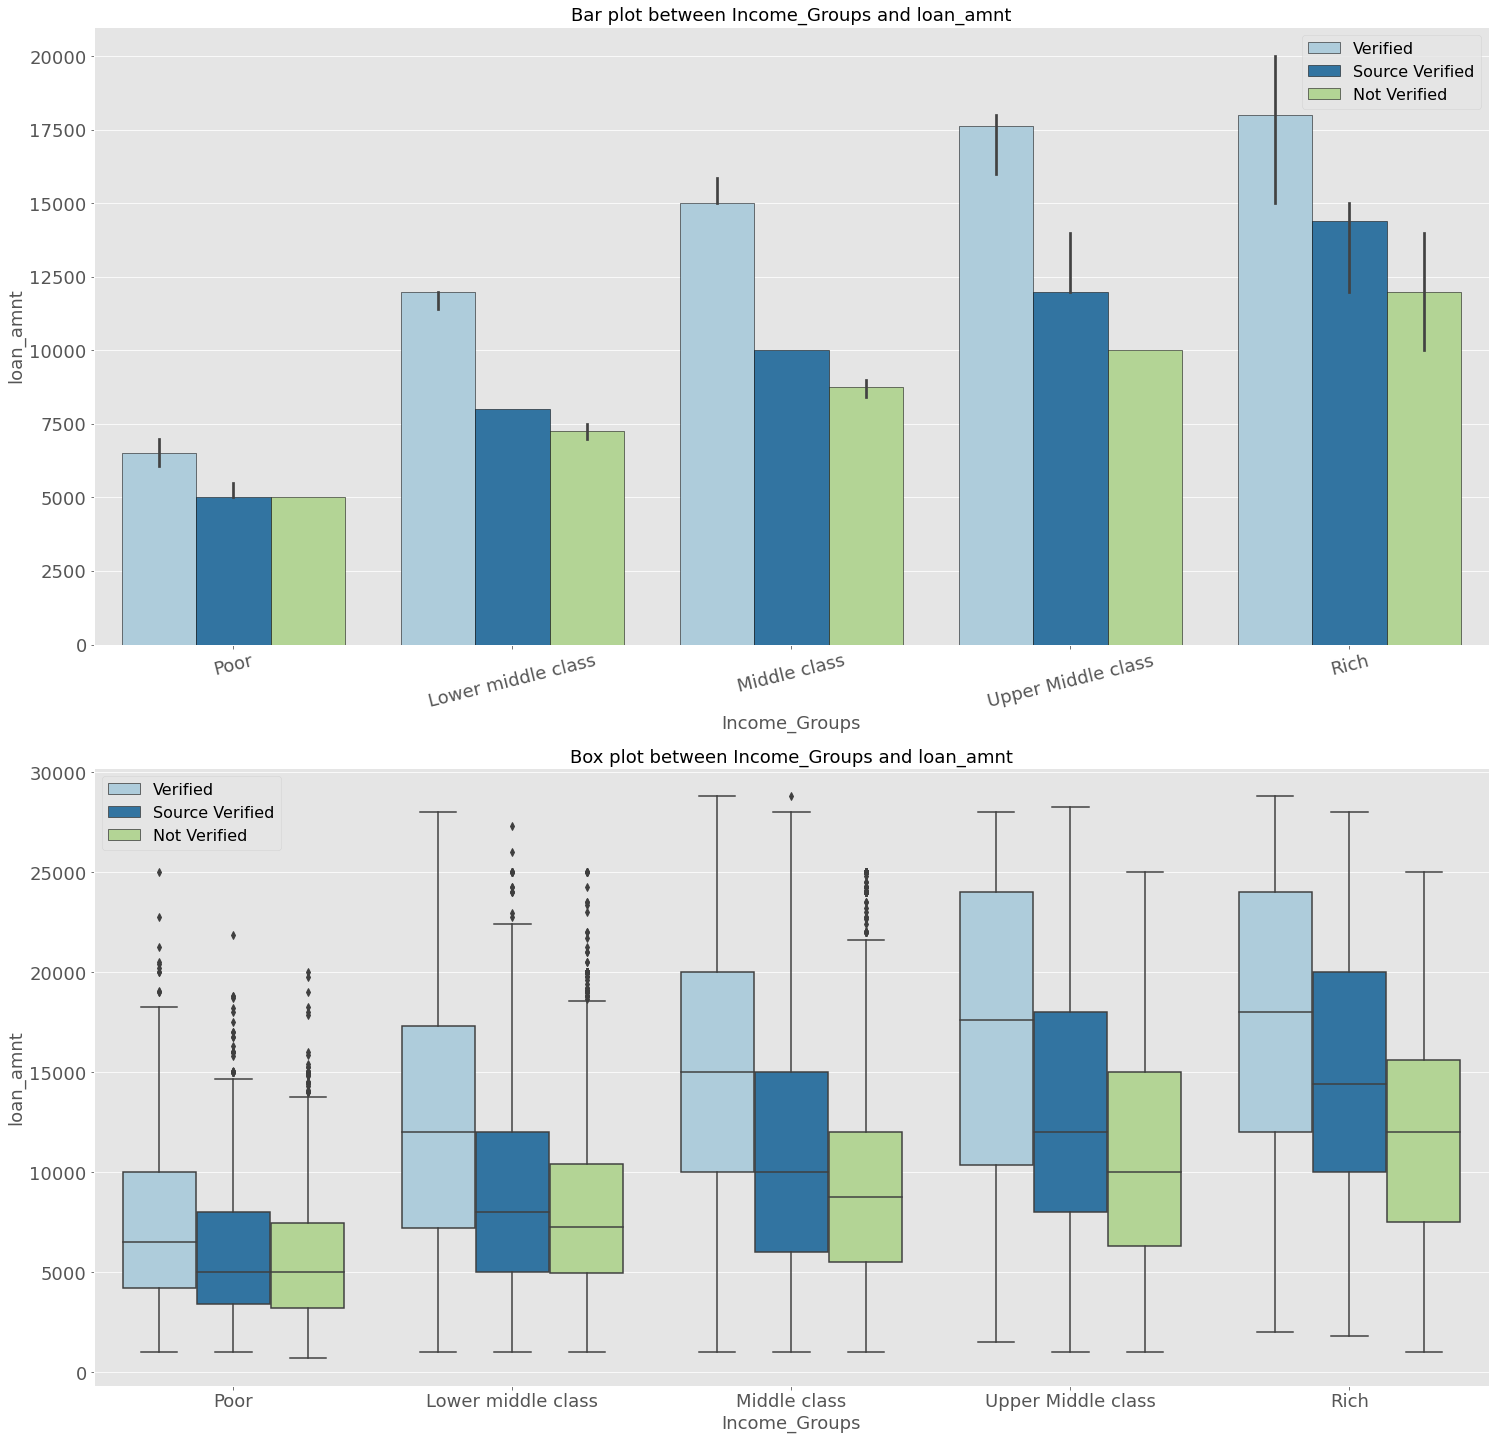

In [266]:
cat = "Income_Groups"
cont = "loan_amnt"
hue = "verification_status"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 2250), hues = hue, font_size = 18, estimator = np.median, rotation = 14)
plt.legend(prop = {"size":16})
plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 25), hues = hue, font_size = 18)
plt.legend(prop = {"size":16})

## Observations:
- The same trend of borrowers belong to <i>Verified</i> category of Verification status tend to take out higher amount of loan irrespective of Income Groups

## Income_Groups vs loan amount with hue as PURPOSE

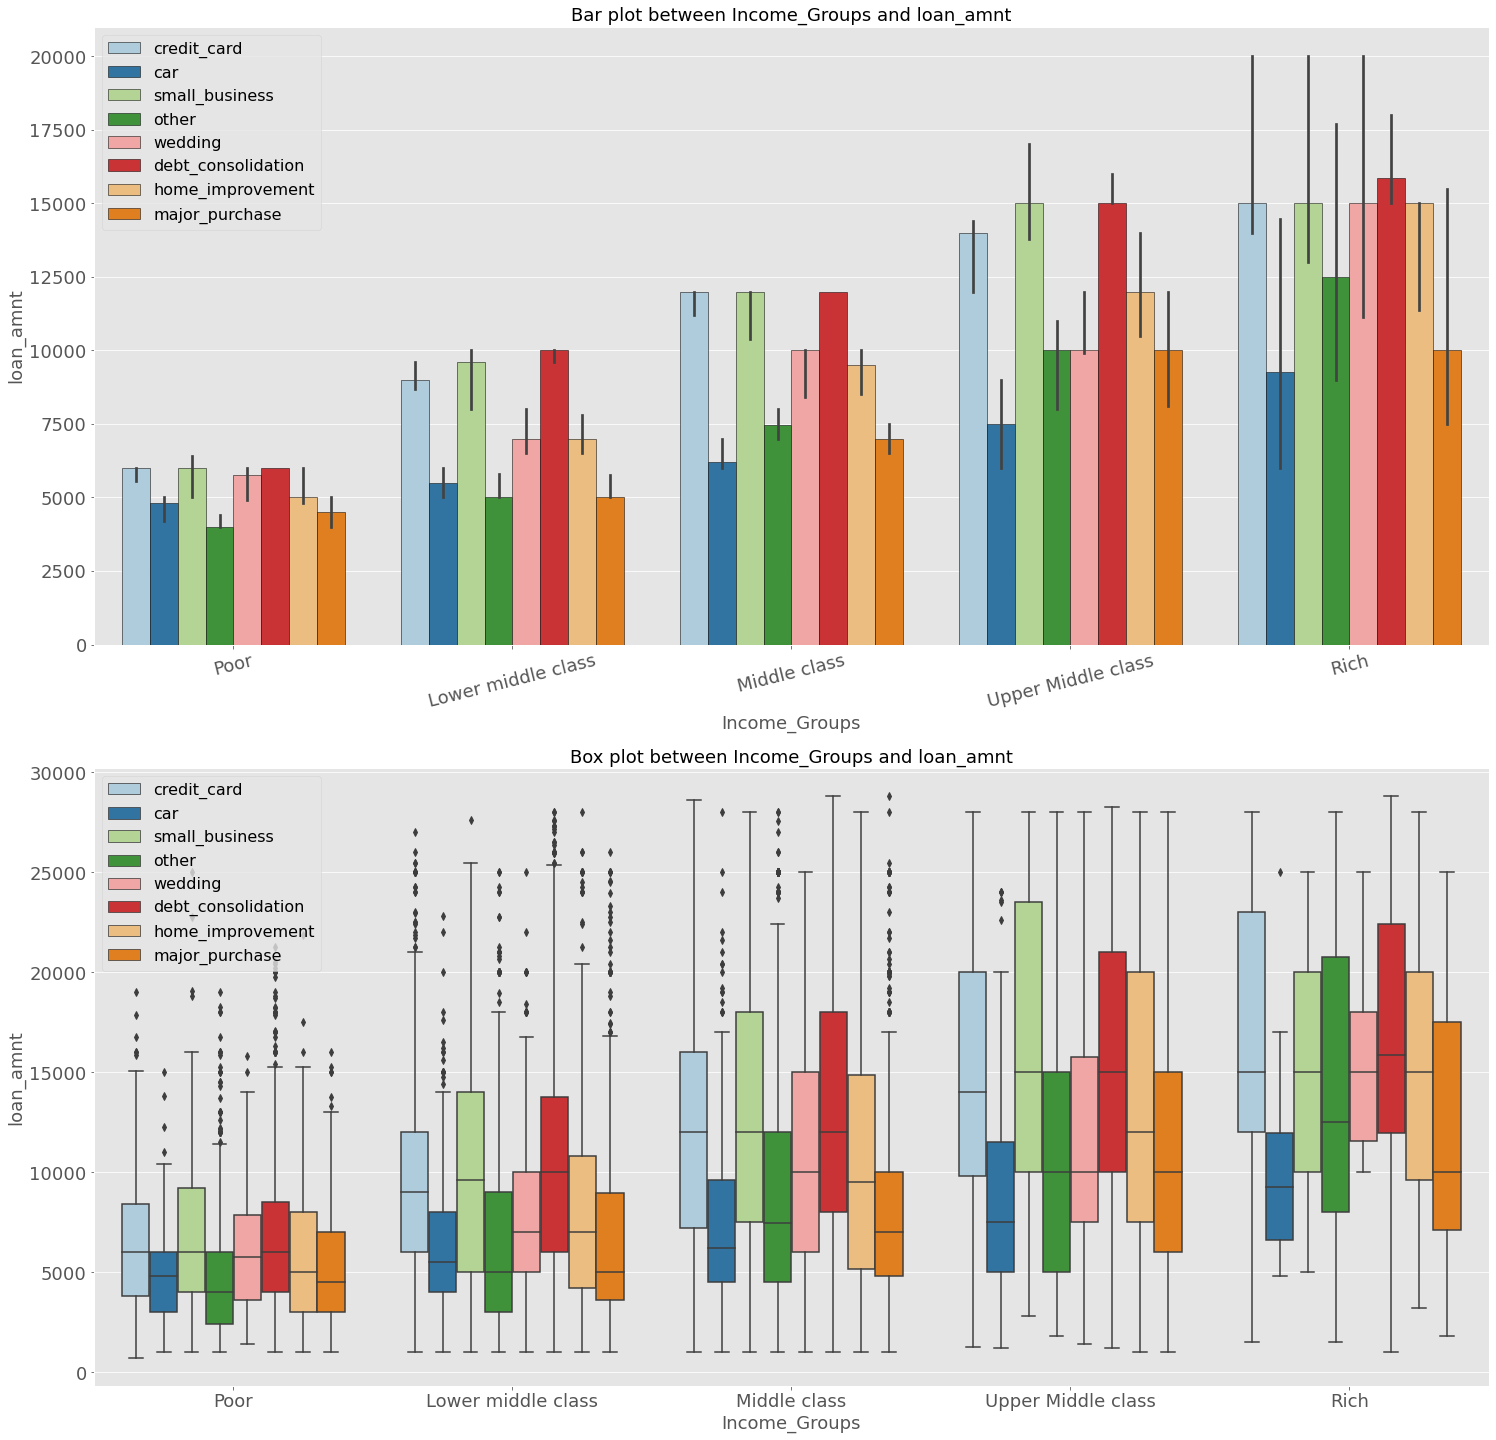

In [267]:
cat = "Income_Groups"
cont = "loan_amnt"
hue = "purpose"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 2250), hues = hue, font_size = 18, estimator = np.median, rotation = 14)
plt.legend(prop = {"size":16})
plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 25), hues = hue, font_size = 18)
plt.legend(prop = {"size":16})

## Observations:
- Since borrowers belonging to the Income Group <i>Rich</i> makes 1.34% of the entire dat it is not accurate, so for this observation we will ignore that category
- From Middle class category to Upper Middle class category we see a rise in requested loan amount for <i>Credit card, debt consolidation and small business</i>

## Income_Groups vs interest rates with hue as TERM

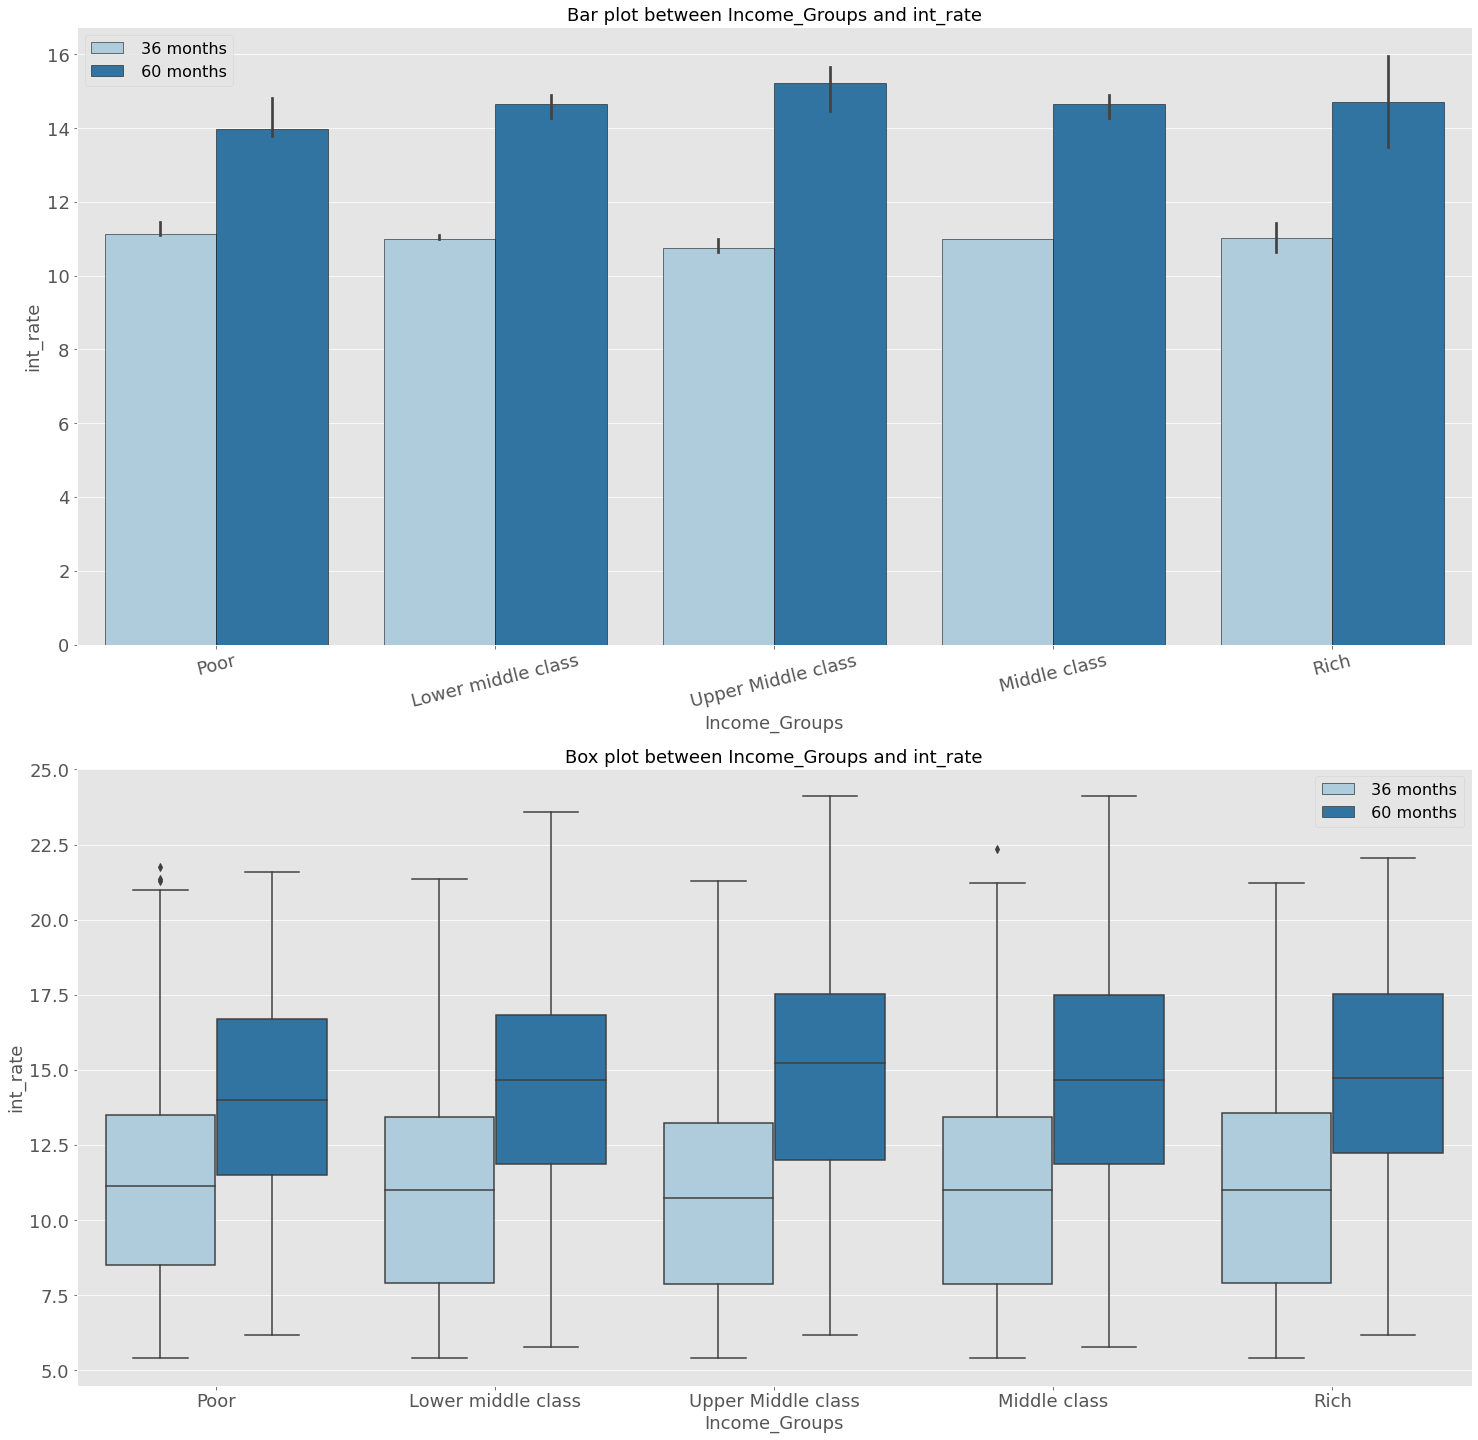

In [268]:
cat = "Income_Groups"
cont = "int_rate"
hue = "term"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 2250), hues = hue, font_size = 18, estimator = np.median, rotation = 14)
plt.legend(prop = {"size":16})
plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 25), hues = hue, font_size = 18)
plt.legend(prop = {"size":16})

## Observations:
- The interest rates seems to be pretty much stable for evry category of Income Groups
- The difference beingn only that the interest for 60 months is higher than 36 months

## Income_Groups vs interest rates with hue as GRADE

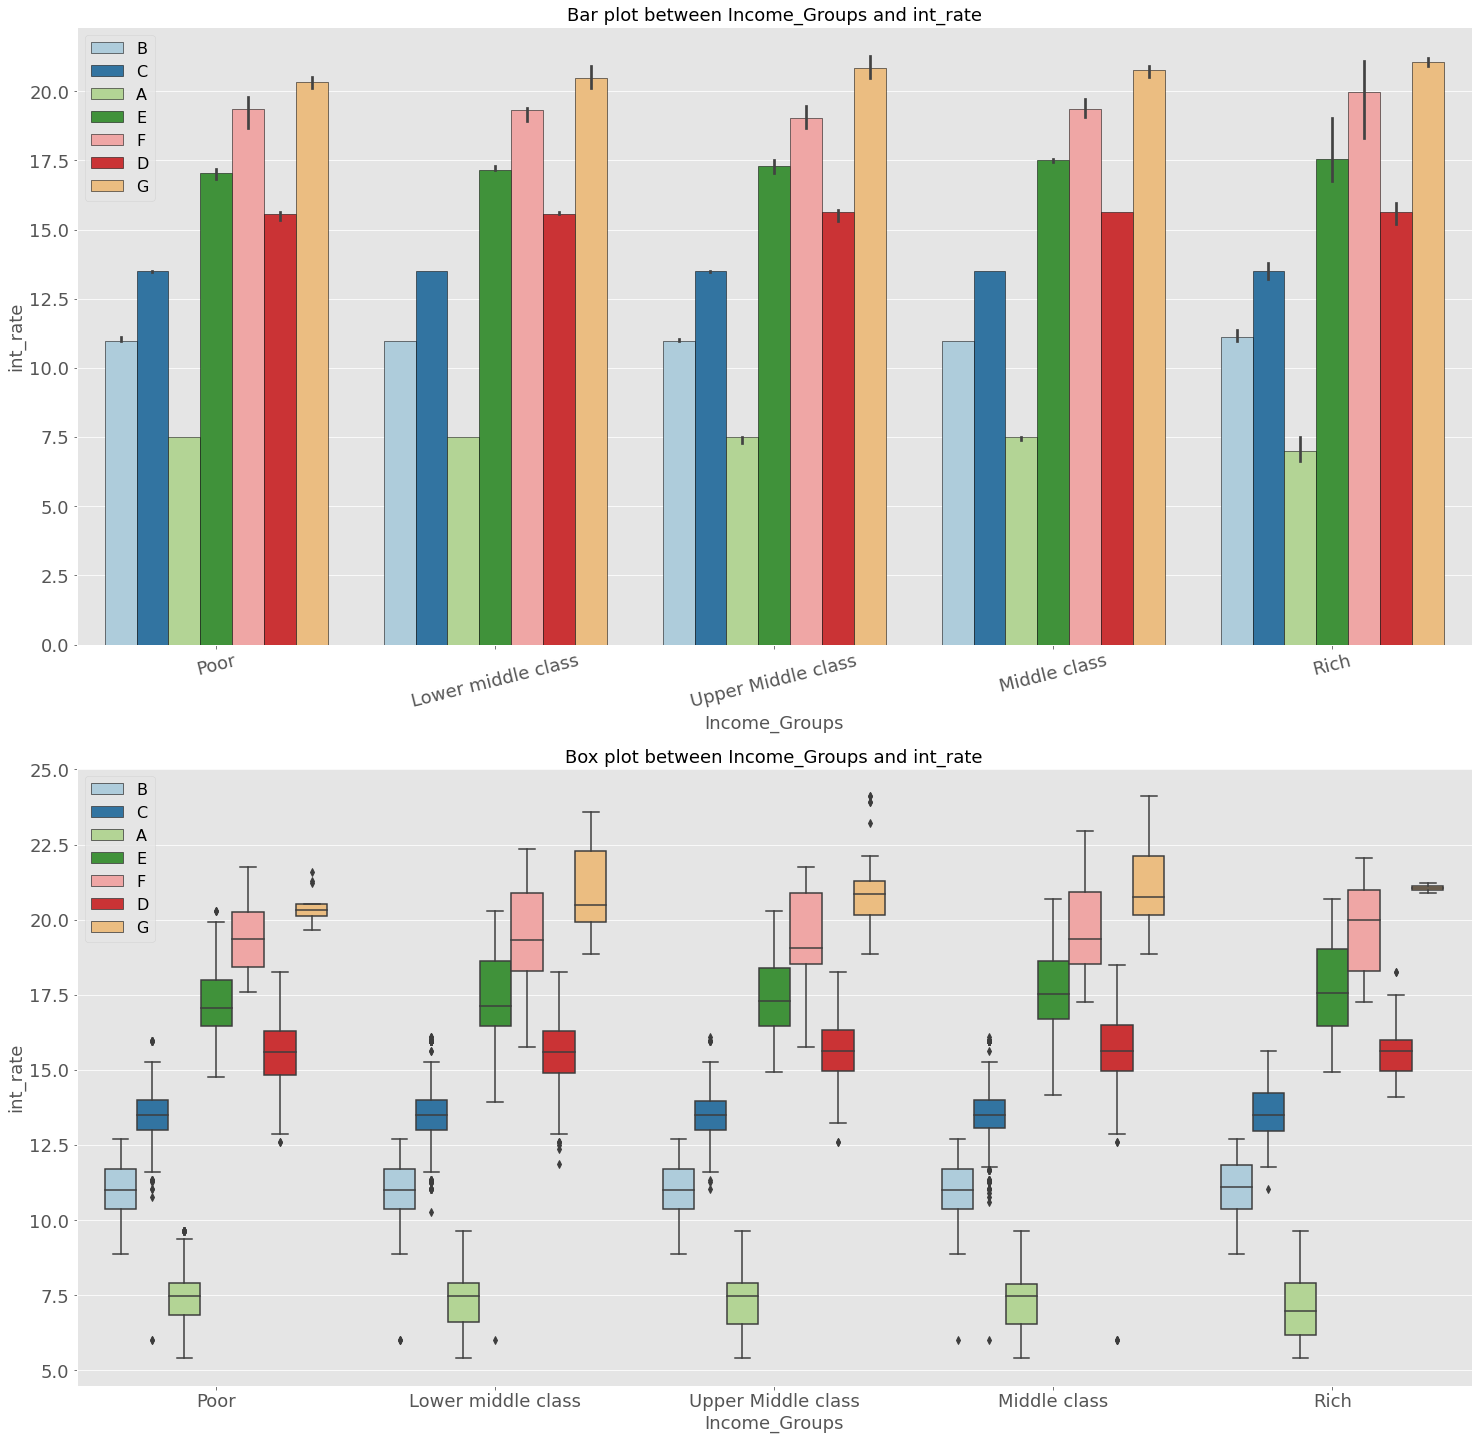

In [269]:
cat = "Income_Groups"
cont = "int_rate"
hue = "grade"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 2250), hues = hue, font_size = 18, estimator = np.median, rotation = 14)
plt.legend(prop = {"size":16})
plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 25), hues = hue, font_size = 18)
plt.legend(prop = {"size":16})

## Observations: 
- The distribution of Interest rates across various Income Groups seems to be almost identical those beyond 12% will more likely to default 

## Income_Groups vs interest rates with hue as LOAN_STATUS

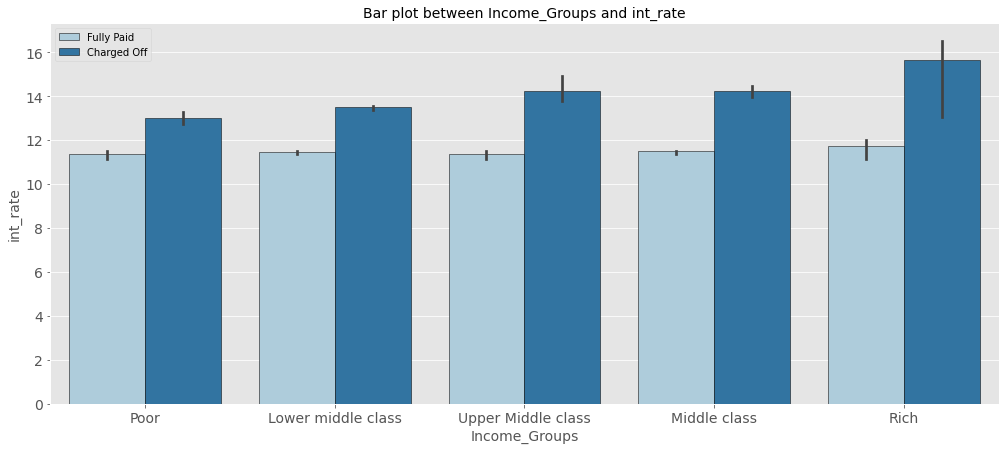

In [270]:
cat = "Income_Groups"
cont = "int_rate"
hue = "loan_status"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 7), hues = hue, estimator = np.median)
plt.legend(prop = {"size":10})

## Observations:
- A simple but quite informative and confirming visualization, that indeed across any categroies of Income_Groups if the ineterest rate exceeds 12 % then they are tend to default

## Income_Groups vs pub_rec_bankruptcies with hue as HOME_OWNRSHIP

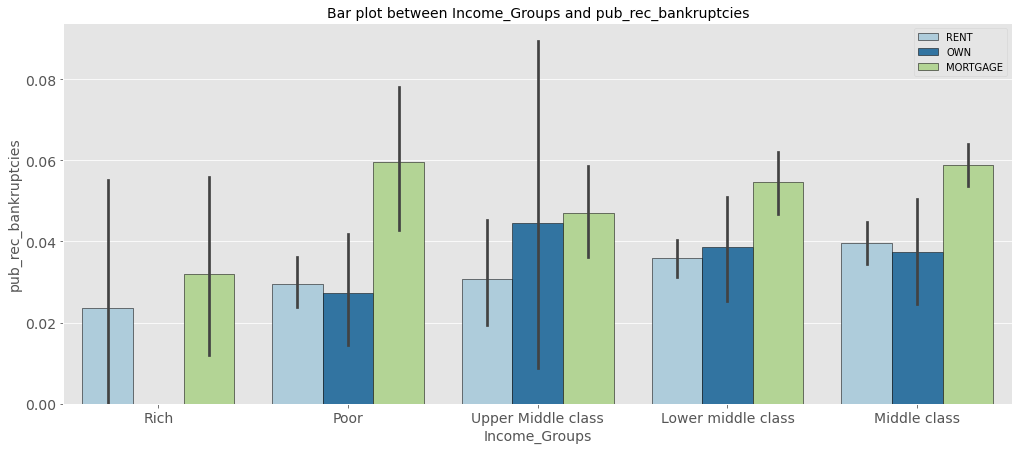

In [271]:
cat = "Income_Groups"
cont = "pub_rec_bankruptcies"
hue = "home_ownership"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 7), hues = hue)
plt.legend(prop = {"size":10})

## Observations:
- Overall we can also see that the borrowers across Income groups tend to have a hisroty of being bankrupt if they have mortgaged their house
- We have also concluded that higher the ratio of bankruptcies higher is the probabilty that the borrower will default

## Income_Groups vs pub_rec_bankruptcies with hue as LOAN_STATUS

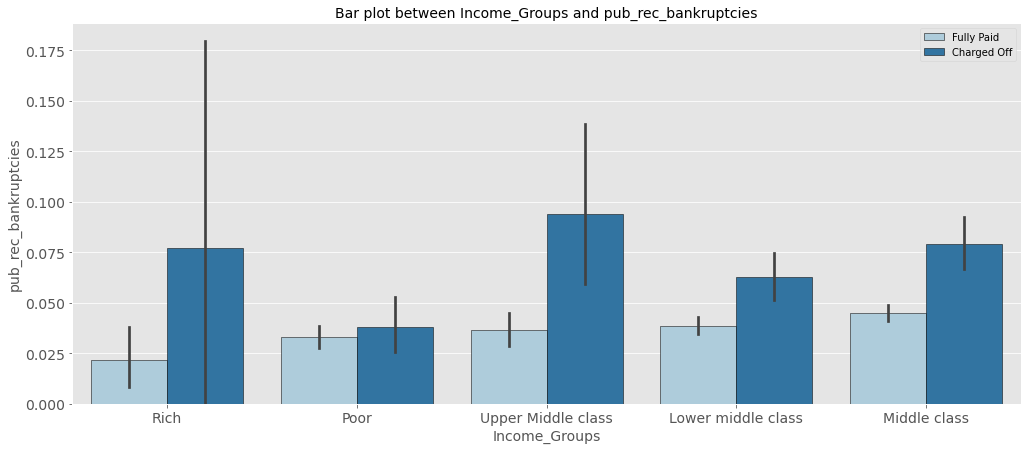

In [272]:
cat = "Income_Groups"
cont = "pub_rec_bankruptcies"
hue = "loan_status"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 7), hues = hue)
plt.legend(prop = {"size":10})

## Observations:
- This plot confirm our analysis in <i>Income groups vs pub_rec_bankruptcies</i> plot

## Income_Groups vs revol_util(%) with hue as GRADE

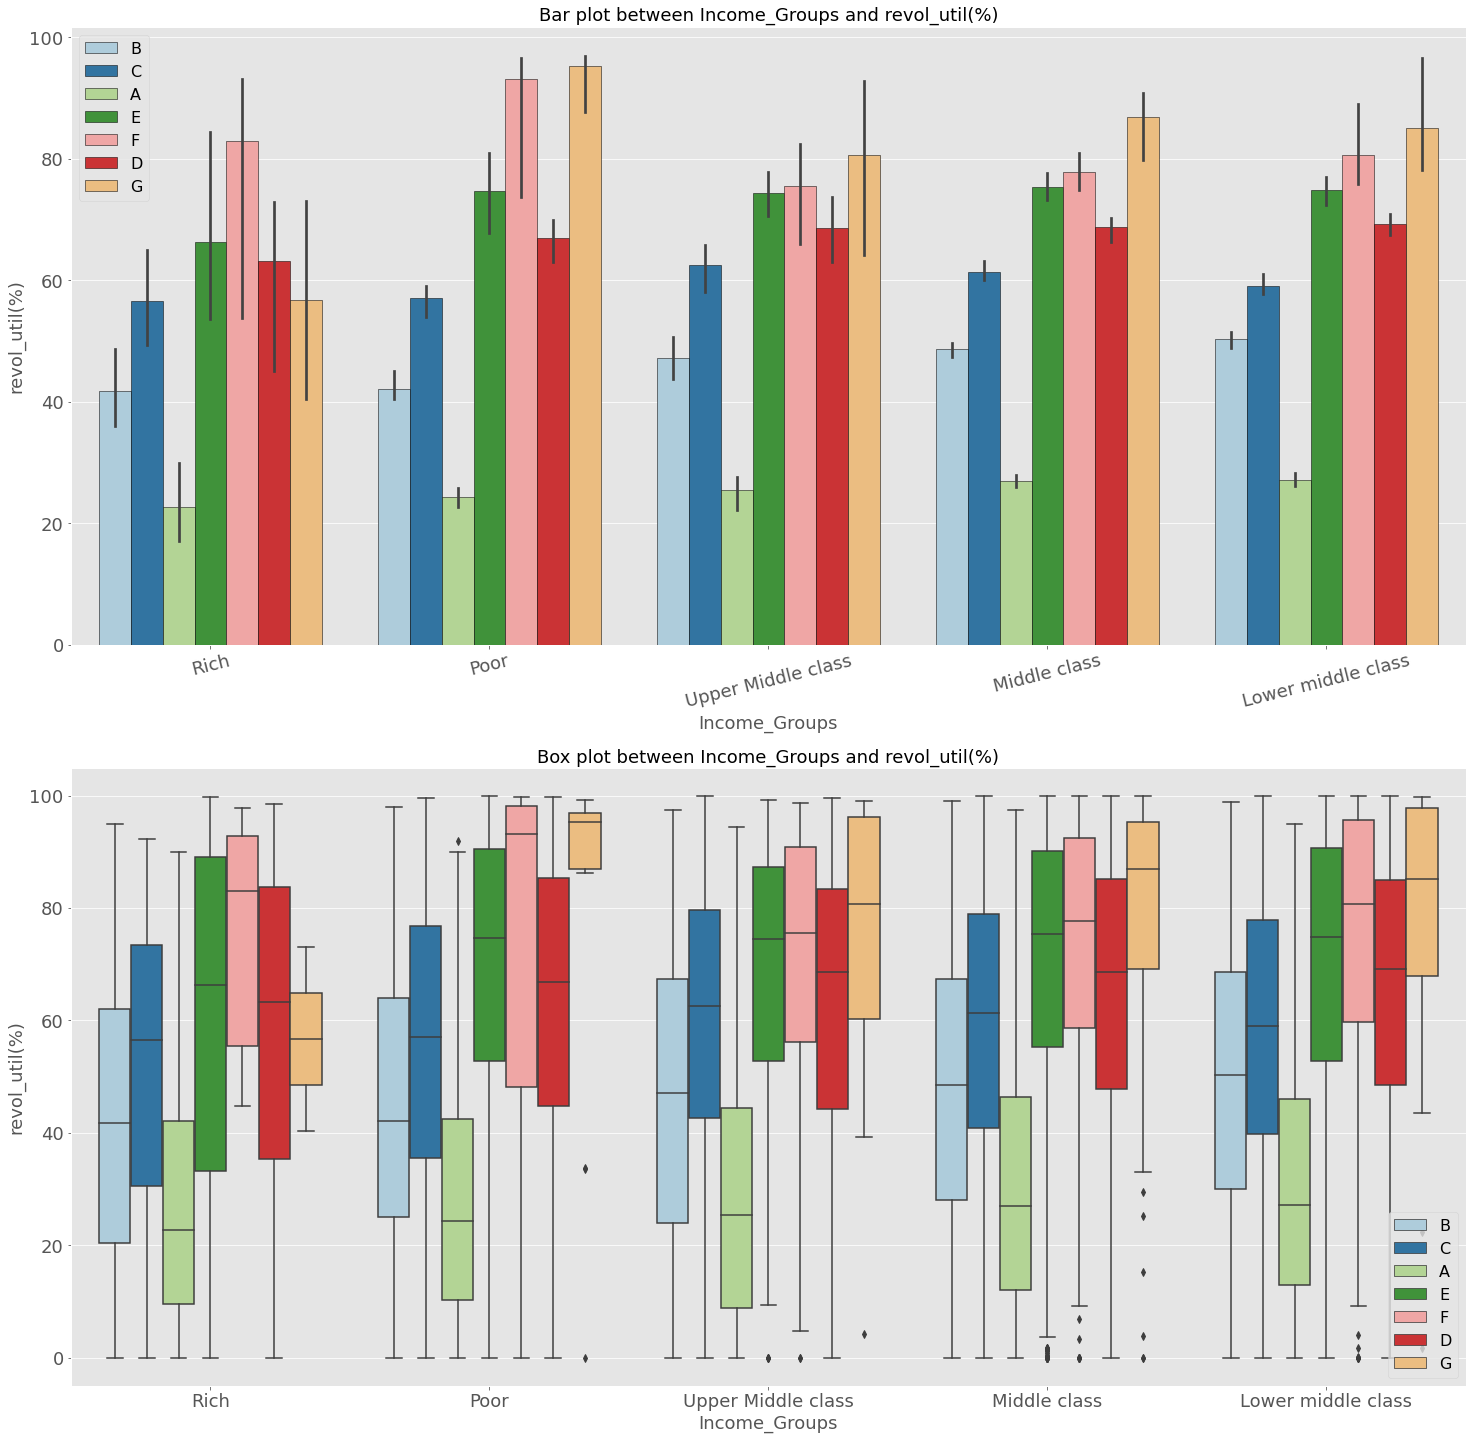

In [273]:
cat = "Income_Groups"
cont = "revol_util(%)"
hue = "grade"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 2250), hues = hue, font_size = 18, estimator = np.median, rotation = 14)
plt.legend(prop = {"size":16})
plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (25, 25), hues = hue, font_size = 18)
plt.legend(prop = {"size":16})

## Observations:
- As the grade decreases we see a rise in credit utilization which is inefficient

## Term vs loan amount with hue as HOME_OWNERSHIP

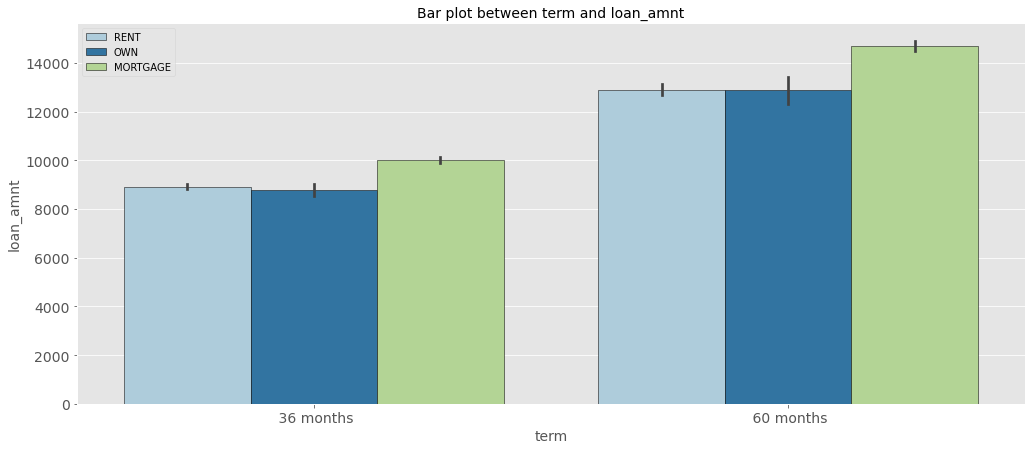

In [274]:
cat = "term"
cont = "loan_amnt"
hue = "home_ownership"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 7), hues = hue)
plt.legend(prop = {"size":10})

## Observation:
- No significant observations except that the loan amount taken is higher for 60 months

## Term vs loan amount with hue as VERIFICATION_STATUS

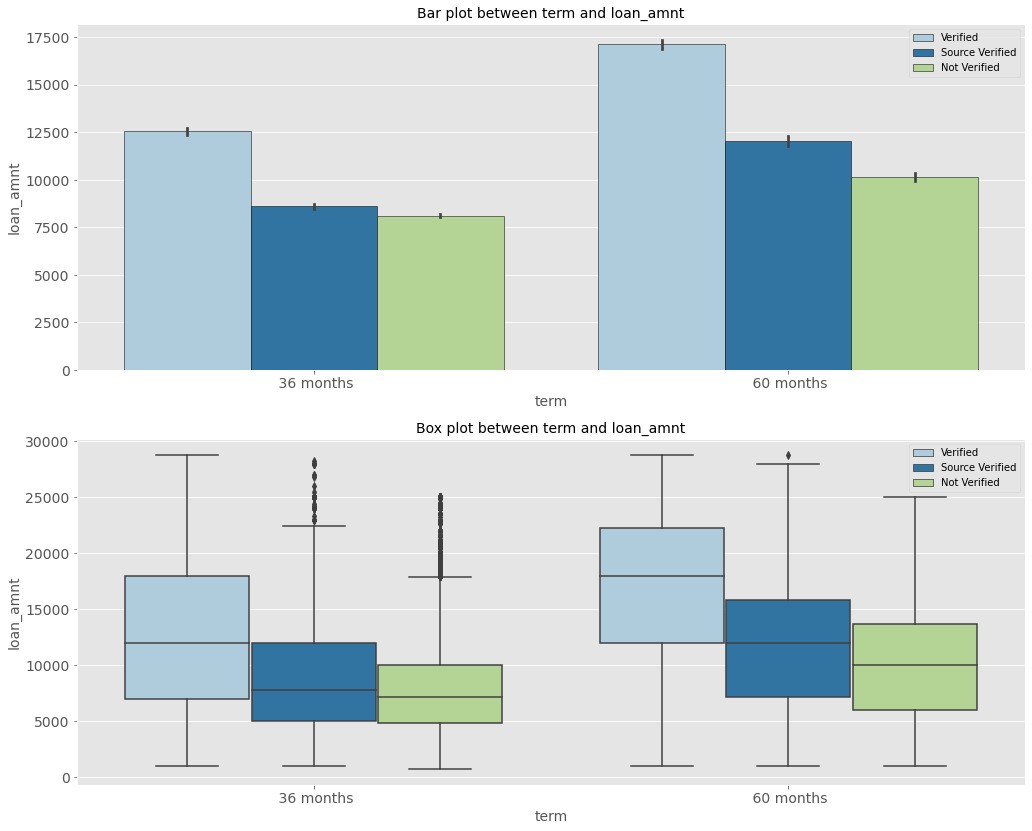

In [275]:
cat = "term"
cont = "loan_amnt"
hue = "verification_status"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 14), hues = hue)
plt.legend(prop = {"size":10})

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 14), hues = hue)
plt.legend(prop = {"size":10})

## Observations:
- Across every category of term we can see that <i>Verified</i> has taken a higher loan amount

## The following two plots also exhibit the same behaviour as our analysis in <i>loan amount vs term</i>

## Term vs loan amount with hue as PURPOSE

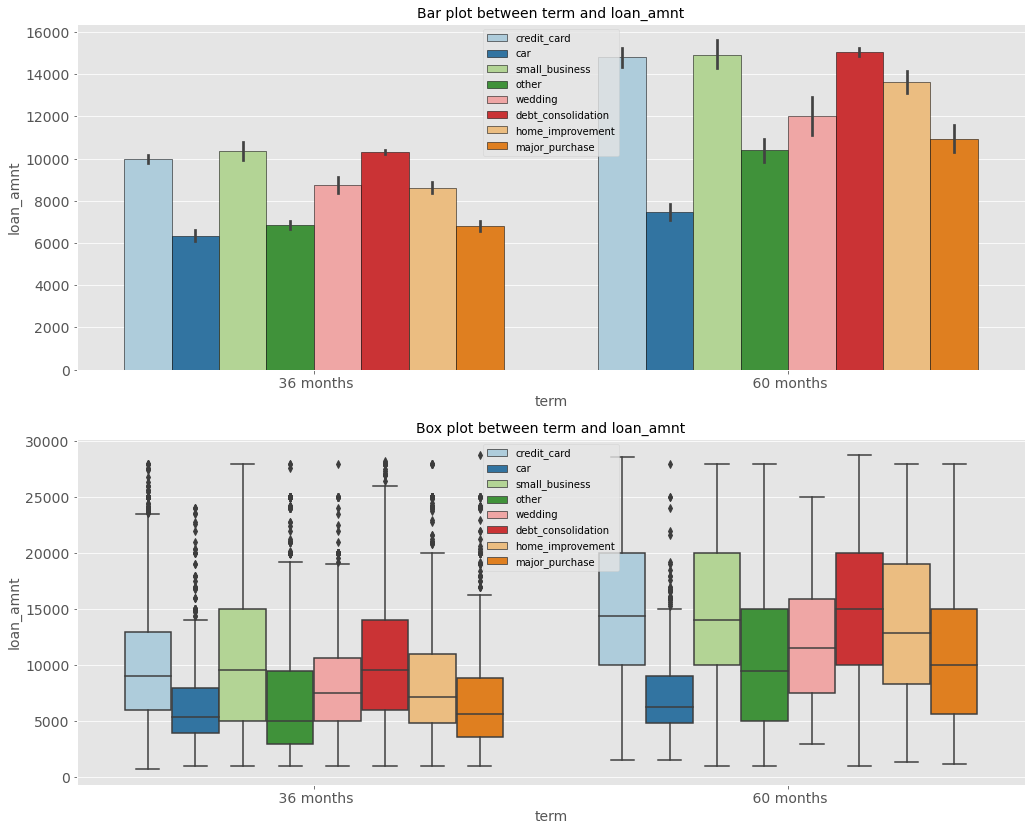

In [276]:
cat = "term"
cont = "loan_amnt"
hue = "purpose"

plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 14), hues = hue)
plt.legend(prop = {"size":10})

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 14), hues = hue)
plt.legend(prop = {"size":10})

## Term vs loan amount with hue as INCOME_GROUPS

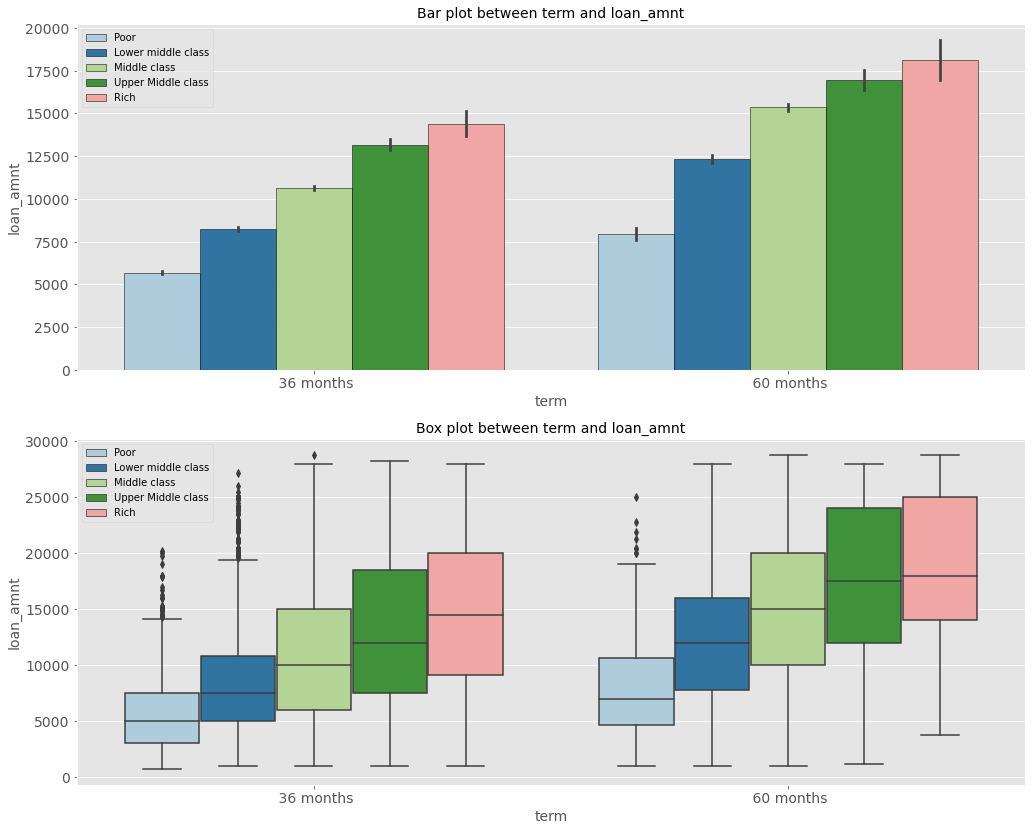

In [277]:
cat = "term"
cont = "loan_amnt"
hue = "Income_Groups"


plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 14), hues = hue)
plt.legend(prop = {"size":10})

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 14), hues = hue)
plt.legend(prop = {"size":10})

## Term vs interest rates with hue as HOME_OWNERSHIP

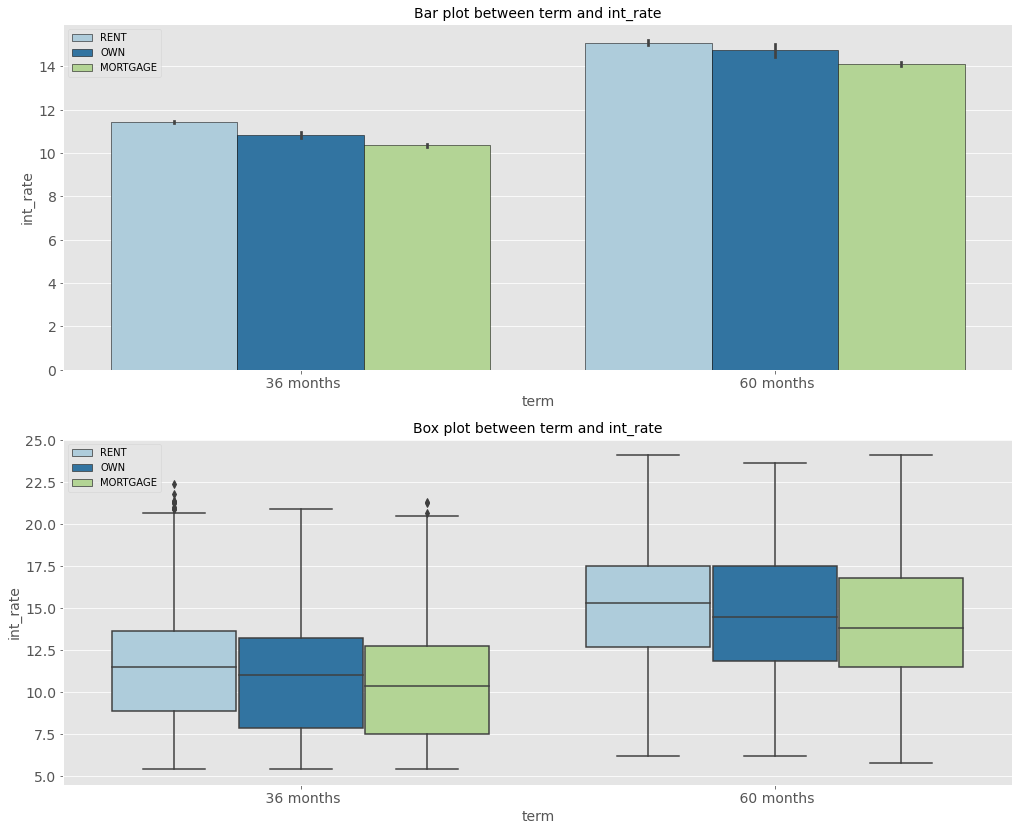

In [278]:
cat = "term"
cont = "int_rate"
hue = "home_ownership"


plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 14), hues = hue)
plt.legend(prop = {"size":10})

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 14), hues = hue)
plt.legend(prop = {"size":10})

## Observations:
- The interest rates as seen in this plot are higher for 60 months across different home ownership

## Term vs interest rates with hue as VERIFICATION_STATUS

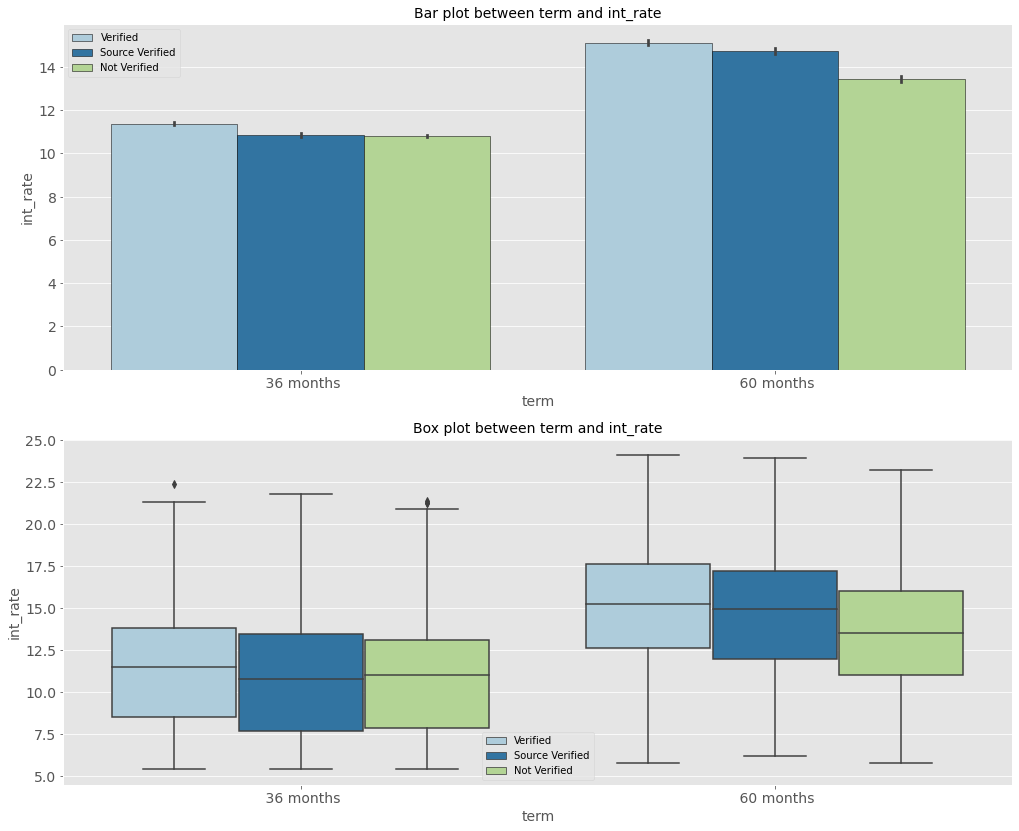

In [279]:
cat = "term"
cont = "int_rate"
hue = "verification_status"


plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 14), hues = hue)
plt.legend(prop = {"size":10})

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 14), hues = hue)
plt.legend(prop = {"size":10})

## Observations:
- As one can infer from the plot that borrowers belonging to <i>Verified</i> have to pay more interest closely followed by <i>Source Verified</i>

## Term vs interest rates with hue as LOAN_STATUS

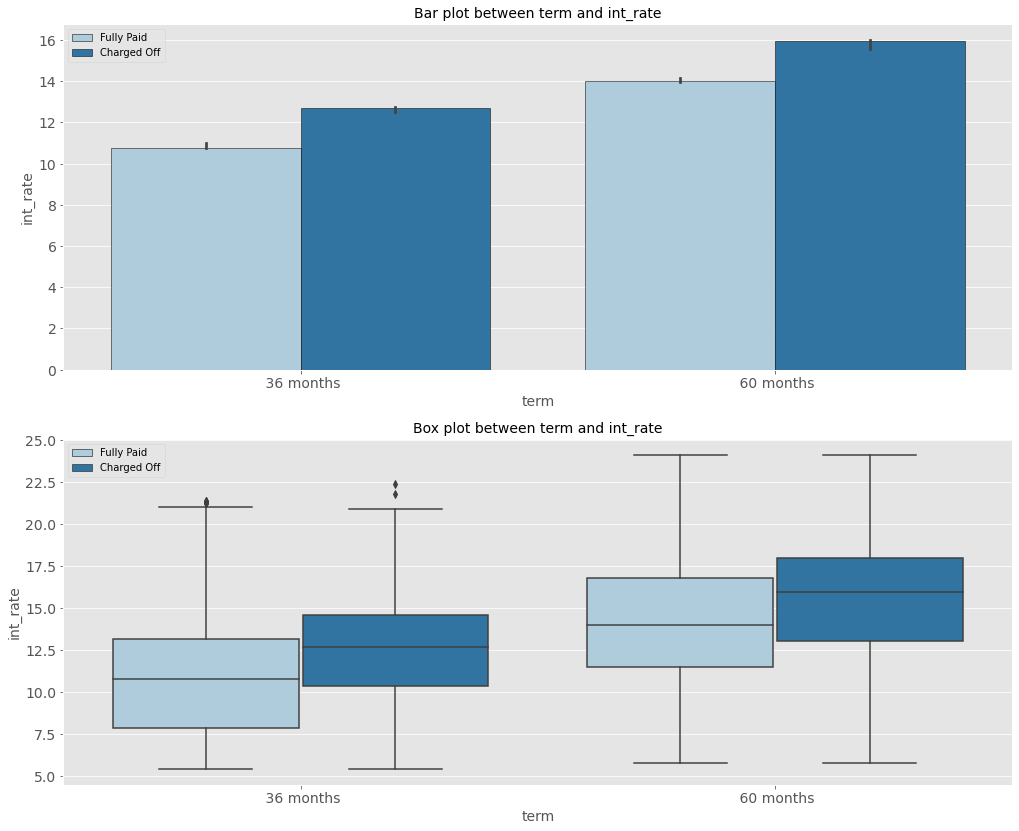

In [280]:
cat = "term"
cont = "int_rate"
hue = "loan_status"


plt.subplot(211)
bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 14), hues = hue, estimator = np.median)
plt.legend(prop = {"size":10})

plt.subplot(212)
bivariatePlots(x = cat, y = cont, box_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 14), hues = hue)
plt.legend(prop = {"size":10})

## Observations:
- This plot confirms our theory that borrowers who have opted for 36 months are advised not to take a loan with an interest above 12%
- Whereas for 60 months a relaxation of 25 can be given i.e they can take a loan with upto 14% interest rate

## Term vs annual income with hue as LOAN_STATUS

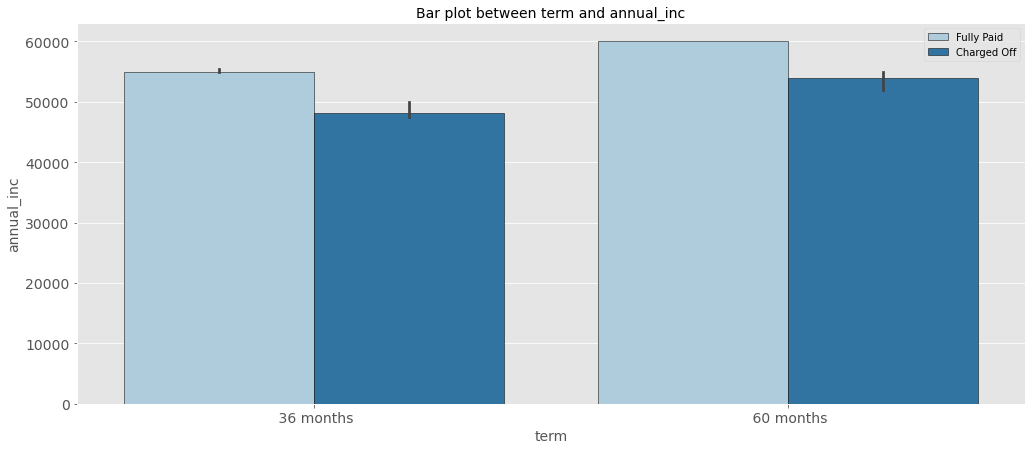

In [281]:
cat = "term"
cont = "annual_inc"
hue = "loan_status"


bivariatePlots(x = cat, y = cont, bar_plot = True, ordering = graph_index(x = cat, y = cont),
              figsize = (17, 7), hues = hue, estimator = np.median)
plt.legend(prop = {"size":10})

## Observations:
- We can infer that on an average borrowers who earn more possess the ablity to repay the loan no matter which plan they have opted for

# Conclusion after Multi-variate analysis:
## Since there are loads of plots in this analysis, we will only concentrate on plots which gives us a significantinsights o0n the borrowers and generalise it so that we can get a short yet informatiove conclusion 

## - We can infer from all the available plots that irrespective of grade borrowers who have opted to repay thier loan in 60 months tend to default more often

## - The revoling credit utilization worsens with a decrease in grade, irrespective of tor verification status
## - A decrease in grade also means a increase in defaulter ratio for that grade

## - Borrowers who have mortgaged their home are at a higher risk of defaulting and they also took higher amount of loans, we have already deduced that higher the amount of loan. higher is the tendency of that borrower to default and from the same plot we can deduce that across all the categories of home ownership, those who have opteed for 60 months plan have indeed taken a higher amount of loan

## - We can observe that there is a threshold for each home ownership for loan amounts beyond which they have a ahigher probabilty of defaulting

## - The three major purposes for which the borrowers  have taken loan for are credit card, debt consolidation and small business

## - Borrower who ear more tend to take a higher amount of loan but we also saw that higher the income higher is the probability to repay the loan so LC must do a lot of background checks before issuing a loan

## -We also deduced that borrowers who have their income verified tend to get loans easily at a much higher interest rates and we also saw that borrowes on an average go beyond 12% tend to have a probability to default although it depend on their income status in the sense that if they earn more and have a resonable good credit score they tend to repay their loan on time, we also saw that Lc has issues high amount of loans at high interest rates to such borrowers which wont be profitable for LC in the long run

## - The monthly installments are also the highest for the three worst grades: E, F, G

## -The defaultor ratio is alos high if the borrowers have ahistory of being bankrupt or failur of any financial obligations

## - We also notice that borrowers who have their income verified and have also opted to repay thier loan in 60 months tend to default more



# For Lending Club:-

## To reduce the amount of defaulter or to select the right people to give loans LC needs to take care of the following:

## We identified 7 features which we saw through visualizations that affect the defaulter rtaio of a borrower:
- Interest rates
- Purposes
- loan amount w.r.t annual Income
- revol util(%)
- term
- Verification status
- pub_rec_bankruptcies

### Borrowers who belong to the verified category of Verification status have the highest average requested loan amnt and from the plots and from the visualization we know that almost all of the requested amount was approved(verification status vs loan amount)

### Along with the highest average amount pf loan requested they have beem imposed with the hihgest average interest rates beyond 12% (Verification status vs Interest rates)

### And they tend to default more often (Loan status vs verification status)
### They have taken on an average a loan of 20 grand with grade as low as E, F and G (verification_status vs loan_amnt with hue as grade)

### They also have taken loans on purposes which have the highest defaulter ratio: credit card, debt consolidation and small business

### As long as they have the means to repay they wont rank high on public number of record bankruptcies but borrowers belonging to such categories is a risky investment for LC

### - LC must be carefull before investing or approving the loan request for such categories, we can that on average  Borrowers belonging to Verified category of verification status tend to default more when they request  loan amount exceeding 14 grand
### - Borrowers who fall in poor and middle class income groups tend to default more often even with their source of income verified

## What can LC do when they encounter borrowers belonging to such category?
- They can check their annual income, if they belong to upper middle class or atleast middle class higher are the chances that they wont default on their loan
- Making sure that they dont exeed 12% interest rates if they opt for 36 months and 14% interest rate if they opt for 60 months


We saw the interest rates with various other variables like purpose, verification status, and loan status, we can conclude that for every category the sweet spot is 12% in general and if we consider the variable term then on an average borrowers dont default if the interest rate doesnt exceed 12% for a period of 36 months and 14% for a period of 60 months across every category
Also the revolving line of credit the ideal rate for which the borrower is not likely to default is less than 50%, beyond 50% the borrower is mosre liekly to defaulte

LC can either decrease the requested loan amount or observe their annual income if it falls anywhere betwen middle to upper class then LC can think of approving their loan based on revolving line of credit, they should also take a quick loo at their interest rates as well cause it playsn an important factor 


Borrowers who request loan for small business, debt consolidation or credit card must be given extra attention cause they have the highest risk of defaulting, LC must investigate and dig even deeper in these categories so they can understand the complexity of the situation  and demand more information
Borrowers who have been bankrupt in the past have a higher defaulter ratio and Lc must take into account their annual income, revolving line of credit, how much interest will they be paying and based on these factors LC can either approve the entire loan amount requested if the borrower has a ahigher probabiltiy of repaying and if not LC can always reduce the amount of loan approved while keeping the interest same therbey reducing the risk of the borrower defaulting

LC must not be biased towards borrowers belonging to verified category of verification status, it seems pretty clear that higher amount of loan has been approved for such borrowers even though thier credit utilization rate was well beyond 50%, with more than 12% interest charged and them opting to repay the loan in 60 months

So LC must take into account these 7 features and explore their thresholds with varying one or multiple variables to reduce or elimanting the risk of deafulters

In order to ensure that LC is issuing loan to the right people care must be taken that:
1) On an average the interest rate shouldnt exceed more than 12% for those who have opted for 36 months and 14% for those who have opted for 60 months if at all a high interest rate is justified care must be taken that the borrower belongs to Upper Middle or atleast Middle class ClassName(object):
2) They must identitfy the same when borrowers request loan to repay credit card bills, consolidate debt or small businesses
3) The median loan amount on which the borrower wont default is around 9 grand and anything beyond that the borrower has a higher probabilty of defaulting, but there is more to it like how much is the borrower earning, how well is his utilization rate, the purpose of the loan, the term which the borrower prefers to opt affect
4) LC can delve deeper if the loan amount and the interest is ome the higher end when a person applied for a loans

If we have to subset even further, the main drivers of not defaulting are Annual income, interest rates, credit utilization rate and the loan amount
